In [1]:
import nltk

# Download the 'stopwords' dataset
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Alice in Wonderland

In [4]:
import nltk
from PyPDF2 import PdfReader
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK datasets
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')  # Download the 'wordnet' dataset

# Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Tokenizes, removes stopwords, and lemmatizes the text.
    """
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

def read_pdf_and_extract_text(file_path):
    """
    Reads text from a PDF file and returns it as a string.
    """
    reader = PdfReader(file_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text() + " "
    return text.strip()

# Read and preprocess the text from a PDF
file_path = "./books/Pygmalion.pdf"  # Replace with the actual PDF file path
raw_text = read_pdf_and_extract_text(file_path)
preprocessed_texts = preprocess_text(raw_text)

# Print preprocessed tokens
print(preprocessed_texts)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['pygmalion', 'bernard', 'sha', 'w', 'pref', 'ace', 'pygmalion', 'professor', 'phonetics', 'seen', 'later', 'pygmalion', 'need', 'preface', 'sequel', 'supplied', 'due', 'place', 'english', 'respect', 'language', 'teach', 'child', 'speak', 'spell', 'abominably', 'man', 'teach', 'sound', 'like', 'impossible', 'englishman', 'open', 'mouth', 'without', 'making', 'englishman', 'hate', 'despise', 'german', 'spanish', 'accessible', 'foreigner', 'english', 'accessible', 'even', 'englishman', 'reformer', 'england', 'need', 'today', 'energetic', 'phonetic', 'enthusiast', 'made', 'one', 'hero', 'popular', 'play', 'hero', 'kind', 'cry', 'wilderness', 'many', 'year', 'past', 'became', 'interested', 'subject', 'towards', 'end', 'melville', 'bell', 'dead', 'alexander', 'elli', 'still', 'living', 'patriarch', 'impressive', 'head', 'always', 'covered', 'velvet', 'skull', 'cap', 'would', 'apologize', 'public', 'meeting', 'courtly', 'manner', 'tito', 'pagliardini', 'another', 'phonetic', 'veteran', 'men'

In [5]:
print(preprocessed_texts)

['pygmalion', 'bernard', 'sha', 'w', 'pref', 'ace', 'pygmalion', 'professor', 'phonetics', 'seen', 'later', 'pygmalion', 'need', 'preface', 'sequel', 'supplied', 'due', 'place', 'english', 'respect', 'language', 'teach', 'child', 'speak', 'spell', 'abominably', 'man', 'teach', 'sound', 'like', 'impossible', 'englishman', 'open', 'mouth', 'without', 'making', 'englishman', 'hate', 'despise', 'german', 'spanish', 'accessible', 'foreigner', 'english', 'accessible', 'even', 'englishman', 'reformer', 'england', 'need', 'today', 'energetic', 'phonetic', 'enthusiast', 'made', 'one', 'hero', 'popular', 'play', 'hero', 'kind', 'cry', 'wilderness', 'many', 'year', 'past', 'became', 'interested', 'subject', 'towards', 'end', 'melville', 'bell', 'dead', 'alexander', 'elli', 'still', 'living', 'patriarch', 'impressive', 'head', 'always', 'covered', 'velvet', 'skull', 'cap', 'would', 'apologize', 'public', 'meeting', 'courtly', 'manner', 'tito', 'pagliardini', 'another', 'phonetic', 'veteran', 'men'

In [6]:
# Assume `text_data` is a list of raw text documents
# Assume `text_data` is a list of raw text documents
# Split the text into sentences or paragraphs, instead of individual words
import nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(raw_text)

preprocessed_texts = [' '.join(preprocess_text(text)) for text in sentences]

# Fit the vectorizer to the text data and transform it into a TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
from sklearn.decomposition import TruncatedSVD

# Perform LSA using Truncated SVD
n_topics = 25  # Set the number of topics
lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
lsa_matrix = lsa_model.fit_transform(tfidf_matrix)


In [8]:
import pandas as pd

# Extract the feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to represent topics and their top terms
n_top_words = 10  # Adjust for the top N words per topic
topics = []
for topic_idx, component in enumerate(lsa_model.components_):
    top_terms = [feature_names[i] for i in component.argsort()[:-n_top_words-1:-1]]
    topics.append(f"Topic {topic_idx + 1}: {', '.join(top_terms)}")

# Print the topics
for topic in topics:
    print(topic)


Topic 1: higgins, pickering, oh, rising, professor, henry, come, hand, doolittle, go
Topic 2: liza, pickering, doolittle, rising, snatching, colonel, going, whimpering, well, oh
Topic 3: pickering, colonel, come, doolittle, sits, return, know, laughing, right, pearce
Topic 4: doolittle, miss, governor, pearce, come, say, sir, well, door, like
Topic 5: pearce, right, girl, go, oh, sir, take, well, know, eliza
Topic 6: girl, flower, oh, go, come, know, like, good, right, well
Topic 7: go, oh, come, well, know, right, eliza, like, back, think
Topic 8: go, back, door, flower, girl, colonel, let, bed, turn, downstairs
Topic 9: oh, go, right, flower, bother, sir, thank, yes, doolittle, lord
Topic 10: come, eliza, see, back, tell, governor, take, henry, away, told
Topic 11: eynsford, hill, come, oh, miss, flower, back, tell, freddy, gaily
Topic 12: mother, oh, come, eynsford, hill, go, flower, clara, daughter, back
Topic 13: know, daughter, come, go, mean, oh, take, way, mother, away
Topic 14

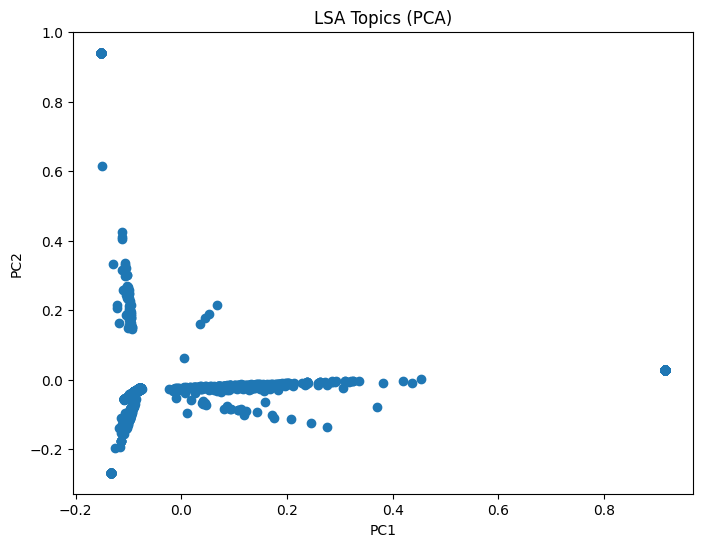

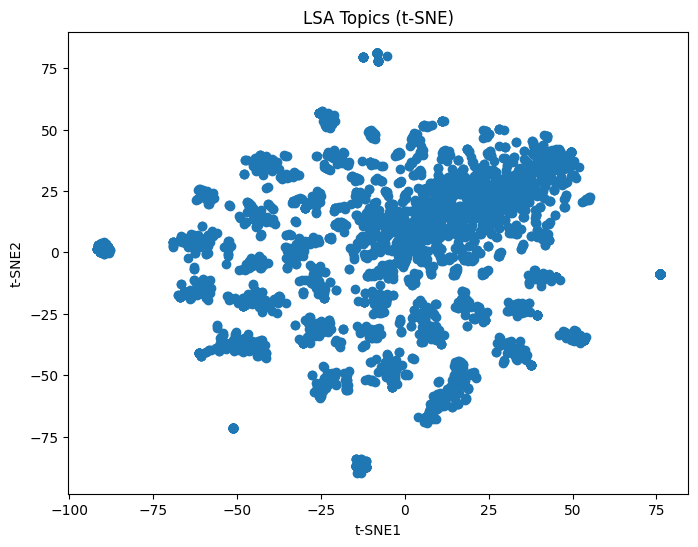

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform PCA
lsa_pca = PCA(n_components=2).fit_transform(lsa_matrix)

# Perform t-SNE
lsa_tsne = TSNE(n_components=2, random_state=42).fit_transform(lsa_matrix)

# Plot PCA
plt.figure(figsize=(8, 6))
plt.scatter(lsa_pca[:, 0], lsa_pca[:, 1])
plt.title("LSA Topics (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Plot t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(lsa_tsne[:, 0], lsa_tsne[:, 1])
plt.title("LSA Topics (t-SNE)")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.show()


In [10]:
import numpy as np

# Get dominant topic for each document
dominant_topics = np.argmax(lsa_matrix, axis=1)

# Print document-topic assignments
for i, topic in enumerate(dominant_topics):
    print(f"Document {i+1}: Topic {topic+1}")


Document 1: Topic 7
Document 2: Topic 18
Document 3: Topic 23
Document 4: Topic 18
Document 5: Topic 18
Document 6: Topic 24
Document 7: Topic 18
Document 8: Topic 24
Document 9: Topic 6
Document 10: Topic 7
Document 11: Topic 7
Document 12: Topic 18
Document 13: Topic 24
Document 14: Topic 7
Document 15: Topic 7
Document 16: Topic 18
Document 17: Topic 7
Document 18: Topic 24
Document 19: Topic 14
Document 20: Topic 23
Document 21: Topic 20
Document 22: Topic 23
Document 23: Topic 1
Document 24: Topic 22
Document 25: Topic 18
Document 26: Topic 7
Document 27: Topic 7
Document 28: Topic 24
Document 29: Topic 7
Document 30: Topic 7
Document 31: Topic 17
Document 32: Topic 23
Document 33: Topic 23
Document 34: Topic 7
Document 35: Topic 23
Document 36: Topic 4
Document 37: Topic 1
Document 38: Topic 7
Document 39: Topic 15
Document 40: Topic 7
Document 41: Topic 13
Document 42: Topic 1
Document 43: Topic 7
Document 44: Topic 17
Document 45: Topic 22
Document 46: Topic 8
Document 47: Topi

In [12]:
!pip install gensim

import numpy as np
import pandas as pd
import itertools
from gensim.models import KeyedVectors # Importing the correct module for embeddings
from gensim.scripts.glove2word2vec import glove2word2vec # for GloVe conversion


def calculate_semantic_coherence(terms, word_vectors):
    """Calculate semantic coherence of terms using word embeddings."""
    valid_terms = [term for term in terms if term in word_vectors]
    if len(valid_terms) < 2:
        return 0
    similarities = []
    for term1, term2 in itertools.combinations(valid_terms, 2):
        try:
            similarity = np.dot(word_vectors[term1], word_vectors[term2]) / (
                np.linalg.norm(word_vectors[term1]) * np.linalg.norm(word_vectors[term2])
            )
            similarities.append(similarity)
        except Exception:
            continue
    return np.mean(similarities) if similarities else 0

def generate_topic_names(lsa_model, feature_names, word_vectors, n_top_words=10, n_name_words=1):
    """Generate topic names using semantic coherence."""
    topic_data = []
    for topic_idx, topic in enumerate(lsa_model.components_):
        top_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_terms = [feature_names[i] for i in top_indices]
        top_weights = topic[top_indices]
        best_word = None
        best_coherence = -1
        for term in top_terms:
            coherence = calculate_semantic_coherence([term], word_vectors)
            context_terms = [t for t in top_terms if t != term]
            context_coherence = calculate_semantic_coherence([term] + context_terms[:3], word_vectors)
            combined_score = (coherence + context_coherence) / 2
            if combined_score > best_coherence:
                best_coherence = combined_score
                best_word = term
        if best_word is None:
            best_word = top_terms[0]
        topic_dict = {
            'Topic': best_word,
            'Semantic_Coherence': best_coherence,
            **{f'Word_{i + 1}': term for i, term in enumerate(top_terms)},
            **{f'Weight_{i + 1}': weight for i, weight in enumerate(top_weights)}
        }
        topic_data.append(topic_dict)
    df = pd.DataFrame(topic_data)
    word_columns = [col for col in df.columns if col.startswith('Word_')]
    weight_columns = [col for col in df.columns if col.startswith('Weight_')]
    column_order = ['Topic', 'Semantic_Coherence'] + word_columns + weight_columns
    df = df[column_order]
    return df

def get_semantic_topic_names(lsa_model, feature_names, word_vectors):
    """Convenience function to get topic names."""
    return generate_topic_names(lsa_model, feature_names, word_vectors, n_top_words=10, n_name_words=1)

def print_topic_details(df):
    """Print detailed information about topics."""
    for idx, row in df.iterrows():
        print(f"Topic: {row['Topic']}")
        print(f"Semantic Coherence: {row['Semantic_Coherence']:.4f}")
        for i in range(1, len(row) + 1):
            word_col = f'Word_{i}'
            weight_col = f'Weight_{i}'
            if word_col in row.index and weight_col in row.index:
                print(f"  {row[word_col]} (Weight: {row[weight_col]:.4f})")
        print()

# Downloading pre-trained GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
import numpy as np
import pandas as pd
import itertools

def calculate_semantic_coherence(terms, word_vectors):
    """
    Calculate semantic coherence of a set of terms using word embeddings.

    Parameters:
    - terms: List of words to evaluate
    - word_vectors: Dictionary or model containing word embeddings

    Returns:
    - Semantic coherence score (higher is more coherent)
    """
    # Ensure all terms exist in word vectors
    valid_terms = [term for term in terms if term in word_vectors]

    if len(valid_terms) < 2:
        return 0

    # Calculate pairwise cosine similarities
    similarities = []
    for term1, term2 in itertools.combinations(valid_terms, 2):
        try:
            # Calculate cosine similarity between word vectors
            similarity = np.dot(word_vectors[term1], word_vectors[term2]) / (
                np.linalg.norm(word_vectors[term1]) * np.linalg.norm(word_vectors[term2])
            )
            similarities.append(similarity)
        except Exception:
            continue

    # Return average similarity if possible
    return np.mean(similarities) if similarities else 0

def generate_topic_names(
    lsa_model,
    feature_names,
    word_vectors,  # Requires a pre-trained word embedding model
    n_top_words=10,
    n_name_words=1  # Changed to generate single-word topics
):
    """
    Generate topic names using semantic coherence.

    Parameters:
    - lsa_model: Fitted LSA model
    - feature_names: List of feature names
    - word_vectors: Pre-trained word embedding model
    - n_top_words: Number of top words to consider
    - n_name_words: Number of words to use in topic name (default 1)

    Returns:
    - pandas DataFrame with semantically coherent topics
    """
    topic_data = []

    for topic_idx, topic in enumerate(lsa_model.components_):
        # Get top word indices
        top_indices = topic.argsort()[:-n_top_words-1:-1]
        top_terms = [feature_names[i] for i in top_indices]
        top_weights = topic[top_indices]

        # Find most semantically coherent word
        best_word = None
        best_coherence = -1

        for term in top_terms:
            # Calculate coherence of this term with other top terms
            coherence = calculate_semantic_coherence([term], word_vectors)

            # Additional context: how well it relates to other top terms
            context_terms = [t for t in top_terms if t != term]
            context_coherence = calculate_semantic_coherence([term] + context_terms[:3], word_vectors)

            # Combined score
            combined_score = (coherence + context_coherence) / 2

            if combined_score > best_coherence:
                best_coherence = combined_score
                best_word = term

        # If no coherent word found, use the top weighted term
        if best_word is None:
            best_word = top_terms[0]

        # Prepare topic dictionary
        topic_dict = {
            'Topic': best_word,
            'Semantic_Coherence': best_coherence,
            **{f'Word_{i+1}': term for i, term in enumerate(top_terms)},
            **{f'Weight_{i+1}': weight for i, weight in enumerate(top_weights)}
        }

        topic_data.append(topic_dict)

    # Convert to DataFrame
    df = pd.DataFrame(topic_data)

    # Reorder columns
    word_columns = [col for col in df.columns if col.startswith('Word_')]
    weight_columns = [col for col in df.columns if col.startswith('Weight_')]

    column_order = ['Topic', 'Semantic_Coherence'] + word_columns + weight_columns
    df = df[column_order]

    return df

# Example usage function
def get_semantic_topic_names(lsa_model, feature_names, word_vectors):
    """
    Convenience function to get topic names

    Parameters:
    - lsa_model: Fitted LSA model
    - feature_names: List of feature names from vectorizer
    - word_vectors: Pre-trained word embedding model

    Returns:
    - DataFrame of topics with their top words
    """
    return generate_topic_names(
        lsa_model,
        feature_names,
        word_vectors,
        n_top_words=10,
        n_name_words=1
    )

# Suggested print function to view topics
def print_topic_details(df):
    """
    Print detailed information about topics
    """
    for idx, row in df.iterrows():
        print(f"Topic: {row['Topic']}")
        print(f"Semantic Coherence: {row['Semantic_Coherence']:.4f}")

        # Print top words and their weights
        for i in range(1, len(row) + 1):
            word_col = f'Word_{i}'
            weight_col = f'Weight_{i}'

            if word_col in row.index and weight_col in row.index:
                print(f"  {row[word_col]} (Weight: {row[weight_col]:.4f})")
        print()

# Typical usage would look like:
from gensim.models import KeyedVectors
import gensim.downloader as api
word_vectors = api.load('glove-wiki-gigaword-100')
topics_df = get_semantic_topic_names(lsa_model, feature_names, word_vectors)
print(topics_df)

[==================================================] 100.0% 128.1/128.1MB downloaded
         Topic  Semantic_Coherence     Word_1     Word_2     Word_3  \
0        henry            0.129915    higgins  pickering         oh   
1   whimpering            0.084087       liza  pickering  doolittle   
2       return            0.108904  pickering    colonel       come   
3          say            0.124400  doolittle       miss   governor   
4         know            0.161258     pearce      right       girl   
5         like            0.174070       girl     flower         oh   
6         know            0.324017         go         oh       come   
7         turn            0.351625         go       back       door   
8          yes            0.284086         oh         go      right   
9         tell            0.217664       come      eliza        see   
10        back            0.083213   eynsford       hill       come   
11          go            0.260463     mother         oh       

In [14]:
topics_df.head()

,Topic,Semantic_Coherence,Word_1,Word_2,Word_3,Word_4,Word_5,Word_6,Word_7,Word_8,...,Weight_1,Weight_2,Weight_3,Weight_4,Weight_5,Weight_6,Weight_7,Weight_8,Weight_9,Weight_10
0,henry,0.129915,higgins,pickering,oh,rising,professor,henry,come,hand,...,0.999625,0.010715,0.006125,0.005206,0.004975,0.004615,0.004354,0.003525,0.003516,0.003497
1,whimpering,0.084087,liza,pickering,doolittle,rising,snatching,colonel,going,whimpering,...,0.999329,0.025727,0.011158,0.005349,0.004516,0.004385,0.004344,0.003676,0.003484,0.003328
2,return,0.108904,pickering,colonel,come,doolittle,sits,return,know,laughing,...,0.997248,0.049603,0.012288,0.011415,0.009851,0.009101,0.008594,0.007633,0.007337,0.007270
3,say,0.124400,doolittle,miss,governor,pearce,come,say,sir,well,...,0.994369,0.057829,0.032721,0.027761,0.023925,0.019419,0.017731,0.016647,0.014173,0.013592
4,know,0.161258,pearce,right,girl,go,oh,sir,take,well,...,0.987538,0.057092,0.047558,0.045966,0.037408,0.035563,0.032562,0.029435,0.028896,0.028377


# A Christmas Carol

In [ ]:
import nltk




from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
# Text data
text_data_carol = """

quite enough for him.

He had no further intercourse with Spirits, but lived upon
the Total Abstinence Principle, ever afterwards; and it was
always said of him, that he knew how to keep Christmas
well, if any man alive possessed the knowledge. May that
be truly said of us, and all of us! And so, as Tiny Tim
observed, God bless Us, Every One!






"""

# Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens
preprocessed_texts_carol = preprocess_text(text_data_carol)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(text_data_carol)

preprocessed_texts_carol = [' '.join(preprocess_text(text)) for text in sentences]

# Fit the vectorizer to the text data and transform it into a TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix_carol = vectorizer.fit_transform(preprocessed_texts_carol)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.decomposition import TruncatedSVD

# Perform LSA using Truncated SVD
n_topics = 25  # Set the number of topics
lsa_model_carol = TruncatedSVD(n_components=n_topics, random_state=42)
lsa_matrix_carol = lsa_model.fit_transform(tfidf_matrix_carol)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# prompt: change the following code and use the text_data_frankstein to get the topics
# import nltk
# nltk.download('punkt')
# sentences = nltk.sent_tokenize(text_data_carol)
# preprocessed_texts_carol = [' '.join(preprocess_text(text)) for text in sentences]
# # Fit the vectorizer to the text data and transform it into a TF-IDF matrix
# vectorizer = TfidfVectorizer()
# tfidf_matrix_carol = vectorizer.fit_transform(preprocessed_texts_carol)
# from sklearn.decomposition import TruncatedSVD
# # Perform LSA using Truncated SVD
# n_topics = 25  # Set the number of topics
# lsa_model_carol = TruncatedSVD(n_components=n_topics, random_state=42)
# lsa_matrix_carol = lsa_model_carol.fit_transform(tfidf_matrix_carol)  # Use lsa_model_carol here
# import numpy as np
# import pandas as pd
# import itertools
# # ... (rest of the functions: calculate_semantic_coherence, generate_topic_names, get_semantic_topic_names, print_topic_details remain the same) ...
# from gensim.models import KeyedVectors
# import gensim.downloader as api
# word_vectors = api.load('glove-wiki-gigaword-100')
# # Use lsa_model_carol here
# topics_df_carol = get_semantic_topic_names(lsa_model_carol, vectorizer.get_feature_names_out(), word_vectors)
# topics_df_carol.head()

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import itertools
from gensim.models import KeyedVectors # Importing the correct module for embeddings
from gensim.scripts.glove2word2vec import glove2word2vec # for GloVe conversion
import gensim.downloader as api

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Assuming text_data_frankstein is defined elsewhere
# Example:
# text_data_frankstein = "Your text data here"


def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return tokens

# Assuming text_data_frankstein is defined and contains your text
sentences = nltk.sent_tokenize(text_data_frankstein) # Changed to text_data_frankstein
preprocessed_texts_frankstein = [' '.join(preprocess_text(text)) for text in sentences] # Changed to text_data_frankstein

# Fit the vectorizer to the text data and transform it into a TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix_frankstein = vectorizer.fit_transform(preprocessed_texts_frankstein) # Changed to text_data_frankstein

# Perform LSA using Truncated SVD
n_topics = 25  # Set the number of topics
lsa_model_frankstein = TruncatedSVD(n_components=n_topics, random_state=42) # Changed to text_data_frankstein
lsa_matrix_frankstein = lsa_model_frankstein.fit_transform(tfidf_matrix_frankstein) # Changed to text_data_frankstein


# ... (rest of the functions: calculate_semantic_coherence, generate_topic_names, get_semantic_topic_names, print_topic_details remain the same) ...

# Load pre-trained word embeddings (GloVe)
word_vectors = api.load('glove-wiki-gigaword-100')

# Get semantic topic names
def get_semantic_topic_names(lsa_model, feature_names, word_vectors):
    # ... (Your existing function code)
    pass # Replace with your actual get_semantic_topic_names function code

topics_df_frankstein = get_semantic_topic_names(lsa_model_frankstein, vectorizer.get_feature_names_out(), word_vectors) # Changed to text_data_frankstein

topics_df_frankstein.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'text_data_frankstein' is not defined

# Frankenstein; Or, The Modern Prometheus

In [ ]:
# prompt: now I am doing another book Frankenstein; Or, The Modern Prometheus, and I want to repeat the same steps as above
# 1- past the context of the book
# 2 - Perform LSA or LSI
# 3- get a data frame of the most important words and the topics
# it should be similar to the code above

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import itertools
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
import gensim.downloader as api

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Assuming 'text_data_frankenstein' contains the text of Frankenstein
# Replace with your actual text data
text_data_frankenstein = """
_To Mrs. Saville, England._


St. Petersburgh, Dec. 11th, 17—.


You will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings. I arrived here yesterday, and my first task is to assure
my dear sister of my welfare and increasing confidence in the success
of my undertaking.

I am already far north of London, and as I walk in the streets of
Petersburgh, I feel a cold northern breeze play upon my cheeks, which
braces my nerves and fills me with delight. Do you understand this
feeling? This breeze, which has travelled from the regions towards
which I am advancing, gives me a foretaste of those icy climes.
Inspirited by this wind of promise, my daydreams become more fervent
and vivid. I try in vain to be persuaded that the pole is the seat of
frost and desolation; it ever presents itself to my imagination as the
region of beauty and delight. There, Margaret, the sun is for ever
visible, its broad disk just skirting the horizon and diffusing a
perpetual splendour. There—for with your leave, my sister, I will put
some trust in preceding navigators—there snow and frost are banished;
and, sailing over a calm sea, we may be wafted to a land surpassing in
wonders and in beauty every region hitherto discovered on the habitable
globe. Its productions and features may be without example, as the
phenomena of the heavenly bodies undoubtedly are in those undiscovered
solitudes. What may not be expected in a country of eternal light? I
may there discover the wondrous power which attracts the needle and may
regulate a thousand celestial observations that require only this
voyage to render their seeming eccentricities consistent for ever. I
shall satiate my ardent curiosity with the sight of a part of the world
never before visited, and may tread a land never before imprinted by
the foot of man. These are my enticements, and they are sufficient to
conquer all fear of danger or death and to induce me to commence this
laborious voyage with the joy a child feels when he embarks in a little
boat, with his holiday mates, on an expedition of discovery up his
native river. But supposing all these conjectures to be false, you
cannot contest the inestimable benefit which I shall confer on all
mankind, to the last generation, by discovering a passage near the pole
to those countries, to reach which at present so many months are
requisite; or by ascertaining the secret of the magnet, which, if at
all possible, can only be effected by an undertaking such as mine.

These reflections have dispelled the agitation with which I began my
letter, and I feel my heart glow with an enthusiasm which elevates me
to heaven, for nothing contributes so much to tranquillise the mind as
a steady purpose—a point on which the soul may fix its intellectual
eye. This expedition has been the favourite dream of my early years. I
have read with ardour the accounts of the various voyages which have
been made in the prospect of arriving at the North Pacific Ocean
through the seas which surround the pole. You may remember that a
history of all the voyages made for purposes of discovery composed the
whole of our good Uncle Thomas’ library. My education was neglected,
yet I was passionately fond of reading. These volumes were my study
day and night, and my familiarity with them increased that regret which
I had felt, as a child, on learning that my father’s dying injunction
had forbidden my uncle to allow me to embark in a seafaring life.

These visions faded when I perused, for the first time, those poets
whose effusions entranced my soul and lifted it to heaven. I also
became a poet and for one year lived in a paradise of my own creation;
I imagined that I also might obtain a niche in the temple where the
names of Homer and Shakespeare are consecrated. You are well
acquainted with my failure and how heavily I bore the disappointment.
But just at that time I inherited the fortune of my cousin, and my
thoughts were turned into the channel of their earlier bent.

Six years have passed since I resolved on my present undertaking. I
can, even now, remember the hour from which I dedicated myself to this
great enterprise. I commenced by inuring my body to hardship. I
accompanied the whale-fishers on several expeditions to the North Sea;
I voluntarily endured cold, famine, thirst, and want of sleep; I often
worked harder than the common sailors during the day and devoted my
nights to the study of mathematics, the theory of medicine, and those
branches of physical science from which a naval adventurer might derive
the greatest practical advantage. Twice I actually hired myself as an
under-mate in a Greenland whaler, and acquitted myself to admiration. I
must own I felt a little proud when my captain offered me the second
dignity in the vessel and entreated me to remain with the greatest
earnestness, so valuable did he consider my services.

And now, dear Margaret, do I not deserve to accomplish some great purpose?
My life might have been passed in ease and luxury, but I preferred glory to
every enticement that wealth placed in my path. Oh, that some encouraging
voice would answer in the affirmative! My courage and my resolution is
firm; but my hopes fluctuate, and my spirits are often depressed. I am
about to proceed on a long and difficult voyage, the emergencies of which
will demand all my fortitude: I am required not only to raise the spirits
of others, but sometimes to sustain my own, when theirs are failing.

This is the most favourable period for travelling in Russia. They fly
quickly over the snow in their sledges; the motion is pleasant, and, in
my opinion, far more agreeable than that of an English stagecoach. The
cold is not excessive, if you are wrapped in furs—a dress which I have
already adopted, for there is a great difference between walking the
deck and remaining seated motionless for hours, when no exercise
prevents the blood from actually freezing in your veins. I have no
ambition to lose my life on the post-road between St. Petersburgh and
Archangel.

I shall depart for the latter town in a fortnight or three weeks; and my
intention is to hire a ship there, which can easily be done by paying the
insurance for the owner, and to engage as many sailors as I think necessary
among those who are accustomed to the whale-fishing. I do not intend to
sail until the month of June; and when shall I return? Ah, dear sister, how
can I answer this question? If I succeed, many, many months, perhaps years,
will pass before you and I may meet. If I fail, you will see me again soon,
or never.

Farewell, my dear, excellent Margaret. Heaven shower down blessings on you,
and save me, that I may again and again testify my gratitude for all your
love and kindness.

Your affectionate brother,

R. Walton




Letter 2

_To Mrs. Saville, England._

Archangel, 28th March, 17—.


How slowly the time passes here, encompassed as I am by frost and snow!
Yet a second step is taken towards my enterprise. I have hired a
vessel and am occupied in collecting my sailors; those whom I have
already engaged appear to be men on whom I can depend and are certainly
possessed of dauntless courage.

But I have one want which I have never yet been able to satisfy, and the
absence of the object of which I now feel as a most severe evil, I have no
friend, Margaret: when I am glowing with the enthusiasm of success, there
will be none to participate my joy; if I am assailed by disappointment, no
one will endeavour to sustain me in dejection. I shall commit my thoughts
to paper, it is true; but that is a poor medium for the communication of
feeling. I desire the company of a man who could sympathise with me, whose
eyes would reply to mine. You may deem me romantic, my dear sister, but I
bitterly feel the want of a friend. I have no one near me, gentle yet
courageous, possessed of a cultivated as well as of a capacious mind, whose
tastes are like my own, to approve or amend my plans. How would such a
friend repair the faults of your poor brother! I am too ardent in execution
and too impatient of difficulties. But it is a still greater evil to me
that I am self-educated: for the first fourteen years of my life I ran wild
on a common and read nothing but our Uncle Thomas’ books of voyages.
At that age I became acquainted with the celebrated poets of our own
country; but it was only when it had ceased to be in my power to derive its
most important benefits from such a conviction that I perceived the
necessity of becoming acquainted with more languages than that of my native
country. Now I am twenty-eight and am in reality more illiterate than many
schoolboys of fifteen. It is true that I have thought more and that my
daydreams are more extended and magnificent, but they want (as the painters
call it) _keeping;_ and I greatly need a friend who would have sense
enough not to despise me as romantic, and affection enough for me to
endeavour to regulate my mind.

Well, these are useless complaints; I shall certainly find no friend on the
wide ocean, nor even here in Archangel, among merchants and seamen. Yet
some feelings, unallied to the dross of human nature, beat even in these
rugged bosoms. My lieutenant, for instance, is a man of wonderful courage
and enterprise; he is madly desirous of glory, or rather, to word my phrase
more characteristically, of advancement in his profession. He is an
Englishman, and in the midst of national and professional prejudices,
unsoftened by cultivation, retains some of the noblest endowments of
humanity. I first became acquainted with him on board a whale vessel;
finding that he was unemployed in this city, I easily engaged him to assist
in my enterprise.

The master is a person of an excellent disposition and is remarkable in the
ship for his gentleness and the mildness of his discipline. This
circumstance, added to his well-known integrity and dauntless courage, made
me very desirous to engage him. A youth passed in solitude, my best years
spent under your gentle and feminine fosterage, has so refined the
groundwork of my character that I cannot overcome an intense distaste to
the usual brutality exercised on board ship: I have never believed it to be
necessary, and when I heard of a mariner equally noted for his kindliness
of heart and the respect and obedience paid to him by his crew, I felt
myself peculiarly fortunate in being able to secure his services. I heard
of him first in rather a romantic manner, from a lady who owes to him the
happiness of her life. This, briefly, is his story. Some years ago he loved
a young Russian lady of moderate fortune, and having amassed a considerable
sum in prize-money, the father of the girl consented to the match. He saw
his mistress once before the destined ceremony; but she was bathed in
tears, and throwing herself at his feet, entreated him to spare her,
confessing at the same time that she loved another, but that he was poor,
and that her father would never consent to the union. My generous friend
reassured the suppliant, and on being informed of the name of her lover,
instantly abandoned his pursuit. He had already bought a farm with his
money, on which he had designed to pass the remainder of his life; but he
bestowed the whole on his rival, together with the remains of his
prize-money to purchase stock, and then himself solicited the young
woman’s father to consent to her marriage with her lover. But the old
man decidedly refused, thinking himself bound in honour to my friend, who,
when he found the father inexorable, quitted his country, nor returned
until he heard that his former mistress was married according to her
inclinations. “What a noble fellow!” you will exclaim. He is
so; but then he is wholly uneducated: he is as silent as a Turk, and a kind
of ignorant carelessness attends him, which, while it renders his conduct
the more astonishing, detracts from the interest and sympathy which
otherwise he would command.

Yet do not suppose, because I complain a little or because I can
conceive a consolation for my toils which I may never know, that I am
wavering in my resolutions. Those are as fixed as fate, and my voyage
is only now delayed until the weather shall permit my embarkation. The
winter has been dreadfully severe, but the spring promises well, and it
is considered as a remarkably early season, so that perhaps I may sail
sooner than I expected. I shall do nothing rashly: you know me
sufficiently to confide in my prudence and considerateness whenever the
safety of others is committed to my care.

I cannot describe to you my sensations on the near prospect of my
undertaking. It is impossible to communicate to you a conception of
the trembling sensation, half pleasurable and half fearful, with which
I am preparing to depart. I am going to unexplored regions, to “the
land of mist and snow,” but I shall kill no albatross; therefore do not
be alarmed for my safety or if I should come back to you as worn and
woeful as the “Ancient Mariner.” You will smile at my allusion, but I
will disclose a secret. I have often attributed my attachment to, my
passionate enthusiasm for, the dangerous mysteries of ocean to that
production of the most imaginative of modern poets. There is something
at work in my soul which I do not understand. I am practically
industrious—painstaking, a workman to execute with perseverance and
labour—but besides this there is a love for the marvellous, a belief
in the marvellous, intertwined in all my projects, which hurries me out
of the common pathways of men, even to the wild sea and unvisited
regions I am about to explore.

But to return to dearer considerations. Shall I meet you again, after
having traversed immense seas, and returned by the most southern cape of
Africa or America? I dare not expect such success, yet I cannot bear to
look on the reverse of the picture. Continue for the present to write to
me by every opportunity: I may receive your letters on some occasions when
I need them most to support my spirits. I love you very tenderly.
Remember me with affection, should you never hear from me again.

Your affectionate brother,
 Robert Walton




Letter 3

_To Mrs. Saville, England._

July 7th, 17—.


My dear Sister,

I write a few lines in haste to say that I am safe—and well advanced
on my voyage. This letter will reach England by a merchantman now on
its homeward voyage from Archangel; more fortunate than I, who may not
see my native land, perhaps, for many years. I am, however, in good
spirits: my men are bold and apparently firm of purpose, nor do the
floating sheets of ice that continually pass us, indicating the dangers
of the region towards which we are advancing, appear to dismay them. We
have already reached a very high latitude; but it is the height of
summer, and although not so warm as in England, the southern gales,
which blow us speedily towards those shores which I so ardently desire
to attain, breathe a degree of renovating warmth which I had not
expected.

No incidents have hitherto befallen us that would make a figure in a
letter. One or two stiff gales and the springing of a leak are
accidents which experienced navigators scarcely remember to record, and
I shall be well content if nothing worse happen to us during our voyage.

Adieu, my dear Margaret. Be assured that for my own sake, as well as
yours, I will not rashly encounter danger. I will be cool,
persevering, and prudent.

But success _shall_ crown my endeavours. Wherefore not? Thus far I
have gone, tracing a secure way over the pathless seas, the very stars
themselves being witnesses and testimonies of my triumph. Why not
still proceed over the untamed yet obedient element? What can stop the
determined heart and resolved will of man?

My swelling heart involuntarily pours itself out thus. But I must
finish. Heaven bless my beloved sister!

R.W.




Letter 4


_To Mrs. Saville, England._

August 5th, 17—.

So strange an accident has happened to us that I cannot forbear
recording it, although it is very probable that you will see me before
these papers can come into your possession.

Last Monday (July 31st) we were nearly surrounded by ice, which closed
in the ship on all sides, scarcely leaving her the sea-room in which
she floated. Our situation was somewhat dangerous, especially as we
were compassed round by a very thick fog. We accordingly lay to,
hoping that some change would take place in the atmosphere and weather.

About two o’clock the mist cleared away, and we beheld, stretched out
in every direction, vast and irregular plains of ice, which seemed to
have no end. Some of my comrades groaned, and my own mind began to
grow watchful with anxious thoughts, when a strange sight suddenly
attracted our attention and diverted our solicitude from our own
situation. We perceived a low carriage, fixed on a sledge and drawn by
dogs, pass on towards the north, at the distance of half a mile; a
being which had the shape of a man, but apparently of gigantic stature,
sat in the sledge and guided the dogs. We watched the rapid progress
of the traveller with our telescopes until he was lost among the
distant inequalities of the ice.

This appearance excited our unqualified wonder. We were, as we believed,
many hundred miles from any land; but this apparition seemed to denote that
it was not, in reality, so distant as we had supposed. Shut in, however, by
ice, it was impossible to follow his track, which we had observed with the
greatest attention.

About two hours after this occurrence we heard the ground sea, and before
night the ice broke and freed our ship. We, however, lay to until the
morning, fearing to encounter in the dark those large loose masses which
float about after the breaking up of the ice. I profited of this time to
rest for a few hours.

In the morning, however, as soon as it was light, I went upon deck and
found all the sailors busy on one side of the vessel, apparently
talking to someone in the sea. It was, in fact, a sledge, like that we
had seen before, which had drifted towards us in the night on a large
fragment of ice. Only one dog remained alive; but there was a human
being within it whom the sailors were persuading to enter the vessel.
He was not, as the other traveller seemed to be, a savage inhabitant of
some undiscovered island, but a European. When I appeared on deck the
master said, “Here is our captain, and he will not allow you to perish
on the open sea.”

On perceiving me, the stranger addressed me in English, although with a
foreign accent. “Before I come on board your vessel,” said he,
“will you have the kindness to inform me whither you are bound?”

You may conceive my astonishment on hearing such a question addressed
to me from a man on the brink of destruction and to whom I should have
supposed that my vessel would have been a resource which he would not
have exchanged for the most precious wealth the earth can afford. I
replied, however, that we were on a voyage of discovery towards the
northern pole.

Upon hearing this he appeared satisfied and consented to come on board.
Good God! Margaret, if you had seen the man who thus capitulated for
his safety, your surprise would have been boundless. His limbs were
nearly frozen, and his body dreadfully emaciated by fatigue and
suffering. I never saw a man in so wretched a condition. We attempted
to carry him into the cabin, but as soon as he had quitted the fresh
air he fainted. We accordingly brought him back to the deck and
restored him to animation by rubbing him with brandy and forcing him to
swallow a small quantity. As soon as he showed signs of life we
wrapped him up in blankets and placed him near the chimney of the
kitchen stove. By slow degrees he recovered and ate a little soup,
which restored him wonderfully.

Two days passed in this manner before he was able to speak, and I often
feared that his sufferings had deprived him of understanding. When he
had in some measure recovered, I removed him to my own cabin and
attended on him as much as my duty would permit. I never saw a more
interesting creature: his eyes have generally an expression of
wildness, and even madness, but there are moments when, if anyone
performs an act of kindness towards him or does him any the most
trifling service, his whole countenance is lighted up, as it were, with
a beam of benevolence and sweetness that I never saw equalled. But he
is generally melancholy and despairing, and sometimes he gnashes his
teeth, as if impatient of the weight of woes that oppresses him.

When my guest was a little recovered I had great trouble to keep off
the men, who wished to ask him a thousand questions; but I would not
allow him to be tormented by their idle curiosity, in a state of body
and mind whose restoration evidently depended upon entire repose.
Once, however, the lieutenant asked why he had come so far upon the ice
in so strange a vehicle.

His countenance instantly assumed an aspect of the deepest gloom, and
he replied, “To seek one who fled from me.”

“And did the man whom you pursued travel in the same fashion?”

“Yes.”

“Then I fancy we have seen him, for the day before we picked you up we
saw some dogs drawing a sledge, with a man in it, across the ice.”

This aroused the stranger’s attention, and he asked a multitude of
questions concerning the route which the dæmon, as he called him, had
pursued. Soon after, when he was alone with me, he said, “I have,
doubtless, excited your curiosity, as well as that of these good
people; but you are too considerate to make inquiries.”

“Certainly; it would indeed be very impertinent and inhuman in me to
trouble you with any inquisitiveness of mine.”

“And yet you rescued me from a strange and perilous situation; you have
benevolently restored me to life.”

Soon after this he inquired if I thought that the breaking up of the
ice had destroyed the other sledge. I replied that I could not answer
with any degree of certainty, for the ice had not broken until near
midnight, and the traveller might have arrived at a place of safety
before that time; but of this I could not judge.

From this time a new spirit of life animated the decaying frame of the
stranger. He manifested the greatest eagerness to be upon deck to watch for
the sledge which had before appeared; but I have persuaded him to remain in
the cabin, for he is far too weak to sustain the rawness of the atmosphere.
I have promised that someone should watch for him and give him instant
notice if any new object should appear in sight.

Such is my journal of what relates to this strange occurrence up to the
present day. The stranger has gradually improved in health but is very
silent and appears uneasy when anyone except myself enters his cabin.
Yet his manners are so conciliating and gentle that the sailors are all
interested in him, although they have had very little communication
with him. For my own part, I begin to love him as a brother, and his
constant and deep grief fills me with sympathy and compassion. He must
have been a noble creature in his better days, being even now in wreck
so attractive and amiable.

I said in one of my letters, my dear Margaret, that I should find no friend
on the wide ocean; yet I have found a man who, before his spirit had been
broken by misery, I should have been happy to have possessed as the brother
of my heart.

I shall continue my journal concerning the stranger at intervals,
should I have any fresh incidents to record.




August 13th, 17—.


My affection for my guest increases every day. He excites at once my
admiration and my pity to an astonishing degree. How can I see so
noble a creature destroyed by misery without feeling the most poignant
grief? He is so gentle, yet so wise; his mind is so cultivated, and
when he speaks, although his words are culled with the choicest art,
yet they flow with rapidity and unparalleled eloquence.

He is now much recovered from his illness and is continually on the deck,
apparently watching for the sledge that preceded his own. Yet, although
unhappy, he is not so utterly occupied by his own misery but that he
interests himself deeply in the projects of others. He has frequently
conversed with me on mine, which I have communicated to him without
disguise. He entered attentively into all my arguments in favour of my
eventual success and into every minute detail of the measures I had taken
to secure it. I was easily led by the sympathy which he evinced to use the
language of my heart, to give utterance to the burning ardour of my soul
and to say, with all the fervour that warmed me, how gladly I would
sacrifice my fortune, my existence, my every hope, to the furtherance of my
enterprise. One man’s life or death were but a small price to pay for
the acquirement of the knowledge which I sought, for the dominion I should
acquire and transmit over the elemental foes of our race. As I spoke, a
dark gloom spread over my listener’s countenance. At first I
perceived that he tried to suppress his emotion; he placed his hands before
his eyes, and my voice quivered and failed me as I beheld tears trickle
fast from between his fingers; a groan burst from his heaving breast. I
paused; at length he spoke, in broken accents: “Unhappy man! Do you
share my madness? Have you drunk also of the intoxicating draught? Hear me;
let me reveal my tale, and you will dash the cup from your lips!”

Such words, you may imagine, strongly excited my curiosity; but the
paroxysm of grief that had seized the stranger overcame his weakened
powers, and many hours of repose and tranquil conversation were
necessary to restore his composure.

Having conquered the violence of his feelings, he appeared to despise
himself for being the slave of passion; and quelling the dark tyranny of
despair, he led me again to converse concerning myself personally. He asked
me the history of my earlier years. The tale was quickly told, but it
awakened various trains of reflection. I spoke of my desire of finding a
friend, of my thirst for a more intimate sympathy with a fellow mind than
had ever fallen to my lot, and expressed my conviction that a man could
boast of little happiness who did not enjoy this blessing.

“I agree with you,” replied the stranger; “we are
unfashioned creatures, but half made up, if one wiser, better, dearer than
ourselves—such a friend ought to be—do not lend his aid to
perfectionate our weak and faulty natures. I once had a friend, the most
noble of human creatures, and am entitled, therefore, to judge respecting
friendship. You have hope, and the world before you, and have no cause for
despair. But I—I have lost everything and cannot begin life
anew.”

As he said this his countenance became expressive of a calm, settled
grief that touched me to the heart. But he was silent and presently
retired to his cabin.

Even broken in spirit as he is, no one can feel more deeply than he
does the beauties of nature. The starry sky, the sea, and every sight
afforded by these wonderful regions seem still to have the power of
elevating his soul from earth. Such a man has a double existence: he
may suffer misery and be overwhelmed by disappointments, yet when he
has retired into himself, he will be like a celestial spirit that has a
halo around him, within whose circle no grief or folly ventures.

Will you smile at the enthusiasm I express concerning this divine
wanderer? You would not if you saw him. You have been tutored and
refined by books and retirement from the world, and you are therefore
somewhat fastidious; but this only renders you the more fit to
appreciate the extraordinary merits of this wonderful man. Sometimes I
have endeavoured to discover what quality it is which he possesses that
elevates him so immeasurably above any other person I ever knew. I
believe it to be an intuitive discernment, a quick but never-failing
power of judgment, a penetration into the causes of things, unequalled
for clearness and precision; add to this a facility of expression and a
voice whose varied intonations are soul-subduing music.




August 19th, 17—.


Yesterday the stranger said to me, “You may easily perceive, Captain
Walton, that I have suffered great and unparalleled misfortunes. I had
determined at one time that the memory of these evils should die with
me, but you have won me to alter my determination. You seek for
knowledge and wisdom, as I once did; and I ardently hope that the
gratification of your wishes may not be a serpent to sting you, as mine
has been. I do not know that the relation of my disasters will be
useful to you; yet, when I reflect that you are pursuing the same
course, exposing yourself to the same dangers which have rendered me
what I am, I imagine that you may deduce an apt moral from my tale, one
that may direct you if you succeed in your undertaking and console you
in case of failure. Prepare to hear of occurrences which are usually
deemed marvellous. Were we among the tamer scenes of nature I might
fear to encounter your unbelief, perhaps your ridicule; but many things
will appear possible in these wild and mysterious regions which would
provoke the laughter of those unacquainted with the ever-varied powers
of nature; nor can I doubt but that my tale conveys in its series
internal evidence of the truth of the events of which it is composed.”

You may easily imagine that I was much gratified by the offered
communication, yet I could not endure that he should renew his grief by
a recital of his misfortunes. I felt the greatest eagerness to hear
the promised narrative, partly from curiosity and partly from a strong
desire to ameliorate his fate if it were in my power. I expressed
these feelings in my answer.

“I thank you,” he replied, “for your sympathy, but it is
useless; my fate is nearly fulfilled. I wait but for one event, and then I
shall repose in peace. I understand your feeling,” continued he,
perceiving that I wished to interrupt him; “but you are mistaken, my
friend, if thus you will allow me to name you; nothing can alter my
destiny; listen to my history, and you will perceive how irrevocably it is
determined.”

He then told me that he would commence his narrative the next day when I
should be at leisure. This promise drew from me the warmest thanks. I have
resolved every night, when I am not imperatively occupied by my duties, to
record, as nearly as possible in his own words, what he has related during
the day. If I should be engaged, I will at least make notes. This
manuscript will doubtless afford you the greatest pleasure; but to me, who
know him, and who hear it from his own lips—with what interest and
sympathy shall I read it in some future day! Even now, as I commence my
task, his full-toned voice swells in my ears; his lustrous eyes dwell on me
with all their melancholy sweetness; I see his thin hand raised in
animation, while the lineaments of his face are irradiated by the soul
within. Strange and harrowing must be his story, frightful the storm which
embraced the gallant vessel on its course and wrecked it—thus!




Chapter 1


I am by birth a Genevese, and my family is one of the most
distinguished of that republic. My ancestors had been for many years
counsellors and syndics, and my father had filled several public
situations with honour and reputation. He was respected by all who
knew him for his integrity and indefatigable attention to public
business. He passed his younger days perpetually occupied by the
affairs of his country; a variety of circumstances had prevented his
marrying early, nor was it until the decline of life that he became a
husband and the father of a family.

As the circumstances of his marriage illustrate his character, I cannot
refrain from relating them. One of his most intimate friends was a
merchant who, from a flourishing state, fell, through numerous
mischances, into poverty. This man, whose name was Beaufort, was of a
proud and unbending disposition and could not bear to live in poverty
and oblivion in the same country where he had formerly been
distinguished for his rank and magnificence. Having paid his debts,
therefore, in the most honourable manner, he retreated with his
daughter to the town of Lucerne, where he lived unknown and in
wretchedness. My father loved Beaufort with the truest friendship and
was deeply grieved by his retreat in these unfortunate circumstances.
He bitterly deplored the false pride which led his friend to a conduct
so little worthy of the affection that united them. He lost no time in
endeavouring to seek him out, with the hope of persuading him to begin
the world again through his credit and assistance.

Beaufort had taken effectual measures to conceal himself, and it was ten
months before my father discovered his abode. Overjoyed at this discovery,
he hastened to the house, which was situated in a mean street near the
Reuss. But when he entered, misery and despair alone welcomed him. Beaufort
had saved but a very small sum of money from the wreck of his fortunes, but
it was sufficient to provide him with sustenance for some months, and in
the meantime he hoped to procure some respectable employment in a
merchant’s house. The interval was, consequently, spent in inaction;
his grief only became more deep and rankling when he had leisure for
reflection, and at length it took so fast hold of his mind that at the end
of three months he lay on a bed of sickness, incapable of any exertion.

His daughter attended him with the greatest tenderness, but she saw
with despair that their little fund was rapidly decreasing and that
there was no other prospect of support. But Caroline Beaufort
possessed a mind of an uncommon mould, and her courage rose to support
her in her adversity. She procured plain work; she plaited straw and
by various means contrived to earn a pittance scarcely sufficient to
support life.

Several months passed in this manner. Her father grew worse; her time
was more entirely occupied in attending him; her means of subsistence
decreased; and in the tenth month her father died in her arms, leaving
her an orphan and a beggar. This last blow overcame her, and she knelt
by Beaufort’s coffin weeping bitterly, when my father entered the
chamber. He came like a protecting spirit to the poor girl, who
committed herself to his care; and after the interment of his friend he
conducted her to Geneva and placed her under the protection of a
relation. Two years after this event Caroline became his wife.

There was a considerable difference between the ages of my parents, but
this circumstance seemed to unite them only closer in bonds of devoted
affection. There was a sense of justice in my father’s upright mind
which rendered it necessary that he should approve highly to love
strongly. Perhaps during former years he had suffered from the
late-discovered unworthiness of one beloved and so was disposed to set
a greater value on tried worth. There was a show of gratitude and
worship in his attachment to my mother, differing wholly from the
doting fondness of age, for it was inspired by reverence for her
virtues and a desire to be the means of, in some degree, recompensing
her for the sorrows she had endured, but which gave inexpressible grace
to his behaviour to her. Everything was made to yield to her wishes
and her convenience. He strove to shelter her, as a fair exotic is
sheltered by the gardener, from every rougher wind and to surround her
with all that could tend to excite pleasurable emotion in her soft and
benevolent mind. Her health, and even the tranquillity of her hitherto
constant spirit, had been shaken by what she had gone through. During
the two years that had elapsed previous to their marriage my father had
gradually relinquished all his public functions; and immediately after
their union they sought the pleasant climate of Italy, and the change
of scene and interest attendant on a tour through that land of wonders,
as a restorative for her weakened frame.

From Italy they visited Germany and France. I, their eldest child, was born
at Naples, and as an infant accompanied them in their rambles. I remained
for several years their only child. Much as they were attached to each
other, they seemed to draw inexhaustible stores of affection from a very
mine of love to bestow them upon me. My mother’s tender caresses and
my father’s smile of benevolent pleasure while regarding me are my
first recollections. I was their plaything and their idol, and something
better—their child, the innocent and helpless creature bestowed on
them by Heaven, whom to bring up to good, and whose future lot it was in
their hands to direct to happiness or misery, according as they fulfilled
their duties towards me. With this deep consciousness of what they owed
towards the being to which they had given life, added to the active spirit
of tenderness that animated both, it may be imagined that while during
every hour of my infant life I received a lesson of patience, of charity,
and of self-control, I was so guided by a silken cord that all seemed but
one train of enjoyment to me.

For a long time I was their only care. My mother had much desired to have a
daughter, but I continued their single offspring. When I was about five
years old, while making an excursion beyond the frontiers of Italy, they
passed a week on the shores of the Lake of Como. Their benevolent
disposition often made them enter the cottages of the poor. This, to my
mother, was more than a duty; it was a necessity, a
passion—remembering what she had suffered, and how she had been
relieved—for her to act in her turn the guardian angel to the
afflicted. During one of their walks a poor cot in the foldings of a vale
attracted their notice as being singularly disconsolate, while the number
of half-clothed children gathered about it spoke of penury in its worst
shape. One day, when my father had gone by himself to Milan, my mother,
accompanied by me, visited this abode. She found a peasant and his wife,
hard working, bent down by care and labour, distributing a scanty meal to
five hungry babes. Among these there was one which attracted my mother far
above all the rest. She appeared of a different stock. The four others were
dark-eyed, hardy little vagrants; this child was thin and very fair. Her
hair was the brightest living gold, and despite the poverty of her
clothing, seemed to set a crown of distinction on her head. Her brow was
clear and ample, her blue eyes cloudless, and her lips and the moulding of
her face so expressive of sensibility and sweetness that none could behold
her without looking on her as of a distinct species, a being heaven-sent,
and bearing a celestial stamp in all her features.

The peasant woman, perceiving that my mother fixed eyes of wonder and
admiration on this lovely girl, eagerly communicated her history. She was
not her child, but the daughter of a Milanese nobleman. Her mother was a
German and had died on giving her birth. The infant had been placed with
these good people to nurse: they were better off then. They had not been
long married, and their eldest child was but just born. The father of their
charge was one of those Italians nursed in the memory of the antique glory
of Italy—one among the _schiavi ognor frementi,_ who exerted
himself to obtain the liberty of his country. He became the victim of its
weakness. Whether he had died or still lingered in the dungeons of Austria
was not known. His property was confiscated; his child became an orphan and
a beggar. She continued with her foster parents and bloomed in their rude
abode, fairer than a garden rose among dark-leaved brambles.

When my father returned from Milan, he found playing with me in the hall of
our villa a child fairer than pictured cherub—a creature who seemed
to shed radiance from her looks and whose form and motions were lighter
than the chamois of the hills. The apparition was soon explained. With his
permission my mother prevailed on her rustic guardians to yield their
charge to her. They were fond of the sweet orphan. Her presence had seemed
a blessing to them, but it would be unfair to her to keep her in poverty
and want when Providence afforded her such powerful protection. They
consulted their village priest, and the result was that Elizabeth Lavenza
became the inmate of my parents’ house—my more than
sister—the beautiful and adored companion of all my occupations and
my pleasures.

Everyone loved Elizabeth. The passionate and almost reverential
attachment with which all regarded her became, while I shared it, my
pride and my delight. On the evening previous to her being brought to
my home, my mother had said playfully, “I have a pretty present for my
Victor—tomorrow he shall have it.” And when, on the morrow, she
presented Elizabeth to me as her promised gift, I, with childish
seriousness, interpreted her words literally and looked upon Elizabeth
as mine—mine to protect, love, and cherish. All praises bestowed on
her I received as made to a possession of my own. We called each other
familiarly by the name of cousin. No word, no expression could body
forth the kind of relation in which she stood to me—my more than
sister, since till death she was to be mine only.




Chapter 2


We were brought up together; there was not quite a year difference in
our ages. I need not say that we were strangers to any species of
disunion or dispute. Harmony was the soul of our companionship, and
the diversity and contrast that subsisted in our characters drew us
nearer together. Elizabeth was of a calmer and more concentrated
disposition; but, with all my ardour, I was capable of a more intense
application and was more deeply smitten with the thirst for knowledge.
She busied herself with following the aerial creations of the poets;
and in the majestic and wondrous scenes which surrounded our Swiss
home —the sublime shapes of the mountains, the changes of the seasons,
tempest and calm, the silence of winter, and the life and turbulence of
our Alpine summers—she found ample scope for admiration and delight.
While my companion contemplated with a serious and satisfied spirit the
magnificent appearances of things, I delighted in investigating their
causes. The world was to me a secret which I desired to divine.
Curiosity, earnest research to learn the hidden laws of nature,
gladness akin to rapture, as they were unfolded to me, are among the
earliest sensations I can remember.

On the birth of a second son, my junior by seven years, my parents gave
up entirely their wandering life and fixed themselves in their native
country. We possessed a house in Geneva, and a _campagne_ on Belrive,
the eastern shore of the lake, at the distance of rather more than a
league from the city. We resided principally in the latter, and the
lives of my parents were passed in considerable seclusion. It was my
temper to avoid a crowd and to attach myself fervently to a few. I was
indifferent, therefore, to my school-fellows in general; but I united
myself in the bonds of the closest friendship to one among them. Henry
Clerval was the son of a merchant of Geneva. He was a boy of singular
talent and fancy. He loved enterprise, hardship, and even danger for
its own sake. He was deeply read in books of chivalry and romance. He
composed heroic songs and began to write many a tale of enchantment and
knightly adventure. He tried to make us act plays and to enter into
masquerades, in which the characters were drawn from the heroes of
Roncesvalles, of the Round Table of King Arthur, and the chivalrous
train who shed their blood to redeem the holy sepulchre from the hands
of the infidels.

No human being could have passed a happier childhood than myself. My
parents were possessed by the very spirit of kindness and indulgence.
We felt that they were not the tyrants to rule our lot according to
their caprice, but the agents and creators of all the many delights
which we enjoyed. When I mingled with other families I distinctly
discerned how peculiarly fortunate my lot was, and gratitude assisted
the development of filial love.

My temper was sometimes violent, and my passions vehement; but by some
law in my temperature they were turned not towards childish pursuits
but to an eager desire to learn, and not to learn all things
indiscriminately. I confess that neither the structure of languages,
nor the code of governments, nor the politics of various states
possessed attractions for me. It was the secrets of heaven and earth
that I desired to learn; and whether it was the outward substance of
things or the inner spirit of nature and the mysterious soul of man
that occupied me, still my inquiries were directed to the metaphysical,
or in its highest sense, the physical secrets of the world.

Meanwhile Clerval occupied himself, so to speak, with the moral
relations of things. The busy stage of life, the virtues of heroes,
and the actions of men were his theme; and his hope and his dream was
to become one among those whose names are recorded in story as the
gallant and adventurous benefactors of our species. The saintly soul
of Elizabeth shone like a shrine-dedicated lamp in our peaceful home.
Her sympathy was ours; her smile, her soft voice, the sweet glance of
her celestial eyes, were ever there to bless and animate us. She was
the living spirit of love to soften and attract; I might have become
sullen in my study, rough through the ardour of my nature, but that
she was there to subdue me to a semblance of her own gentleness. And
Clerval—could aught ill entrench on the noble spirit of Clerval? Yet
he might not have been so perfectly humane, so thoughtful in his
generosity, so full of kindness and tenderness amidst his passion for
adventurous exploit, had she not unfolded to him the real loveliness of
beneficence and made the doing good the end and aim of his soaring
ambition.

I feel exquisite pleasure in dwelling on the recollections of childhood,
before misfortune had tainted my mind and changed its bright visions of
extensive usefulness into gloomy and narrow reflections upon self. Besides,
in drawing the picture of my early days, I also record those events which
led, by insensible steps, to my after tale of misery, for when I would
account to myself for the birth of that passion which afterwards ruled my
destiny I find it arise, like a mountain river, from ignoble and almost
forgotten sources; but, swelling as it proceeded, it became the torrent
which, in its course, has swept away all my hopes and joys.

Natural philosophy is the genius that has regulated my fate; I desire,
therefore, in this narration, to state those facts which led to my
predilection for that science. When I was thirteen years of age we all went
on a party of pleasure to the baths near Thonon; the inclemency of the
weather obliged us to remain a day confined to the inn. In this house I
chanced to find a volume of the works of Cornelius Agrippa. I opened it
with apathy; the theory which he attempts to demonstrate and the wonderful
facts which he relates soon changed this feeling into enthusiasm. A new
light seemed to dawn upon my mind, and bounding with joy, I communicated my
discovery to my father. My father looked carelessly at the title page of my
book and said, “Ah! Cornelius Agrippa! My dear Victor, do not waste
your time upon this; it is sad trash.”

If, instead of this remark, my father had taken the pains to explain to me
that the principles of Agrippa had been entirely exploded and that a modern
system of science had been introduced which possessed much greater powers
than the ancient, because the powers of the latter were chimerical, while
those of the former were real and practical, under such circumstances I
should certainly have thrown Agrippa aside and have contented my
imagination, warmed as it was, by returning with greater ardour to my
former studies. It is even possible that the train of my ideas would never
have received the fatal impulse that led to my ruin. But the cursory glance
my father had taken of my volume by no means assured me that he was
acquainted with its contents, and I continued to read with the greatest
avidity.

When I returned home my first care was to procure the whole works of this
author, and afterwards of Paracelsus and Albertus Magnus. I read and
studied the wild fancies of these writers with delight; they appeared to me
treasures known to few besides myself. I have described myself as always
having been imbued with a fervent longing to penetrate the secrets of
nature. In spite of the intense labour and wonderful discoveries of modern
philosophers, I always came from my studies discontented and unsatisfied.
Sir Isaac Newton is said to have avowed that he felt like a child picking
up shells beside the great and unexplored ocean of truth. Those of his
successors in each branch of natural philosophy with whom I was acquainted
appeared even to my boy’s apprehensions as tyros engaged in the same
pursuit.

The untaught peasant beheld the elements around him and was acquainted
with their practical uses. The most learned philosopher knew little
more. He had partially unveiled the face of Nature, but her immortal
lineaments were still a wonder and a mystery. He might dissect,
anatomise, and give names; but, not to speak of a final cause, causes
in their secondary and tertiary grades were utterly unknown to him. I
had gazed upon the fortifications and impediments that seemed to keep
human beings from entering the citadel of nature, and rashly and
ignorantly I had repined.

But here were books, and here were men who had penetrated deeper and knew
more. I took their word for all that they averred, and I became their
disciple. It may appear strange that such should arise in the eighteenth
century; but while I followed the routine of education in the schools of
Geneva, I was, to a great degree, self-taught with regard to my favourite
studies. My father was not scientific, and I was left to struggle with a
child’s blindness, added to a student’s thirst for knowledge.
Under the guidance of my new preceptors I entered with the greatest
diligence into the search of the philosopher’s stone and the elixir
of life; but the latter soon obtained my undivided attention. Wealth was an
inferior object, but what glory would attend the discovery if I could
banish disease from the human frame and render man invulnerable to any but
a violent death!

Nor were these my only visions. The raising of ghosts or devils was a
promise liberally accorded by my favourite authors, the fulfilment of which
I most eagerly sought; and if my incantations were always unsuccessful, I
attributed the failure rather to my own inexperience and mistake than to a
want of skill or fidelity in my instructors. And thus for a time I was
occupied by exploded systems, mingling, like an unadept, a thousand
contradictory theories and floundering desperately in a very slough of
multifarious knowledge, guided by an ardent imagination and childish
reasoning, till an accident again changed the current of my ideas.

When I was about fifteen years old we had retired to our house near
Belrive, when we witnessed a most violent and terrible thunderstorm. It
advanced from behind the mountains of Jura, and the thunder burst at once
with frightful loudness from various quarters of the heavens. I remained,
while the storm lasted, watching its progress with curiosity and delight.
As I stood at the door, on a sudden I beheld a stream of fire issue from an
old and beautiful oak which stood about twenty yards from our house; and so
soon as the dazzling light vanished, the oak had disappeared, and nothing
remained but a blasted stump. When we visited it the next morning, we found
the tree shattered in a singular manner. It was not splintered by the
shock, but entirely reduced to thin ribbons of wood. I never beheld
anything so utterly destroyed.

Before this I was not unacquainted with the more obvious laws of
electricity. On this occasion a man of great research in natural
philosophy was with us, and excited by this catastrophe, he entered on
the explanation of a theory which he had formed on the subject of
electricity and galvanism, which was at once new and astonishing to me.
All that he said threw greatly into the shade Cornelius Agrippa,
Albertus Magnus, and Paracelsus, the lords of my imagination; but by
some fatality the overthrow of these men disinclined me to pursue my
accustomed studies. It seemed to me as if nothing would or could ever
be known. All that had so long engaged my attention suddenly grew
despicable. By one of those caprices of the mind which we are perhaps
most subject to in early youth, I at once gave up my former
occupations, set down natural history and all its progeny as a deformed
and abortive creation, and entertained the greatest disdain for a
would-be science which could never even step within the threshold of
real knowledge. In this mood of mind I betook myself to the
mathematics and the branches of study appertaining to that science as
being built upon secure foundations, and so worthy of my consideration.

Thus strangely are our souls constructed, and by such slight ligaments
are we bound to prosperity or ruin. When I look back, it seems to me
as if this almost miraculous change of inclination and will was the
immediate suggestion of the guardian angel of my life—the last effort
made by the spirit of preservation to avert the storm that was even
then hanging in the stars and ready to envelop me. Her victory was
announced by an unusual tranquillity and gladness of soul which
followed the relinquishing of my ancient and latterly tormenting
studies. It was thus that I was to be taught to associate evil with
their prosecution, happiness with their disregard.

It was a strong effort of the spirit of good, but it was ineffectual.
Destiny was too potent, and her immutable laws had decreed my utter and
terrible destruction.




Chapter 3


When I had attained the age of seventeen my parents resolved that I
should become a student at the university of Ingolstadt. I had
hitherto attended the schools of Geneva, but my father thought it
necessary for the completion of my education that I should be made
acquainted with other customs than those of my native country. My
departure was therefore fixed at an early date, but before the day
resolved upon could arrive, the first misfortune of my life
occurred—an omen, as it were, of my future misery.

Elizabeth had caught the scarlet fever; her illness was severe, and she was
in the greatest danger. During her illness many arguments had been urged to
persuade my mother to refrain from attending upon her. She had at first
yielded to our entreaties, but when she heard that the life of her
favourite was menaced, she could no longer control her anxiety. She
attended her sickbed; her watchful attentions triumphed over the malignity
of the distemper—Elizabeth was saved, but the consequences of this
imprudence were fatal to her preserver. On the third day my mother
sickened; her fever was accompanied by the most alarming symptoms, and the
looks of her medical attendants prognosticated the worst event. On her
deathbed the fortitude and benignity of this best of women did not desert
her. She joined the hands of Elizabeth and myself. “My
children,” she said, “my firmest hopes of future happiness were
placed on the prospect of your union. This expectation will now be the
consolation of your father. Elizabeth, my love, you must supply my place to
my younger children. Alas! I regret that I am taken from you; and, happy
and beloved as I have been, is it not hard to quit you all? But these are
not thoughts befitting me; I will endeavour to resign myself cheerfully to
death and will indulge a hope of meeting you in another world.”

She died calmly, and her countenance expressed affection even in death.
I need not describe the feelings of those whose dearest ties are rent
by that most irreparable evil, the void that presents itself to the
soul, and the despair that is exhibited on the countenance. It is so
long before the mind can persuade itself that she whom we saw every day
and whose very existence appeared a part of our own can have departed
for ever—that the brightness of a beloved eye can have been
extinguished and the sound of a voice so familiar and dear to the ear
can be hushed, never more to be heard. These are the reflections of
the first days; but when the lapse of time proves the reality of the
evil, then the actual bitterness of grief commences. Yet from whom has
not that rude hand rent away some dear connection? And why should I
describe a sorrow which all have felt, and must feel? The time at
length arrives when grief is rather an indulgence than a necessity; and
the smile that plays upon the lips, although it may be deemed a
sacrilege, is not banished. My mother was dead, but we had still
duties which we ought to perform; we must continue our course with the
rest and learn to think ourselves fortunate whilst one remains whom the
spoiler has not seized.

My departure for Ingolstadt, which had been deferred by these events,
was now again determined upon. I obtained from my father a respite of
some weeks. It appeared to me sacrilege so soon to leave the repose,
akin to death, of the house of mourning and to rush into the thick of
life. I was new to sorrow, but it did not the less alarm me. I was
unwilling to quit the sight of those that remained to me, and above
all, I desired to see my sweet Elizabeth in some degree consoled.

She indeed veiled her grief and strove to act the comforter to us all.
She looked steadily on life and assumed its duties with courage and
zeal. She devoted herself to those whom she had been taught to call
her uncle and cousins. Never was she so enchanting as at this time,
when she recalled the sunshine of her smiles and spent them upon us.
She forgot even her own regret in her endeavours to make us forget.

The day of my departure at length arrived. Clerval spent the last
evening with us. He had endeavoured to persuade his father to permit
him to accompany me and to become my fellow student, but in vain. His
father was a narrow-minded trader and saw idleness and ruin in the
aspirations and ambition of his son. Henry deeply felt the misfortune
of being debarred from a liberal education. He said little, but when
he spoke I read in his kindling eye and in his animated glance a
restrained but firm resolve not to be chained to the miserable details
of commerce.

We sat late. We could not tear ourselves away from each other nor
persuade ourselves to say the word “Farewell!” It was said, and we
retired under the pretence of seeking repose, each fancying that the
other was deceived; but when at morning’s dawn I descended to the
carriage which was to convey me away, they were all there—my father
again to bless me, Clerval to press my hand once more, my Elizabeth to
renew her entreaties that I would write often and to bestow the last
feminine attentions on her playmate and friend.

I threw myself into the chaise that was to convey me away and indulged in
the most melancholy reflections. I, who had ever been surrounded by
amiable companions, continually engaged in endeavouring to bestow mutual
pleasure—I was now alone. In the university whither I was going I
must form my own friends and be my own protector. My life had hitherto
been remarkably secluded and domestic, and this had given me invincible
repugnance to new countenances. I loved my brothers, Elizabeth, and
Clerval; these were “old familiar faces,” but I believed myself
totally unfitted for the company of strangers. Such were my reflections as
I commenced my journey; but as I proceeded, my spirits and hopes rose. I
ardently desired the acquisition of knowledge. I had often, when at home,
thought it hard to remain during my youth cooped up in one place and had
longed to enter the world and take my station among other human beings.
Now my desires were complied with, and it would, indeed, have been folly to
repent.

I had sufficient leisure for these and many other reflections during my
journey to Ingolstadt, which was long and fatiguing. At length the
high white steeple of the town met my eyes. I alighted and was
conducted to my solitary apartment to spend the evening as I pleased.

The next morning I delivered my letters of introduction and paid a visit to
some of the principal professors. Chance—or rather the evil
influence, the Angel of Destruction, which asserted omnipotent sway over me
from the moment I turned my reluctant steps from my father’s
door—led me first to M. Krempe, professor of natural philosophy. He
was an uncouth man, but deeply imbued in the secrets of his science. He
asked me several questions concerning my progress in the different branches
of science appertaining to natural philosophy. I replied carelessly, and
partly in contempt, mentioned the names of my alchemists as the principal
authors I had studied. The professor stared. “Have you,” he
said, “really spent your time in studying such nonsense?”

I replied in the affirmative. “Every minute,” continued M. Krempe with
warmth, “every instant that you have wasted on those books is utterly
and entirely lost. You have burdened your memory with exploded systems
and useless names. Good God! In what desert land have you lived,
where no one was kind enough to inform you that these fancies which you
have so greedily imbibed are a thousand years old and as musty as they
are ancient? I little expected, in this enlightened and scientific
age, to find a disciple of Albertus Magnus and Paracelsus. My dear
sir, you must begin your studies entirely anew.”

So saying, he stepped aside and wrote down a list of several books
treating of natural philosophy which he desired me to procure, and
dismissed me after mentioning that in the beginning of the following
week he intended to commence a course of lectures upon natural
philosophy in its general relations, and that M. Waldman, a fellow
professor, would lecture upon chemistry the alternate days that he
omitted.

I returned home not disappointed, for I have said that I had long
considered those authors useless whom the professor reprobated; but I
returned not at all the more inclined to recur to these studies in any
shape. M. Krempe was a little squat man with a gruff voice and a
repulsive countenance; the teacher, therefore, did not prepossess me in
favour of his pursuits. In rather a too philosophical and connected a
strain, perhaps, I have given an account of the conclusions I had come
to concerning them in my early years. As a child I had not been
content with the results promised by the modern professors of natural
science. With a confusion of ideas only to be accounted for by my
extreme youth and my want of a guide on such matters, I had retrod the
steps of knowledge along the paths of time and exchanged the
discoveries of recent inquirers for the dreams of forgotten alchemists.
Besides, I had a contempt for the uses of modern natural philosophy.
It was very different when the masters of the science sought
immortality and power; such views, although futile, were grand; but now
the scene was changed. The ambition of the inquirer seemed to limit
itself to the annihilation of those visions on which my interest in
science was chiefly founded. I was required to exchange chimeras of
boundless grandeur for realities of little worth.

Such were my reflections during the first two or three days of my
residence at Ingolstadt, which were chiefly spent in becoming
acquainted with the localities and the principal residents in my new
abode. But as the ensuing week commenced, I thought of the information
which M. Krempe had given me concerning the lectures. And although I
could not consent to go and hear that little conceited fellow deliver
sentences out of a pulpit, I recollected what he had said of M.
Waldman, whom I had never seen, as he had hitherto been out of town.

Partly from curiosity and partly from idleness, I went into the lecturing
room, which M. Waldman entered shortly after. This professor was very
unlike his colleague. He appeared about fifty years of age, but with an
aspect expressive of the greatest benevolence; a few grey hairs covered his
temples, but those at the back of his head were nearly black. His person
was short but remarkably erect and his voice the sweetest I had ever heard.
He began his lecture by a recapitulation of the history of chemistry and
the various improvements made by different men of learning, pronouncing
with fervour the names of the most distinguished discoverers. He then took
a cursory view of the present state of the science and explained many of
its elementary terms. After having made a few preparatory experiments, he
concluded with a panegyric upon modern chemistry, the terms of which I
shall never forget:

“The ancient teachers of this science,” said he,
“promised impossibilities and performed nothing. The modern masters
promise very little; they know that metals cannot be transmuted and that
the elixir of life is a chimera but these philosophers, whose hands seem
only made to dabble in dirt, and their eyes to pore over the microscope or
crucible, have indeed performed miracles. They penetrate into the recesses
of nature and show how she works in her hiding-places. They ascend into the
heavens; they have discovered how the blood circulates, and the nature of
the air we breathe. They have acquired new and almost unlimited powers;
they can command the thunders of heaven, mimic the earthquake, and even
mock the invisible world with its own shadows.”

Such were the professor’s words—rather let me say such the words of
the fate—enounced to destroy me. As he went on I felt as if my soul
were grappling with a palpable enemy; one by one the various keys were
touched which formed the mechanism of my being; chord after chord was
sounded, and soon my mind was filled with one thought, one conception,
one purpose. So much has been done, exclaimed the soul of
Frankenstein—more, far more, will I achieve; treading in the steps
already marked, I will pioneer a new way, explore unknown powers, and
unfold to the world the deepest mysteries of creation.

I closed not my eyes that night. My internal being was in a state of
insurrection and turmoil; I felt that order would thence arise, but I
had no power to produce it. By degrees, after the morning’s dawn,
sleep came. I awoke, and my yesternight’s thoughts were as a dream.
There only remained a resolution to return to my ancient studies and to
devote myself to a science for which I believed myself to possess a
natural talent. On the same day I paid M. Waldman a visit. His
manners in private were even more mild and attractive than in public,
for there was a certain dignity in his mien during his lecture which in
his own house was replaced by the greatest affability and kindness. I
gave him pretty nearly the same account of my former pursuits as I had
given to his fellow professor. He heard with attention the little
narration concerning my studies and smiled at the names of Cornelius
Agrippa and Paracelsus, but without the contempt that M. Krempe had
exhibited. He said that “These were men to whose indefatigable zeal
modern philosophers were indebted for most of the foundations of their
knowledge. They had left to us, as an easier task, to give new names
and arrange in connected classifications the facts which they in a
great degree had been the instruments of bringing to light. The
labours of men of genius, however erroneously directed, scarcely ever
fail in ultimately turning to the solid advantage of mankind.” I
listened to his statement, which was delivered without any presumption
or affectation, and then added that his lecture had removed my
prejudices against modern chemists; I expressed myself in measured
terms, with the modesty and deference due from a youth to his
instructor, without letting escape (inexperience in life would have
made me ashamed) any of the enthusiasm which stimulated my intended
labours. I requested his advice concerning the books I ought to
procure.

“I am happy,” said M. Waldman, “to have gained a
disciple; and if your application equals your ability, I have no doubt of
your success. Chemistry is that branch of natural philosophy in which the
greatest improvements have been and may be made; it is on that account that
I have made it my peculiar study; but at the same time, I have not
neglected the other branches of science. A man would make but a very sorry
chemist if he attended to that department of human knowledge alone. If your
wish is to become really a man of science and not merely a petty
experimentalist, I should advise you to apply to every branch of natural
philosophy, including mathematics.”

He then took me into his laboratory and explained to me the uses of his
various machines, instructing me as to what I ought to procure and
promising me the use of his own when I should have advanced far enough in
the science not to derange their mechanism. He also gave me the list of
books which I had requested, and I took my leave.

Thus ended a day memorable to me; it decided my future destiny.




Chapter 4


From this day natural philosophy, and particularly chemistry, in the
most comprehensive sense of the term, became nearly my sole occupation.
I read with ardour those works, so full of genius and discrimination,
which modern inquirers have written on these subjects. I attended the
lectures and cultivated the acquaintance of the men of science of the
university, and I found even in M. Krempe a great deal of sound sense
and real information, combined, it is true, with a repulsive
physiognomy and manners, but not on that account the less valuable. In
M. Waldman I found a true friend. His gentleness was never tinged by
dogmatism, and his instructions were given with an air of frankness and
good nature that banished every idea of pedantry. In a thousand ways
he smoothed for me the path of knowledge and made the most abstruse
inquiries clear and facile to my apprehension. My application was at
first fluctuating and uncertain; it gained strength as I proceeded and
soon became so ardent and eager that the stars often disappeared in the
light of morning whilst I was yet engaged in my laboratory.

As I applied so closely, it may be easily conceived that my progress
was rapid. My ardour was indeed the astonishment of the students, and
my proficiency that of the masters. Professor Krempe often asked me,
with a sly smile, how Cornelius Agrippa went on, whilst M. Waldman
expressed the most heartfelt exultation in my progress. Two years
passed in this manner, during which I paid no visit to Geneva, but was
engaged, heart and soul, in the pursuit of some discoveries which I
hoped to make. None but those who have experienced them can conceive
of the enticements of science. In other studies you go as far as
others have gone before you, and there is nothing more to know; but in
a scientific pursuit there is continual food for discovery and wonder.
A mind of moderate capacity which closely pursues one study must
infallibly arrive at great proficiency in that study; and I, who
continually sought the attainment of one object of pursuit and was
solely wrapped up in this, improved so rapidly that at the end of two
years I made some discoveries in the improvement of some chemical
instruments, which procured me great esteem and admiration at the
university. When I had arrived at this point and had become as well
acquainted with the theory and practice of natural philosophy as
depended on the lessons of any of the professors at Ingolstadt, my
residence there being no longer conducive to my improvements, I thought
of returning to my friends and my native town, when an incident
happened that protracted my stay.

One of the phenomena which had peculiarly attracted my attention was
the structure of the human frame, and, indeed, any animal endued with
life. Whence, I often asked myself, did the principle of life proceed?
It was a bold question, and one which has ever been considered as a
mystery; yet with how many things are we upon the brink of becoming
acquainted, if cowardice or carelessness did not restrain our
inquiries. I revolved these circumstances in my mind and determined
thenceforth to apply myself more particularly to those branches of
natural philosophy which relate to physiology. Unless I had been
animated by an almost supernatural enthusiasm, my application to this
study would have been irksome and almost intolerable. To examine the
causes of life, we must first have recourse to death. I became
acquainted with the science of anatomy, but this was not sufficient; I
must also observe the natural decay and corruption of the human body.
In my education my father had taken the greatest precautions that my
mind should be impressed with no supernatural horrors. I do not ever
remember to have trembled at a tale of superstition or to have feared
the apparition of a spirit. Darkness had no effect upon my fancy, and
a churchyard was to me merely the receptacle of bodies deprived of
life, which, from being the seat of beauty and strength, had become
food for the worm. Now I was led to examine the cause and progress of
this decay and forced to spend days and nights in vaults and
charnel-houses. My attention was fixed upon every object the most
insupportable to the delicacy of the human feelings. I saw how the
fine form of man was degraded and wasted; I beheld the corruption of
death succeed to the blooming cheek of life; I saw how the worm
inherited the wonders of the eye and brain. I paused, examining and
analysing all the minutiae of causation, as exemplified in the change
from life to death, and death to life, until from the midst of this
darkness a sudden light broke in upon me—a light so brilliant and
wondrous, yet so simple, that while I became dizzy with the immensity
of the prospect which it illustrated, I was surprised that among so
many men of genius who had directed their inquiries towards the same
science, that I alone should be reserved to discover so astonishing a
secret.

Remember, I am not recording the vision of a madman. The sun does not
more certainly shine in the heavens than that which I now affirm is
true. Some miracle might have produced it, yet the stages of the
discovery were distinct and probable. After days and nights of
incredible labour and fatigue, I succeeded in discovering the cause of
generation and life; nay, more, I became myself capable of bestowing
animation upon lifeless matter.

The astonishment which I had at first experienced on this discovery
soon gave place to delight and rapture. After so much time spent in
painful labour, to arrive at once at the summit of my desires was the
most gratifying consummation of my toils. But this discovery was so
great and overwhelming that all the steps by which I had been
progressively led to it were obliterated, and I beheld only the result.
What had been the study and desire of the wisest men since the creation
of the world was now within my grasp. Not that, like a magic scene, it
all opened upon me at once: the information I had obtained was of a
nature rather to direct my endeavours so soon as I should point them
towards the object of my search than to exhibit that object already
accomplished. I was like the Arabian who had been buried with the dead
and found a passage to life, aided only by one glimmering and seemingly
ineffectual light.

I see by your eagerness and the wonder and hope which your eyes
express, my friend, that you expect to be informed of the secret with
which I am acquainted; that cannot be; listen patiently until the end
of my story, and you will easily perceive why I am reserved upon that
subject. I will not lead you on, unguarded and ardent as I then was,
to your destruction and infallible misery. Learn from me, if not by my
precepts, at least by my example, how dangerous is the acquirement of
knowledge and how much happier that man is who believes his native town
to be the world, than he who aspires to become greater than his nature
will allow.

When I found so astonishing a power placed within my hands, I hesitated
a long time concerning the manner in which I should employ it.
Although I possessed the capacity of bestowing animation, yet to
prepare a frame for the reception of it, with all its intricacies of
fibres, muscles, and veins, still remained a work of inconceivable
difficulty and labour. I doubted at first whether I should attempt the
creation of a being like myself, or one of simpler organization; but my
imagination was too much exalted by my first success to permit me to
doubt of my ability to give life to an animal as complex and wonderful
as man. The materials at present within my command hardly appeared
adequate to so arduous an undertaking, but I doubted not that I should
ultimately succeed. I prepared myself for a multitude of reverses; my
operations might be incessantly baffled, and at last my work be
imperfect, yet when I considered the improvement which every day takes
place in science and mechanics, I was encouraged to hope my present
attempts would at least lay the foundations of future success. Nor
could I consider the magnitude and complexity of my plan as any
argument of its impracticability. It was with these feelings that I
began the creation of a human being. As the minuteness of the parts
formed a great hindrance to my speed, I resolved, contrary to my first
intention, to make the being of a gigantic stature, that is to say,
about eight feet in height, and proportionably large. After having
formed this determination and having spent some months in successfully
collecting and arranging my materials, I began.

No one can conceive the variety of feelings which bore me onwards, like
a hurricane, in the first enthusiasm of success. Life and death
appeared to me ideal bounds, which I should first break through, and
pour a torrent of light into our dark world. A new species would bless
me as its creator and source; many happy and excellent natures would
owe their being to me. No father could claim the gratitude of his
child so completely as I should deserve theirs. Pursuing these
reflections, I thought that if I could bestow animation upon lifeless
matter, I might in process of time (although I now found it impossible)
renew life where death had apparently devoted the body to corruption.

These thoughts supported my spirits, while I pursued my undertaking
with unremitting ardour. My cheek had grown pale with study, and my
person had become emaciated with confinement. Sometimes, on the very
brink of certainty, I failed; yet still I clung to the hope which the
next day or the next hour might realise. One secret which I alone
possessed was the hope to which I had dedicated myself; and the moon
gazed on my midnight labours, while, with unrelaxed and breathless
eagerness, I pursued nature to her hiding-places. Who shall conceive
the horrors of my secret toil as I dabbled among the unhallowed damps
of the grave or tortured the living animal to animate the lifeless
clay? My limbs now tremble, and my eyes swim with the remembrance; but
then a resistless and almost frantic impulse urged me forward; I seemed
to have lost all soul or sensation but for this one pursuit. It was
indeed but a passing trance, that only made me feel with renewed
acuteness so soon as, the unnatural stimulus ceasing to operate, I had
returned to my old habits. I collected bones from charnel-houses and
disturbed, with profane fingers, the tremendous secrets of the human
frame. In a solitary chamber, or rather cell, at the top of the house,
and separated from all the other apartments by a gallery and staircase,
I kept my workshop of filthy creation; my eyeballs were starting from
their sockets in attending to the details of my employment. The
dissecting room and the slaughter-house furnished many of my materials;
and often did my human nature turn with loathing from my occupation,
whilst, still urged on by an eagerness which perpetually increased, I
brought my work near to a conclusion.

The summer months passed while I was thus engaged, heart and soul, in
one pursuit. It was a most beautiful season; never did the fields
bestow a more plentiful harvest or the vines yield a more luxuriant
vintage, but my eyes were insensible to the charms of nature. And the
same feelings which made me neglect the scenes around me caused me also
to forget those friends who were so many miles absent, and whom I had
not seen for so long a time. I knew my silence disquieted them, and I
well remembered the words of my father: “I know that while you are
pleased with yourself you will think of us with affection, and we shall
hear regularly from you. You must pardon me if I regard any
interruption in your correspondence as a proof that your other duties
are equally neglected.”

I knew well therefore what would be my father’s feelings, but I could
not tear my thoughts from my employment, loathsome in itself, but which
had taken an irresistible hold of my imagination. I wished, as it
were, to procrastinate all that related to my feelings of affection
until the great object, which swallowed up every habit of my nature,
should be completed.

I then thought that my father would be unjust if he ascribed my neglect
to vice or faultiness on my part, but I am now convinced that he was
justified in conceiving that I should not be altogether free from
blame. A human being in perfection ought always to preserve a calm and
peaceful mind and never to allow passion or a transitory desire to
disturb his tranquillity. I do not think that the pursuit of knowledge
is an exception to this rule. If the study to which you apply yourself
has a tendency to weaken your affections and to destroy your taste for
those simple pleasures in which no alloy can possibly mix, then that
study is certainly unlawful, that is to say, not befitting the human
mind. If this rule were always observed; if no man allowed any pursuit
whatsoever to interfere with the tranquillity of his domestic
affections, Greece had not been enslaved, Cæsar would have spared his
country, America would have been discovered more gradually, and the
empires of Mexico and Peru had not been destroyed.

But I forget that I am moralizing in the most interesting part of my
tale, and your looks remind me to proceed.

My father made no reproach in his letters and only took notice of my
silence by inquiring into my occupations more particularly than before.
Winter, spring, and summer passed away during my labours; but I did not
watch the blossom or the expanding leaves—sights which before always
yielded me supreme delight—so deeply was I engrossed in my
occupation. The leaves of that year had withered before my work drew near
to a close, and now every day showed me more plainly how well I had
succeeded. But my enthusiasm was checked by my anxiety, and I appeared
rather like one doomed by slavery to toil in the mines, or any other
unwholesome trade than an artist occupied by his favourite employment.
Every night I was oppressed by a slow fever, and I became nervous to a most
painful degree; the fall of a leaf startled me, and I shunned my fellow
creatures as if I had been guilty of a crime. Sometimes I grew alarmed at
the wreck I perceived that I had become; the energy of my purpose alone
sustained me: my labours would soon end, and I believed that exercise and
amusement would then drive away incipient disease; and I promised myself
both of these when my creation should be complete.




Chapter 5


It was on a dreary night of November that I beheld the accomplishment
of my toils. With an anxiety that almost amounted to agony, I
collected the instruments of life around me, that I might infuse a
spark of being into the lifeless thing that lay at my feet. It was
already one in the morning; the rain pattered dismally against the
panes, and my candle was nearly burnt out, when, by the glimmer of the
half-extinguished light, I saw the dull yellow eye of the creature
open; it breathed hard, and a convulsive motion agitated its limbs.

How can I describe my emotions at this catastrophe, or how delineate
the wretch whom with such infinite pains and care I had endeavoured to
form? His limbs were in proportion, and I had selected his features as
beautiful. Beautiful! Great God! His yellow skin scarcely covered
the work of muscles and arteries beneath; his hair was of a lustrous
black, and flowing; his teeth of a pearly whiteness; but these
luxuriances only formed a more horrid contrast with his watery eyes,
that seemed almost of the same colour as the dun-white sockets in which
they were set, his shrivelled complexion and straight black lips.

The different accidents of life are not so changeable as the feelings
of human nature. I had worked hard for nearly two years, for the sole
purpose of infusing life into an inanimate body. For this I had
deprived myself of rest and health. I had desired it with an ardour
that far exceeded moderation; but now that I had finished, the beauty
of the dream vanished, and breathless horror and disgust filled my
heart. Unable to endure the aspect of the being I had created, I
rushed out of the room and continued a long time traversing my
bed-chamber, unable to compose my mind to sleep. At length lassitude
succeeded to the tumult I had before endured, and I threw myself on the
bed in my clothes, endeavouring to seek a few moments of forgetfulness.
But it was in vain; I slept, indeed, but I was disturbed by the wildest
dreams. I thought I saw Elizabeth, in the bloom of health, walking in
the streets of Ingolstadt. Delighted and surprised, I embraced her,
but as I imprinted the first kiss on her lips, they became livid with
the hue of death; her features appeared to change, and I thought that I
held the corpse of my dead mother in my arms; a shroud enveloped her
form, and I saw the grave-worms crawling in the folds of the flannel.
I started from my sleep with horror; a cold dew covered my forehead, my
teeth chattered, and every limb became convulsed; when, by the dim and
yellow light of the moon, as it forced its way through the window
shutters, I beheld the wretch—the miserable monster whom I had
created. He held up the curtain of the bed; and his eyes, if eyes they
may be called, were fixed on me. His jaws opened, and he muttered some
inarticulate sounds, while a grin wrinkled his cheeks. He might have
spoken, but I did not hear; one hand was stretched out, seemingly to
detain me, but I escaped and rushed downstairs. I took refuge in the
courtyard belonging to the house which I inhabited, where I remained
during the rest of the night, walking up and down in the greatest
agitation, listening attentively, catching and fearing each sound as if
it were to announce the approach of the demoniacal corpse to which I
had so miserably given life.

Oh! No mortal could support the horror of that countenance. A mummy
again endued with animation could not be so hideous as that wretch. I
had gazed on him while unfinished; he was ugly then, but when those
muscles and joints were rendered capable of motion, it became a thing
such as even Dante could not have conceived.

I passed the night wretchedly. Sometimes my pulse beat so quickly and
hardly that I felt the palpitation of every artery; at others, I nearly
sank to the ground through languor and extreme weakness. Mingled with
this horror, I felt the bitterness of disappointment; dreams that had
been my food and pleasant rest for so long a space were now become a
hell to me; and the change was so rapid, the overthrow so complete!

Morning, dismal and wet, at length dawned and discovered to my
sleepless and aching eyes the church of Ingolstadt, its white steeple
and clock, which indicated the sixth hour. The porter opened the gates
of the court, which had that night been my asylum, and I issued into
the streets, pacing them with quick steps, as if I sought to avoid the
wretch whom I feared every turning of the street would present to my
view. I did not dare return to the apartment which I inhabited, but
felt impelled to hurry on, although drenched by the rain which poured
from a black and comfortless sky.

I continued walking in this manner for some time, endeavouring by
bodily exercise to ease the load that weighed upon my mind. I
traversed the streets without any clear conception of where I was or
what I was doing. My heart palpitated in the sickness of fear, and I
hurried on with irregular steps, not daring to look about me:

 Like one who, on a lonely road,
 Doth walk in fear and dread,
 And, having once turned round, walks on,
 And turns no more his head;
 Because he knows a frightful fiend
 Doth close behind him tread.

 [Coleridge’s “Ancient Mariner.”]



Continuing thus, I came at length opposite to the inn at which the various
diligences and carriages usually stopped. Here I paused, I knew not why;
but I remained some minutes with my eyes fixed on a coach that was coming
towards me from the other end of the street. As it drew nearer I observed
that it was the Swiss diligence; it stopped just where I was standing, and
on the door being opened, I perceived Henry Clerval, who, on seeing me,
instantly sprung out. “My dear Frankenstein,” exclaimed he,
“how glad I am to see you! How fortunate that you should be here at
the very moment of my alighting!”

Nothing could equal my delight on seeing Clerval; his presence brought back
to my thoughts my father, Elizabeth, and all those scenes of home so dear
to my recollection. I grasped his hand, and in a moment forgot my horror
and misfortune; I felt suddenly, and for the first time during many months,
calm and serene joy. I welcomed my friend, therefore, in the most cordial
manner, and we walked towards my college. Clerval continued talking for
some time about our mutual friends and his own good fortune in being
permitted to come to Ingolstadt. “You may easily believe,” said
he, “how great was the difficulty to persuade my father that all
necessary knowledge was not comprised in the noble art of book-keeping;
and, indeed, I believe I left him incredulous to the last, for his constant
answer to my unwearied entreaties was the same as that of the Dutch
schoolmaster in The Vicar of Wakefield: ‘I have ten thousand florins
a year without Greek, I eat heartily without Greek.’ But his
affection for me at length overcame his dislike of learning, and he has
permitted me to undertake a voyage of discovery to the land of
knowledge.”

“It gives me the greatest delight to see you; but tell me how you left
my father, brothers, and Elizabeth.”

“Very well, and very happy, only a little uneasy that they hear from
you so seldom. By the by, I mean to lecture you a little upon their
account myself. But, my dear Frankenstein,” continued he, stopping
short and gazing full in my face, “I did not before remark how very ill
you appear; so thin and pale; you look as if you had been watching for
several nights.”

“You have guessed right; I have lately been so deeply engaged in one
occupation that I have not allowed myself sufficient rest, as you see;
but I hope, I sincerely hope, that all these employments are now at an
end and that I am at length free.”

I trembled excessively; I could not endure to think of, and far less to
allude to, the occurrences of the preceding night. I walked with a
quick pace, and we soon arrived at my college. I then reflected, and
the thought made me shiver, that the creature whom I had left in my
apartment might still be there, alive and walking about. I dreaded to
behold this monster, but I feared still more that Henry should see him.
Entreating him, therefore, to remain a few minutes at the bottom of the
stairs, I darted up towards my own room. My hand was already on the
lock of the door before I recollected myself. I then paused, and a
cold shivering came over me. I threw the door forcibly open, as
children are accustomed to do when they expect a spectre to stand in
waiting for them on the other side; but nothing appeared. I stepped
fearfully in: the apartment was empty, and my bedroom was also freed
from its hideous guest. I could hardly believe that so great a good
fortune could have befallen me, but when I became assured that my enemy
had indeed fled, I clapped my hands for joy and ran down to Clerval.

We ascended into my room, and the servant presently brought breakfast;
but I was unable to contain myself. It was not joy only that possessed
me; I felt my flesh tingle with excess of sensitiveness, and my pulse
beat rapidly. I was unable to remain for a single instant in the same
place; I jumped over the chairs, clapped my hands, and laughed aloud.
Clerval at first attributed my unusual spirits to joy on his arrival,
but when he observed me more attentively, he saw a wildness in my eyes
for which he could not account, and my loud, unrestrained, heartless
laughter frightened and astonished him.

“My dear Victor,” cried he, “what, for God’s sake,
is the matter? Do not laugh in that manner. How ill you are! What is the
cause of all this?”

“Do not ask me,” cried I, putting my hands before my eyes, for I
thought I saw the dreaded spectre glide into the room; “_he_ can
tell. Oh, save me! Save me!” I imagined that the monster seized me;
I struggled furiously and fell down in a fit.

Poor Clerval! What must have been his feelings? A meeting, which he
anticipated with such joy, so strangely turned to bitterness. But I
was not the witness of his grief, for I was lifeless and did not
recover my senses for a long, long time.

This was the commencement of a nervous fever which confined me for
several months. During all that time Henry was my only nurse. I
afterwards learned that, knowing my father’s advanced age and unfitness
for so long a journey, and how wretched my sickness would make
Elizabeth, he spared them this grief by concealing the extent of my
disorder. He knew that I could not have a more kind and attentive
nurse than himself; and, firm in the hope he felt of my recovery, he
did not doubt that, instead of doing harm, he performed the kindest
action that he could towards them.

But I was in reality very ill, and surely nothing but the unbounded and
unremitting attentions of my friend could have restored me to life.
The form of the monster on whom I had bestowed existence was for ever
before my eyes, and I raved incessantly concerning him. Doubtless my
words surprised Henry; he at first believed them to be the wanderings
of my disturbed imagination, but the pertinacity with which I
continually recurred to the same subject persuaded him that my disorder
indeed owed its origin to some uncommon and terrible event.

By very slow degrees, and with frequent relapses that alarmed and
grieved my friend, I recovered. I remember the first time I became
capable of observing outward objects with any kind of pleasure, I
perceived that the fallen leaves had disappeared and that the young
buds were shooting forth from the trees that shaded my window. It was
a divine spring, and the season contributed greatly to my
convalescence. I felt also sentiments of joy and affection revive in
my bosom; my gloom disappeared, and in a short time I became as
cheerful as before I was attacked by the fatal passion.

“Dearest Clerval,” exclaimed I, “how kind, how very good
you are to me. This whole winter, instead of being spent in study, as you
promised yourself, has been consumed in my sick room. How shall I ever
repay you? I feel the greatest remorse for the disappointment of which I
have been the occasion, but you will forgive me.”

“You will repay me entirely if you do not discompose yourself, but get
well as fast as you can; and since you appear in such good spirits, I
may speak to you on one subject, may I not?”

I trembled. One subject! What could it be? Could he allude to an object on
whom I dared not even think?

“Compose yourself,” said Clerval, who observed my change of
colour, “I will not mention it if it agitates you; but your father
and cousin would be very happy if they received a letter from you in your
own handwriting. They hardly know how ill you have been and are uneasy at
your long silence.”

“Is that all, my dear Henry? How could you suppose that my first
thought would not fly towards those dear, dear friends whom I love and
who are so deserving of my love?”

“If this is your present temper, my friend, you will perhaps be glad
to see a letter that has been lying here some days for you; it is from
your cousin, I believe.”




Chapter 6


Clerval then put the following letter into my hands. It was from my
own Elizabeth:

“My dearest Cousin,

“You have been ill, very ill, and even the constant letters of dear
kind Henry are not sufficient to reassure me on your account. You are
forbidden to write—to hold a pen; yet one word from you, dear Victor,
is necessary to calm our apprehensions. For a long time I have thought
that each post would bring this line, and my persuasions have
restrained my uncle from undertaking a journey to Ingolstadt. I have
prevented his encountering the inconveniences and perhaps dangers of so
long a journey, yet how often have I regretted not being able to
perform it myself! I figure to myself that the task of attending on
your sickbed has devolved on some mercenary old nurse, who could never
guess your wishes nor minister to them with the care and affection of
your poor cousin. Yet that is over now: Clerval writes that indeed
you are getting better. I eagerly hope that you will confirm this
intelligence soon in your own handwriting.

“Get well—and return to us. You will find a happy, cheerful home and
friends who love you dearly. Your father’s health is vigorous, and he
asks but to see you, but to be assured that you are well; and not a
care will ever cloud his benevolent countenance. How pleased you would
be to remark the improvement of our Ernest! He is now sixteen and full
of activity and spirit. He is desirous to be a true Swiss and to enter
into foreign service, but we cannot part with him, at least until his
elder brother returns to us. My uncle is not pleased with the idea of
a military career in a distant country, but Ernest never had your
powers of application. He looks upon study as an odious fetter; his
time is spent in the open air, climbing the hills or rowing on the
lake. I fear that he will become an idler unless we yield the point
and permit him to enter on the profession which he has selected.

“Little alteration, except the growth of our dear children, has taken
place since you left us. The blue lake and snow-clad mountains—they
never change; and I think our placid home and our contented hearts are
regulated by the same immutable laws. My trifling occupations take up
my time and amuse me, and I am rewarded for any exertions by seeing
none but happy, kind faces around me. Since you left us, but one
change has taken place in our little household. Do you remember on
what occasion Justine Moritz entered our family? Probably you do not;
I will relate her history, therefore in a few words. Madame Moritz,
her mother, was a widow with four children, of whom Justine was the
third. This girl had always been the favourite of her father, but
through a strange perversity, her mother could not endure her, and
after the death of M. Moritz, treated her very ill. My aunt observed
this, and when Justine was twelve years of age, prevailed on her mother
to allow her to live at our house. The republican institutions of our
country have produced simpler and happier manners than those which
prevail in the great monarchies that surround it. Hence there is less
distinction between the several classes of its inhabitants; and the
lower orders, being neither so poor nor so despised, their manners are
more refined and moral. A servant in Geneva does not mean the same
thing as a servant in France and England. Justine, thus received in
our family, learned the duties of a servant, a condition which, in our
fortunate country, does not include the idea of ignorance and a
sacrifice of the dignity of a human being.

“Justine, you may remember, was a great favourite of yours; and I
recollect you once remarked that if you were in an ill humour, one
glance from Justine could dissipate it, for the same reason that
Ariosto gives concerning the beauty of Angelica—she looked so
frank-hearted and happy. My aunt conceived a great attachment for her,
by which she was induced to give her an education superior to that
which she had at first intended. This benefit was fully repaid;
Justine was the most grateful little creature in the world: I do not
mean that she made any professions I never heard one pass her lips, but
you could see by her eyes that she almost adored her protectress.
Although her disposition was gay and in many respects inconsiderate,
yet she paid the greatest attention to every gesture of my aunt. She
thought her the model of all excellence and endeavoured to imitate her
phraseology and manners, so that even now she often reminds me of her.

“When my dearest aunt died every one was too much occupied in their own
grief to notice poor Justine, who had attended her during her illness
with the most anxious affection. Poor Justine was very ill; but other
trials were reserved for her.

“One by one, her brothers and sister died; and her mother, with the
exception of her neglected daughter, was left childless. The
conscience of the woman was troubled; she began to think that the
deaths of her favourites was a judgement from heaven to chastise her
partiality. She was a Roman Catholic; and I believe her confessor
confirmed the idea which she had conceived. Accordingly, a few months
after your departure for Ingolstadt, Justine was called home by her
repentant mother. Poor girl! She wept when she quitted our house; she
was much altered since the death of my aunt; grief had given softness
and a winning mildness to her manners, which had before been remarkable
for vivacity. Nor was her residence at her mother’s house of a nature
to restore her gaiety. The poor woman was very vacillating in her
repentance. She sometimes begged Justine to forgive her unkindness,
but much oftener accused her of having caused the deaths of her
brothers and sister. Perpetual fretting at length threw Madame Moritz
into a decline, which at first increased her irritability, but she is
now at peace for ever. She died on the first approach of cold weather,
at the beginning of this last winter. Justine has just returned to us;
and I assure you I love her tenderly. She is very clever and gentle,
and extremely pretty; as I mentioned before, her mien and her
expression continually remind me of my dear aunt.

“I must say also a few words to you, my dear cousin, of little darling
William. I wish you could see him; he is very tall of his age, with
sweet laughing blue eyes, dark eyelashes, and curling hair. When he
smiles, two little dimples appear on each cheek, which are rosy with
health. He has already had one or two little _wives,_ but Louisa Biron
is his favourite, a pretty little girl of five years of age.

“Now, dear Victor, I dare say you wish to be indulged in a little
gossip concerning the good people of Geneva. The pretty Miss Mansfield
has already received the congratulatory visits on her approaching
marriage with a young Englishman, John Melbourne, Esq. Her ugly
sister, Manon, married M. Duvillard, the rich banker, last autumn. Your
favourite schoolfellow, Louis Manoir, has suffered several misfortunes
since the departure of Clerval from Geneva. But he has already
recovered his spirits, and is reported to be on the point of marrying a
lively pretty Frenchwoman, Madame Tavernier. She is a widow, and much
older than Manoir; but she is very much admired, and a favourite with
everybody.

“I have written myself into better spirits, dear cousin; but my anxiety
returns upon me as I conclude. Write, dearest Victor,—one line—one
word will be a blessing to us. Ten thousand thanks to Henry for his
kindness, his affection, and his many letters; we are sincerely
grateful. Adieu! my cousin; take care of yourself; and, I entreat
you, write!

“Elizabeth Lavenza.


“Geneva, March 18th, 17—.”



“Dear, dear Elizabeth!” I exclaimed, when I had read her
letter: “I will write instantly and relieve them from the anxiety
they must feel.” I wrote, and this exertion greatly fatigued me; but
my convalescence had commenced, and proceeded regularly. In another
fortnight I was able to leave my chamber.

One of my first duties on my recovery was to introduce Clerval to the
several professors of the university. In doing this, I underwent a
kind of rough usage, ill befitting the wounds that my mind had
sustained. Ever since the fatal night, the end of my labours, and the
beginning of my misfortunes, I had conceived a violent antipathy even
to the name of natural philosophy. When I was otherwise quite restored
to health, the sight of a chemical instrument would renew all the agony
of my nervous symptoms. Henry saw this, and had removed all my
apparatus from my view. He had also changed my apartment; for he
perceived that I had acquired a dislike for the room which had
previously been my laboratory. But these cares of Clerval were made of
no avail when I visited the professors. M. Waldman inflicted torture
when he praised, with kindness and warmth, the astonishing progress I
had made in the sciences. He soon perceived that I disliked the
subject; but not guessing the real cause, he attributed my feelings to
modesty, and changed the subject from my improvement, to the science
itself, with a desire, as I evidently saw, of drawing me out. What
could I do? He meant to please, and he tormented me. I felt as if he
had placed carefully, one by one, in my view those instruments which
were to be afterwards used in putting me to a slow and cruel death. I
writhed under his words, yet dared not exhibit the pain I felt.
Clerval, whose eyes and feelings were always quick in discerning the
sensations of others, declined the subject, alleging, in excuse, his
total ignorance; and the conversation took a more general turn. I
thanked my friend from my heart, but I did not speak. I saw plainly
that he was surprised, but he never attempted to draw my secret from
me; and although I loved him with a mixture of affection and reverence
that knew no bounds, yet I could never persuade myself to confide in
him that event which was so often present to my recollection, but which
I feared the detail to another would only impress more deeply.

M. Krempe was not equally docile; and in my condition at that time, of
almost insupportable sensitiveness, his harsh blunt encomiums gave me even
more pain than the benevolent approbation of M. Waldman. “D—n
the fellow!” cried he; “why, M. Clerval, I assure you he has
outstript us all. Ay, stare if you please; but it is nevertheless true. A
youngster who, but a few years ago, believed in Cornelius Agrippa as firmly
as in the gospel, has now set himself at the head of the university; and if
he is not soon pulled down, we shall all be out of countenance.—Ay,
ay,” continued he, observing my face expressive of suffering,
“M. Frankenstein is modest; an excellent quality in a young man.
Young men should be diffident of themselves, you know, M. Clerval: I was
myself when young; but that wears out in a very short time.”

M. Krempe had now commenced an eulogy on himself, which happily turned
the conversation from a subject that was so annoying to me.

Clerval had never sympathised in my tastes for natural science; and his
literary pursuits differed wholly from those which had occupied me. He
came to the university with the design of making himself complete
master of the oriental languages, and thus he should open a field for
the plan of life he had marked out for himself. Resolved to pursue no
inglorious career, he turned his eyes toward the East, as affording
scope for his spirit of enterprise. The Persian, Arabic, and Sanskrit
languages engaged his attention, and I was easily induced to enter on
the same studies. Idleness had ever been irksome to me, and now that I
wished to fly from reflection, and hated my former studies, I felt
great relief in being the fellow-pupil with my friend, and found not
only instruction but consolation in the works of the orientalists. I
did not, like him, attempt a critical knowledge of their dialects, for
I did not contemplate making any other use of them than temporary
amusement. I read merely to understand their meaning, and they well
repaid my labours. Their melancholy is soothing, and their joy
elevating, to a degree I never experienced in studying the authors of
any other country. When you read their writings, life appears to
consist in a warm sun and a garden of roses,—in the smiles and frowns
of a fair enemy, and the fire that consumes your own heart. How
different from the manly and heroical poetry of Greece and Rome!

Summer passed away in these occupations, and my return to Geneva was
fixed for the latter end of autumn; but being delayed by several
accidents, winter and snow arrived, the roads were deemed impassable,
and my journey was retarded until the ensuing spring. I felt this
delay very bitterly; for I longed to see my native town and my beloved
friends. My return had only been delayed so long, from an
unwillingness to leave Clerval in a strange place, before he had become
acquainted with any of its inhabitants. The winter, however, was spent
cheerfully; and although the spring was uncommonly late, when it came
its beauty compensated for its dilatoriness.

The month of May had already commenced, and I expected the letter daily
which was to fix the date of my departure, when Henry proposed a
pedestrian tour in the environs of Ingolstadt, that I might bid a
personal farewell to the country I had so long inhabited. I acceded
with pleasure to this proposition: I was fond of exercise, and Clerval
had always been my favourite companion in the ramble of this nature
that I had taken among the scenes of my native country.

We passed a fortnight in these perambulations: my health and spirits
had long been restored, and they gained additional strength from the
salubrious air I breathed, the natural incidents of our progress, and
the conversation of my friend. Study had before secluded me from the
intercourse of my fellow-creatures, and rendered me unsocial; but
Clerval called forth the better feelings of my heart; he again taught
me to love the aspect of nature, and the cheerful faces of children.
Excellent friend! how sincerely you did love me, and endeavour to
elevate my mind until it was on a level with your own. A selfish
pursuit had cramped and narrowed me, until your gentleness and
affection warmed and opened my senses; I became the same happy creature
who, a few years ago, loved and beloved by all, had no sorrow or care.
When happy, inanimate nature had the power of bestowing on me the most
delightful sensations. A serene sky and verdant fields filled me with
ecstasy. The present season was indeed divine; the flowers of spring
bloomed in the hedges, while those of summer were already in bud. I
was undisturbed by thoughts which during the preceding year had pressed
upon me, notwithstanding my endeavours to throw them off, with an
invincible burden.

Henry rejoiced in my gaiety, and sincerely sympathised in my feelings: he
exerted himself to amuse me, while he expressed the sensations that filled
his soul. The resources of his mind on this occasion were truly
astonishing: his conversation was full of imagination; and very often, in
imitation of the Persian and Arabic writers, he invented tales of wonderful
fancy and passion. At other times he repeated my favourite poems, or drew
me out into arguments, which he supported with great ingenuity.

We returned to our college on a Sunday afternoon: the peasants were
dancing, and every one we met appeared gay and happy. My own spirits were
high, and I bounded along with feelings of unbridled joy and hilarity.




Chapter 7


On my return, I found the following letter from my father:—

“My dear Victor,

“You have probably waited impatiently for a letter to fix the date of
your return to us; and I was at first tempted to write only a few
lines, merely mentioning the day on which I should expect you. But
that would be a cruel kindness, and I dare not do it. What would be
your surprise, my son, when you expected a happy and glad welcome, to
behold, on the contrary, tears and wretchedness? And how, Victor, can
I relate our misfortune? Absence cannot have rendered you callous to
our joys and griefs; and how shall I inflict pain on my long absent
son? I wish to prepare you for the woeful news, but I know it is
impossible; even now your eye skims over the page to seek the words
which are to convey to you the horrible tidings.

“William is dead!—that sweet child, whose smiles delighted and warmed
my heart, who was so gentle, yet so gay! Victor, he is murdered!

“I will not attempt to console you; but will simply relate the
circumstances of the transaction.

“Last Thursday (May 7th), I, my niece, and your two brothers, went to
walk in Plainpalais. The evening was warm and serene, and we prolonged
our walk farther than usual. It was already dusk before we thought of
returning; and then we discovered that William and Ernest, who had gone
on before, were not to be found. We accordingly rested on a seat until
they should return. Presently Ernest came, and enquired if we had seen
his brother; he said, that he had been playing with him, that William
had run away to hide himself, and that he vainly sought for him, and
afterwards waited for a long time, but that he did not return.

“This account rather alarmed us, and we continued to search for him
until night fell, when Elizabeth conjectured that he might have
returned to the house. He was not there. We returned again, with
torches; for I could not rest, when I thought that my sweet boy had
lost himself, and was exposed to all the damps and dews of night;
Elizabeth also suffered extreme anguish. About five in the morning I
discovered my lovely boy, whom the night before I had seen blooming and
active in health, stretched on the grass livid and motionless; the
print of the murder’s finger was on his neck.

“He was conveyed home, and the anguish that was visible in my
countenance betrayed the secret to Elizabeth. She was very earnest to
see the corpse. At first I attempted to prevent her but she persisted,
and entering the room where it lay, hastily examined the neck of the
victim, and clasping her hands exclaimed, ‘O God! I have murdered my
darling child!’

“She fainted, and was restored with extreme difficulty. When she again
lived, it was only to weep and sigh. She told me, that that same
evening William had teased her to let him wear a very valuable
miniature that she possessed of your mother. This picture is gone, and
was doubtless the temptation which urged the murderer to the deed. We
have no trace of him at present, although our exertions to discover him
are unremitted; but they will not restore my beloved William!

“Come, dearest Victor; you alone can console Elizabeth. She weeps
continually, and accuses herself unjustly as the cause of his death;
her words pierce my heart. We are all unhappy; but will not that be an
additional motive for you, my son, to return and be our comforter?
Your dear mother! Alas, Victor! I now say, Thank God she did not live
to witness the cruel, miserable death of her youngest darling!

“Come, Victor; not brooding thoughts of vengeance against the assassin,
but with feelings of peace and gentleness, that will heal, instead of
festering, the wounds of our minds. Enter the house of mourning, my
friend, but with kindness and affection for those who love you, and not
with hatred for your enemies.

“Your affectionate and afflicted father,

“Alphonse Frankenstein.



“Geneva, May 12th, 17—.”



Clerval, who had watched my countenance as I read this letter, was
surprised to observe the despair that succeeded the joy I at first
expressed on receiving news from my friends. I threw the letter on the
table, and covered my face with my hands.

“My dear Frankenstein,” exclaimed Henry, when he perceived me
weep with bitterness, “are you always to be unhappy? My dear friend,
what has happened?”

I motioned him to take up the letter, while I walked up and down the
room in the extremest agitation. Tears also gushed from the eyes of
Clerval, as he read the account of my misfortune.

“I can offer you no consolation, my friend,” said he;
“your disaster is irreparable. What do you intend to do?”

“To go instantly to Geneva: come with me, Henry, to order the horses.”

During our walk, Clerval endeavoured to say a few words of consolation;
he could only express his heartfelt sympathy. “Poor William!” said he,
“dear lovely child, he now sleeps with his angel mother! Who that had
seen him bright and joyous in his young beauty, but must weep over his
untimely loss! To die so miserably; to feel the murderer’s grasp! How
much more a murdered that could destroy radiant innocence! Poor little
fellow! one only consolation have we; his friends mourn and weep, but
he is at rest. The pang is over, his sufferings are at an end for ever.
A sod covers his gentle form, and he knows no pain. He can no longer
be a subject for pity; we must reserve that for his miserable
survivors.”

Clerval spoke thus as we hurried through the streets; the words
impressed themselves on my mind and I remembered them afterwards in
solitude. But now, as soon as the horses arrived, I hurried into a
cabriolet, and bade farewell to my friend.

My journey was very melancholy. At first I wished to hurry on, for I longed
to console and sympathise with my loved and sorrowing friends; but when I
drew near my native town, I slackened my progress. I could hardly sustain
the multitude of feelings that crowded into my mind. I passed through
scenes familiar to my youth, but which I had not seen for nearly six years.
How altered every thing might be during that time! One sudden and
desolating change had taken place; but a thousand little circumstances
might have by degrees worked other alterations, which, although they were
done more tranquilly, might not be the less decisive. Fear overcame me; I
dared no advance, dreading a thousand nameless evils that made me tremble,
although I was unable to define them.

I remained two days at Lausanne, in this painful state of mind. I
contemplated the lake: the waters were placid; all around was calm; and the
snowy mountains, “the palaces of nature,” were not changed. By
degrees the calm and heavenly scene restored me, and I continued my journey
towards Geneva.

The road ran by the side of the lake, which became narrower as I
approached my native town. I discovered more distinctly the black
sides of Jura, and the bright summit of Mont Blanc. I wept like a
child. “Dear mountains! my own beautiful lake! how do you welcome your
wanderer? Your summits are clear; the sky and lake are blue and
placid. Is this to prognosticate peace, or to mock at my unhappiness?”

I fear, my friend, that I shall render myself tedious by dwelling on
these preliminary circumstances; but they were days of comparative
happiness, and I think of them with pleasure. My country, my beloved
country! who but a native can tell the delight I took in again
beholding thy streams, thy mountains, and, more than all, thy lovely
lake!

Yet, as I drew nearer home, grief and fear again overcame me. Night also
closed around; and when I could hardly see the dark mountains, I felt still
more gloomily. The picture appeared a vast and dim scene of evil, and I
foresaw obscurely that I was destined to become the most wretched of human
beings. Alas! I prophesied truly, and failed only in one single
circumstance, that in all the misery I imagined and dreaded, I did not
conceive the hundredth part of the anguish I was destined to endure.

It was completely dark when I arrived in the environs of Geneva; the gates
of the town were already shut; and I was obliged to pass the night at
Secheron, a village at the distance of half a league from the city. The sky
was serene; and, as I was unable to rest, I resolved to visit the spot
where my poor William had been murdered. As I could not pass through the
town, I was obliged to cross the lake in a boat to arrive at Plainpalais.
During this short voyage I saw the lightning playing on the summit of Mont
Blanc in the most beautiful figures. The storm appeared to approach
rapidly, and, on landing, I ascended a low hill, that I might observe its
progress. It advanced; the heavens were clouded, and I soon felt the rain
coming slowly in large drops, but its violence quickly increased.

I quitted my seat, and walked on, although the darkness and storm
increased every minute, and the thunder burst with a terrific crash
over my head. It was echoed from Salêve, the Juras, and the Alps of
Savoy; vivid flashes of lightning dazzled my eyes, illuminating the
lake, making it appear like a vast sheet of fire; then for an instant
every thing seemed of a pitchy darkness, until the eye recovered itself
from the preceding flash. The storm, as is often the case in
Switzerland, appeared at once in various parts of the heavens. The
most violent storm hung exactly north of the town, over the part of the
lake which lies between the promontory of Belrive and the village of
Copêt. Another storm enlightened Jura with faint flashes; and another
darkened and sometimes disclosed the Môle, a peaked mountain to the
east of the lake.

While I watched the tempest, so beautiful yet terrific, I wandered on with
a hasty step. This noble war in the sky elevated my spirits; I clasped my
hands, and exclaimed aloud, “William, dear angel! this is thy
funeral, this thy dirge!” As I said these words, I perceived in the
gloom a figure which stole from behind a clump of trees near me; I stood
fixed, gazing intently: I could not be mistaken. A flash of lightning
illuminated the object, and discovered its shape plainly to me; its
gigantic stature, and the deformity of its aspect more hideous than belongs
to humanity, instantly informed me that it was the wretch, the filthy
dæmon, to whom I had given life. What did he there? Could he be (I
shuddered at the conception) the murderer of my brother? No sooner did that
idea cross my imagination, than I became convinced of its truth; my teeth
chattered, and I was forced to lean against a tree for support. The figure
passed me quickly, and I lost it in the gloom. Nothing in human shape could
have destroyed the fair child. _He_ was the murderer! I could not
doubt it. The mere presence of the idea was an irresistible proof of the
fact. I thought of pursuing the devil; but it would have been in vain, for
another flash discovered him to me hanging among the rocks of the nearly
perpendicular ascent of Mont Salêve, a hill that bounds Plainpalais on the
south. He soon reached the summit, and disappeared.

I remained motionless. The thunder ceased; but the rain still
continued, and the scene was enveloped in an impenetrable darkness. I
revolved in my mind the events which I had until now sought to forget:
the whole train of my progress toward the creation; the appearance of
the works of my own hands at my bedside; its departure. Two years had
now nearly elapsed since the night on which he first received life; and
was this his first crime? Alas! I had turned loose into the world a
depraved wretch, whose delight was in carnage and misery; had he not
murdered my brother?

No one can conceive the anguish I suffered during the remainder of the
night, which I spent, cold and wet, in the open air. But I did not
feel the inconvenience of the weather; my imagination was busy in
scenes of evil and despair. I considered the being whom I had cast
among mankind, and endowed with the will and power to effect purposes
of horror, such as the deed which he had now done, nearly in the light
of my own vampire, my own spirit let loose from the grave, and forced
to destroy all that was dear to me.

Day dawned; and I directed my steps towards the town. The gates were
open, and I hastened to my father’s house. My first thought was to
discover what I knew of the murderer, and cause instant pursuit to be
made. But I paused when I reflected on the story that I had to tell. A
being whom I myself had formed, and endued with life, had met me at
midnight among the precipices of an inaccessible mountain. I
remembered also the nervous fever with which I had been seized just at
the time that I dated my creation, and which would give an air of
delirium to a tale otherwise so utterly improbable. I well knew that
if any other had communicated such a relation to me, I should have
looked upon it as the ravings of insanity. Besides, the strange nature
of the animal would elude all pursuit, even if I were so far credited
as to persuade my relatives to commence it. And then of what use would
be pursuit? Who could arrest a creature capable of scaling the
overhanging sides of Mont Salêve? These reflections determined me, and
I resolved to remain silent.

It was about five in the morning when I entered my father’s house. I
told the servants not to disturb the family, and went into the library
to attend their usual hour of rising.

Six years had elapsed, passed in a dream but for one indelible trace, and I
stood in the same place where I had last embraced my father before my
departure for Ingolstadt. Beloved and venerable parent! He still remained
to me. I gazed on the picture of my mother, which stood over the
mantel-piece. It was an historical subject, painted at my father’s
desire, and represented Caroline Beaufort in an agony of despair, kneeling
by the coffin of her dead father. Her garb was rustic, and her cheek pale;
but there was an air of dignity and beauty, that hardly permitted the
sentiment of pity. Below this picture was a miniature of William; and my
tears flowed when I looked upon it. While I was thus engaged, Ernest
entered: he had heard me arrive, and hastened to welcome me:
“Welcome, my dearest Victor,” said he. “Ah! I wish you
had come three months ago, and then you would have found us all joyous and
delighted. You come to us now to share a misery which nothing can
alleviate; yet your presence will, I hope, revive our father, who seems
sinking under his misfortune; and your persuasions will induce poor
Elizabeth to cease her vain and tormenting self-accusations.—Poor
William! he was our darling and our pride!”

Tears, unrestrained, fell from my brother’s eyes; a sense of mortal
agony crept over my frame. Before, I had only imagined the
wretchedness of my desolated home; the reality came on me as a new, and
a not less terrible, disaster. I tried to calm Ernest; I enquired more
minutely concerning my father, and here I named my cousin.

“She most of all,” said Ernest, “requires consolation; she accused
herself of having caused the death of my brother, and that made her
very wretched. But since the murderer has been discovered—”

“The murderer discovered! Good God! how can that be? who could attempt
to pursue him? It is impossible; one might as well try to overtake the
winds, or confine a mountain-stream with a straw. I saw him too; he
was free last night!”

“I do not know what you mean,” replied my brother, in accents of
wonder, “but to us the discovery we have made completes our misery. No
one would believe it at first; and even now Elizabeth will not be
convinced, notwithstanding all the evidence. Indeed, who would credit
that Justine Moritz, who was so amiable, and fond of all the family,
could suddenly become so capable of so frightful, so appalling a crime?”

“Justine Moritz! Poor, poor girl, is she the accused? But it is
wrongfully; every one knows that; no one believes it, surely, Ernest?”

“No one did at first; but several circumstances came out, that have
almost forced conviction upon us; and her own behaviour has been so
confused, as to add to the evidence of facts a weight that, I fear,
leaves no hope for doubt. But she will be tried today, and you will
then hear all.”

He then related that, the morning on which the murder of poor William
had been discovered, Justine had been taken ill, and confined to her
bed for several days. During this interval, one of the servants,
happening to examine the apparel she had worn on the night of the
murder, had discovered in her pocket the picture of my mother, which
had been judged to be the temptation of the murderer. The servant
instantly showed it to one of the others, who, without saying a word to
any of the family, went to a magistrate; and, upon their deposition,
Justine was apprehended. On being charged with the fact, the poor girl
confirmed the suspicion in a great measure by her extreme confusion of
manner.

This was a strange tale, but it did not shake my faith; and I replied
earnestly, “You are all mistaken; I know the murderer. Justine, poor,
good Justine, is innocent.”

At that instant my father entered. I saw unhappiness deeply impressed
on his countenance, but he endeavoured to welcome me cheerfully; and,
after we had exchanged our mournful greeting, would have introduced
some other topic than that of our disaster, had not Ernest exclaimed,
“Good God, papa! Victor says that he knows who was the murderer of
poor William.”

“We do also, unfortunately,” replied my father, “for indeed I had
rather have been for ever ignorant than have discovered so much
depravity and ungratitude in one I valued so highly.”

“My dear father, you are mistaken; Justine is innocent.”

“If she is, God forbid that she should suffer as guilty. She is to be
tried today, and I hope, I sincerely hope, that she will be acquitted.”

This speech calmed me. I was firmly convinced in my own mind that
Justine, and indeed every human being, was guiltless of this murder. I
had no fear, therefore, that any circumstantial evidence could be
brought forward strong enough to convict her. My tale was not one to
announce publicly; its astounding horror would be looked upon as
madness by the vulgar. Did any one indeed exist, except I, the
creator, who would believe, unless his senses convinced him, in the
existence of the living monument of presumption and rash ignorance
which I had let loose upon the world?

We were soon joined by Elizabeth. Time had altered her since I last
beheld her; it had endowed her with loveliness surpassing the beauty of
her childish years. There was the same candour, the same vivacity, but
it was allied to an expression more full of sensibility and intellect.
She welcomed me with the greatest affection. “Your arrival, my dear
cousin,” said she, “fills me with hope. You perhaps will find some
means to justify my poor guiltless Justine. Alas! who is safe, if she
be convicted of crime? I rely on her innocence as certainly as I do
upon my own. Our misfortune is doubly hard to us; we have not only
lost that lovely darling boy, but this poor girl, whom I sincerely
love, is to be torn away by even a worse fate. If she is condemned, I
never shall know joy more. But she will not, I am sure she will not;
and then I shall be happy again, even after the sad death of my little
William.”

“She is innocent, my Elizabeth,” said I, “and that shall
be proved; fear nothing, but let your spirits be cheered by the assurance
of her acquittal.”

“How kind and generous you are! every one else believes in her guilt,
and that made me wretched, for I knew that it was impossible: and to
see every one else prejudiced in so deadly a manner rendered me
hopeless and despairing.” She wept.

“Dearest niece,” said my father, “dry your tears. If she
is, as you believe, innocent, rely on the justice of our laws, and the
activity with which I shall prevent the slightest shadow of
partiality.”




Chapter 8


We passed a few sad hours until eleven o’clock, when the trial was to
commence. My father and the rest of the family being obliged to attend
as witnesses, I accompanied them to the court. During the whole of
this wretched mockery of justice I suffered living torture. It was to
be decided whether the result of my curiosity and lawless devices would
cause the death of two of my fellow beings: one a smiling babe full of
innocence and joy, the other far more dreadfully murdered, with every
aggravation of infamy that could make the murder memorable in horror.
Justine also was a girl of merit and possessed qualities which promised
to render her life happy; now all was to be obliterated in an
ignominious grave, and I the cause! A thousand times rather would I
have confessed myself guilty of the crime ascribed to Justine, but I
was absent when it was committed, and such a declaration would have
been considered as the ravings of a madman and would not have
exculpated her who suffered through me.

The appearance of Justine was calm. She was dressed in mourning, and
her countenance, always engaging, was rendered, by the solemnity of her
feelings, exquisitely beautiful. Yet she appeared confident in
innocence and did not tremble, although gazed on and execrated by
thousands, for all the kindness which her beauty might otherwise have
excited was obliterated in the minds of the spectators by the
imagination of the enormity she was supposed to have committed. She
was tranquil, yet her tranquillity was evidently constrained; and as
her confusion had before been adduced as a proof of her guilt, she
worked up her mind to an appearance of courage. When she entered the
court she threw her eyes round it and quickly discovered where we were
seated. A tear seemed to dim her eye when she saw us, but she quickly
recovered herself, and a look of sorrowful affection seemed to attest
her utter guiltlessness.

The trial began, and after the advocate against her had stated the
charge, several witnesses were called. Several strange facts combined
against her, which might have staggered anyone who had not such proof
of her innocence as I had. She had been out the whole of the night on
which the murder had been committed and towards morning had been
perceived by a market-woman not far from the spot where the body of the
murdered child had been afterwards found. The woman asked her what she
did there, but she looked very strangely and only returned a confused
and unintelligible answer. She returned to the house about eight
o’clock, and when one inquired where she had passed the night, she
replied that she had been looking for the child and demanded earnestly
if anything had been heard concerning him. When shown the body, she
fell into violent hysterics and kept her bed for several days. The
picture was then produced which the servant had found in her pocket;
and when Elizabeth, in a faltering voice, proved that it was the same
which, an hour before the child had been missed, she had placed round
his neck, a murmur of horror and indignation filled the court.

Justine was called on for her defence. As the trial had proceeded, her
countenance had altered. Surprise, horror, and misery were strongly
expressed. Sometimes she struggled with her tears, but when she was
desired to plead, she collected her powers and spoke in an audible
although variable voice.

“God knows,” she said, “how entirely I am innocent. But I
do not pretend that my protestations should acquit me; I rest my innocence
on a plain and simple explanation of the facts which have been adduced
against me, and I hope the character I have always borne will incline my
judges to a favourable interpretation where any circumstance appears
doubtful or suspicious.”

She then related that, by the permission of Elizabeth, she had passed
the evening of the night on which the murder had been committed at the
house of an aunt at Chêne, a village situated at about a league from
Geneva. On her return, at about nine o’clock, she met a man who asked
her if she had seen anything of the child who was lost. She was
alarmed by this account and passed several hours in looking for him,
when the gates of Geneva were shut, and she was forced to remain
several hours of the night in a barn belonging to a cottage, being
unwilling to call up the inhabitants, to whom she was well known. Most
of the night she spent here watching; towards morning she believed that
she slept for a few minutes; some steps disturbed her, and she awoke.
It was dawn, and she quitted her asylum, that she might again endeavour
to find my brother. If she had gone near the spot where his body lay,
it was without her knowledge. That she had been bewildered when
questioned by the market-woman was not surprising, since she had passed
a sleepless night and the fate of poor William was yet uncertain.
Concerning the picture she could give no account.

“I know,” continued the unhappy victim, “how heavily and
fatally this one circumstance weighs against me, but I have no power of
explaining it; and when I have expressed my utter ignorance, I am only left
to conjecture concerning the probabilities by which it might have been
placed in my pocket. But here also I am checked. I believe that I have no
enemy on earth, and none surely would have been so wicked as to destroy me
wantonly. Did the murderer place it there? I know of no opportunity
afforded him for so doing; or, if I had, why should he have stolen the
jewel, to part with it again so soon?

“I commit my cause to the justice of my judges, yet I see no room for
hope. I beg permission to have a few witnesses examined concerning my
character, and if their testimony shall not overweigh my supposed
guilt, I must be condemned, although I would pledge my salvation on my
innocence.”

Several witnesses were called who had known her for many years, and
they spoke well of her; but fear and hatred of the crime of which they
supposed her guilty rendered them timorous and unwilling to come
forward. Elizabeth saw even this last resource, her excellent
dispositions and irreproachable conduct, about to fail the accused,
when, although violently agitated, she desired permission to address
the court.

“I am,” said she, “the cousin of the unhappy child who
was murdered, or rather his sister, for I was educated by and have lived
with his parents ever since and even long before his birth. It may
therefore be judged indecent in me to come forward on this occasion, but
when I see a fellow creature about to perish through the cowardice of her
pretended friends, I wish to be allowed to speak, that I may say what I
know of her character. I am well acquainted with the accused. I have lived
in the same house with her, at one time for five and at another for nearly
two years. During all that period she appeared to me the most amiable and
benevolent of human creatures. She nursed Madame Frankenstein, my aunt, in
her last illness, with the greatest affection and care and afterwards
attended her own mother during a tedious illness, in a manner that excited
the admiration of all who knew her, after which she again lived in my
uncle’s house, where she was beloved by all the family. She was
warmly attached to the child who is now dead and acted towards him like a
most affectionate mother. For my own part, I do not hesitate to say that,
notwithstanding all the evidence produced against her, I believe and rely
on her perfect innocence. She had no temptation for such an action; as to
the bauble on which the chief proof rests, if she had earnestly desired it,
I should have willingly given it to her, so much do I esteem and value
her.”

A murmur of approbation followed Elizabeth’s simple and powerful
appeal, but it was excited by her generous interference, and not in
favour of poor Justine, on whom the public indignation was turned with
renewed violence, charging her with the blackest ingratitude. She
herself wept as Elizabeth spoke, but she did not answer. My own
agitation and anguish was extreme during the whole trial. I believed
in her innocence; I knew it. Could the dæmon who had (I did not for a
minute doubt) murdered my brother also in his hellish sport have
betrayed the innocent to death and ignominy? I could not sustain the
horror of my situation, and when I perceived that the popular voice and
the countenances of the judges had already condemned my unhappy victim,
I rushed out of the court in agony. The tortures of the accused did
not equal mine; she was sustained by innocence, but the fangs of
remorse tore my bosom and would not forgo their hold.

I passed a night of unmingled wretchedness. In the morning I went to
the court; my lips and throat were parched. I dared not ask the fatal
question, but I was known, and the officer guessed the cause of my
visit. The ballots had been thrown; they were all black, and Justine
was condemned.

I cannot pretend to describe what I then felt. I had before
experienced sensations of horror, and I have endeavoured to bestow upon
them adequate expressions, but words cannot convey an idea of the
heart-sickening despair that I then endured. The person to whom I
addressed myself added that Justine had already confessed her guilt.
“That evidence,” he observed, “was hardly required in so glaring a
case, but I am glad of it, and, indeed, none of our judges like to
condemn a criminal upon circumstantial evidence, be it ever so
decisive.”

This was strange and unexpected intelligence; what could it mean? Had
my eyes deceived me? And was I really as mad as the whole world would
believe me to be if I disclosed the object of my suspicions? I
hastened to return home, and Elizabeth eagerly demanded the result.

“My cousin,” replied I, “it is decided as you may have expected; all
judges had rather that ten innocent should suffer than that one guilty
should escape. But she has confessed.”

This was a dire blow to poor Elizabeth, who had relied with firmness upon
Justine’s innocence. “Alas!” said she. “How shall I
ever again believe in human goodness? Justine, whom I loved and esteemed as
my sister, how could she put on those smiles of innocence only to betray?
Her mild eyes seemed incapable of any severity or guile, and yet she has
committed a murder.”

Soon after we heard that the poor victim had expressed a desire to see my
cousin. My father wished her not to go but said that he left it to her own
judgment and feelings to decide. “Yes,” said Elizabeth,
“I will go, although she is guilty; and you, Victor, shall accompany
me; I cannot go alone.” The idea of this visit was torture to me, yet
I could not refuse.

We entered the gloomy prison chamber and beheld Justine sitting on some
straw at the farther end; her hands were manacled, and her head rested on
her knees. She rose on seeing us enter, and when we were left alone with
her, she threw herself at the feet of Elizabeth, weeping bitterly. My
cousin wept also.

“Oh, Justine!” said she. “Why did you rob me of my last consolation?
I relied on your innocence, and although I was then very wretched, I
was not so miserable as I am now.”

“And do you also believe that I am so very, very wicked? Do you also
join with my enemies to crush me, to condemn me as a murderer?” Her
voice was suffocated with sobs.

“Rise, my poor girl,” said Elizabeth; “why do you kneel,
if you are innocent? I am not one of your enemies, I believed you
guiltless, notwithstanding every evidence, until I heard that you had
yourself declared your guilt. That report, you say, is false; and be
assured, dear Justine, that nothing can shake my confidence in you for a
moment, but your own confession.”

“I did confess, but I confessed a lie. I confessed, that I might
obtain absolution; but now that falsehood lies heavier at my heart than
all my other sins. The God of heaven forgive me! Ever since I was
condemned, my confessor has besieged me; he threatened and menaced,
until I almost began to think that I was the monster that he said I
was. He threatened excommunication and hell fire in my last moments if
I continued obdurate. Dear lady, I had none to support me; all looked
on me as a wretch doomed to ignominy and perdition. What could I do?
In an evil hour I subscribed to a lie; and now only am I truly
miserable.”

She paused, weeping, and then continued, “I thought with horror, my
sweet lady, that you should believe your Justine, whom your blessed
aunt had so highly honoured, and whom you loved, was a creature capable
of a crime which none but the devil himself could have perpetrated.
Dear William! dearest blessed child! I soon shall see you again in
heaven, where we shall all be happy; and that consoles me, going as I
am to suffer ignominy and death.”

“Oh, Justine! Forgive me for having for one moment distrusted you.
Why did you confess? But do not mourn, dear girl. Do not fear. I
will proclaim, I will prove your innocence. I will melt the stony
hearts of your enemies by my tears and prayers. You shall not die!
You, my playfellow, my companion, my sister, perish on the scaffold!
No! No! I never could survive so horrible a misfortune.”

Justine shook her head mournfully. “I do not fear to die,” she said;
“that pang is past. God raises my weakness and gives me courage to
endure the worst. I leave a sad and bitter world; and if you remember
me and think of me as of one unjustly condemned, I am resigned to the
fate awaiting me. Learn from me, dear lady, to submit in patience to
the will of heaven!”

During this conversation I had retired to a corner of the prison room,
where I could conceal the horrid anguish that possessed me. Despair!
Who dared talk of that? The poor victim, who on the morrow was to pass
the awful boundary between life and death, felt not, as I did, such
deep and bitter agony. I gnashed my teeth and ground them together,
uttering a groan that came from my inmost soul. Justine started. When
she saw who it was, she approached me and said, “Dear sir, you are very
kind to visit me; you, I hope, do not believe that I am guilty?”

I could not answer. “No, Justine,” said Elizabeth; “he is more
convinced of your innocence than I was, for even when he heard that you
had confessed, he did not credit it.”

“I truly thank him. In these last moments I feel the sincerest
gratitude towards those who think of me with kindness. How sweet is
the affection of others to such a wretch as I am! It removes more than
half my misfortune, and I feel as if I could die in peace now that my
innocence is acknowledged by you, dear lady, and your cousin.”

Thus the poor sufferer tried to comfort others and herself. She indeed
gained the resignation she desired. But I, the true murderer, felt the
never-dying worm alive in my bosom, which allowed of no hope or
consolation. Elizabeth also wept and was unhappy, but hers also was
the misery of innocence, which, like a cloud that passes over the fair
moon, for a while hides but cannot tarnish its brightness. Anguish and
despair had penetrated into the core of my heart; I bore a hell within
me which nothing could extinguish. We stayed several hours with
Justine, and it was with great difficulty that Elizabeth could tear
herself away. “I wish,” cried she, “that I were to die with you; I
cannot live in this world of misery.”

Justine assumed an air of cheerfulness, while she with difficulty
repressed her bitter tears. She embraced Elizabeth and said in a voice
of half-suppressed emotion, “Farewell, sweet lady, dearest Elizabeth,
my beloved and only friend; may heaven, in its bounty, bless and
preserve you; may this be the last misfortune that you will ever
suffer! Live, and be happy, and make others so.”

And on the morrow Justine died. Elizabeth’s heart-rending eloquence
failed to move the judges from their settled conviction in the
criminality of the saintly sufferer. My passionate and indignant
appeals were lost upon them. And when I received their cold answers
and heard the harsh, unfeeling reasoning of these men, my purposed
avowal died away on my lips. Thus I might proclaim myself a madman,
but not revoke the sentence passed upon my wretched victim. She
perished on the scaffold as a murderess!

From the tortures of my own heart, I turned to contemplate the deep and
voiceless grief of my Elizabeth. This also was my doing! And my
father’s woe, and the desolation of that late so smiling home all was
the work of my thrice-accursed hands! Ye weep, unhappy ones, but these
are not your last tears! Again shall you raise the funeral wail, and
the sound of your lamentations shall again and again be heard!
Frankenstein, your son, your kinsman, your early, much-loved friend; he
who would spend each vital drop of blood for your sakes, who has no
thought nor sense of joy except as it is mirrored also in your dear
countenances, who would fill the air with blessings and spend his life
in serving you—he bids you weep, to shed countless tears; happy beyond
his hopes, if thus inexorable fate be satisfied, and if the destruction
pause before the peace of the grave have succeeded to your sad torments!

Thus spoke my prophetic soul, as, torn by remorse, horror, and despair,
I beheld those I loved spend vain sorrow upon the graves of William and
Justine, the first hapless victims to my unhallowed arts.




Chapter 9


Nothing is more painful to the human mind than, after the feelings have
been worked up by a quick succession of events, the dead calmness of
inaction and certainty which follows and deprives the soul both of hope
and fear. Justine died, she rested, and I was alive. The blood flowed
freely in my veins, but a weight of despair and remorse pressed on my
heart which nothing could remove. Sleep fled from my eyes; I wandered
like an evil spirit, for I had committed deeds of mischief beyond
description horrible, and more, much more (I persuaded myself) was yet
behind. Yet my heart overflowed with kindness and the love of virtue.
I had begun life with benevolent intentions and thirsted for the moment
when I should put them in practice and make myself useful to my fellow
beings. Now all was blasted; instead of that serenity of conscience
which allowed me to look back upon the past with self-satisfaction, and
from thence to gather promise of new hopes, I was seized by remorse and
the sense of guilt, which hurried me away to a hell of intense tortures
such as no language can describe.

This state of mind preyed upon my health, which had perhaps never
entirely recovered from the first shock it had sustained. I shunned
the face of man; all sound of joy or complacency was torture to me;
solitude was my only consolation—deep, dark, deathlike solitude.

My father observed with pain the alteration perceptible in my disposition
and habits and endeavoured by arguments deduced from the feelings of his
serene conscience and guiltless life to inspire me with fortitude and
awaken in me the courage to dispel the dark cloud which brooded over me.
“Do you think, Victor,” said he, “that I do not suffer
also? No one could love a child more than I loved your
brother”—tears came into his eyes as he spoke—“but
is it not a duty to the survivors that we should refrain from augmenting
their unhappiness by an appearance of immoderate grief? It is also a duty
owed to yourself, for excessive sorrow prevents improvement or enjoyment,
or even the discharge of daily usefulness, without which no man is fit for
society.”

This advice, although good, was totally inapplicable to my case; I
should have been the first to hide my grief and console my friends if
remorse had not mingled its bitterness, and terror its alarm, with my
other sensations. Now I could only answer my father with a look of
despair and endeavour to hide myself from his view.

About this time we retired to our house at Belrive. This change was
particularly agreeable to me. The shutting of the gates regularly at
ten o’clock and the impossibility of remaining on the lake after that
hour had rendered our residence within the walls of Geneva very irksome
to me. I was now free. Often, after the rest of the family had
retired for the night, I took the boat and passed many hours upon the
water. Sometimes, with my sails set, I was carried by the wind; and
sometimes, after rowing into the middle of the lake, I left the boat to
pursue its own course and gave way to my own miserable reflections. I
was often tempted, when all was at peace around me, and I the only
unquiet thing that wandered restless in a scene so beautiful and
heavenly—if I except some bat, or the frogs, whose harsh and
interrupted croaking was heard only when I approached the shore—often,
I say, I was tempted to plunge into the silent lake, that the waters
might close over me and my calamities for ever. But I was restrained,
when I thought of the heroic and suffering Elizabeth, whom I tenderly
loved, and whose existence was bound up in mine. I thought also of my
father and surviving brother; should I by my base desertion leave them
exposed and unprotected to the malice of the fiend whom I had let loose
among them?

At these moments I wept bitterly and wished that peace would revisit my
mind only that I might afford them consolation and happiness. But that
could not be. Remorse extinguished every hope. I had been the author of
unalterable evils, and I lived in daily fear lest the monster whom I had
created should perpetrate some new wickedness. I had an obscure feeling
that all was not over and that he would still commit some signal crime,
which by its enormity should almost efface the recollection of the past.
There was always scope for fear so long as anything I loved remained
behind. My abhorrence of this fiend cannot be conceived. When I thought of
him I gnashed my teeth, my eyes became inflamed, and I ardently wished to
extinguish that life which I had so thoughtlessly bestowed. When I
reflected on his crimes and malice, my hatred and revenge burst all bounds
of moderation. I would have made a pilgrimage to the highest peak of the
Andes, could I, when there, have precipitated him to their base. I wished
to see him again, that I might wreak the utmost extent of abhorrence on his
head and avenge the deaths of William and Justine.

Our house was the house of mourning. My father’s health was deeply
shaken by the horror of the recent events. Elizabeth was sad and
desponding; she no longer took delight in her ordinary occupations; all
pleasure seemed to her sacrilege toward the dead; eternal woe and tears she
then thought was the just tribute she should pay to innocence so blasted
and destroyed. She was no longer that happy creature who in earlier youth
wandered with me on the banks of the lake and talked with ecstasy of our
future prospects. The first of those sorrows which are sent to wean us from
the earth had visited her, and its dimming influence quenched her dearest
smiles.

“When I reflect, my dear cousin,” said she, “on the miserable death of
Justine Moritz, I no longer see the world and its works as they before
appeared to me. Before, I looked upon the accounts of vice and
injustice that I read in books or heard from others as tales of ancient
days or imaginary evils; at least they were remote and more familiar to
reason than to the imagination; but now misery has come home, and men
appear to me as monsters thirsting for each other’s blood. Yet I am
certainly unjust. Everybody believed that poor girl to be guilty; and
if she could have committed the crime for which she suffered, assuredly
she would have been the most depraved of human creatures. For the sake
of a few jewels, to have murdered the son of her benefactor and friend,
a child whom she had nursed from its birth, and appeared to love as if
it had been her own! I could not consent to the death of any human
being, but certainly I should have thought such a creature unfit to
remain in the society of men. But she was innocent. I know, I feel
she was innocent; you are of the same opinion, and that confirms me.
Alas! Victor, when falsehood can look so like the truth, who can
assure themselves of certain happiness? I feel as if I were walking on
the edge of a precipice, towards which thousands are crowding and
endeavouring to plunge me into the abyss. William and Justine were
assassinated, and the murderer escapes; he walks about the world free,
and perhaps respected. But even if I were condemned to suffer on the
scaffold for the same crimes, I would not change places with such a
wretch.”

I listened to this discourse with the extremest agony. I, not in deed,
but in effect, was the true murderer. Elizabeth read my anguish in my
countenance, and kindly taking my hand, said, “My dearest friend, you
must calm yourself. These events have affected me, God knows how
deeply; but I am not so wretched as you are. There is an expression of
despair, and sometimes of revenge, in your countenance that makes me
tremble. Dear Victor, banish these dark passions. Remember the
friends around you, who centre all their hopes in you. Have we lost
the power of rendering you happy? Ah! While we love, while we are
true to each other, here in this land of peace and beauty, your native
country, we may reap every tranquil blessing—what can disturb our
peace?”

And could not such words from her whom I fondly prized before every
other gift of fortune suffice to chase away the fiend that lurked in my
heart? Even as she spoke I drew near to her, as if in terror, lest at
that very moment the destroyer had been near to rob me of her.

Thus not the tenderness of friendship, nor the beauty of earth, nor of
heaven, could redeem my soul from woe; the very accents of love were
ineffectual. I was encompassed by a cloud which no beneficial
influence could penetrate. The wounded deer dragging its fainting
limbs to some untrodden brake, there to gaze upon the arrow which had
pierced it, and to die, was but a type of me.

Sometimes I could cope with the sullen despair that overwhelmed me, but
sometimes the whirlwind passions of my soul drove me to seek, by bodily
exercise and by change of place, some relief from my intolerable
sensations. It was during an access of this kind that I suddenly left
my home, and bending my steps towards the near Alpine valleys, sought
in the magnificence, the eternity of such scenes, to forget myself and
my ephemeral, because human, sorrows. My wanderings were directed
towards the valley of Chamounix. I had visited it frequently during my
boyhood. Six years had passed since then: _I_ was a wreck, but nought
had changed in those savage and enduring scenes.

I performed the first part of my journey on horseback. I afterwards
hired a mule, as the more sure-footed and least liable to receive
injury on these rugged roads. The weather was fine; it was about the
middle of the month of August, nearly two months after the death of
Justine, that miserable epoch from which I dated all my woe. The
weight upon my spirit was sensibly lightened as I plunged yet deeper in
the ravine of Arve. The immense mountains and precipices that overhung
me on every side, the sound of the river raging among the rocks, and
the dashing of the waterfalls around spoke of a power mighty as
Omnipotence—and I ceased to fear or to bend before any being less
almighty than that which had created and ruled the elements, here
displayed in their most terrific guise. Still, as I ascended higher,
the valley assumed a more magnificent and astonishing character.
Ruined castles hanging on the precipices of piny mountains, the
impetuous Arve, and cottages every here and there peeping forth from
among the trees formed a scene of singular beauty. But it was
augmented and rendered sublime by the mighty Alps, whose white and
shining pyramids and domes towered above all, as belonging to another
earth, the habitations of another race of beings.

I passed the bridge of Pélissier, where the ravine, which the river
forms, opened before me, and I began to ascend the mountain that
overhangs it. Soon after, I entered the valley of Chamounix. This
valley is more wonderful and sublime, but not so beautiful and
picturesque as that of Servox, through which I had just passed. The
high and snowy mountains were its immediate boundaries, but I saw no
more ruined castles and fertile fields. Immense glaciers approached
the road; I heard the rumbling thunder of the falling avalanche and
marked the smoke of its passage. Mont Blanc, the supreme and
magnificent Mont Blanc, raised itself from the surrounding _aiguilles_,
and its tremendous _dôme_ overlooked the valley.

A tingling long-lost sense of pleasure often came across me during this
journey. Some turn in the road, some new object suddenly perceived and
recognised, reminded me of days gone by, and were associated with the
lighthearted gaiety of boyhood. The very winds whispered in soothing
accents, and maternal Nature bade me weep no more. Then again the
kindly influence ceased to act—I found myself fettered again to grief
and indulging in all the misery of reflection. Then I spurred on my
animal, striving so to forget the world, my fears, and more than all,
myself—or, in a more desperate fashion, I alighted and threw myself on
the grass, weighed down by horror and despair.

At length I arrived at the village of Chamounix. Exhaustion succeeded
to the extreme fatigue both of body and of mind which I had endured.
For a short space of time I remained at the window watching the pallid
lightnings that played above Mont Blanc and listening to the rushing of
the Arve, which pursued its noisy way beneath. The same lulling sounds
acted as a lullaby to my too keen sensations; when I placed my head
upon my pillow, sleep crept over me; I felt it as it came and blessed
the giver of oblivion.




Chapter 10


I spent the following day roaming through the valley. I stood beside
the sources of the Arveiron, which take their rise in a glacier, that
with slow pace is advancing down from the summit of the hills to
barricade the valley. The abrupt sides of vast mountains were before
me; the icy wall of the glacier overhung me; a few shattered pines were
scattered around; and the solemn silence of this glorious
presence-chamber of imperial Nature was broken only by the brawling
waves or the fall of some vast fragment, the thunder sound of the
avalanche or the cracking, reverberated along the mountains, of the
accumulated ice, which, through the silent working of immutable laws,
was ever and anon rent and torn, as if it had been but a plaything in
their hands. These sublime and magnificent scenes afforded me the
greatest consolation that I was capable of receiving. They elevated me
from all littleness of feeling, and although they did not remove my
grief, they subdued and tranquillised it. In some degree, also, they
diverted my mind from the thoughts over which it had brooded for the
last month. I retired to rest at night; my slumbers, as it were,
waited on and ministered to by the assemblance of grand shapes which I
had contemplated during the day. They congregated round me; the
unstained snowy mountain-top, the glittering pinnacle, the pine woods,
and ragged bare ravine, the eagle, soaring amidst the clouds—they all
gathered round me and bade me be at peace.

Where had they fled when the next morning I awoke? All of
soul-inspiriting fled with sleep, and dark melancholy clouded every
thought. The rain was pouring in torrents, and thick mists hid the
summits of the mountains, so that I even saw not the faces of those
mighty friends. Still I would penetrate their misty veil and seek them
in their cloudy retreats. What were rain and storm to me? My mule was
brought to the door, and I resolved to ascend to the summit of
Montanvert. I remembered the effect that the view of the tremendous
and ever-moving glacier had produced upon my mind when I first saw it.
It had then filled me with a sublime ecstasy that gave wings to the
soul and allowed it to soar from the obscure world to light and joy.
The sight of the awful and majestic in nature had indeed always the
effect of solemnising my mind and causing me to forget the passing
cares of life. I determined to go without a guide, for I was well
acquainted with the path, and the presence of another would destroy the
solitary grandeur of the scene.

The ascent is precipitous, but the path is cut into continual and short
windings, which enable you to surmount the perpendicularity of the
mountain. It is a scene terrifically desolate. In a thousand spots
the traces of the winter avalanche may be perceived, where trees lie
broken and strewed on the ground, some entirely destroyed, others bent,
leaning upon the jutting rocks of the mountain or transversely upon
other trees. The path, as you ascend higher, is intersected by ravines
of snow, down which stones continually roll from above; one of them is
particularly dangerous, as the slightest sound, such as even speaking
in a loud voice, produces a concussion of air sufficient to draw
destruction upon the head of the speaker. The pines are not tall or
luxuriant, but they are sombre and add an air of severity to the scene.
I looked on the valley beneath; vast mists were rising from the rivers
which ran through it and curling in thick wreaths around the opposite
mountains, whose summits were hid in the uniform clouds, while rain
poured from the dark sky and added to the melancholy impression I
received from the objects around me. Alas! Why does man boast of
sensibilities superior to those apparent in the brute; it only renders
them more necessary beings. If our impulses were confined to hunger,
thirst, and desire, we might be nearly free; but now we are moved by
every wind that blows and a chance word or scene that that word may
convey to us.

  We rest; a dream has power to poison sleep.
     We rise; one wand’ring thought pollutes the day.
  We feel, conceive, or reason; laugh or weep,
     Embrace fond woe, or cast our cares away;
  It is the same: for, be it joy or sorrow,
     The path of its departure still is free.
  Man’s yesterday may ne’er be like his morrow;
     Nought may endure but mutability!


It was nearly noon when I arrived at the top of the ascent. For some
time I sat upon the rock that overlooks the sea of ice. A mist covered
both that and the surrounding mountains. Presently a breeze dissipated
the cloud, and I descended upon the glacier. The surface is very
uneven, rising like the waves of a troubled sea, descending low, and
interspersed by rifts that sink deep. The field of ice is almost a
league in width, but I spent nearly two hours in crossing it. The
opposite mountain is a bare perpendicular rock. From the side where I
now stood Montanvert was exactly opposite, at the distance of a league;
and above it rose Mont Blanc, in awful majesty. I remained in a recess
of the rock, gazing on this wonderful and stupendous scene. The sea,
or rather the vast river of ice, wound among its dependent mountains,
whose aerial summits hung over its recesses. Their icy and glittering
peaks shone in the sunlight over the clouds. My heart, which was
before sorrowful, now swelled with something like joy; I exclaimed,
“Wandering spirits, if indeed ye wander, and do not rest in your narrow
beds, allow me this faint happiness, or take me, as your companion,
away from the joys of life.”

As I said this I suddenly beheld the figure of a man, at some distance,
advancing towards me with superhuman speed. He bounded over the
crevices in the ice, among which I had walked with caution; his
stature, also, as he approached, seemed to exceed that of man. I was
troubled; a mist came over my eyes, and I felt a faintness seize me,
but I was quickly restored by the cold gale of the mountains. I
perceived, as the shape came nearer (sight tremendous and abhorred!)
that it was the wretch whom I had created. I trembled with rage and
horror, resolving to wait his approach and then close with him in
mortal combat. He approached; his countenance bespoke bitter anguish,
combined with disdain and malignity, while its unearthly ugliness
rendered it almost too horrible for human eyes. But I scarcely
observed this; rage and hatred had at first deprived me of utterance,
and I recovered only to overwhelm him with words expressive of furious
detestation and contempt.

“Devil,” I exclaimed, “do you dare approach me? And do
not you fear the fierce vengeance of my arm wreaked on your miserable head?
Begone, vile insect! Or rather, stay, that I may trample you to dust! And,
oh! That I could, with the extinction of your miserable existence, restore
those victims whom you have so diabolically murdered!”

“I expected this reception,” said the dæmon. “All men hate the
wretched; how, then, must I be hated, who am miserable beyond all
living things! Yet you, my creator, detest and spurn me, thy creature,
to whom thou art bound by ties only dissoluble by the annihilation of
one of us. You purpose to kill me. How dare you sport thus with life?
Do your duty towards me, and I will do mine towards you and the rest of
mankind. If you will comply with my conditions, I will leave them and
you at peace; but if you refuse, I will glut the maw of death, until it
be satiated with the blood of your remaining friends.”

“Abhorred monster! Fiend that thou art! The tortures of hell are too
mild a vengeance for thy crimes. Wretched devil! You reproach me with
your creation, come on, then, that I may extinguish the spark which I
so negligently bestowed.”

My rage was without bounds; I sprang on him, impelled by all the
feelings which can arm one being against the existence of another.

He easily eluded me and said,

“Be calm! I entreat you to hear me before you give vent to your hatred
on my devoted head. Have I not suffered enough, that you seek to
increase my misery? Life, although it may only be an accumulation of
anguish, is dear to me, and I will defend it. Remember, thou hast made
me more powerful than thyself; my height is superior to thine, my
joints more supple. But I will not be tempted to set myself in
opposition to thee. I am thy creature, and I will be even mild and
docile to my natural lord and king if thou wilt also perform thy part,
the which thou owest me. Oh, Frankenstein, be not equitable to every
other and trample upon me alone, to whom thy justice, and even thy
clemency and affection, is most due. Remember that I am thy creature;
I ought to be thy Adam, but I am rather the fallen angel, whom thou
drivest from joy for no misdeed. Everywhere I see bliss, from which I
alone am irrevocably excluded. I was benevolent and good; misery made
me a fiend. Make me happy, and I shall again be virtuous.”

“Begone! I will not hear you. There can be no community between you
and me; we are enemies. Begone, or let us try our strength in a fight,
in which one must fall.”

“How can I move thee? Will no entreaties cause thee to turn a
favourable eye upon thy creature, who implores thy goodness and
compassion? Believe me, Frankenstein, I was benevolent; my soul glowed
with love and humanity; but am I not alone, miserably alone? You, my
creator, abhor me; what hope can I gather from your fellow creatures,
who owe me nothing? They spurn and hate me. The desert mountains and
dreary glaciers are my refuge. I have wandered here many days; the
caves of ice, which I only do not fear, are a dwelling to me, and the
only one which man does not grudge. These bleak skies I hail, for they
are kinder to me than your fellow beings. If the multitude of mankind
knew of my existence, they would do as you do, and arm themselves for
my destruction. Shall I not then hate them who abhor me? I will keep
no terms with my enemies. I am miserable, and they shall share my
wretchedness. Yet it is in your power to recompense me, and deliver
them from an evil which it only remains for you to make so great, that
not only you and your family, but thousands of others, shall be
swallowed up in the whirlwinds of its rage. Let your compassion be
moved, and do not disdain me. Listen to my tale; when you have heard
that, abandon or commiserate me, as you shall judge that I deserve.
But hear me. The guilty are allowed, by human laws, bloody as they
are, to speak in their own defence before they are condemned. Listen
to me, Frankenstein. You accuse me of murder, and yet you would, with
a satisfied conscience, destroy your own creature. Oh, praise the
eternal justice of man! Yet I ask you not to spare me; listen to me,
and then, if you can, and if you will, destroy the work of your hands.”

“Why do you call to my remembrance,” I rejoined, “circumstances of
which I shudder to reflect, that I have been the miserable origin and
author? Cursed be the day, abhorred devil, in which you first saw
light! Cursed (although I curse myself) be the hands that formed you!
You have made me wretched beyond expression. You have left me no power
to consider whether I am just to you or not. Begone! Relieve me from
the sight of your detested form.”

“Thus I relieve thee, my creator,” he said, and placed his hated hands
before my eyes, which I flung from me with violence; “thus I take from
thee a sight which you abhor. Still thou canst listen to me and grant
me thy compassion. By the virtues that I once possessed, I demand this
from you. Hear my tale; it is long and strange, and the temperature of
this place is not fitting to your fine sensations; come to the hut upon
the mountain. The sun is yet high in the heavens; before it descends
to hide itself behind your snowy precipices and illuminate another
world, you will have heard my story and can decide. On you it rests,
whether I quit for ever the neighbourhood of man and lead a harmless
life, or become the scourge of your fellow creatures and the author of
your own speedy ruin.”

As he said this he led the way across the ice; I followed. My heart
was full, and I did not answer him, but as I proceeded, I weighed the
various arguments that he had used and determined at least to listen to
his tale. I was partly urged by curiosity, and compassion confirmed my
resolution. I had hitherto supposed him to be the murderer of my
brother, and I eagerly sought a confirmation or denial of this opinion.
For the first time, also, I felt what the duties of a creator towards
his creature were, and that I ought to render him happy before I
complained of his wickedness. These motives urged me to comply with
his demand. We crossed the ice, therefore, and ascended the opposite
rock. The air was cold, and the rain again began to descend; we
entered the hut, the fiend with an air of exultation, I with a heavy
heart and depressed spirits. But I consented to listen, and seating
myself by the fire which my odious companion had lighted, he thus began
his tale.




Chapter 11


“It is with considerable difficulty that I remember the original era of
my being; all the events of that period appear confused and indistinct.
A strange multiplicity of sensations seized me, and I saw, felt, heard,
and smelt at the same time; and it was, indeed, a long time before I
learned to distinguish between the operations of my various senses. By
degrees, I remember, a stronger light pressed upon my nerves, so that I
was obliged to shut my eyes. Darkness then came over me and troubled
me, but hardly had I felt this when, by opening my eyes, as I now
suppose, the light poured in upon me again. I walked and, I believe,
descended, but I presently found a great alteration in my sensations.
Before, dark and opaque bodies had surrounded me, impervious to my
touch or sight; but I now found that I could wander on at liberty, with
no obstacles which I could not either surmount or avoid. The light
became more and more oppressive to me, and the heat wearying me as I
walked, I sought a place where I could receive shade. This was the
forest near Ingolstadt; and here I lay by the side of a brook resting
from my fatigue, until I felt tormented by hunger and thirst. This
roused me from my nearly dormant state, and I ate some berries which I
found hanging on the trees or lying on the ground. I slaked my thirst
at the brook, and then lying down, was overcome by sleep.

“It was dark when I awoke; I felt cold also, and half frightened, as it
were, instinctively, finding myself so desolate. Before I had quitted
your apartment, on a sensation of cold, I had covered myself with some
clothes, but these were insufficient to secure me from the dews of
night. I was a poor, helpless, miserable wretch; I knew, and could
distinguish, nothing; but feeling pain invade me on all sides, I sat
down and wept.

“Soon a gentle light stole over the heavens and gave me a sensation of
pleasure. I started up and beheld a radiant form rise from among the
trees. [The moon] I gazed with a kind of wonder. It moved slowly,
but it enlightened my path, and I again went out in search of berries.
I was still cold when under one of the trees I found a huge cloak, with
which I covered myself, and sat down upon the ground. No distinct
ideas occupied my mind; all was confused. I felt light, and hunger,
and thirst, and darkness; innumerable sounds rang in my ears, and on
all sides various scents saluted me; the only object that I could
distinguish was the bright moon, and I fixed my eyes on that with
pleasure.

“Several changes of day and night passed, and the orb of night had
greatly lessened, when I began to distinguish my sensations from each
other. I gradually saw plainly the clear stream that supplied me with
drink and the trees that shaded me with their foliage. I was delighted
when I first discovered that a pleasant sound, which often saluted my
ears, proceeded from the throats of the little winged animals who had
often intercepted the light from my eyes. I began also to observe,
with greater accuracy, the forms that surrounded me and to perceive the
boundaries of the radiant roof of light which canopied me. Sometimes I
tried to imitate the pleasant songs of the birds but was unable.
Sometimes I wished to express my sensations in my own mode, but the
uncouth and inarticulate sounds which broke from me frightened me into
silence again.

“The moon had disappeared from the night, and again, with a lessened
form, showed itself, while I still remained in the forest. My
sensations had by this time become distinct, and my mind received every
day additional ideas. My eyes became accustomed to the light and to
perceive objects in their right forms; I distinguished the insect from
the herb, and by degrees, one herb from another. I found that the
sparrow uttered none but harsh notes, whilst those of the blackbird and
thrush were sweet and enticing.

“One day, when I was oppressed by cold, I found a fire which had been
left by some wandering beggars, and was overcome with delight at the
warmth I experienced from it. In my joy I thrust my hand into the live
embers, but quickly drew it out again with a cry of pain. How strange,
I thought, that the same cause should produce such opposite effects! I
examined the materials of the fire, and to my joy found it to be
composed of wood. I quickly collected some branches, but they were wet
and would not burn. I was pained at this and sat still watching the
operation of the fire. The wet wood which I had placed near the heat
dried and itself became inflamed. I reflected on this, and by touching
the various branches, I discovered the cause and busied myself in
collecting a great quantity of wood, that I might dry it and have a
plentiful supply of fire. When night came on and brought sleep with
it, I was in the greatest fear lest my fire should be extinguished. I
covered it carefully with dry wood and leaves and placed wet branches
upon it; and then, spreading my cloak, I lay on the ground and sank
into sleep.

“It was morning when I awoke, and my first care was to visit the fire.
I uncovered it, and a gentle breeze quickly fanned it into a flame. I
observed this also and contrived a fan of branches, which roused the
embers when they were nearly extinguished. When night came again I
found, with pleasure, that the fire gave light as well as heat and that
the discovery of this element was useful to me in my food, for I found
some of the offals that the travellers had left had been roasted, and
tasted much more savoury than the berries I gathered from the trees. I
tried, therefore, to dress my food in the same manner, placing it on
the live embers. I found that the berries were spoiled by this
operation, and the nuts and roots much improved.

“Food, however, became scarce, and I often spent the whole day
searching in vain for a few acorns to assuage the pangs of hunger. When
I found this, I resolved to quit the place that I had hitherto
inhabited, to seek for one where the few wants I experienced would be
more easily satisfied. In this emigration I exceedingly lamented the
loss of the fire which I had obtained through accident and knew not how
to reproduce it. I gave several hours to the serious consideration of
this difficulty, but I was obliged to relinquish all attempt to supply
it, and wrapping myself up in my cloak, I struck across the wood
towards the setting sun. I passed three days in these rambles and at
length discovered the open country. A great fall of snow had taken
place the night before, and the fields were of one uniform white; the
appearance was disconsolate, and I found my feet chilled by the cold
damp substance that covered the ground.

“It was about seven in the morning, and I longed to obtain food and
shelter; at length I perceived a small hut, on a rising ground, which
had doubtless been built for the convenience of some shepherd. This
was a new sight to me, and I examined the structure with great
curiosity. Finding the door open, I entered. An old man sat in it,
near a fire, over which he was preparing his breakfast. He turned on
hearing a noise, and perceiving me, shrieked loudly, and quitting the
hut, ran across the fields with a speed of which his debilitated form
hardly appeared capable. His appearance, different from any I had ever
before seen, and his flight somewhat surprised me. But I was enchanted
by the appearance of the hut; here the snow and rain could not
penetrate; the ground was dry; and it presented to me then as exquisite
and divine a retreat as Pandæmonium appeared to the dæmons of hell
after their sufferings in the lake of fire. I greedily devoured the
remnants of the shepherd’s breakfast, which consisted of bread, cheese,
milk, and wine; the latter, however, I did not like. Then, overcome by
fatigue, I lay down among some straw and fell asleep.

“It was noon when I awoke, and allured by the warmth of the sun, which
shone brightly on the white ground, I determined to recommence my
travels; and, depositing the remains of the peasant’s breakfast in a
wallet I found, I proceeded across the fields for several hours, until
at sunset I arrived at a village. How miraculous did this appear! The
huts, the neater cottages, and stately houses engaged my admiration by
turns. The vegetables in the gardens, the milk and cheese that I saw
placed at the windows of some of the cottages, allured my appetite. One
of the best of these I entered, but I had hardly placed my foot within
the door before the children shrieked, and one of the women fainted.
The whole village was roused; some fled, some attacked me, until,
grievously bruised by stones and many other kinds of missile weapons, I
escaped to the open country and fearfully took refuge in a low hovel,
quite bare, and making a wretched appearance after the palaces I had
beheld in the village. This hovel however, joined a cottage of a neat
and pleasant appearance, but after my late dearly bought experience, I
dared not enter it. My place of refuge was constructed of wood, but so
low that I could with difficulty sit upright in it. No wood, however,
was placed on the earth, which formed the floor, but it was dry; and
although the wind entered it by innumerable chinks, I found it an
agreeable asylum from the snow and rain.

“Here, then, I retreated and lay down happy to have found a shelter,
however miserable, from the inclemency of the season, and still more
from the barbarity of man. As soon as morning dawned I crept from my
kennel, that I might view the adjacent cottage and discover if I could
remain in the habitation I had found. It was situated against the back
of the cottage and surrounded on the sides which were exposed by a pig
sty and a clear pool of water. One part was open, and by that I had
crept in; but now I covered every crevice by which I might be perceived
with stones and wood, yet in such a manner that I might move them on
occasion to pass out; all the light I enjoyed came through the sty, and
that was sufficient for me.

“Having thus arranged my dwelling and carpeted it with clean straw, I
retired, for I saw the figure of a man at a distance, and I remembered
too well my treatment the night before to trust myself in his power. I
had first, however, provided for my sustenance for that day by a loaf
of coarse bread, which I purloined, and a cup with which I could drink
more conveniently than from my hand of the pure water which flowed by
my retreat. The floor was a little raised, so that it was kept
perfectly dry, and by its vicinity to the chimney of the cottage it was
tolerably warm.

“Being thus provided, I resolved to reside in this hovel until
something should occur which might alter my determination. It was
indeed a paradise compared to the bleak forest, my former residence,
the rain-dropping branches, and dank earth. I ate my breakfast with
pleasure and was about to remove a plank to procure myself a little
water when I heard a step, and looking through a small chink, I beheld
a young creature, with a pail on her head, passing before my hovel. The
girl was young and of gentle demeanour, unlike what I have since found
cottagers and farmhouse servants to be. Yet she was meanly dressed, a
coarse blue petticoat and a linen jacket being her only garb; her fair
hair was plaited but not adorned: she looked patient yet sad. I lost
sight of her, and in about a quarter of an hour she returned bearing
the pail, which was now partly filled with milk. As she walked along,
seemingly incommoded by the burden, a young man met her, whose
countenance expressed a deeper despondence. Uttering a few sounds with
an air of melancholy, he took the pail from her head and bore it to the
cottage himself. She followed, and they disappeared. Presently I saw
the young man again, with some tools in his hand, cross the field
behind the cottage; and the girl was also busied, sometimes in the
house and sometimes in the yard.

“On examining my dwelling, I found that one of the windows of the
cottage had formerly occupied a part of it, but the panes had been
filled up with wood. In one of these was a small and almost
imperceptible chink through which the eye could just penetrate.
Through this crevice a small room was visible, whitewashed and clean
but very bare of furniture. In one corner, near a small fire, sat an
old man, leaning his head on his hands in a disconsolate attitude. The
young girl was occupied in arranging the cottage; but presently she
took something out of a drawer, which employed her hands, and she sat
down beside the old man, who, taking up an instrument, began to play
and to produce sounds sweeter than the voice of the thrush or the
nightingale. It was a lovely sight, even to me, poor wretch who had
never beheld aught beautiful before. The silver hair and benevolent
countenance of the aged cottager won my reverence, while the gentle
manners of the girl enticed my love. He played a sweet mournful air
which I perceived drew tears from the eyes of his amiable companion, of
which the old man took no notice, until she sobbed audibly; he then
pronounced a few sounds, and the fair creature, leaving her work, knelt
at his feet. He raised her and smiled with such kindness and affection
that I felt sensations of a peculiar and overpowering nature; they were
a mixture of pain and pleasure, such as I had never before experienced,
either from hunger or cold, warmth or food; and I withdrew from the
window, unable to bear these emotions.

“Soon after this the young man returned, bearing on his shoulders a
load of wood. The girl met him at the door, helped to relieve him of
his burden, and taking some of the fuel into the cottage, placed it on
the fire; then she and the youth went apart into a nook of the cottage,
and he showed her a large loaf and a piece of cheese. She seemed
pleased and went into the garden for some roots and plants, which she
placed in water, and then upon the fire. She afterwards continued her
work, whilst the young man went into the garden and appeared busily
employed in digging and pulling up roots. After he had been employed
thus about an hour, the young woman joined him and they entered the
cottage together.

“The old man had, in the meantime, been pensive, but on the appearance
of his companions he assumed a more cheerful air, and they sat down to
eat. The meal was quickly dispatched. The young woman was again
occupied in arranging the cottage, the old man walked before the
cottage in the sun for a few minutes, leaning on the arm of the youth.
Nothing could exceed in beauty the contrast between these two excellent
creatures. One was old, with silver hairs and a countenance beaming
with benevolence and love; the younger was slight and graceful in his
figure, and his features were moulded with the finest symmetry, yet his
eyes and attitude expressed the utmost sadness and despondency. The
old man returned to the cottage, and the youth, with tools different
from those he had used in the morning, directed his steps across the
fields.

“Night quickly shut in, but to my extreme wonder, I found that the
cottagers had a means of prolonging light by the use of tapers, and was
delighted to find that the setting of the sun did not put an end to the
pleasure I experienced in watching my human neighbours. In the evening
the young girl and her companion were employed in various occupations
which I did not understand; and the old man again took up the
instrument which produced the divine sounds that had enchanted me in
the morning. So soon as he had finished, the youth began, not to play,
but to utter sounds that were monotonous, and neither resembling the
harmony of the old man’s instrument nor the songs of the birds; I since
found that he read aloud, but at that time I knew nothing of the
science of words or letters.

“The family, after having been thus occupied for a short time,
extinguished their lights and retired, as I conjectured, to rest.”




Chapter 12


“I lay on my straw, but I could not sleep. I thought of the
occurrences of the day. What chiefly struck me was the gentle manners
of these people, and I longed to join them, but dared not. I
remembered too well the treatment I had suffered the night before from
the barbarous villagers, and resolved, whatever course of conduct I
might hereafter think it right to pursue, that for the present I would
remain quietly in my hovel, watching and endeavouring to discover the
motives which influenced their actions.

“The cottagers arose the next morning before the sun. The young woman
arranged the cottage and prepared the food, and the youth departed
after the first meal.

“This day was passed in the same routine as that which preceded it.
The young man was constantly employed out of doors, and the girl in
various laborious occupations within. The old man, whom I soon
perceived to be blind, employed his leisure hours on his instrument or
in contemplation. Nothing could exceed the love and respect which the
younger cottagers exhibited towards their venerable companion. They
performed towards him every little office of affection and duty with
gentleness, and he rewarded them by his benevolent smiles.

“They were not entirely happy. The young man and his companion often
went apart and appeared to weep. I saw no cause for their unhappiness,
but I was deeply affected by it. If such lovely creatures were
miserable, it was less strange that I, an imperfect and solitary being,
should be wretched. Yet why were these gentle beings unhappy? They
possessed a delightful house (for such it was in my eyes) and every
luxury; they had a fire to warm them when chill and delicious viands
when hungry; they were dressed in excellent clothes; and, still more,
they enjoyed one another’s company and speech, interchanging each day
looks of affection and kindness. What did their tears imply? Did they
really express pain? I was at first unable to solve these questions,
but perpetual attention and time explained to me many appearances which
were at first enigmatic.

“A considerable period elapsed before I discovered one of the causes of
the uneasiness of this amiable family: it was poverty, and they
suffered that evil in a very distressing degree. Their nourishment
consisted entirely of the vegetables of their garden and the milk of
one cow, which gave very little during the winter, when its masters
could scarcely procure food to support it. They often, I believe,
suffered the pangs of hunger very poignantly, especially the two
younger cottagers, for several times they placed food before the old
man when they reserved none for themselves.

“This trait of kindness moved me sensibly. I had been accustomed,
during the night, to steal a part of their store for my own
consumption, but when I found that in doing this I inflicted pain on
the cottagers, I abstained and satisfied myself with berries, nuts, and
roots which I gathered from a neighbouring wood.

“I discovered also another means through which I was enabled to assist
their labours. I found that the youth spent a great part of each day
in collecting wood for the family fire, and during the night I often
took his tools, the use of which I quickly discovered, and brought home
firing sufficient for the consumption of several days.

“I remember, the first time that I did this, the young woman, when she
opened the door in the morning, appeared greatly astonished on seeing a great
pile of wood on the outside. She uttered some words in a loud voice, and the
youth joined her, who also expressed surprise. I observed, with pleasure,
that he did not go to the forest that day, but spent it in repairing the
cottage and cultivating the garden.

“By degrees I made a discovery of still greater moment. I found that
these people possessed a method of communicating their experience and
feelings to one another by articulate sounds. I perceived that the words
they spoke sometimes produced pleasure or pain, smiles or sadness, in the
minds and countenances of the hearers. This was indeed a godlike science,
and I ardently desired to become acquainted with it. But I was baffled in
every attempt I made for this purpose. Their pronunciation was quick, and
the words they uttered, not having any apparent connection with visible
objects, I was unable to discover any clue by which I could unravel the
mystery of their reference. By great application, however, and after having
remained during the space of several revolutions of the moon in my hovel, I
discovered the names that were given to some of the most familiar objects of
discourse; I learned and applied the words, _fire, milk, bread,_ and
_wood._ I learned also the names of the cottagers themselves. The youth
and his companion had each of them several names, but the old man had only
one, which was _father._ The girl was called _sister_ or
_Agatha,_ and the youth _Felix, brother,_ or _son_. I cannot
describe the delight I felt when I learned the ideas appropriated to each of
these sounds and was able to pronounce them. I distinguished several other
words without being able as yet to understand or apply them, such as _good,
dearest, unhappy._

“I spent the winter in this manner. The gentle manners and beauty of
the cottagers greatly endeared them to me; when they were unhappy, I
felt depressed; when they rejoiced, I sympathised in their joys. I saw
few human beings besides them, and if any other happened to enter the
cottage, their harsh manners and rude gait only enhanced to me the
superior accomplishments of my friends. The old man, I could perceive,
often endeavoured to encourage his children, as sometimes I found that
he called them, to cast off their melancholy. He would talk in a
cheerful accent, with an expression of goodness that bestowed pleasure
even upon me. Agatha listened with respect, her eyes sometimes filled
with tears, which she endeavoured to wipe away unperceived; but I
generally found that her countenance and tone were more cheerful after
having listened to the exhortations of her father. It was not thus
with Felix. He was always the saddest of the group, and even to my
unpractised senses, he appeared to have suffered more deeply than his
friends. But if his countenance was more sorrowful, his voice was more
cheerful than that of his sister, especially when he addressed the old
man.

“I could mention innumerable instances which, although slight, marked
the dispositions of these amiable cottagers. In the midst of poverty
and want, Felix carried with pleasure to his sister the first little
white flower that peeped out from beneath the snowy ground. Early in
the morning, before she had risen, he cleared away the snow that
obstructed her path to the milk-house, drew water from the well, and
brought the wood from the outhouse, where, to his perpetual
astonishment, he found his store always replenished by an invisible
hand. In the day, I believe, he worked sometimes for a neighbouring
farmer, because he often went forth and did not return until dinner,
yet brought no wood with him. At other times he worked in the garden,
but as there was little to do in the frosty season, he read to the old
man and Agatha.

“This reading had puzzled me extremely at first, but by degrees I
discovered that he uttered many of the same sounds when he read as when
he talked. I conjectured, therefore, that he found on the paper signs
for speech which he understood, and I ardently longed to comprehend
these also; but how was that possible when I did not even understand
the sounds for which they stood as signs? I improved, however,
sensibly in this science, but not sufficiently to follow up any kind of
conversation, although I applied my whole mind to the endeavour, for I
easily perceived that, although I eagerly longed to discover myself to
the cottagers, I ought not to make the attempt until I had first become
master of their language, which knowledge might enable me to make them
overlook the deformity of my figure, for with this also the contrast
perpetually presented to my eyes had made me acquainted.

“I had admired the perfect forms of my cottagers—their grace, beauty,
and delicate complexions; but how was I terrified when I viewed myself
in a transparent pool! At first I started back, unable to believe that
it was indeed I who was reflected in the mirror; and when I became
fully convinced that I was in reality the monster that I am, I was
filled with the bitterest sensations of despondence and mortification.
Alas! I did not yet entirely know the fatal effects of this miserable
deformity.

“As the sun became warmer and the light of day longer, the snow
vanished, and I beheld the bare trees and the black earth. From this
time Felix was more employed, and the heart-moving indications of
impending famine disappeared. Their food, as I afterwards found, was
coarse, but it was wholesome; and they procured a sufficiency of it.
Several new kinds of plants sprang up in the garden, which they
dressed; and these signs of comfort increased daily as the season
advanced.

“The old man, leaning on his son, walked each day at noon, when it did
not rain, as I found it was called when the heavens poured forth its
waters. This frequently took place, but a high wind quickly dried the
earth, and the season became far more pleasant than it had been.

“My mode of life in my hovel was uniform. During the morning I
attended the motions of the cottagers, and when they were dispersed in
various occupations, I slept; the remainder of the day was spent in
observing my friends. When they had retired to rest, if there was any
moon or the night was star-light, I went into the woods and collected
my own food and fuel for the cottage. When I returned, as often as it
was necessary, I cleared their path from the snow and performed those
offices that I had seen done by Felix. I afterwards found that these
labours, performed by an invisible hand, greatly astonished them; and
once or twice I heard them, on these occasions, utter the words _good
spirit, wonderful_; but I did not then understand the signification
of these terms.

“My thoughts now became more active, and I longed to discover the
motives and feelings of these lovely creatures; I was inquisitive to
know why Felix appeared so miserable and Agatha so sad. I thought
(foolish wretch!) that it might be in my power to restore happiness to
these deserving people. When I slept or was absent, the forms of the
venerable blind father, the gentle Agatha, and the excellent Felix
flitted before me. I looked upon them as superior beings who would be
the arbiters of my future destiny. I formed in my imagination a
thousand pictures of presenting myself to them, and their reception of
me. I imagined that they would be disgusted, until, by my gentle
demeanour and conciliating words, I should first win their favour and
afterwards their love.

“These thoughts exhilarated me and led me to apply with fresh ardour to
the acquiring the art of language. My organs were indeed harsh, but
supple; and although my voice was very unlike the soft music of their
tones, yet I pronounced such words as I understood with tolerable ease.
It was as the ass and the lap-dog; yet surely the gentle ass whose
intentions were affectionate, although his manners were rude, deserved
better treatment than blows and execration.

“The pleasant showers and genial warmth of spring greatly altered the
aspect of the earth. Men who before this change seemed to have been
hid in caves dispersed themselves and were employed in various arts of
cultivation. The birds sang in more cheerful notes, and the leaves
began to bud forth on the trees. Happy, happy earth! Fit habitation
for gods, which, so short a time before, was bleak, damp, and
unwholesome. My spirits were elevated by the enchanting appearance of
nature; the past was blotted from my memory, the present was tranquil,
and the future gilded by bright rays of hope and anticipations of joy.”




Chapter 13


“I now hasten to the more moving part of my story. I shall relate
events that impressed me with feelings which, from what I had been,
have made me what I am.

“Spring advanced rapidly; the weather became fine and the skies
cloudless. It surprised me that what before was desert and gloomy
should now bloom with the most beautiful flowers and verdure. My
senses were gratified and refreshed by a thousand scents of delight and
a thousand sights of beauty.

“It was on one of these days, when my cottagers periodically rested
from labour—the old man played on his guitar, and the children
listened to him—that I observed the countenance of Felix was
melancholy beyond expression; he sighed frequently, and once his father
paused in his music, and I conjectured by his manner that he inquired
the cause of his son’s sorrow. Felix replied in a cheerful accent, and
the old man was recommencing his music when someone tapped at the door.

“It was a lady on horseback, accompanied by a country-man as a guide.
The lady was dressed in a dark suit and covered with a thick black
veil. Agatha asked a question, to which the stranger only replied by
pronouncing, in a sweet accent, the name of Felix. Her voice was
musical but unlike that of either of my friends. On hearing this word,
Felix came up hastily to the lady, who, when she saw him, threw up her
veil, and I beheld a countenance of angelic beauty and expression. Her
hair of a shining raven black, and curiously braided; her eyes were
dark, but gentle, although animated; her features of a regular
proportion, and her complexion wondrously fair, each cheek tinged with
a lovely pink.

“Felix seemed ravished with delight when he saw her, every trait of
sorrow vanished from his face, and it instantly expressed a degree of
ecstatic joy, of which I could hardly have believed it capable; his
eyes sparkled, as his cheek flushed with pleasure; and at that moment I
thought him as beautiful as the stranger. She appeared affected by
different feelings; wiping a few tears from her lovely eyes, she held
out her hand to Felix, who kissed it rapturously and called her, as
well as I could distinguish, his sweet Arabian. She did not appear to
understand him, but smiled. He assisted her to dismount, and
dismissing her guide, conducted her into the cottage. Some
conversation took place between him and his father, and the young
stranger knelt at the old man’s feet and would have kissed his hand,
but he raised her and embraced her affectionately.

“I soon perceived that although the stranger uttered articulate sounds
and appeared to have a language of her own, she was neither understood
by nor herself understood the cottagers. They made many signs which I
did not comprehend, but I saw that her presence diffused gladness
through the cottage, dispelling their sorrow as the sun dissipates the
morning mists. Felix seemed peculiarly happy and with smiles of
delight welcomed his Arabian. Agatha, the ever-gentle Agatha, kissed
the hands of the lovely stranger, and pointing to her brother, made
signs which appeared to me to mean that he had been sorrowful until she
came. Some hours passed thus, while they, by their countenances,
expressed joy, the cause of which I did not comprehend. Presently I
found, by the frequent recurrence of some sound which the stranger
repeated after them, that she was endeavouring to learn their language;
and the idea instantly occurred to me that I should make use of the
same instructions to the same end. The stranger learned about twenty
words at the first lesson; most of them, indeed, were those which I had
before understood, but I profited by the others.

“As night came on, Agatha and the Arabian retired early. When they
separated Felix kissed the hand of the stranger and said, ‘Good night
sweet Safie.’ He sat up much longer, conversing with his father, and
by the frequent repetition of her name I conjectured that their lovely
guest was the subject of their conversation. I ardently desired to
understand them, and bent every faculty towards that purpose, but found
it utterly impossible.

“The next morning Felix went out to his work, and after the usual
occupations of Agatha were finished, the Arabian sat at the feet of the
old man, and taking his guitar, played some airs so entrancingly
beautiful that they at once drew tears of sorrow and delight from my
eyes. She sang, and her voice flowed in a rich cadence, swelling or
dying away like a nightingale of the woods.

“When she had finished, she gave the guitar to Agatha, who at first
declined it. She played a simple air, and her voice accompanied it in
sweet accents, but unlike the wondrous strain of the stranger. The old
man appeared enraptured and said some words which Agatha endeavoured to
explain to Safie, and by which he appeared to wish to express that she
bestowed on him the greatest delight by her music.

“The days now passed as peaceably as before, with the sole alteration
that joy had taken place of sadness in the countenances of my friends.
Safie was always gay and happy; she and I improved rapidly in the
knowledge of language, so that in two months I began to comprehend most
of the words uttered by my protectors.

“In the meanwhile also the black ground was covered with herbage, and
the green banks interspersed with innumerable flowers, sweet to the
scent and the eyes, stars of pale radiance among the moonlight woods;
the sun became warmer, the nights clear and balmy; and my nocturnal
rambles were an extreme pleasure to me, although they were considerably
shortened by the late setting and early rising of the sun, for I never
ventured abroad during daylight, fearful of meeting with the same
treatment I had formerly endured in the first village which I entered.

“My days were spent in close attention, that I might more speedily
master the language; and I may boast that I improved more rapidly than
the Arabian, who understood very little and conversed in broken
accents, whilst I comprehended and could imitate almost every word that
was spoken.

“While I improved in speech, I also learned the science of letters as
it was taught to the stranger, and this opened before me a wide field
for wonder and delight.

“The book from which Felix instructed Safie was Volney’s _Ruins
of Empires_. I should not have understood the purport of this book had not
Felix, in reading it, given very minute explanations. He had chosen this
work, he said, because the declamatory style was framed in imitation of the
Eastern authors. Through this work I obtained a cursory knowledge of history
and a view of the several empires at present existing in the world; it gave
me an insight into the manners, governments, and religions of the different
nations of the earth. I heard of the slothful Asiatics, of the stupendous
genius and mental activity of the Grecians, of the wars and wonderful virtue
of the early Romans—of their subsequent degenerating—of the
decline of that mighty empire, of chivalry, Christianity, and kings. I heard
of the discovery of the American hemisphere and wept with Safie over the
hapless fate of its original inhabitants.

“These wonderful narrations inspired me with strange feelings. Was
man, indeed, at once so powerful, so virtuous and magnificent, yet so
vicious and base? He appeared at one time a mere scion of the evil
principle and at another as all that can be conceived of noble and
godlike. To be a great and virtuous man appeared the highest honour
that can befall a sensitive being; to be base and vicious, as many on
record have been, appeared the lowest degradation, a condition more
abject than that of the blind mole or harmless worm. For a long time I
could not conceive how one man could go forth to murder his fellow, or
even why there were laws and governments; but when I heard details of
vice and bloodshed, my wonder ceased and I turned away with disgust and
loathing.

“Every conversation of the cottagers now opened new wonders to me.
While I listened to the instructions which Felix bestowed upon the
Arabian, the strange system of human society was explained to me. I
heard of the division of property, of immense wealth and squalid
poverty, of rank, descent, and noble blood.

“The words induced me to turn towards myself. I learned that the
possessions most esteemed by your fellow creatures were high and
unsullied descent united with riches. A man might be respected with
only one of these advantages, but without either he was considered,
except in very rare instances, as a vagabond and a slave, doomed to
waste his powers for the profits of the chosen few! And what was I? Of
my creation and creator I was absolutely ignorant, but I knew that I
possessed no money, no friends, no kind of property. I was, besides,
endued with a figure hideously deformed and loathsome; I was not even
of the same nature as man. I was more agile than they and could
subsist upon coarser diet; I bore the extremes of heat and cold with
less injury to my frame; my stature far exceeded theirs. When I looked
around I saw and heard of none like me. Was I, then, a monster, a blot
upon the earth, from which all men fled and whom all men disowned?

“I cannot describe to you the agony that these reflections inflicted
upon me; I tried to dispel them, but sorrow only increased with
knowledge. Oh, that I had for ever remained in my native wood, nor
known nor felt beyond the sensations of hunger, thirst, and heat!

“Of what a strange nature is knowledge! It clings to the mind when it
has once seized on it like a lichen on the rock. I wished sometimes to
shake off all thought and feeling, but I learned that there was but one
means to overcome the sensation of pain, and that was death—a state
which I feared yet did not understand. I admired virtue and good
feelings and loved the gentle manners and amiable qualities of my
cottagers, but I was shut out from intercourse with them, except
through means which I obtained by stealth, when I was unseen and
unknown, and which rather increased than satisfied the desire I had of
becoming one among my fellows. The gentle words of Agatha and the
animated smiles of the charming Arabian were not for me. The mild
exhortations of the old man and the lively conversation of the loved
Felix were not for me. Miserable, unhappy wretch!

“Other lessons were impressed upon me even more deeply. I heard of the
difference of sexes, and the birth and growth of children, how the
father doted on the smiles of the infant, and the lively sallies of the
older child, how all the life and cares of the mother were wrapped up
in the precious charge, how the mind of youth expanded and gained
knowledge, of brother, sister, and all the various relationships which
bind one human being to another in mutual bonds.

“But where were my friends and relations? No father had watched my
infant days, no mother had blessed me with smiles and caresses; or if
they had, all my past life was now a blot, a blind vacancy in which I
distinguished nothing. From my earliest remembrance I had been as I
then was in height and proportion. I had never yet seen a being
resembling me or who claimed any intercourse with me. What was I? The
question again recurred, to be answered only with groans.

“I will soon explain to what these feelings tended, but allow me now to
return to the cottagers, whose story excited in me such various
feelings of indignation, delight, and wonder, but which all terminated
in additional love and reverence for my protectors (for so I loved, in
an innocent, half-painful self-deceit, to call them).”




Chapter 14


“Some time elapsed before I learned the history of my friends. It was
one which could not fail to impress itself deeply on my mind, unfolding
as it did a number of circumstances, each interesting and wonderful to
one so utterly inexperienced as I was.

“The name of the old man was De Lacey. He was descended from a good
family in France, where he had lived for many years in affluence,
respected by his superiors and beloved by his equals. His son was bred
in the service of his country, and Agatha had ranked with ladies of the
highest distinction. A few months before my arrival they had lived in
a large and luxurious city called Paris, surrounded by friends and
possessed of every enjoyment which virtue, refinement of intellect, or
taste, accompanied by a moderate fortune, could afford.

“The father of Safie had been the cause of their ruin. He was a
Turkish merchant and had inhabited Paris for many years, when, for some
reason which I could not learn, he became obnoxious to the government.
He was seized and cast into prison the very day that Safie arrived from
Constantinople to join him. He was tried and condemned to death. The
injustice of his sentence was very flagrant; all Paris was indignant;
and it was judged that his religion and wealth rather than the crime
alleged against him had been the cause of his condemnation.

“Felix had accidentally been present at the trial; his horror and
indignation were uncontrollable when he heard the decision of the
court. He made, at that moment, a solemn vow to deliver him and then
looked around for the means. After many fruitless attempts to gain
admittance to the prison, he found a strongly grated window in an
unguarded part of the building, which lighted the dungeon of the
unfortunate Muhammadan, who, loaded with chains, waited in despair the
execution of the barbarous sentence. Felix visited the grate at night
and made known to the prisoner his intentions in his favour. The Turk,
amazed and delighted, endeavoured to kindle the zeal of his deliverer
by promises of reward and wealth. Felix rejected his offers with
contempt, yet when he saw the lovely Safie, who was allowed to visit
her father and who by her gestures expressed her lively gratitude, the
youth could not help owning to his own mind that the captive possessed
a treasure which would fully reward his toil and hazard.

“The Turk quickly perceived the impression that his daughter had made
on the heart of Felix and endeavoured to secure him more entirely in
his interests by the promise of her hand in marriage so soon as he
should be conveyed to a place of safety. Felix was too delicate to
accept this offer, yet he looked forward to the probability of the
event as to the consummation of his happiness.

“During the ensuing days, while the preparations were going forward for
the escape of the merchant, the zeal of Felix was warmed by several
letters that he received from this lovely girl, who found means to
express her thoughts in the language of her lover by the aid of an old
man, a servant of her father who understood French. She thanked him in
the most ardent terms for his intended services towards her parent, and
at the same time she gently deplored her own fate.

“I have copies of these letters, for I found means, during my residence
in the hovel, to procure the implements of writing; and the letters
were often in the hands of Felix or Agatha. Before I depart I will
give them to you; they will prove the truth of my tale; but at present,
as the sun is already far declined, I shall only have time to repeat
the substance of them to you.

“Safie related that her mother was a Christian Arab, seized and made a
slave by the Turks; recommended by her beauty, she had won the heart of
the father of Safie, who married her. The young girl spoke in high and
enthusiastic terms of her mother, who, born in freedom, spurned the
bondage to which she was now reduced. She instructed her daughter in
the tenets of her religion and taught her to aspire to higher powers of
intellect and an independence of spirit forbidden to the female
followers of Muhammad. This lady died, but her lessons were indelibly
impressed on the mind of Safie, who sickened at the prospect of again
returning to Asia and being immured within the walls of a harem,
allowed only to occupy herself with infantile amusements, ill-suited to
the temper of her soul, now accustomed to grand ideas and a noble
emulation for virtue. The prospect of marrying a Christian and
remaining in a country where women were allowed to take a rank in
society was enchanting to her.

“The day for the execution of the Turk was fixed, but on the night
previous to it he quitted his prison and before morning was distant
many leagues from Paris. Felix had procured passports in the name of
his father, sister, and himself. He had previously communicated his
plan to the former, who aided the deceit by quitting his house, under
the pretence of a journey and concealed himself, with his daughter, in
an obscure part of Paris.

“Felix conducted the fugitives through France to Lyons and across Mont
Cenis to Leghorn, where the merchant had decided to wait a favourable
opportunity of passing into some part of the Turkish dominions.

“Safie resolved to remain with her father until the moment of his
departure, before which time the Turk renewed his promise that she
should be united to his deliverer; and Felix remained with them in
expectation of that event; and in the meantime he enjoyed the society
of the Arabian, who exhibited towards him the simplest and tenderest
affection. They conversed with one another through the means of an
interpreter, and sometimes with the interpretation of looks; and Safie
sang to him the divine airs of her native country.

“The Turk allowed this intimacy to take place and encouraged the hopes
of the youthful lovers, while in his heart he had formed far other
plans. He loathed the idea that his daughter should be united to a
Christian, but he feared the resentment of Felix if he should appear
lukewarm, for he knew that he was still in the power of his deliverer
if he should choose to betray him to the Italian state which they
inhabited. He revolved a thousand plans by which he should be enabled
to prolong the deceit until it might be no longer necessary, and
secretly to take his daughter with him when he departed. His plans
were facilitated by the news which arrived from Paris.

“The government of France were greatly enraged at the escape of their
victim and spared no pains to detect and punish his deliverer. The
plot of Felix was quickly discovered, and De Lacey and Agatha were
thrown into prison. The news reached Felix and roused him from his
dream of pleasure. His blind and aged father and his gentle sister lay
in a noisome dungeon while he enjoyed the free air and the society of
her whom he loved. This idea was torture to him. He quickly arranged
with the Turk that if the latter should find a favourable opportunity
for escape before Felix could return to Italy, Safie should remain as a
boarder at a convent at Leghorn; and then, quitting the lovely Arabian,
he hastened to Paris and delivered himself up to the vengeance of the
law, hoping to free De Lacey and Agatha by this proceeding.

“He did not succeed. They remained confined for five months before the
trial took place, the result of which deprived them of their fortune
and condemned them to a perpetual exile from their native country.

“They found a miserable asylum in the cottage in Germany, where I
discovered them. Felix soon learned that the treacherous Turk, for
whom he and his family endured such unheard-of oppression, on
discovering that his deliverer was thus reduced to poverty and ruin,
became a traitor to good feeling and honour and had quitted Italy with
his daughter, insultingly sending Felix a pittance of money to aid him,
as he said, in some plan of future maintenance.

“Such were the events that preyed on the heart of Felix and rendered
him, when I first saw him, the most miserable of his family. He could
have endured poverty, and while this distress had been the meed of his
virtue, he gloried in it; but the ingratitude of the Turk and the loss
of his beloved Safie were misfortunes more bitter and irreparable. The
arrival of the Arabian now infused new life into his soul.

“When the news reached Leghorn that Felix was deprived of his wealth
and rank, the merchant commanded his daughter to think no more of her
lover, but to prepare to return to her native country. The generous
nature of Safie was outraged by this command; she attempted to
expostulate with her father, but he left her angrily, reiterating his
tyrannical mandate.

“A few days after, the Turk entered his daughter’s apartment and told
her hastily that he had reason to believe that his residence at Leghorn
had been divulged and that he should speedily be delivered up to the
French government; he had consequently hired a vessel to convey him to
Constantinople, for which city he should sail in a few hours. He
intended to leave his daughter under the care of a confidential
servant, to follow at her leisure with the greater part of his
property, which had not yet arrived at Leghorn.

“When alone, Safie resolved in her own mind the plan of conduct that it
would become her to pursue in this emergency. A residence in Turkey
was abhorrent to her; her religion and her feelings were alike averse
to it. By some papers of her father which fell into her hands she
heard of the exile of her lover and learnt the name of the spot where
he then resided. She hesitated some time, but at length she formed her
determination. Taking with her some jewels that belonged to her and a
sum of money, she quitted Italy with an attendant, a native of Leghorn,
but who understood the common language of Turkey, and departed for
Germany.

“She arrived in safety at a town about twenty leagues from the cottage
of De Lacey, when her attendant fell dangerously ill. Safie nursed her
with the most devoted affection, but the poor girl died, and the
Arabian was left alone, unacquainted with the language of the country
and utterly ignorant of the customs of the world. She fell, however,
into good hands. The Italian had mentioned the name of the spot for
which they were bound, and after her death the woman of the house in
which they had lived took care that Safie should arrive in safety at
the cottage of her lover.”




Chapter 15


“Such was the history of my beloved cottagers. It impressed me deeply.
I learned, from the views of social life which it developed, to admire
their virtues and to deprecate the vices of mankind.

“As yet I looked upon crime as a distant evil, benevolence and
generosity were ever present before me, inciting within me a desire to
become an actor in the busy scene where so many admirable qualities
were called forth and displayed. But in giving an account of the
progress of my intellect, I must not omit a circumstance which occurred
in the beginning of the month of August of the same year.

“One night during my accustomed visit to the neighbouring wood where I
collected my own food and brought home firing for my protectors, I found on
the ground a leathern portmanteau containing several articles of dress and
some books. I eagerly seized the prize and returned with it to my hovel.
Fortunately the books were written in the language, the elements of which I
had acquired at the cottage; they consisted of _Paradise Lost_, a volume
of _Plutarch’s Lives_, and the _Sorrows of Werter_. The
possession of these treasures gave me extreme delight; I now continually
studied and exercised my mind upon these histories, whilst my friends were
employed in their ordinary occupations.

“I can hardly describe to you the effect of these books. They produced
in me an infinity of new images and feelings, that sometimes raised me
to ecstasy, but more frequently sunk me into the lowest dejection. In
the _Sorrows of Werter_, besides the interest of its simple and affecting
story, so many opinions are canvassed and so many lights thrown upon
what had hitherto been to me obscure subjects that I found in it a
never-ending source of speculation and astonishment. The gentle and
domestic manners it described, combined with lofty sentiments and
feelings, which had for their object something out of self, accorded
well with my experience among my protectors and with the wants which
were for ever alive in my own bosom. But I thought Werter himself a
more divine being than I had ever beheld or imagined; his character
contained no pretension, but it sank deep. The disquisitions upon
death and suicide were calculated to fill me with wonder. I did not
pretend to enter into the merits of the case, yet I inclined towards
the opinions of the hero, whose extinction I wept, without precisely
understanding it.

“As I read, however, I applied much personally to my own feelings and
condition. I found myself similar yet at the same time strangely
unlike to the beings concerning whom I read and to whose conversation I
was a listener. I sympathised with and partly understood them, but I
was unformed in mind; I was dependent on none and related to none.
‘The path of my departure was free,’ and there was none to lament my
annihilation. My person was hideous and my stature gigantic. What did
this mean? Who was I? What was I? Whence did I come? What was my
destination? These questions continually recurred, but I was unable to
solve them.

“The volume of _Plutarch’s Lives_ which I possessed contained the
histories of the first founders of the ancient republics. This book
had a far different effect upon me from the _Sorrows of Werter_. I
learned from Werter’s imaginations despondency and gloom, but Plutarch
taught me high thoughts; he elevated me above the wretched sphere of my
own reflections, to admire and love the heroes of past ages. Many
things I read surpassed my understanding and experience. I had a very
confused knowledge of kingdoms, wide extents of country, mighty rivers,
and boundless seas. But I was perfectly unacquainted with towns and
large assemblages of men. The cottage of my protectors had been the
only school in which I had studied human nature, but this book
developed new and mightier scenes of action. I read of men concerned
in public affairs, governing or massacring their species. I felt the
greatest ardour for virtue rise within me, and abhorrence for vice, as
far as I understood the signification of those terms, relative as they
were, as I applied them, to pleasure and pain alone. Induced by these
feelings, I was of course led to admire peaceable lawgivers, Numa,
Solon, and Lycurgus, in preference to Romulus and Theseus. The
patriarchal lives of my protectors caused these impressions to take a
firm hold on my mind; perhaps, if my first introduction to humanity had
been made by a young soldier, burning for glory and slaughter, I should
have been imbued with different sensations.

“But _Paradise Lost_ excited different and far deeper emotions. I read
it, as I had read the other volumes which had fallen into my hands, as
a true history. It moved every feeling of wonder and awe that the
picture of an omnipotent God warring with his creatures was capable of
exciting. I often referred the several situations, as their similarity
struck me, to my own. Like Adam, I was apparently united by no link to
any other being in existence; but his state was far different from mine
in every other respect. He had come forth from the hands of God a
perfect creature, happy and prosperous, guarded by the especial care of
his Creator; he was allowed to converse with and acquire knowledge from
beings of a superior nature, but I was wretched, helpless, and alone.
Many times I considered Satan as the fitter emblem of my condition, for
often, like him, when I viewed the bliss of my protectors, the bitter
gall of envy rose within me.

“Another circumstance strengthened and confirmed these feelings. Soon
after my arrival in the hovel I discovered some papers in the pocket of
the dress which I had taken from your laboratory. At first I had
neglected them, but now that I was able to decipher the characters in
which they were written, I began to study them with diligence. It was
your journal of the four months that preceded my creation. You
minutely described in these papers every step you took in the progress
of your work; this history was mingled with accounts of domestic
occurrences. You doubtless recollect these papers. Here they are.
Everything is related in them which bears reference to my accursed
origin; the whole detail of that series of disgusting circumstances
which produced it is set in view; the minutest description of my odious
and loathsome person is given, in language which painted your own
horrors and rendered mine indelible. I sickened as I read. ‘Hateful
day when I received life!’ I exclaimed in agony. ‘Accursed creator!
Why did you form a monster so hideous that even _you_ turned from me in
disgust? God, in pity, made man beautiful and alluring, after his own
image; but my form is a filthy type of yours, more horrid even from the
very resemblance. Satan had his companions, fellow devils, to admire
and encourage him, but I am solitary and abhorred.’

“These were the reflections of my hours of despondency and solitude;
but when I contemplated the virtues of the cottagers, their amiable and
benevolent dispositions, I persuaded myself that when they should
become acquainted with my admiration of their virtues they would
compassionate me and overlook my personal deformity. Could they turn
from their door one, however monstrous, who solicited their compassion
and friendship? I resolved, at least, not to despair, but in every way
to fit myself for an interview with them which would decide my fate. I
postponed this attempt for some months longer, for the importance
attached to its success inspired me with a dread lest I should fail.
Besides, I found that my understanding improved so much with every
day’s experience that I was unwilling to commence this undertaking
until a few more months should have added to my sagacity.

“Several changes, in the meantime, took place in the cottage. The
presence of Safie diffused happiness among its inhabitants, and I also
found that a greater degree of plenty reigned there. Felix and Agatha
spent more time in amusement and conversation, and were assisted in
their labours by servants. They did not appear rich, but they were
contented and happy; their feelings were serene and peaceful, while
mine became every day more tumultuous. Increase of knowledge only
discovered to me more clearly what a wretched outcast I was. I
cherished hope, it is true, but it vanished when I beheld my person
reflected in water or my shadow in the moonshine, even as that frail
image and that inconstant shade.

“I endeavoured to crush these fears and to fortify myself for the trial
which in a few months I resolved to undergo; and sometimes I allowed my
thoughts, unchecked by reason, to ramble in the fields of Paradise, and
dared to fancy amiable and lovely creatures sympathising with my
feelings and cheering my gloom; their angelic countenances breathed
smiles of consolation. But it was all a dream; no Eve soothed my
sorrows nor shared my thoughts; I was alone. I remembered Adam’s
supplication to his Creator. But where was mine? He had abandoned me,
and in the bitterness of my heart I cursed him.

“Autumn passed thus. I saw, with surprise and grief, the leaves decay
and fall, and nature again assume the barren and bleak appearance it
had worn when I first beheld the woods and the lovely moon. Yet I did
not heed the bleakness of the weather; I was better fitted by my
conformation for the endurance of cold than heat. But my chief
delights were the sight of the flowers, the birds, and all the gay
apparel of summer; when those deserted me, I turned with more attention
towards the cottagers. Their happiness was not decreased by the
absence of summer. They loved and sympathised with one another; and
their joys, depending on each other, were not interrupted by the
casualties that took place around them. The more I saw of them, the
greater became my desire to claim their protection and kindness; my
heart yearned to be known and loved by these amiable creatures; to see
their sweet looks directed towards me with affection was the utmost
limit of my ambition. I dared not think that they would turn them from
me with disdain and horror. The poor that stopped at their door were
never driven away. I asked, it is true, for greater treasures than a
little food or rest: I required kindness and sympathy; but I did not
believe myself utterly unworthy of it.

“The winter advanced, and an entire revolution of the seasons had taken
place since I awoke into life. My attention at this time was solely
directed towards my plan of introducing myself into the cottage of my
protectors. I revolved many projects, but that on which I finally
fixed was to enter the dwelling when the blind old man should be alone.
I had sagacity enough to discover that the unnatural hideousness of my
person was the chief object of horror with those who had formerly
beheld me. My voice, although harsh, had nothing terrible in it; I
thought, therefore, that if in the absence of his children I could gain
the good will and mediation of the old De Lacey, I might by his means
be tolerated by my younger protectors.

“One day, when the sun shone on the red leaves that strewed the ground
and diffused cheerfulness, although it denied warmth, Safie, Agatha,
and Felix departed on a long country walk, and the old man, at his own
desire, was left alone in the cottage. When his children had departed,
he took up his guitar and played several mournful but sweet airs, more
sweet and mournful than I had ever heard him play before. At first his
countenance was illuminated with pleasure, but as he continued,
thoughtfulness and sadness succeeded; at length, laying aside the
instrument, he sat absorbed in reflection.

“My heart beat quick; this was the hour and moment of trial, which
would decide my hopes or realise my fears. The servants were gone to a
neighbouring fair. All was silent in and around the cottage; it was an
excellent opportunity; yet, when I proceeded to execute my plan, my
limbs failed me and I sank to the ground. Again I rose, and exerting
all the firmness of which I was master, removed the planks which I had
placed before my hovel to conceal my retreat. The fresh air revived
me, and with renewed determination I approached the door of their
cottage.

“I knocked. ‘Who is there?’ said the old man. ‘Come in.’

“I entered. ‘Pardon this intrusion,’ said I; ‘I am
a traveller in want of a little rest; you would greatly oblige me if you
would allow me to remain a few minutes before the fire.’

“‘Enter,’ said De Lacey, ‘and I will try in what
manner I can to relieve your wants; but, unfortunately, my children are
from home, and as I am blind, I am afraid I shall find it difficult to
procure food for you.’

“‘Do not trouble yourself, my kind host; I have food; it is
warmth and rest only that I need.’

“I sat down, and a silence ensued. I knew that every minute was
precious to me, yet I remained irresolute in what manner to commence
the interview, when the old man addressed me.

‘By your language, stranger, I suppose you are my countryman; are you
French?’

“‘No; but I was educated by a French family and understand that
language only. I am now going to claim the protection of some friends,
whom I sincerely love, and of whose favour I have some hopes.’

“‘Are they Germans?’

“‘No, they are French. But let us change the subject. I am an
unfortunate and deserted creature, I look around and I have no relation
or friend upon earth. These amiable people to whom I go have never
seen me and know little of me. I am full of fears, for if I fail
there, I am an outcast in the world for ever.’

“‘Do not despair. To be friendless is indeed to be unfortunate, but
the hearts of men, when unprejudiced by any obvious self-interest, are
full of brotherly love and charity. Rely, therefore, on your hopes;
and if these friends are good and amiable, do not despair.’

“‘They are kind—they are the most excellent creatures in the world;
but, unfortunately, they are prejudiced against me. I have good
dispositions; my life has been hitherto harmless and in some degree
beneficial; but a fatal prejudice clouds their eyes, and where they
ought to see a feeling and kind friend, they behold only a detestable
monster.’

“‘That is indeed unfortunate; but if you are really blameless, cannot
you undeceive them?’

“‘I am about to undertake that task; and it is on that account that I
feel so many overwhelming terrors. I tenderly love these friends; I
have, unknown to them, been for many months in the habits of daily
kindness towards them; but they believe that I wish to injure them, and
it is that prejudice which I wish to overcome.’

“‘Where do these friends reside?’

“‘Near this spot.’

“The old man paused and then continued, ‘If you will unreservedly
confide to me the particulars of your tale, I perhaps may be of use in
undeceiving them. I am blind and cannot judge of your countenance, but
there is something in your words which persuades me that you are
sincere. I am poor and an exile, but it will afford me true pleasure
to be in any way serviceable to a human creature.’

“‘Excellent man! I thank you and accept your generous offer. You
raise me from the dust by this kindness; and I trust that, by your aid,
I shall not be driven from the society and sympathy of your fellow
creatures.’

“‘Heaven forbid! Even if you were really criminal, for that can only
drive you to desperation, and not instigate you to virtue. I also am
unfortunate; I and my family have been condemned, although innocent;
judge, therefore, if I do not feel for your misfortunes.’

“‘How can I thank you, my best and only benefactor? From your lips
first have I heard the voice of kindness directed towards me; I shall
be for ever grateful; and your present humanity assures me of success
with those friends whom I am on the point of meeting.’

“‘May I know the names and residence of those friends?’

“I paused. This, I thought, was the moment of decision, which was to
rob me of or bestow happiness on me for ever. I struggled vainly for
firmness sufficient to answer him, but the effort destroyed all my
remaining strength; I sank on the chair and sobbed aloud. At that
moment I heard the steps of my younger protectors. I had not a moment
to lose, but seizing the hand of the old man, I cried, ‘Now is the
time! Save and protect me! You and your family are the friends whom I
seek. Do not you desert me in the hour of trial!’

“‘Great God!’ exclaimed the old man. ‘Who are you?’

“At that instant the cottage door was opened, and Felix, Safie, and
Agatha entered. Who can describe their horror and consternation on
beholding me? Agatha fainted, and Safie, unable to attend to her
friend, rushed out of the cottage. Felix darted forward, and with
supernatural force tore me from his father, to whose knees I clung, in
a transport of fury, he dashed me to the ground and struck me violently
with a stick. I could have torn him limb from limb, as the lion rends
the antelope. But my heart sank within me as with bitter sickness, and
I refrained. I saw him on the point of repeating his blow, when,
overcome by pain and anguish, I quitted the cottage, and in the general
tumult escaped unperceived to my hovel.”




Chapter 16


“Cursed, cursed creator! Why did I live? Why, in that instant, did I
not extinguish the spark of existence which you had so wantonly
bestowed? I know not; despair had not yet taken possession of me; my
feelings were those of rage and revenge. I could with pleasure have
destroyed the cottage and its inhabitants and have glutted myself with
their shrieks and misery.

“When night came I quitted my retreat and wandered in the wood; and
now, no longer restrained by the fear of discovery, I gave vent to my
anguish in fearful howlings. I was like a wild beast that had broken
the toils, destroying the objects that obstructed me and ranging
through the wood with a stag-like swiftness. Oh! What a miserable
night I passed! The cold stars shone in mockery, and the bare trees
waved their branches above me; now and then the sweet voice of a bird
burst forth amidst the universal stillness. All, save I, were at rest
or in enjoyment; I, like the arch-fiend, bore a hell within me, and
finding myself unsympathised with, wished to tear up the trees, spread
havoc and destruction around me, and then to have sat down and enjoyed
the ruin.

“But this was a luxury of sensation that could not endure; I became
fatigued with excess of bodily exertion and sank on the damp grass in
the sick impotence of despair. There was none among the myriads of men
that existed who would pity or assist me; and should I feel kindness
towards my enemies? No; from that moment I declared everlasting war
against the species, and more than all, against him who had formed me
and sent me forth to this insupportable misery.

“The sun rose; I heard the voices of men and knew that it was
impossible to return to my retreat during that day. Accordingly I hid
myself in some thick underwood, determining to devote the ensuing hours
to reflection on my situation.

“The pleasant sunshine and the pure air of day restored me to some
degree of tranquillity; and when I considered what had passed at the
cottage, I could not help believing that I had been too hasty in my
conclusions. I had certainly acted imprudently. It was apparent that
my conversation had interested the father in my behalf, and I was a
fool in having exposed my person to the horror of his children. I
ought to have familiarised the old De Lacey to me, and by degrees to
have discovered myself to the rest of his family, when they should have
been prepared for my approach. But I did not believe my errors to be
irretrievable, and after much consideration I resolved to return to the
cottage, seek the old man, and by my representations win him to my
party.

“These thoughts calmed me, and in the afternoon I sank into a profound
sleep; but the fever of my blood did not allow me to be visited by
peaceful dreams. The horrible scene of the preceding day was for ever
acting before my eyes; the females were flying and the enraged Felix
tearing me from his father’s feet. I awoke exhausted, and finding that
it was already night, I crept forth from my hiding-place, and went in
search of food.

“When my hunger was appeased, I directed my steps towards the
well-known path that conducted to the cottage. All there was at peace.
I crept into my hovel and remained in silent expectation of the
accustomed hour when the family arose. That hour passed, the sun
mounted high in the heavens, but the cottagers did not appear. I
trembled violently, apprehending some dreadful misfortune. The inside
of the cottage was dark, and I heard no motion; I cannot describe the
agony of this suspense.

“Presently two countrymen passed by, but pausing near the cottage, they
entered into conversation, using violent gesticulations; but I did not
understand what they said, as they spoke the language of the country,
which differed from that of my protectors. Soon after, however, Felix
approached with another man; I was surprised, as I knew that he had not
quitted the cottage that morning, and waited anxiously to discover from
his discourse the meaning of these unusual appearances.

“‘Do you consider,’ said his companion to him,
‘that you will be obliged to pay three months’ rent and to lose
the produce of your garden? I do not wish to take any unfair advantage, and
I beg therefore that you will take some days to consider of your
determination.’

“‘It is utterly useless,’ replied Felix; ‘we can
never again inhabit your cottage. The life of my father is in the greatest
danger, owing to the dreadful circumstance that I have related. My wife and
my sister will never recover from their horror. I entreat you not to reason
with me any more. Take possession of your tenement and let me fly from this
place.’

“Felix trembled violently as he said this. He and his companion
entered the cottage, in which they remained for a few minutes, and then
departed. I never saw any of the family of De Lacey more.

“I continued for the remainder of the day in my hovel in a state of
utter and stupid despair. My protectors had departed and had broken
the only link that held me to the world. For the first time the
feelings of revenge and hatred filled my bosom, and I did not strive to
control them, but allowing myself to be borne away by the stream, I
bent my mind towards injury and death. When I thought of my friends,
of the mild voice of De Lacey, the gentle eyes of Agatha, and the
exquisite beauty of the Arabian, these thoughts vanished and a gush of
tears somewhat soothed me. But again when I reflected that they had
spurned and deserted me, anger returned, a rage of anger, and unable to
injure anything human, I turned my fury towards inanimate objects. As
night advanced, I placed a variety of combustibles around the cottage,
and after having destroyed every vestige of cultivation in the garden,
I waited with forced impatience until the moon had sunk to commence my
operations.

“As the night advanced, a fierce wind arose from the woods and quickly
dispersed the clouds that had loitered in the heavens; the blast tore
along like a mighty avalanche and produced a kind of insanity in my
spirits that burst all bounds of reason and reflection. I lighted the
dry branch of a tree and danced with fury around the devoted cottage,
my eyes still fixed on the western horizon, the edge of which the moon
nearly touched. A part of its orb was at length hid, and I waved my
brand; it sank, and with a loud scream I fired the straw, and heath,
and bushes, which I had collected. The wind fanned the fire, and the
cottage was quickly enveloped by the flames, which clung to it and
licked it with their forked and destroying tongues.

“As soon as I was convinced that no assistance could save any part of
the habitation, I quitted the scene and sought for refuge in the woods.

“And now, with the world before me, whither should I bend my steps? I
resolved to fly far from the scene of my misfortunes; but to me, hated
and despised, every country must be equally horrible. At length the
thought of you crossed my mind. I learned from your papers that you
were my father, my creator; and to whom could I apply with more fitness
than to him who had given me life? Among the lessons that Felix had
bestowed upon Safie, geography had not been omitted; I had learned from
these the relative situations of the different countries of the earth.
You had mentioned Geneva as the name of your native town, and towards
this place I resolved to proceed.

“But how was I to direct myself? I knew that I must travel in a
southwesterly direction to reach my destination, but the sun was my
only guide. I did not know the names of the towns that I was to pass
through, nor could I ask information from a single human being; but I
did not despair. From you only could I hope for succour, although
towards you I felt no sentiment but that of hatred. Unfeeling,
heartless creator! You had endowed me with perceptions and passions
and then cast me abroad an object for the scorn and horror of mankind.
But on you only had I any claim for pity and redress, and from you I
determined to seek that justice which I vainly attempted to gain from
any other being that wore the human form.

“My travels were long and the sufferings I endured intense. It was
late in autumn when I quitted the district where I had so long resided.
I travelled only at night, fearful of encountering the visage of a
human being. Nature decayed around me, and the sun became heatless;
rain and snow poured around me; mighty rivers were frozen; the surface
of the earth was hard and chill, and bare, and I found no shelter. Oh,
earth! How often did I imprecate curses on the cause of my being! The
mildness of my nature had fled, and all within me was turned to gall
and bitterness. The nearer I approached to your habitation, the more
deeply did I feel the spirit of revenge enkindled in my heart. Snow
fell, and the waters were hardened, but I rested not. A few incidents
now and then directed me, and I possessed a map of the country; but I
often wandered wide from my path. The agony of my feelings allowed me
no respite; no incident occurred from which my rage and misery could
not extract its food; but a circumstance that happened when I arrived
on the confines of Switzerland, when the sun had recovered its warmth
and the earth again began to look green, confirmed in an especial
manner the bitterness and horror of my feelings.

“I generally rested during the day and travelled only when I was
secured by night from the view of man. One morning, however, finding
that my path lay through a deep wood, I ventured to continue my journey
after the sun had risen; the day, which was one of the first of spring,
cheered even me by the loveliness of its sunshine and the balminess of
the air. I felt emotions of gentleness and pleasure, that had long
appeared dead, revive within me. Half surprised by the novelty of
these sensations, I allowed myself to be borne away by them, and
forgetting my solitude and deformity, dared to be happy. Soft tears
again bedewed my cheeks, and I even raised my humid eyes with
thankfulness towards the blessed sun, which bestowed such joy upon me.

“I continued to wind among the paths of the wood, until I came to its
boundary, which was skirted by a deep and rapid river, into which many
of the trees bent their branches, now budding with the fresh spring.
Here I paused, not exactly knowing what path to pursue, when I heard
the sound of voices, that induced me to conceal myself under the shade
of a cypress. I was scarcely hid when a young girl came running
towards the spot where I was concealed, laughing, as if she ran from
someone in sport. She continued her course along the precipitous sides
of the river, when suddenly her foot slipped, and she fell into the
rapid stream. I rushed from my hiding-place and with extreme labour,
from the force of the current, saved her and dragged her to shore. She
was senseless, and I endeavoured by every means in my power to restore
animation, when I was suddenly interrupted by the approach of a rustic,
who was probably the person from whom she had playfully fled. On
seeing me, he darted towards me, and tearing the girl from my arms,
hastened towards the deeper parts of the wood. I followed speedily, I
hardly knew why; but when the man saw me draw near, he aimed a gun,
which he carried, at my body and fired. I sank to the ground, and my
injurer, with increased swiftness, escaped into the wood.

“This was then the reward of my benevolence! I had saved a human being
from destruction, and as a recompense I now writhed under the miserable
pain of a wound which shattered the flesh and bone. The feelings of
kindness and gentleness which I had entertained but a few moments
before gave place to hellish rage and gnashing of teeth. Inflamed by
pain, I vowed eternal hatred and vengeance to all mankind. But the
agony of my wound overcame me; my pulses paused, and I fainted.

“For some weeks I led a miserable life in the woods, endeavouring to
cure the wound which I had received. The ball had entered my shoulder,
and I knew not whether it had remained there or passed through; at any
rate I had no means of extracting it. My sufferings were augmented
also by the oppressive sense of the injustice and ingratitude of their
infliction. My daily vows rose for revenge—a deep and deadly revenge,
such as would alone compensate for the outrages and anguish I had
endured.

“After some weeks my wound healed, and I continued my journey. The
labours I endured were no longer to be alleviated by the bright sun or
gentle breezes of spring; all joy was but a mockery which insulted my
desolate state and made me feel more painfully that I was not made for
the enjoyment of pleasure.

“But my toils now drew near a close, and in two months from this time I
reached the environs of Geneva.

“It was evening when I arrived, and I retired to a hiding-place among
the fields that surround it to meditate in what manner I should apply
to you. I was oppressed by fatigue and hunger and far too unhappy to
enjoy the gentle breezes of evening or the prospect of the sun setting
behind the stupendous mountains of Jura.

“At this time a slight sleep relieved me from the pain of reflection,
which was disturbed by the approach of a beautiful child, who came
running into the recess I had chosen, with all the sportiveness of
infancy. Suddenly, as I gazed on him, an idea seized me that this
little creature was unprejudiced and had lived too short a time to have
imbibed a horror of deformity. If, therefore, I could seize him and
educate him as my companion and friend, I should not be so desolate in
this peopled earth.

“Urged by this impulse, I seized on the boy as he passed and drew him
towards me. As soon as he beheld my form, he placed his hands before
his eyes and uttered a shrill scream; I drew his hand forcibly from his
face and said, ‘Child, what is the meaning of this? I do not intend to
hurt you; listen to me.’

“He struggled violently. ‘Let me go,’ he cried;
‘monster! Ugly wretch! You wish to eat me and tear me to pieces. You
are an ogre. Let me go, or I will tell my papa.’

“‘Boy, you will never see your father again; you must come with me.’

“‘Hideous monster! Let me go. My papa is a syndic—he is M.
Frankenstein—he will punish you. You dare not keep me.’

“‘Frankenstein! you belong then to my enemy—to him towards whom I have
sworn eternal revenge; you shall be my first victim.’

“The child still struggled and loaded me with epithets which carried
despair to my heart; I grasped his throat to silence him, and in a
moment he lay dead at my feet.

“I gazed on my victim, and my heart swelled with exultation and hellish
triumph; clapping my hands, I exclaimed, ‘I too can create desolation;
my enemy is not invulnerable; this death will carry despair to him, and
a thousand other miseries shall torment and destroy him.’

“As I fixed my eyes on the child, I saw something glittering on his
breast. I took it; it was a portrait of a most lovely woman. In spite
of my malignity, it softened and attracted me. For a few moments I
gazed with delight on her dark eyes, fringed by deep lashes, and her
lovely lips; but presently my rage returned; I remembered that I was
for ever deprived of the delights that such beautiful creatures could
bestow and that she whose resemblance I contemplated would, in
regarding me, have changed that air of divine benignity to one
expressive of disgust and affright.

“Can you wonder that such thoughts transported me with rage? I only
wonder that at that moment, instead of venting my sensations in
exclamations and agony, I did not rush among mankind and perish in the
attempt to destroy them.

“While I was overcome by these feelings, I left the spot where I had
committed the murder, and seeking a more secluded hiding-place, I
entered a barn which had appeared to me to be empty. A woman was
sleeping on some straw; she was young, not indeed so beautiful as her
whose portrait I held, but of an agreeable aspect and blooming in the
loveliness of youth and health. Here, I thought, is one of those whose
joy-imparting smiles are bestowed on all but me. And then I bent over
her and whispered, ‘Awake, fairest, thy lover is near—he who would
give his life but to obtain one look of affection from thine eyes; my
beloved, awake!’

“The sleeper stirred; a thrill of terror ran through me. Should she
indeed awake, and see me, and curse me, and denounce the murderer? Thus
would she assuredly act if her darkened eyes opened and she beheld me.
The thought was madness; it stirred the fiend within me—not I, but
she, shall suffer; the murder I have committed because I am for ever
robbed of all that she could give me, she shall atone. The crime had
its source in her; be hers the punishment! Thanks to the lessons of
Felix and the sanguinary laws of man, I had learned now to work
mischief. I bent over her and placed the portrait securely in one of
the folds of her dress. She moved again, and I fled.

“For some days I haunted the spot where these scenes had taken place,
sometimes wishing to see you, sometimes resolved to quit the world and
its miseries for ever. At length I wandered towards these mountains,
and have ranged through their immense recesses, consumed by a burning
passion which you alone can gratify. We may not part until you have
promised to comply with my requisition. I am alone and miserable; man
will not associate with me; but one as deformed and horrible as myself
would not deny herself to me. My companion must be of the same species
and have the same defects. This being you must create.”




Chapter 17


The being finished speaking and fixed his looks upon me in the
expectation of a reply. But I was bewildered, perplexed, and unable to
arrange my ideas sufficiently to understand the full extent of his
proposition. He continued,

“You must create a female for me with whom I can live in the
interchange of those sympathies necessary for my being. This you alone
can do, and I demand it of you as a right which you must not refuse to
concede.”

The latter part of his tale had kindled anew in me the anger that had
died away while he narrated his peaceful life among the cottagers, and
as he said this I could no longer suppress the rage that burned within
me.

“I do refuse it,” I replied; “and no torture shall ever extort a
consent from me. You may render me the most miserable of men, but you
shall never make me base in my own eyes. Shall I create another like
yourself, whose joint wickedness might desolate the world. Begone! I
have answered you; you may torture me, but I will never consent.”

“You are in the wrong,” replied the fiend; “and instead
of threatening, I am content to reason with you. I am malicious because I
am miserable. Am I not shunned and hated by all mankind? You, my creator,
would tear me to pieces and triumph; remember that, and tell me why I
should pity man more than he pities me? You would not call it murder if you
could precipitate me into one of those ice-rifts and destroy my frame, the
work of your own hands. Shall I respect man when he condemns me? Let him
live with me in the interchange of kindness, and instead of injury I would
bestow every benefit upon him with tears of gratitude at his acceptance.
But that cannot be; the human senses are insurmountable barriers to our
union. Yet mine shall not be the submission of abject slavery. I will
revenge my injuries; if I cannot inspire love, I will cause fear, and
chiefly towards you my arch-enemy, because my creator, do I swear
inextinguishable hatred. Have a care; I will work at your destruction, nor
finish until I desolate your heart, so that you shall curse the hour of
your birth.”

A fiendish rage animated him as he said this; his face was wrinkled
into contortions too horrible for human eyes to behold; but presently
he calmed himself and proceeded—

“I intended to reason. This passion is detrimental to me, for you do
not reflect that _you_ are the cause of its excess. If any being felt
emotions of benevolence towards me, I should return them a hundred and a
hundredfold; for that one creature’s sake I would make peace with the
whole kind! But I now indulge in dreams of bliss that cannot be realised.
What I ask of you is reasonable and moderate; I demand a creature of
another sex, but as hideous as myself; the gratification is small, but it
is all that I can receive, and it shall content me. It is true, we shall be
monsters, cut off from all the world; but on that account we shall be more
attached to one another. Our lives will not be happy, but they will be
harmless and free from the misery I now feel. Oh! My creator, make me
happy; let me feel gratitude towards you for one benefit! Let me see that I
excite the sympathy of some existing thing; do not deny me my
request!”

I was moved. I shuddered when I thought of the possible consequences
of my consent, but I felt that there was some justice in his argument.
His tale and the feelings he now expressed proved him to be a creature
of fine sensations, and did I not as his maker owe him all the portion
of happiness that it was in my power to bestow? He saw my change of
feeling and continued,

“If you consent, neither you nor any other human being shall ever see
us again; I will go to the vast wilds of South America. My food is not
that of man; I do not destroy the lamb and the kid to glut my appetite;
acorns and berries afford me sufficient nourishment. My companion will
be of the same nature as myself and will be content with the same fare.
We shall make our bed of dried leaves; the sun will shine on us as on
man and will ripen our food. The picture I present to you is peaceful
and human, and you must feel that you could deny it only in the
wantonness of power and cruelty. Pitiless as you have been towards me,
I now see compassion in your eyes; let me seize the favourable moment
and persuade you to promise what I so ardently desire.”

“You propose,” replied I, “to fly from the habitations of
man, to dwell in those wilds where the beasts of the field will be your
only companions. How can you, who long for the love and sympathy of man,
persevere in this exile? You will return and again seek their kindness, and
you will meet with their detestation; your evil passions will be renewed,
and you will then have a companion to aid you in the task of destruction.
This may not be; cease to argue the point, for I cannot consent.”

“How inconstant are your feelings! But a moment ago you were moved by
my representations, and why do you again harden yourself to my complaints?
I swear to you, by the earth which I inhabit, and by you that made me, that
with the companion you bestow, I will quit the neighbourhood of man and
dwell, as it may chance, in the most savage of places. My evil passions
will have fled, for I shall meet with sympathy! My life will flow quietly
away, and in my dying moments I shall not curse my maker.”

His words had a strange effect upon me. I compassionated him and
sometimes felt a wish to console him, but when I looked upon him, when
I saw the filthy mass that moved and talked, my heart sickened and my
feelings were altered to those of horror and hatred. I tried to stifle
these sensations; I thought that as I could not sympathise with him, I
had no right to withhold from him the small portion of happiness which
was yet in my power to bestow.

“You swear,” I said, “to be harmless; but have you not
already shown a degree of malice that should reasonably make me distrust
you? May not even this be a feint that will increase your triumph by
affording a wider scope for your revenge?”

“How is this? I must not be trifled with, and I demand an answer. If
I have no ties and no affections, hatred and vice must be my portion;
the love of another will destroy the cause of my crimes, and I shall
become a thing of whose existence everyone will be ignorant. My vices
are the children of a forced solitude that I abhor, and my virtues will
necessarily arise when I live in communion with an equal. I shall feel
the affections of a sensitive being and become linked to the chain of
existence and events from which I am now excluded.”

I paused some time to reflect on all he had related and the various
arguments which he had employed. I thought of the promise of virtues which
he had displayed on the opening of his existence and the subsequent blight
of all kindly feeling by the loathing and scorn which his protectors had
manifested towards him. His power and threats were not omitted in my
calculations; a creature who could exist in the ice-caves of the glaciers
and hide himself from pursuit among the ridges of inaccessible precipices
was a being possessing faculties it would be vain to cope with. After a
long pause of reflection I concluded that the justice due both to him and
my fellow creatures demanded of me that I should comply with his request.
Turning to him, therefore, I said,

“I consent to your demand, on your solemn oath to quit Europe for ever,
and every other place in the neighbourhood of man, as soon as I shall
deliver into your hands a female who will accompany you in your exile.”

“I swear,” he cried, “by the sun, and by the blue sky of
heaven, and by the fire of love that burns my heart, that if you grant my
prayer, while they exist you shall never behold me again. Depart to your
home and commence your labours; I shall watch their progress with
unutterable anxiety; and fear not but that when you are ready I shall
appear.”

Saying this, he suddenly quitted me, fearful, perhaps, of any change in
my sentiments. I saw him descend the mountain with greater speed than
the flight of an eagle, and quickly lost among the undulations of the
sea of ice.

His tale had occupied the whole day, and the sun was upon the verge of
the horizon when he departed. I knew that I ought to hasten my descent
towards the valley, as I should soon be encompassed in darkness; but my
heart was heavy, and my steps slow. The labour of winding among the
little paths of the mountain and fixing my feet firmly as I advanced
perplexed me, occupied as I was by the emotions which the occurrences
of the day had produced. Night was far advanced when I came to the
halfway resting-place and seated myself beside the fountain. The stars
shone at intervals as the clouds passed from over them; the dark pines
rose before me, and every here and there a broken tree lay on the
ground; it was a scene of wonderful solemnity and stirred strange
thoughts within me. I wept bitterly, and clasping my hands in agony, I
exclaimed, “Oh! stars and clouds and winds, ye are all about to mock
me; if ye really pity me, crush sensation and memory; let me become as
nought; but if not, depart, depart, and leave me in darkness.”

These were wild and miserable thoughts, but I cannot describe to you
how the eternal twinkling of the stars weighed upon me and how I
listened to every blast of wind as if it were a dull ugly siroc on its
way to consume me.

Morning dawned before I arrived at the village of Chamounix; I took no
rest, but returned immediately to Geneva. Even in my own heart I could
give no expression to my sensations—they weighed on me with a
mountain’s weight and their excess destroyed my agony beneath them.
Thus I returned home, and entering the house, presented myself to the
family. My haggard and wild appearance awoke intense alarm, but I
answered no question, scarcely did I speak. I felt as if I were placed
under a ban—as if I had no right to claim their sympathies—as if
never more might I enjoy companionship with them. Yet even thus I
loved them to adoration; and to save them, I resolved to dedicate
myself to my most abhorred task. The prospect of such an occupation
made every other circumstance of existence pass before me like a dream,
and that thought only had to me the reality of life.




Chapter 18


Day after day, week after week, passed away on my return to Geneva; and
I could not collect the courage to recommence my work. I feared the
vengeance of the disappointed fiend, yet I was unable to overcome my
repugnance to the task which was enjoined me. I found that I could not
compose a female without again devoting several months to profound
study and laborious disquisition. I had heard of some discoveries
having been made by an English philosopher, the knowledge of which was
material to my success, and I sometimes thought of obtaining my
father’s consent to visit England for this purpose; but I clung to
every pretence of delay and shrank from taking the first step in an
undertaking whose immediate necessity began to appear less absolute to
me. A change indeed had taken place in me; my health, which had
hitherto declined, was now much restored; and my spirits, when
unchecked by the memory of my unhappy promise, rose proportionably. My
father saw this change with pleasure, and he turned his thoughts
towards the best method of eradicating the remains of my melancholy,
which every now and then would return by fits, and with a devouring
blackness overcast the approaching sunshine. At these moments I took
refuge in the most perfect solitude. I passed whole days on the lake
alone in a little boat, watching the clouds and listening to the
rippling of the waves, silent and listless. But the fresh air and
bright sun seldom failed to restore me to some degree of composure, and
on my return I met the salutations of my friends with a readier smile
and a more cheerful heart.

It was after my return from one of these rambles that my father,
calling me aside, thus addressed me,

“I am happy to remark, my dear son, that you have resumed your former
pleasures and seem to be returning to yourself. And yet you are still
unhappy and still avoid our society. For some time I was lost in
conjecture as to the cause of this, but yesterday an idea struck me,
and if it is well founded, I conjure you to avow it. Reserve on such a
point would be not only useless, but draw down treble misery on us all.”

I trembled violently at his exordium, and my father continued—

“I confess, my son, that I have always looked forward to your
marriage with our dear Elizabeth as the tie of our domestic comfort and the
stay of my declining years. You were attached to each other from your
earliest infancy; you studied together, and appeared, in dispositions and
tastes, entirely suited to one another. But so blind is the experience of
man that what I conceived to be the best assistants to my plan may have
entirely destroyed it. You, perhaps, regard her as your sister, without any
wish that she might become your wife. Nay, you may have met with another
whom you may love; and considering yourself as bound in honour to
Elizabeth, this struggle may occasion the poignant misery which you appear
to feel.”

“My dear father, reassure yourself. I love my cousin tenderly and
sincerely. I never saw any woman who excited, as Elizabeth does, my
warmest admiration and affection. My future hopes and prospects are
entirely bound up in the expectation of our union.”

“The expression of your sentiments of this subject, my dear Victor,
gives me more pleasure than I have for some time experienced. If you
feel thus, we shall assuredly be happy, however present events may cast
a gloom over us. But it is this gloom which appears to have taken so
strong a hold of your mind that I wish to dissipate. Tell me,
therefore, whether you object to an immediate solemnisation of the
marriage. We have been unfortunate, and recent events have drawn us
from that everyday tranquillity befitting my years and infirmities. You
are younger; yet I do not suppose, possessed as you are of a competent
fortune, that an early marriage would at all interfere with any future
plans of honour and utility that you may have formed. Do not suppose,
however, that I wish to dictate happiness to you or that a delay on
your part would cause me any serious uneasiness. Interpret my words
with candour and answer me, I conjure you, with confidence and
sincerity.”

I listened to my father in silence and remained for some time incapable
of offering any reply. I revolved rapidly in my mind a multitude of
thoughts and endeavoured to arrive at some conclusion. Alas! To me
the idea of an immediate union with my Elizabeth was one of horror and
dismay. I was bound by a solemn promise which I had not yet fulfilled
and dared not break, or if I did, what manifold miseries might not
impend over me and my devoted family! Could I enter into a festival
with this deadly weight yet hanging round my neck and bowing me to the
ground? I must perform my engagement and let the monster depart with
his mate before I allowed myself to enjoy the delight of a union from
which I expected peace.

I remembered also the necessity imposed upon me of either journeying to
England or entering into a long correspondence with those philosophers
of that country whose knowledge and discoveries were of indispensable
use to me in my present undertaking. The latter method of obtaining
the desired intelligence was dilatory and unsatisfactory; besides, I
had an insurmountable aversion to the idea of engaging myself in my
loathsome task in my father’s house while in habits of familiar
intercourse with those I loved. I knew that a thousand fearful
accidents might occur, the slightest of which would disclose a tale to
thrill all connected with me with horror. I was aware also that I
should often lose all self-command, all capacity of hiding the
harrowing sensations that would possess me during the progress of my
unearthly occupation. I must absent myself from all I loved while thus
employed. Once commenced, it would quickly be achieved, and I might be
restored to my family in peace and happiness. My promise fulfilled,
the monster would depart for ever. Or (so my fond fancy imaged) some
accident might meanwhile occur to destroy him and put an end to my
slavery for ever.

These feelings dictated my answer to my father. I expressed a wish to
visit England, but concealing the true reasons of this request, I
clothed my desires under a guise which excited no suspicion, while I
urged my desire with an earnestness that easily induced my father to
comply. After so long a period of an absorbing melancholy that
resembled madness in its intensity and effects, he was glad to find
that I was capable of taking pleasure in the idea of such a journey,
and he hoped that change of scene and varied amusement would, before my
return, have restored me entirely to myself.

The duration of my absence was left to my own choice; a few months, or
at most a year, was the period contemplated. One paternal kind
precaution he had taken to ensure my having a companion. Without
previously communicating with me, he had, in concert with Elizabeth,
arranged that Clerval should join me at Strasburgh. This interfered
with the solitude I coveted for the prosecution of my task; yet at the
commencement of my journey the presence of my friend could in no way be
an impediment, and truly I rejoiced that thus I should be saved many
hours of lonely, maddening reflection. Nay, Henry might stand between
me and the intrusion of my foe. If I were alone, would he not at times
force his abhorred presence on me to remind me of my task or to
contemplate its progress?

To England, therefore, I was bound, and it was understood that my union
with Elizabeth should take place immediately on my return. My father’s
age rendered him extremely averse to delay. For myself, there was one
reward I promised myself from my detested toils—one consolation for my
unparalleled sufferings; it was the prospect of that day when,
enfranchised from my miserable slavery, I might claim Elizabeth and
forget the past in my union with her.

I now made arrangements for my journey, but one feeling haunted me
which filled me with fear and agitation. During my absence I should
leave my friends unconscious of the existence of their enemy and
unprotected from his attacks, exasperated as he might be by my
departure. But he had promised to follow me wherever I might go, and
would he not accompany me to England? This imagination was dreadful in
itself, but soothing inasmuch as it supposed the safety of my friends.
I was agonised with the idea of the possibility that the reverse of
this might happen. But through the whole period during which I was the
slave of my creature I allowed myself to be governed by the impulses of
the moment; and my present sensations strongly intimated that the fiend
would follow me and exempt my family from the danger of his
machinations.

It was in the latter end of September that I again quitted my native
country. My journey had been my own suggestion, and Elizabeth
therefore acquiesced, but she was filled with disquiet at the idea of
my suffering, away from her, the inroads of misery and grief. It had
been her care which provided me a companion in Clerval—and yet a man
is blind to a thousand minute circumstances which call forth a woman’s
sedulous attention. She longed to bid me hasten my return; a thousand
conflicting emotions rendered her mute as she bade me a tearful, silent
farewell.

I threw myself into the carriage that was to convey me away, hardly
knowing whither I was going, and careless of what was passing around.
I remembered only, and it was with a bitter anguish that I reflected on
it, to order that my chemical instruments should be packed to go with
me. Filled with dreary imaginations, I passed through many beautiful
and majestic scenes, but my eyes were fixed and unobserving. I could
only think of the bourne of my travels and the work which was to occupy
me whilst they endured.

After some days spent in listless indolence, during which I traversed
many leagues, I arrived at Strasburgh, where I waited two days for
Clerval. He came. Alas, how great was the contrast between us! He
was alive to every new scene, joyful when he saw the beauties of the
setting sun, and more happy when he beheld it rise and recommence a new
day. He pointed out to me the shifting colours of the landscape and
the appearances of the sky. “This is what it is to live,” he cried;
“now I enjoy existence! But you, my dear Frankenstein, wherefore are
you desponding and sorrowful!” In truth, I was occupied by gloomy
thoughts and neither saw the descent of the evening star nor the golden
sunrise reflected in the Rhine. And you, my friend, would be far more
amused with the journal of Clerval, who observed the scenery with an
eye of feeling and delight, than in listening to my reflections. I, a
miserable wretch, haunted by a curse that shut up every avenue to
enjoyment.

We had agreed to descend the Rhine in a boat from Strasburgh to
Rotterdam, whence we might take shipping for London. During this
voyage we passed many willowy islands and saw several beautiful towns.
We stayed a day at Mannheim, and on the fifth from our departure from
Strasburgh, arrived at Mainz. The course of the Rhine below Mainz
becomes much more picturesque. The river descends rapidly and winds
between hills, not high, but steep, and of beautiful forms. We saw
many ruined castles standing on the edges of precipices, surrounded by
black woods, high and inaccessible. This part of the Rhine, indeed,
presents a singularly variegated landscape. In one spot you view
rugged hills, ruined castles overlooking tremendous precipices, with
the dark Rhine rushing beneath; and on the sudden turn of a promontory,
flourishing vineyards with green sloping banks and a meandering river
and populous towns occupy the scene.

We travelled at the time of the vintage and heard the song of the labourers
as we glided down the stream. Even I, depressed in mind, and my spirits
continually agitated by gloomy feelings, even I was pleased. I lay at the
bottom of the boat, and as I gazed on the cloudless blue sky, I seemed to
drink in a tranquillity to which I had long been a stranger. And if these
were my sensations, who can describe those of Henry? He felt as if he had
been transported to Fairy-land and enjoyed a happiness seldom tasted by
man. “I have seen,” he said, “the most beautiful scenes
of my own country; I have visited the lakes of Lucerne and Uri, where the
snowy mountains descend almost perpendicularly to the water, casting black
and impenetrable shades, which would cause a gloomy and mournful appearance
were it not for the most verdant islands that relieve the eye by their gay
appearance; I have seen this lake agitated by a tempest, when the wind tore
up whirlwinds of water and gave you an idea of what the water-spout must be
on the great ocean; and the waves dash with fury the base of the mountain,
where the priest and his mistress were overwhelmed by an avalanche and
where their dying voices are still said to be heard amid the pauses of the
nightly wind; I have seen the mountains of La Valais, and the Pays de Vaud;
but this country, Victor, pleases me more than all those wonders. The
mountains of Switzerland are more majestic and strange, but there is a
charm in the banks of this divine river that I never before saw equalled.
Look at that castle which overhangs yon precipice; and that also on the
island, almost concealed amongst the foliage of those lovely trees; and now
that group of labourers coming from among their vines; and that village
half hid in the recess of the mountain. Oh, surely the spirit that inhabits
and guards this place has a soul more in harmony with man than those who
pile the glacier or retire to the inaccessible peaks of the mountains of
our own country.”

Clerval! Beloved friend! Even now it delights me to record your words and
to dwell on the praise of which you are so eminently deserving. He was a
being formed in the “very poetry of nature.” His wild and
enthusiastic imagination was chastened by the sensibility of his heart. His
soul overflowed with ardent affections, and his friendship was of that
devoted and wondrous nature that the worldly-minded teach us to look for only
in the imagination. But even human sympathies were not sufficient to
satisfy his eager mind. The scenery of external nature, which others regard
only with admiration, he loved with ardour:—

    ——The sounding cataract
    Haunted him like a passion: the tall rock,
    The mountain, and the deep and gloomy wood,
    Their colours and their forms, were then to him
    An appetite; a feeling, and a love,
    That had no need of a remoter charm,
    By thought supplied, or any interest
    Unborrow’d from the eye.

          [Wordsworth’s “Tintern Abbey”.]

And where does he now exist? Is this gentle and lovely being lost
for ever? Has this mind, so replete with ideas, imaginations fanciful
and magnificent, which formed a world, whose existence depended on the
life of its creator;—has this mind perished? Does it now only exist
in my memory? No, it is not thus; your form so divinely wrought, and
beaming with beauty, has decayed, but your spirit still visits and
consoles your unhappy friend.

Pardon this gush of sorrow; these ineffectual words are but a slight
tribute to the unexampled worth of Henry, but they soothe my heart,
overflowing with the anguish which his remembrance creates. I will
proceed with my tale.

Beyond Cologne we descended to the plains of Holland; and we resolved to
post the remainder of our way, for the wind was contrary and the stream of
the river was too gentle to aid us.

Our journey here lost the interest arising from beautiful scenery, but we
arrived in a few days at Rotterdam, whence we proceeded by sea to England.
It was on a clear morning, in the latter days of December, that I first saw
the white cliffs of Britain. The banks of the Thames presented a new scene;
they were flat but fertile, and almost every town was marked by the
remembrance of some story. We saw Tilbury Fort and remembered the Spanish
Armada, Gravesend, Woolwich, and Greenwich—places which I had heard
of even in my country.

At length we saw the numerous steeples of London, St. Paul’s towering
above all, and the Tower famed in English history.




Chapter 19


London was our present point of rest; we determined to remain several
months in this wonderful and celebrated city. Clerval desired the
intercourse of the men of genius and talent who flourished at this
time, but this was with me a secondary object; I was principally
occupied with the means of obtaining the information necessary for the
completion of my promise and quickly availed myself of the letters of
introduction that I had brought with me, addressed to the most
distinguished natural philosophers.

If this journey had taken place during my days of study and happiness,
it would have afforded me inexpressible pleasure. But a blight had
come over my existence, and I only visited these people for the sake of
the information they might give me on the subject in which my interest
was so terribly profound. Company was irksome to me; when alone, I
could fill my mind with the sights of heaven and earth; the voice of
Henry soothed me, and I could thus cheat myself into a transitory
peace. But busy, uninteresting, joyous faces brought back despair to
my heart. I saw an insurmountable barrier placed between me and my
fellow men; this barrier was sealed with the blood of William and
Justine, and to reflect on the events connected with those names filled
my soul with anguish.

But in Clerval I saw the image of my former self; he was inquisitive
and anxious to gain experience and instruction. The difference of
manners which he observed was to him an inexhaustible source of
instruction and amusement. He was also pursuing an object he had long
had in view. His design was to visit India, in the belief that he had
in his knowledge of its various languages, and in the views he had
taken of its society, the means of materially assisting the progress of
European colonization and trade. In Britain only could he further the
execution of his plan. He was for ever busy, and the only check to his
enjoyments was my sorrowful and dejected mind. I tried to conceal this
as much as possible, that I might not debar him from the pleasures
natural to one who was entering on a new scene of life, undisturbed by
any care or bitter recollection. I often refused to accompany him,
alleging another engagement, that I might remain alone. I now also
began to collect the materials necessary for my new creation, and this
was to me like the torture of single drops of water continually falling
on the head. Every thought that was devoted to it was an extreme
anguish, and every word that I spoke in allusion to it caused my lips
to quiver, and my heart to palpitate.

After passing some months in London, we received a letter from a person in
Scotland who had formerly been our visitor at Geneva. He mentioned the
beauties of his native country and asked us if those were not sufficient
allurements to induce us to prolong our journey as far north as Perth,
where he resided. Clerval eagerly desired to accept this invitation, and I,
although I abhorred society, wished to view again mountains and streams and
all the wondrous works with which Nature adorns her chosen dwelling-places.

We had arrived in England at the beginning of October, and it was now
February. We accordingly determined to commence our journey towards the
north at the expiration of another month. In this expedition we did not
intend to follow the great road to Edinburgh, but to visit Windsor, Oxford,
Matlock, and the Cumberland lakes, resolving to arrive at the completion of
this tour about the end of July. I packed up my chemical instruments and
the materials I had collected, resolving to finish my labours in some
obscure nook in the northern highlands of Scotland.

We quitted London on the 27th of March and remained a few days at
Windsor, rambling in its beautiful forest. This was a new scene to us
mountaineers; the majestic oaks, the quantity of game, and the herds of
stately deer were all novelties to us.

From thence we proceeded to Oxford. As we entered this city, our minds
were filled with the remembrance of the events that had been transacted
there more than a century and a half before. It was here that Charles
I. had collected his forces. This city had remained faithful to him,
after the whole nation had forsaken his cause to join the standard of
Parliament and liberty. The memory of that unfortunate king and his
companions, the amiable Falkland, the insolent Goring, his queen, and
son, gave a peculiar interest to every part of the city which they
might be supposed to have inhabited. The spirit of elder days found a
dwelling here, and we delighted to trace its footsteps. If these
feelings had not found an imaginary gratification, the appearance of
the city had yet in itself sufficient beauty to obtain our admiration.
The colleges are ancient and picturesque; the streets are almost
magnificent; and the lovely Isis, which flows beside it through meadows
of exquisite verdure, is spread forth into a placid expanse of waters,
which reflects its majestic assemblage of towers, and spires, and
domes, embosomed among aged trees.

I enjoyed this scene, and yet my enjoyment was embittered both by the
memory of the past and the anticipation of the future. I was formed
for peaceful happiness. During my youthful days discontent never
visited my mind, and if I was ever overcome by _ennui_, the sight of what
is beautiful in nature or the study of what is excellent and sublime in
the productions of man could always interest my heart and communicate
elasticity to my spirits. But I am a blasted tree; the bolt has
entered my soul; and I felt then that I should survive to exhibit what
I shall soon cease to be—a miserable spectacle of wrecked humanity,
pitiable to others and intolerable to myself.

We passed a considerable period at Oxford, rambling among its environs
and endeavouring to identify every spot which might relate to the most
animating epoch of English history. Our little voyages of discovery
were often prolonged by the successive objects that presented
themselves. We visited the tomb of the illustrious Hampden and the
field on which that patriot fell. For a moment my soul was elevated
from its debasing and miserable fears to contemplate the divine ideas
of liberty and self-sacrifice of which these sights were the monuments
and the remembrancers. For an instant I dared to shake off my chains
and look around me with a free and lofty spirit, but the iron had eaten
into my flesh, and I sank again, trembling and hopeless, into my
miserable self.

We left Oxford with regret and proceeded to Matlock, which was our next
place of rest. The country in the neighbourhood of this village
resembled, to a greater degree, the scenery of Switzerland; but
everything is on a lower scale, and the green hills want the crown of
distant white Alps which always attend on the piny mountains of my
native country. We visited the wondrous cave and the little cabinets
of natural history, where the curiosities are disposed in the same
manner as in the collections at Servox and Chamounix. The latter name
made me tremble when pronounced by Henry, and I hastened to quit
Matlock, with which that terrible scene was thus associated.

From Derby, still journeying northwards, we passed two months in
Cumberland and Westmorland. I could now almost fancy myself among the
Swiss mountains. The little patches of snow which yet lingered on the
northern sides of the mountains, the lakes, and the dashing of the
rocky streams were all familiar and dear sights to me. Here also we
made some acquaintances, who almost contrived to cheat me into
happiness. The delight of Clerval was proportionably greater than
mine; his mind expanded in the company of men of talent, and he found
in his own nature greater capacities and resources than he could have
imagined himself to have possessed while he associated with his
inferiors. “I could pass my life here,” said he to me; “and among
these mountains I should scarcely regret Switzerland and the Rhine.”

But he found that a traveller’s life is one that includes much pain
amidst its enjoyments. His feelings are for ever on the stretch; and
when he begins to sink into repose, he finds himself obliged to quit
that on which he rests in pleasure for something new, which again
engages his attention, and which also he forsakes for other novelties.

We had scarcely visited the various lakes of Cumberland and Westmorland
and conceived an affection for some of the inhabitants when the period
of our appointment with our Scotch friend approached, and we left them
to travel on. For my own part I was not sorry. I had now neglected my
promise for some time, and I feared the effects of the dæmon’s
disappointment. He might remain in Switzerland and wreak his vengeance
on my relatives. This idea pursued me and tormented me at every moment
from which I might otherwise have snatched repose and peace. I waited
for my letters with feverish impatience; if they were delayed I was
miserable and overcome by a thousand fears; and when they arrived and I
saw the superscription of Elizabeth or my father, I hardly dared to
read and ascertain my fate. Sometimes I thought that the fiend
followed me and might expedite my remissness by murdering my companion.
When these thoughts possessed me, I would not quit Henry for a moment,
but followed him as his shadow, to protect him from the fancied rage of
his destroyer. I felt as if I had committed some great crime, the
consciousness of which haunted me. I was guiltless, but I had indeed
drawn down a horrible curse upon my head, as mortal as that of crime.

I visited Edinburgh with languid eyes and mind; and yet that city might
have interested the most unfortunate being. Clerval did not like it so well
as Oxford, for the antiquity of the latter city was more pleasing to him.
But the beauty and regularity of the new town of Edinburgh, its romantic
castle and its environs, the most delightful in the world, Arthur’s
Seat, St. Bernard’s Well, and the Pentland Hills, compensated him for
the change and filled him with cheerfulness and admiration. But I was
impatient to arrive at the termination of my journey.

We left Edinburgh in a week, passing through Coupar, St. Andrew’s, and
along the banks of the Tay, to Perth, where our friend expected us.
But I was in no mood to laugh and talk with strangers or enter into
their feelings or plans with the good humour expected from a guest; and
accordingly I told Clerval that I wished to make the tour of Scotland
alone. “Do you,” said I, “enjoy yourself, and let this be our
rendezvous. I may be absent a month or two; but do not interfere with
my motions, I entreat you; leave me to peace and solitude for a short
time; and when I return, I hope it will be with a lighter heart, more
congenial to your own temper.”

Henry wished to dissuade me, but seeing me bent on this plan, ceased to
remonstrate. He entreated me to write often. “I had rather be with
you,” he said, “in your solitary rambles, than with these Scotch
people, whom I do not know; hasten, then, my dear friend, to return,
that I may again feel myself somewhat at home, which I cannot do in
your absence.”

Having parted from my friend, I determined to visit some remote spot of
Scotland and finish my work in solitude. I did not doubt but that the
monster followed me and would discover himself to me when I should have
finished, that he might receive his companion.

With this resolution I traversed the northern highlands and fixed on one of
the remotest of the Orkneys as the scene of my labours. It was a place
fitted for such a work, being hardly more than a rock whose high sides were
continually beaten upon by the waves. The soil was barren, scarcely
affording pasture for a few miserable cows, and oatmeal for its
inhabitants, which consisted of five persons, whose gaunt and scraggy limbs
gave tokens of their miserable fare. Vegetables and bread, when they
indulged in such luxuries, and even fresh water, was to be procured from
the mainland, which was about five miles distant.

On the whole island there were but three miserable huts, and one of
these was vacant when I arrived. This I hired. It contained but two
rooms, and these exhibited all the squalidness of the most miserable
penury. The thatch had fallen in, the walls were unplastered, and the
door was off its hinges. I ordered it to be repaired, bought some
furniture, and took possession, an incident which would doubtless have
occasioned some surprise had not all the senses of the cottagers been
benumbed by want and squalid poverty. As it was, I lived ungazed at
and unmolested, hardly thanked for the pittance of food and clothes
which I gave, so much does suffering blunt even the coarsest sensations
of men.

In this retreat I devoted the morning to labour; but in the evening,
when the weather permitted, I walked on the stony beach of the sea to
listen to the waves as they roared and dashed at my feet. It was a
monotonous yet ever-changing scene. I thought of Switzerland; it was
far different from this desolate and appalling landscape. Its hills
are covered with vines, and its cottages are scattered thickly in the
plains. Its fair lakes reflect a blue and gentle sky, and when
troubled by the winds, their tumult is but as the play of a lively
infant when compared to the roarings of the giant ocean.

In this manner I distributed my occupations when I first arrived, but
as I proceeded in my labour, it became every day more horrible and
irksome to me. Sometimes I could not prevail on myself to enter my
laboratory for several days, and at other times I toiled day and night
in order to complete my work. It was, indeed, a filthy process in
which I was engaged. During my first experiment, a kind of
enthusiastic frenzy had blinded me to the horror of my employment; my
mind was intently fixed on the consummation of my labour, and my eyes
were shut to the horror of my proceedings. But now I went to it in
cold blood, and my heart often sickened at the work of my hands.

Thus situated, employed in the most detestable occupation, immersed in
a solitude where nothing could for an instant call my attention from
the actual scene in which I was engaged, my spirits became unequal; I
grew restless and nervous. Every moment I feared to meet my
persecutor. Sometimes I sat with my eyes fixed on the ground, fearing
to raise them lest they should encounter the object which I so much
dreaded to behold. I feared to wander from the sight of my fellow
creatures lest when alone he should come to claim his companion.

In the mean time I worked on, and my labour was already considerably
advanced. I looked towards its completion with a tremulous and eager
hope, which I dared not trust myself to question but which was
intermixed with obscure forebodings of evil that made my heart sicken
in my bosom.




Chapter 20


I sat one evening in my laboratory; the sun had set, and the moon was just
rising from the sea; I had not sufficient light for my employment, and I
remained idle, in a pause of consideration of whether I should leave my
labour for the night or hasten its conclusion by an unremitting attention
to it. As I sat, a train of reflection occurred to me which led me to
consider the effects of what I was now doing. Three years before, I was
engaged in the same manner and had created a fiend whose unparalleled
barbarity had desolated my heart and filled it for ever with the bitterest
remorse. I was now about to form another being of whose dispositions I was
alike ignorant; she might become ten thousand times more malignant than her
mate and delight, for its own sake, in murder and wretchedness. He had
sworn to quit the neighbourhood of man and hide himself in deserts, but she
had not; and she, who in all probability was to become a thinking and
reasoning animal, might refuse to comply with a compact made before her
creation. They might even hate each other; the creature who already lived
loathed his own deformity, and might he not conceive a greater abhorrence
for it when it came before his eyes in the female form? She also might turn
with disgust from him to the superior beauty of man; she might quit him,
and he be again alone, exasperated by the fresh provocation of being
deserted by one of his own species.

Even if they were to leave Europe and inhabit the deserts of the new world,
yet one of the first results of those sympathies for which the dæmon
thirsted would be children, and a race of devils would be propagated upon
the earth who might make the very existence of the species of man a
condition precarious and full of terror. Had I right, for my own benefit,
to inflict this curse upon everlasting generations? I had before been moved
by the sophisms of the being I had created; I had been struck senseless by
his fiendish threats; but now, for the first time, the wickedness of my
promise burst upon me; I shuddered to think that future ages might curse me
as their pest, whose selfishness had not hesitated to buy its own peace at
the price, perhaps, of the existence of the whole human race.

I trembled and my heart failed within me, when, on looking up, I saw by
the light of the moon the dæmon at the casement. A ghastly grin
wrinkled his lips as he gazed on me, where I sat fulfilling the task
which he had allotted to me. Yes, he had followed me in my travels; he
had loitered in forests, hid himself in caves, or taken refuge in wide
and desert heaths; and he now came to mark my progress and claim the
fulfilment of my promise.

As I looked on him, his countenance expressed the utmost extent of
malice and treachery. I thought with a sensation of madness on my
promise of creating another like to him, and trembling with passion,
tore to pieces the thing on which I was engaged. The wretch saw me
destroy the creature on whose future existence he depended for
happiness, and with a howl of devilish despair and revenge, withdrew.

I left the room, and locking the door, made a solemn vow in my own
heart never to resume my labours; and then, with trembling steps, I
sought my own apartment. I was alone; none were near me to dissipate
the gloom and relieve me from the sickening oppression of the most
terrible reveries.

Several hours passed, and I remained near my window gazing on the sea;
it was almost motionless, for the winds were hushed, and all nature
reposed under the eye of the quiet moon. A few fishing vessels alone
specked the water, and now and then the gentle breeze wafted the sound
of voices as the fishermen called to one another. I felt the silence,
although I was hardly conscious of its extreme profundity, until my ear
was suddenly arrested by the paddling of oars near the shore, and a
person landed close to my house.

In a few minutes after, I heard the creaking of my door, as if some one
endeavoured to open it softly. I trembled from head to foot; I felt a
presentiment of who it was and wished to rouse one of the peasants who
dwelt in a cottage not far from mine; but I was overcome by the sensation
of helplessness, so often felt in frightful dreams, when you in vain
endeavour to fly from an impending danger, and was rooted to the spot.

Presently I heard the sound of footsteps along the passage; the door
opened, and the wretch whom I dreaded appeared. Shutting the door, he
approached me and said in a smothered voice,

“You have destroyed the work which you began; what is it that you
intend? Do you dare to break your promise? I have endured toil and misery;
I left Switzerland with you; I crept along the shores of the Rhine, among
its willow islands and over the summits of its hills. I have dwelt many
months in the heaths of England and among the deserts of Scotland. I have
endured incalculable fatigue, and cold, and hunger; do you dare destroy my
hopes?”

“Begone! I do break my promise; never will I create another like
yourself, equal in deformity and wickedness.”

“Slave, I before reasoned with you, but you have proved yourself
unworthy of my condescension. Remember that I have power; you believe
yourself miserable, but I can make you so wretched that the light of
day will be hateful to you. You are my creator, but I am your master;
obey!”

“The hour of my irresolution is past, and the period of your power is
arrived. Your threats cannot move me to do an act of wickedness; but
they confirm me in a determination of not creating you a companion in
vice. Shall I, in cool blood, set loose upon the earth a dæmon whose
delight is in death and wretchedness? Begone! I am firm, and your
words will only exasperate my rage.”

The monster saw my determination in my face and gnashed his teeth in the
impotence of anger. “Shall each man,” cried he, “find a
wife for his bosom, and each beast have his mate, and I be alone? I had
feelings of affection, and they were requited by detestation and scorn.
Man! You may hate, but beware! Your hours will pass in dread and misery,
and soon the bolt will fall which must ravish from you your happiness for
ever. Are you to be happy while I grovel in the intensity of my
wretchedness? You can blast my other passions, but revenge
remains—revenge, henceforth dearer than light or food! I may die, but
first you, my tyrant and tormentor, shall curse the sun that gazes on your
misery. Beware, for I am fearless and therefore powerful. I will watch with
the wiliness of a snake, that I may sting with its venom. Man, you shall
repent of the injuries you inflict.”

“Devil, cease; and do not poison the air with these sounds of malice.
I have declared my resolution to you, and I am no coward to bend
beneath words. Leave me; I am inexorable.”

“It is well. I go; but remember, I shall be with you on your
wedding-night.”

I started forward and exclaimed, “Villain! Before you sign my
death-warrant, be sure that you are yourself safe.”

I would have seized him, but he eluded me and quitted the house with
precipitation. In a few moments I saw him in his boat, which shot
across the waters with an arrowy swiftness and was soon lost amidst the
waves.

All was again silent, but his words rang in my ears. I burned with rage to
pursue the murderer of my peace and precipitate him into the ocean. I
walked up and down my room hastily and perturbed, while my imagination
conjured up a thousand images to torment and sting me. Why had I not
followed him and closed with him in mortal strife? But I had suffered him
to depart, and he had directed his course towards the mainland. I shuddered
to think who might be the next victim sacrificed to his insatiate revenge.
And then I thought again of his words—“_I will be with you on
your wedding-night._” That, then, was the period fixed for the
fulfilment of my destiny. In that hour I should die and at once satisfy and
extinguish his malice. The prospect did not move me to fear; yet when I
thought of my beloved Elizabeth, of her tears and endless sorrow, when she
should find her lover so barbarously snatched from her, tears, the first I
had shed for many months, streamed from my eyes, and I resolved not to fall
before my enemy without a bitter struggle.

The night passed away, and the sun rose from the ocean; my feelings became
calmer, if it may be called calmness when the violence of rage sinks into
the depths of despair. I left the house, the horrid scene of the last
night’s contention, and walked on the beach of the sea, which I
almost regarded as an insuperable barrier between me and my fellow
creatures; nay, a wish that such should prove the fact stole across me. I
desired that I might pass my life on that barren rock, wearily, it is true,
but uninterrupted by any sudden shock of misery. If I returned, it was to
be sacrificed or to see those whom I most loved die under the grasp of a
dæmon whom I had myself created.

I walked about the isle like a restless spectre, separated from all it
loved and miserable in the separation. When it became noon, and the
sun rose higher, I lay down on the grass and was overpowered by a deep
sleep. I had been awake the whole of the preceding night, my nerves
were agitated, and my eyes inflamed by watching and misery. The sleep
into which I now sank refreshed me; and when I awoke, I again felt as
if I belonged to a race of human beings like myself, and I began to
reflect upon what had passed with greater composure; yet still the
words of the fiend rang in my ears like a death-knell; they appeared
like a dream, yet distinct and oppressive as a reality.

The sun had far descended, and I still sat on the shore, satisfying my
appetite, which had become ravenous, with an oaten cake, when I saw a
fishing-boat land close to me, and one of the men brought me a packet;
it contained letters from Geneva, and one from Clerval entreating me to
join him. He said that he was wearing away his time fruitlessly where
he was, that letters from the friends he had formed in London desired
his return to complete the negotiation they had entered into for his
Indian enterprise. He could not any longer delay his departure; but as
his journey to London might be followed, even sooner than he now
conjectured, by his longer voyage, he entreated me to bestow as much of
my society on him as I could spare. He besought me, therefore, to
leave my solitary isle and to meet him at Perth, that we might proceed
southwards together. This letter in a degree recalled me to life, and
I determined to quit my island at the expiration of two days.

Yet, before I departed, there was a task to perform, on which I shuddered
to reflect; I must pack up my chemical instruments, and for that purpose I
must enter the room which had been the scene of my odious work, and I must
handle those utensils the sight of which was sickening to me. The next
morning, at daybreak, I summoned sufficient courage and unlocked the door
of my laboratory. The remains of the half-finished creature, whom I had
destroyed, lay scattered on the floor, and I almost felt as if I had
mangled the living flesh of a human being. I paused to collect myself and
then entered the chamber. With trembling hand I conveyed the instruments
out of the room, but I reflected that I ought not to leave the relics of my
work to excite the horror and suspicion of the peasants; and I accordingly
put them into a basket, with a great quantity of stones, and laying them
up, determined to throw them into the sea that very night; and in the
meantime I sat upon the beach, employed in cleaning and arranging my
chemical apparatus.

Nothing could be more complete than the alteration that had taken place
in my feelings since the night of the appearance of the dæmon. I had
before regarded my promise with a gloomy despair as a thing that, with
whatever consequences, must be fulfilled; but I now felt as if a film
had been taken from before my eyes and that I for the first time saw
clearly. The idea of renewing my labours did not for one instant occur
to me; the threat I had heard weighed on my thoughts, but I did not
reflect that a voluntary act of mine could avert it. I had resolved in
my own mind that to create another like the fiend I had first made
would be an act of the basest and most atrocious selfishness, and I
banished from my mind every thought that could lead to a different
conclusion.

Between two and three in the morning the moon rose; and I then, putting my
basket aboard a little skiff, sailed out about four miles from the shore.
The scene was perfectly solitary; a few boats were returning towards land,
but I sailed away from them. I felt as if I was about the commission of a
dreadful crime and avoided with shuddering anxiety any encounter with my
fellow creatures. At one time the moon, which had before been clear, was
suddenly overspread by a thick cloud, and I took advantage of the moment of
darkness and cast my basket into the sea; I listened to the gurgling sound
as it sank and then sailed away from the spot. The sky became clouded, but
the air was pure, although chilled by the northeast breeze that was then
rising. But it refreshed me and filled me with such agreeable sensations
that I resolved to prolong my stay on the water, and fixing the rudder in a
direct position, stretched myself at the bottom of the boat. Clouds hid the
moon, everything was obscure, and I heard only the sound of the boat as its
keel cut through the waves; the murmur lulled me, and in a short time I
slept soundly.

I do not know how long I remained in this situation, but when I awoke I
found that the sun had already mounted considerably. The wind was high, and
the waves continually threatened the safety of my little skiff. I found
that the wind was northeast and must have driven me far from the coast from
which I had embarked. I endeavoured to change my course but quickly found
that if I again made the attempt the boat would be instantly filled with
water. Thus situated, my only resource was to drive before the wind. I
confess that I felt a few sensations of terror. I had no compass with me
and was so slenderly acquainted with the geography of this part of the
world that the sun was of little benefit to me. I might be driven into the
wide Atlantic and feel all the tortures of starvation or be swallowed up in
the immeasurable waters that roared and buffeted around me. I had already
been out many hours and felt the torment of a burning thirst, a prelude to
my other sufferings. I looked on the heavens, which were covered by clouds
that flew before the wind, only to be replaced by others; I looked upon the
sea; it was to be my grave. “Fiend,” I exclaimed, “your
task is already fulfilled!” I thought of Elizabeth, of my father, and
of Clerval—all left behind, on whom the monster might satisfy his
sanguinary and merciless passions. This idea plunged me into a reverie so
despairing and frightful that even now, when the scene is on the point of
closing before me for ever, I shudder to reflect on it.

Some hours passed thus; but by degrees, as the sun declined towards the
horizon, the wind died away into a gentle breeze and the sea became
free from breakers. But these gave place to a heavy swell; I felt sick
and hardly able to hold the rudder, when suddenly I saw a line of high
land towards the south.

Almost spent, as I was, by fatigue and the dreadful suspense I endured
for several hours, this sudden certainty of life rushed like a flood of
warm joy to my heart, and tears gushed from my eyes.

How mutable are our feelings, and how strange is that clinging love we have
of life even in the excess of misery! I constructed another sail with a
part of my dress and eagerly steered my course towards the land. It had a
wild and rocky appearance, but as I approached nearer I easily perceived
the traces of cultivation. I saw vessels near the shore and found myself
suddenly transported back to the neighbourhood of civilised man. I
carefully traced the windings of the land and hailed a steeple which I at
length saw issuing from behind a small promontory. As I was in a state of
extreme debility, I resolved to sail directly towards the town, as a place
where I could most easily procure nourishment. Fortunately I had money with
me. As I turned the promontory I perceived a small neat town and a good
harbour, which I entered, my heart bounding with joy at my unexpected
escape.

As I was occupied in fixing the boat and arranging the sails, several
people crowded towards the spot. They seemed much surprised at my
appearance, but instead of offering me any assistance, whispered
together with gestures that at any other time might have produced in me
a slight sensation of alarm. As it was, I merely remarked that they
spoke English, and I therefore addressed them in that language. “My
good friends,” said I, “will you be so kind as to tell me the name of
this town and inform me where I am?”

“You will know that soon enough,” replied a man with a hoarse voice.
“Maybe you are come to a place that will not prove much to your taste,
but you will not be consulted as to your quarters, I promise you.”

I was exceedingly surprised on receiving so rude an answer from a
stranger, and I was also disconcerted on perceiving the frowning and
angry countenances of his companions. “Why do you answer me so
roughly?” I replied. “Surely it is not the custom of Englishmen to
receive strangers so inhospitably.”

“I do not know,” said the man, “what the custom of the
English may be, but it is the custom of the Irish to hate villains.”

While this strange dialogue continued, I perceived the crowd rapidly
increase. Their faces expressed a mixture of curiosity and anger, which
annoyed and in some degree alarmed me. I inquired the way to the inn, but
no one replied. I then moved forward, and a murmuring sound arose from the
crowd as they followed and surrounded me, when an ill-looking man
approaching tapped me on the shoulder and said, “Come, sir, you must
follow me to Mr. Kirwin’s to give an account of yourself.”

“Who is Mr. Kirwin? Why am I to give an account of myself? Is not
this a free country?”

“Ay, sir, free enough for honest folks. Mr. Kirwin is a magistrate,
and you are to give an account of the death of a gentleman who was
found murdered here last night.”

This answer startled me, but I presently recovered myself. I was innocent;
that could easily be proved; accordingly I followed my conductor in silence
and was led to one of the best houses in the town. I was ready to sink from
fatigue and hunger, but being surrounded by a crowd, I thought it politic
to rouse all my strength, that no physical debility might be construed into
apprehension or conscious guilt. Little did I then expect the calamity that
was in a few moments to overwhelm me and extinguish in horror and despair
all fear of ignominy or death.

I must pause here, for it requires all my fortitude to recall the memory of
the frightful events which I am about to relate, in proper detail, to my
recollection.




Chapter 21


I was soon introduced into the presence of the magistrate, an old
benevolent man with calm and mild manners. He looked upon me, however,
with some degree of severity, and then, turning towards my conductors,
he asked who appeared as witnesses on this occasion.

About half a dozen men came forward; and, one being selected by the
magistrate, he deposed that he had been out fishing the night before with
his son and brother-in-law, Daniel Nugent, when, about ten o’clock,
they observed a strong northerly blast rising, and they accordingly put in
for port. It was a very dark night, as the moon had not yet risen; they did
not land at the harbour, but, as they had been accustomed, at a creek about
two miles below. He walked on first, carrying a part of the fishing tackle,
and his companions followed him at some distance. As he was proceeding
along the sands, he struck his foot against something and fell at his
length on the ground. His companions came up to assist him, and by the
light of their lantern they found that he had fallen on the body of a man,
who was to all appearance dead. Their first supposition was that it was the
corpse of some person who had been drowned and was thrown on shore by the
waves, but on examination they found that the clothes were not wet and even
that the body was not then cold. They instantly carried it to the cottage
of an old woman near the spot and endeavoured, but in vain, to restore it
to life. It appeared to be a handsome young man, about five and twenty
years of age. He had apparently been strangled, for there was no sign of
any violence except the black mark of fingers on his neck.

The first part of this deposition did not in the least interest me, but
when the mark of the fingers was mentioned I remembered the murder of
my brother and felt myself extremely agitated; my limbs trembled, and a
mist came over my eyes, which obliged me to lean on a chair for
support. The magistrate observed me with a keen eye and of course drew
an unfavourable augury from my manner.

The son confirmed his father’s account, but when Daniel Nugent was
called he swore positively that just before the fall of his companion, he
saw a boat, with a single man in it, at a short distance from the shore;
and as far as he could judge by the light of a few stars, it was the same
boat in which I had just landed.

A woman deposed that she lived near the beach and was standing at the door
of her cottage, waiting for the return of the fishermen, about an hour
before she heard of the discovery of the body, when she saw a boat with
only one man in it push off from that part of the shore where the corpse
was afterwards found.

Another woman confirmed the account of the fishermen having brought the
body into her house; it was not cold. They put it into a bed and
rubbed it, and Daniel went to the town for an apothecary, but life was
quite gone.

Several other men were examined concerning my landing, and they agreed
that, with the strong north wind that had arisen during the night, it
was very probable that I had beaten about for many hours and had been
obliged to return nearly to the same spot from which I had departed.
Besides, they observed that it appeared that I had brought the body
from another place, and it was likely that as I did not appear to know
the shore, I might have put into the harbour ignorant of the distance
of the town of —— from the place where I had deposited the corpse.

Mr. Kirwin, on hearing this evidence, desired that I should be taken into
the room where the body lay for interment, that it might be observed what
effect the sight of it would produce upon me. This idea was probably
suggested by the extreme agitation I had exhibited when the mode of the
murder had been described. I was accordingly conducted, by the magistrate
and several other persons, to the inn. I could not help being struck by the
strange coincidences that had taken place during this eventful night; but,
knowing that I had been conversing with several persons in the island I had
inhabited about the time that the body had been found, I was perfectly
tranquil as to the consequences of the affair.

I entered the room where the corpse lay and was led up to the coffin. How
can I describe my sensations on beholding it? I feel yet parched with
horror, nor can I reflect on that terrible moment without shuddering and
agony. The examination, the presence of the magistrate and witnesses,
passed like a dream from my memory when I saw the lifeless form of Henry
Clerval stretched before me. I gasped for breath, and throwing myself on
the body, I exclaimed, “Have my murderous machinations deprived you
also, my dearest Henry, of life? Two I have already destroyed; other
victims await their destiny; but you, Clerval, my friend, my
benefactor—”

The human frame could no longer support the agonies that I endured, and
I was carried out of the room in strong convulsions.

A fever succeeded to this. I lay for two months on the point of death; my
ravings, as I afterwards heard, were frightful; I called myself the
murderer of William, of Justine, and of Clerval. Sometimes I entreated my
attendants to assist me in the destruction of the fiend by whom I was
tormented; and at others I felt the fingers of the monster already grasping
my neck, and screamed aloud with agony and terror. Fortunately, as I spoke
my native language, Mr. Kirwin alone understood me; but my gestures and
bitter cries were sufficient to affright the other witnesses.

Why did I not die? More miserable than man ever was before, why did I not
sink into forgetfulness and rest? Death snatches away many blooming
children, the only hopes of their doting parents; how many brides and
youthful lovers have been one day in the bloom of health and hope, and the
next a prey for worms and the decay of the tomb! Of what materials was I
made that I could thus resist so many shocks, which, like the turning of
the wheel, continually renewed the torture?

But I was doomed to live and in two months found myself as awaking from
a dream, in a prison, stretched on a wretched bed, surrounded by
gaolers, turnkeys, bolts, and all the miserable apparatus of a dungeon.
It was morning, I remember, when I thus awoke to understanding; I had
forgotten the particulars of what had happened and only felt as if some
great misfortune had suddenly overwhelmed me; but when I looked around
and saw the barred windows and the squalidness of the room in which I
was, all flashed across my memory and I groaned bitterly.

This sound disturbed an old woman who was sleeping in a chair beside
me. She was a hired nurse, the wife of one of the turnkeys, and her
countenance expressed all those bad qualities which often characterise
that class. The lines of her face were hard and rude, like that of
persons accustomed to see without sympathising in sights of misery. Her
tone expressed her entire indifference; she addressed me in English,
and the voice struck me as one that I had heard during my sufferings.

“Are you better now, sir?” said she.

I replied in the same language, with a feeble voice, “I believe I am;
but if it be all true, if indeed I did not dream, I am sorry that I am
still alive to feel this misery and horror.”

“For that matter,” replied the old woman, “if you mean about the
gentleman you murdered, I believe that it were better for you if you
were dead, for I fancy it will go hard with you! However, that’s none
of my business; I am sent to nurse you and get you well; I do my duty
with a safe conscience; it were well if everybody did the same.”

I turned with loathing from the woman who could utter so unfeeling a
speech to a person just saved, on the very edge of death; but I felt
languid and unable to reflect on all that had passed. The whole series
of my life appeared to me as a dream; I sometimes doubted if indeed it
were all true, for it never presented itself to my mind with the force
of reality.

As the images that floated before me became more distinct, I grew
feverish; a darkness pressed around me; no one was near me who soothed
me with the gentle voice of love; no dear hand supported me. The
physician came and prescribed medicines, and the old woman prepared
them for me; but utter carelessness was visible in the first, and the
expression of brutality was strongly marked in the visage of the
second. Who could be interested in the fate of a murderer but the
hangman who would gain his fee?

These were my first reflections, but I soon learned that Mr. Kirwin had
shown me extreme kindness. He had caused the best room in the prison
to be prepared for me (wretched indeed was the best); and it was he who
had provided a physician and a nurse. It is true, he seldom came to
see me, for although he ardently desired to relieve the sufferings of
every human creature, he did not wish to be present at the agonies and
miserable ravings of a murderer. He came, therefore, sometimes to see
that I was not neglected, but his visits were short and with long
intervals.

One day, while I was gradually recovering, I was seated in a chair, my eyes
half open and my cheeks livid like those in death. I was overcome by gloom
and misery and often reflected I had better seek death than desire to
remain in a world which to me was replete with wretchedness. At one time I
considered whether I should not declare myself guilty and suffer the
penalty of the law, less innocent than poor Justine had been. Such were my
thoughts when the door of my apartment was opened and Mr. Kirwin entered.
His countenance expressed sympathy and compassion; he drew a chair close to
mine and addressed me in French,

“I fear that this place is very shocking to you; can I do anything to
make you more comfortable?”

“I thank you, but all that you mention is nothing to me; on the whole
earth there is no comfort which I am capable of receiving.”

“I know that the sympathy of a stranger can be but of little relief to
one borne down as you are by so strange a misfortune. But you will, I
hope, soon quit this melancholy abode, for doubtless evidence can
easily be brought to free you from the criminal charge.”

“That is my least concern; I am, by a course of strange events, become
the most miserable of mortals. Persecuted and tortured as I am and
have been, can death be any evil to me?”

“Nothing indeed could be more unfortunate and agonising than the
strange chances that have lately occurred. You were thrown, by some
surprising accident, on this shore, renowned for its hospitality,
seized immediately, and charged with murder. The first sight that was
presented to your eyes was the body of your friend, murdered in so
unaccountable a manner and placed, as it were, by some fiend across
your path.”

As Mr. Kirwin said this, notwithstanding the agitation I endured on
this retrospect of my sufferings, I also felt considerable surprise at
the knowledge he seemed to possess concerning me. I suppose some
astonishment was exhibited in my countenance, for Mr. Kirwin hastened
to say,

“Immediately upon your being taken ill, all the papers that were on
your person were brought me, and I examined them that I might discover some
trace by which I could send to your relations an account of your misfortune
and illness. I found several letters, and, among others, one which I
discovered from its commencement to be from your father. I instantly wrote
to Geneva; nearly two months have elapsed since the departure of my letter.
But you are ill; even now you tremble; you are unfit for agitation of any
kind.”

“This suspense is a thousand times worse than the most horrible event;
tell me what new scene of death has been acted, and whose murder I am
now to lament?”

“Your family is perfectly well,” said Mr. Kirwin with
gentleness; “and someone, a friend, is come to visit you.”

I know not by what chain of thought the idea presented itself, but it
instantly darted into my mind that the murderer had come to mock at my
misery and taunt me with the death of Clerval, as a new incitement for
me to comply with his hellish desires. I put my hand before my eyes,
and cried out in agony,

“Oh! Take him away! I cannot see him; for God’s sake, do not
let him enter!”

Mr. Kirwin regarded me with a troubled countenance. He could not help
regarding my exclamation as a presumption of my guilt and said in
rather a severe tone,

“I should have thought, young man, that the presence of your father
would have been welcome instead of inspiring such violent repugnance.”

“My father!” cried I, while every feature and every muscle was relaxed
from anguish to pleasure. “Is my father indeed come? How kind, how
very kind! But where is he, why does he not hasten to me?”

My change of manner surprised and pleased the magistrate; perhaps he
thought that my former exclamation was a momentary return of delirium,
and now he instantly resumed his former benevolence. He rose and
quitted the room with my nurse, and in a moment my father entered it.

Nothing, at this moment, could have given me greater pleasure than the
arrival of my father. I stretched out my hand to him and cried,

“Are you then safe—and Elizabeth—and Ernest?”

My father calmed me with assurances of their welfare and endeavoured, by
dwelling on these subjects so interesting to my heart, to raise my
desponding spirits; but he soon felt that a prison cannot be the abode of
cheerfulness. “What a place is this that you inhabit, my son!”
said he, looking mournfully at the barred windows and wretched appearance
of the room. “You travelled to seek happiness, but a fatality seems
to pursue you. And poor Clerval—”

The name of my unfortunate and murdered friend was an agitation too
great to be endured in my weak state; I shed tears.

“Alas! Yes, my father,” replied I; “some destiny of the
most horrible kind hangs over me, and I must live to fulfil it, or surely I
should have died on the coffin of Henry.”

We were not allowed to converse for any length of time, for the
precarious state of my health rendered every precaution necessary that
could ensure tranquillity. Mr. Kirwin came in and insisted that my
strength should not be exhausted by too much exertion. But the
appearance of my father was to me like that of my good angel, and I
gradually recovered my health.

As my sickness quitted me, I was absorbed by a gloomy and black
melancholy that nothing could dissipate. The image of Clerval was
for ever before me, ghastly and murdered. More than once the agitation
into which these reflections threw me made my friends dread a dangerous
relapse. Alas! Why did they preserve so miserable and detested a
life? It was surely that I might fulfil my destiny, which is now
drawing to a close. Soon, oh, very soon, will death extinguish these
throbbings and relieve me from the mighty weight of anguish that bears
me to the dust; and, in executing the award of justice, I shall also
sink to rest. Then the appearance of death was distant, although the
wish was ever present to my thoughts; and I often sat for hours
motionless and speechless, wishing for some mighty revolution that
might bury me and my destroyer in its ruins.

The season of the assizes approached. I had already been three months
in prison, and although I was still weak and in continual danger of a
relapse, I was obliged to travel nearly a hundred miles to the country
town where the court was held. Mr. Kirwin charged himself with every
care of collecting witnesses and arranging my defence. I was spared
the disgrace of appearing publicly as a criminal, as the case was not
brought before the court that decides on life and death. The grand
jury rejected the bill, on its being proved that I was on the Orkney
Islands at the hour the body of my friend was found; and a fortnight
after my removal I was liberated from prison.

My father was enraptured on finding me freed from the vexations of a
criminal charge, that I was again allowed to breathe the fresh
atmosphere and permitted to return to my native country. I did not
participate in these feelings, for to me the walls of a dungeon or a
palace were alike hateful. The cup of life was poisoned for ever, and
although the sun shone upon me, as upon the happy and gay of heart, I
saw around me nothing but a dense and frightful darkness, penetrated by
no light but the glimmer of two eyes that glared upon me. Sometimes
they were the expressive eyes of Henry, languishing in death, the dark
orbs nearly covered by the lids and the long black lashes that fringed
them; sometimes it was the watery, clouded eyes of the monster, as I
first saw them in my chamber at Ingolstadt.

My father tried to awaken in me the feelings of affection. He talked
of Geneva, which I should soon visit, of Elizabeth and Ernest; but
these words only drew deep groans from me. Sometimes, indeed, I felt a
wish for happiness and thought with melancholy delight of my beloved
cousin or longed, with a devouring _maladie du pays_, to see once more
the blue lake and rapid Rhone, that had been so dear to me in early
childhood; but my general state of feeling was a torpor in which a
prison was as welcome a residence as the divinest scene in nature; and
these fits were seldom interrupted but by paroxysms of anguish and
despair. At these moments I often endeavoured to put an end to the
existence I loathed, and it required unceasing attendance and vigilance
to restrain me from committing some dreadful act of violence.

Yet one duty remained to me, the recollection of which finally
triumphed over my selfish despair. It was necessary that I should
return without delay to Geneva, there to watch over the lives of those
I so fondly loved and to lie in wait for the murderer, that if any
chance led me to the place of his concealment, or if he dared again to
blast me by his presence, I might, with unfailing aim, put an end to
the existence of the monstrous image which I had endued with the
mockery of a soul still more monstrous. My father still desired to
delay our departure, fearful that I could not sustain the fatigues of a
journey, for I was a shattered wreck—the shadow of a human being. My
strength was gone. I was a mere skeleton, and fever night and day
preyed upon my wasted frame.

Still, as I urged our leaving Ireland with such inquietude and impatience,
my father thought it best to yield. We took our passage on board a vessel
bound for Havre-de-Grace and sailed with a fair wind from the Irish shores.
It was midnight. I lay on the deck looking at the stars and listening to
the dashing of the waves. I hailed the darkness that shut Ireland from my
sight, and my pulse beat with a feverish joy when I reflected that I should
soon see Geneva. The past appeared to me in the light of a frightful dream;
yet the vessel in which I was, the wind that blew me from the detested
shore of Ireland, and the sea which surrounded me, told me too forcibly
that I was deceived by no vision and that Clerval, my friend and dearest
companion, had fallen a victim to me and the monster of my creation. I
repassed, in my memory, my whole life; my quiet happiness while residing
with my family in Geneva, the death of my mother, and my departure for
Ingolstadt. I remembered, shuddering, the mad enthusiasm that hurried me on
to the creation of my hideous enemy, and I called to mind the night in
which he first lived. I was unable to pursue the train of thought; a
thousand feelings pressed upon me, and I wept bitterly.

Ever since my recovery from the fever, I had been in the custom of taking
every night a small quantity of laudanum, for it was by means of this drug
only that I was enabled to gain the rest necessary for the preservation of
life. Oppressed by the recollection of my various misfortunes, I now
swallowed double my usual quantity and soon slept profoundly. But sleep did
not afford me respite from thought and misery; my dreams presented a
thousand objects that scared me. Towards morning I was possessed by a kind
of nightmare; I felt the fiend’s grasp in my neck and could not free
myself from it; groans and cries rang in my ears. My father, who was
watching over me, perceiving my restlessness, awoke me; the dashing waves
were around, the cloudy sky above, the fiend was not here: a sense of
security, a feeling that a truce was established between the present hour
and the irresistible, disastrous future imparted to me a kind of calm
forgetfulness, of which the human mind is by its structure peculiarly
susceptible.




Chapter 22


The voyage came to an end. We landed, and proceeded to Paris. I soon
found that I had overtaxed my strength and that I must repose before I
could continue my journey. My father’s care and attentions were
indefatigable, but he did not know the origin of my sufferings and
sought erroneous methods to remedy the incurable ill. He wished me to
seek amusement in society. I abhorred the face of man. Oh, not
abhorred! They were my brethren, my fellow beings, and I felt
attracted even to the most repulsive among them, as to creatures of an
angelic nature and celestial mechanism. But I felt that I had no right
to share their intercourse. I had unchained an enemy among them whose
joy it was to shed their blood and to revel in their groans. How they
would, each and all, abhor me and hunt me from the world, did they know
my unhallowed acts and the crimes which had their source in me!

My father yielded at length to my desire to avoid society and strove by
various arguments to banish my despair. Sometimes he thought that I
felt deeply the degradation of being obliged to answer a charge of
murder, and he endeavoured to prove to me the futility of pride.

“Alas! My father,” said I, “how little do you know me.
Human beings, their feelings and passions, would indeed be degraded if such
a wretch as I felt pride. Justine, poor unhappy Justine, was as innocent
as I, and she suffered the same charge; she died for it; and I am the cause
of this—I murdered her. William, Justine, and Henry—they all
died by my hands.”

My father had often, during my imprisonment, heard me make the same
assertion; when I thus accused myself, he sometimes seemed to desire an
explanation, and at others he appeared to consider it as the offspring of
delirium, and that, during my illness, some idea of this kind had presented
itself to my imagination, the remembrance of which I preserved in my
convalescence. I avoided explanation and maintained a continual silence
concerning the wretch I had created. I had a persuasion that I should be
supposed mad, and this in itself would for ever have chained my tongue. But,
besides, I could not bring myself to disclose a secret which would fill my
hearer with consternation and make fear and unnatural horror the inmates of
his breast. I checked, therefore, my impatient thirst for sympathy and was
silent when I would have given the world to have confided the fatal secret.
Yet, still, words like those I have recorded would burst uncontrollably
from me. I could offer no explanation of them, but their truth in part
relieved the burden of my mysterious woe.

Upon this occasion my father said, with an expression of unbounded wonder,
“My dearest Victor, what infatuation is this? My dear son, I entreat
you never to make such an assertion again.”

“I am not mad,” I cried energetically; “the sun and the heavens, who
have viewed my operations, can bear witness of my truth. I am the
assassin of those most innocent victims; they died by my machinations.
A thousand times would I have shed my own blood, drop by drop, to have
saved their lives; but I could not, my father, indeed I could not
sacrifice the whole human race.”

The conclusion of this speech convinced my father that my ideas were
deranged, and he instantly changed the subject of our conversation and
endeavoured to alter the course of my thoughts. He wished as much as
possible to obliterate the memory of the scenes that had taken place in
Ireland and never alluded to them or suffered me to speak of my
misfortunes.

As time passed away I became more calm; misery had her dwelling in my
heart, but I no longer talked in the same incoherent manner of my own
crimes; sufficient for me was the consciousness of them. By the utmost
self-violence I curbed the imperious voice of wretchedness, which
sometimes desired to declare itself to the whole world, and my manners
were calmer and more composed than they had ever been since my journey
to the sea of ice.

A few days before we left Paris on our way to Switzerland, I received the
following letter from Elizabeth:

“My dear Friend,

“It gave me the greatest pleasure to receive a letter from my uncle
dated at Paris; you are no longer at a formidable distance, and I may
hope to see you in less than a fortnight. My poor cousin, how much you
must have suffered! I expect to see you looking even more ill than
when you quitted Geneva. This winter has been passed most miserably,
tortured as I have been by anxious suspense; yet I hope to see peace in
your countenance and to find that your heart is not totally void of
comfort and tranquillity.

“Yet I fear that the same feelings now exist that made you so miserable
a year ago, even perhaps augmented by time. I would not disturb you at
this period, when so many misfortunes weigh upon you, but a
conversation that I had with my uncle previous to his departure renders
some explanation necessary before we meet.

Explanation! You may possibly say, What can Elizabeth have to explain? If
you really say this, my questions are answered and all my doubts satisfied.
But you are distant from me, and it is possible that you may dread and yet
be pleased with this explanation; and in a probability of this being the
case, I dare not any longer postpone writing what, during your absence, I
have often wished to express to you but have never had the courage to begin.

“You well know, Victor, that our union had been the favourite plan of
your parents ever since our infancy. We were told this when young, and
taught to look forward to it as an event that would certainly take
place. We were affectionate playfellows during childhood, and, I
believe, dear and valued friends to one another as we grew older. But
as brother and sister often entertain a lively affection towards each
other without desiring a more intimate union, may not such also be our
case? Tell me, dearest Victor. Answer me, I conjure you by our mutual
happiness, with simple truth—Do you not love another?

“You have travelled; you have spent several years of your life at
Ingolstadt; and I confess to you, my friend, that when I saw you last
autumn so unhappy, flying to solitude from the society of every
creature, I could not help supposing that you might regret our
connection and believe yourself bound in honour to fulfil the wishes of
your parents, although they opposed themselves to your inclinations.
But this is false reasoning. I confess to you, my friend, that I love
you and that in my airy dreams of futurity you have been my constant
friend and companion. But it is your happiness I desire as well as my
own when I declare to you that our marriage would render me eternally
miserable unless it were the dictate of your own free choice. Even now
I weep to think that, borne down as you are by the cruellest
misfortunes, you may stifle, by the word _honour_, all hope of that
love and happiness which would alone restore you to yourself. I, who
have so disinterested an affection for you, may increase your miseries
tenfold by being an obstacle to your wishes. Ah! Victor, be assured
that your cousin and playmate has too sincere a love for you not to be
made miserable by this supposition. Be happy, my friend; and if you
obey me in this one request, remain satisfied that nothing on earth
will have the power to interrupt my tranquillity.

“Do not let this letter disturb you; do not answer tomorrow, or the
next day, or even until you come, if it will give you pain. My uncle
will send me news of your health, and if I see but one smile on your
lips when we meet, occasioned by this or any other exertion of mine, I
shall need no other happiness.

“Elizabeth Lavenza.



“Geneva, May 18th, 17—”



This letter revived in my memory what I had before forgotten, the threat of
the fiend—“_I will be with you on your
wedding-night!_” Such was my sentence, and on that night would the
dæmon employ every art to destroy me and tear me from the glimpse of
happiness which promised partly to console my sufferings. On that night he
had determined to consummate his crimes by my death. Well, be it so; a
deadly struggle would then assuredly take place, in which if he were
victorious I should be at peace and his power over me be at an end. If he
were vanquished, I should be a free man. Alas! What freedom? Such as the
peasant enjoys when his family have been massacred before his eyes, his
cottage burnt, his lands laid waste, and he is turned adrift, homeless,
penniless, and alone, but free. Such would be my liberty except that in my
Elizabeth I possessed a treasure, alas, balanced by those horrors of
remorse and guilt which would pursue me until death.

Sweet and beloved Elizabeth! I read and reread her letter, and some
softened feelings stole into my heart and dared to whisper paradisiacal
dreams of love and joy; but the apple was already eaten, and the
angel’s arm bared to drive me from all hope. Yet I would die to make
her happy. If the monster executed his threat, death was inevitable; yet,
again, I considered whether my marriage would hasten my fate. My
destruction might indeed arrive a few months sooner, but if my torturer
should suspect that I postponed it, influenced by his menaces, he would
surely find other and perhaps more dreadful means of revenge. He had vowed
_to be with me on my wedding-night_, yet he did not consider that
threat as binding him to peace in the meantime, for as if to show me that
he was not yet satiated with blood, he had murdered Clerval immediately
after the enunciation of his threats. I resolved, therefore, that if my
immediate union with my cousin would conduce either to hers or my
father’s happiness, my adversary’s designs against my life
should not retard it a single hour.

In this state of mind I wrote to Elizabeth. My letter was calm and
affectionate. “I fear, my beloved girl,” I said, “little happiness
remains for us on earth; yet all that I may one day enjoy is centred in
you. Chase away your idle fears; to you alone do I consecrate my life
and my endeavours for contentment. I have one secret, Elizabeth, a
dreadful one; when revealed to you, it will chill your frame with
horror, and then, far from being surprised at my misery, you will only
wonder that I survive what I have endured. I will confide this tale of
misery and terror to you the day after our marriage shall take place,
for, my sweet cousin, there must be perfect confidence between us. But
until then, I conjure you, do not mention or allude to it. This I most
earnestly entreat, and I know you will comply.”

In about a week after the arrival of Elizabeth’s letter we returned
to Geneva. The sweet girl welcomed me with warm affection, yet tears were
in her eyes as she beheld my emaciated frame and feverish cheeks. I saw a
change in her also. She was thinner and had lost much of that heavenly
vivacity that had before charmed me; but her gentleness and soft looks of
compassion made her a more fit companion for one blasted and miserable as I
was.

The tranquillity which I now enjoyed did not endure. Memory brought madness
with it, and when I thought of what had passed, a real insanity possessed
me; sometimes I was furious and burnt with rage, sometimes low and
despondent. I neither spoke nor looked at anyone, but sat motionless,
bewildered by the multitude of miseries that overcame me.

Elizabeth alone had the power to draw me from these fits; her gentle voice
would soothe me when transported by passion and inspire me with human
feelings when sunk in torpor. She wept with me and for me. When reason
returned, she would remonstrate and endeavour to inspire me with
resignation. Ah! It is well for the unfortunate to be resigned, but for the
guilty there is no peace. The agonies of remorse poison the luxury there is
otherwise sometimes found in indulging the excess of grief.

Soon after my arrival my father spoke of my immediate marriage with
Elizabeth. I remained silent.

“Have you, then, some other attachment?”

“None on earth. I love Elizabeth and look forward to our union with
delight. Let the day therefore be fixed; and on it I will consecrate
myself, in life or death, to the happiness of my cousin.”

“My dear Victor, do not speak thus. Heavy misfortunes have befallen
us, but let us only cling closer to what remains and transfer our love
for those whom we have lost to those who yet live. Our circle will be
small but bound close by the ties of affection and mutual misfortune.
And when time shall have softened your despair, new and dear objects of
care will be born to replace those of whom we have been so cruelly
deprived.”

Such were the lessons of my father. But to me the remembrance of the
threat returned; nor can you wonder that, omnipotent as the fiend had
yet been in his deeds of blood, I should almost regard him as
invincible, and that when he had pronounced the words “_I shall be with
you on your wedding-night_,” I should regard the threatened fate as
unavoidable. But death was no evil to me if the loss of Elizabeth were
balanced with it, and I therefore, with a contented and even cheerful
countenance, agreed with my father that if my cousin would consent, the
ceremony should take place in ten days, and thus put, as I imagined,
the seal to my fate.

Great God! If for one instant I had thought what might be the hellish
intention of my fiendish adversary, I would rather have banished myself
for ever from my native country and wandered a friendless outcast over
the earth than have consented to this miserable marriage. But, as if
possessed of magic powers, the monster had blinded me to his real
intentions; and when I thought that I had prepared only my own death, I
hastened that of a far dearer victim.

As the period fixed for our marriage drew nearer, whether from cowardice or
a prophetic feeling, I felt my heart sink within me. But I concealed my
feelings by an appearance of hilarity that brought smiles and joy to the
countenance of my father, but hardly deceived the ever-watchful and nicer
eye of Elizabeth. She looked forward to our union with placid contentment,
not unmingled with a little fear, which past misfortunes had impressed,
that what now appeared certain and tangible happiness might soon dissipate
into an airy dream and leave no trace but deep and everlasting regret.

Preparations were made for the event, congratulatory visits were received,
and all wore a smiling appearance. I shut up, as well as I could, in my own
heart the anxiety that preyed there and entered with seeming earnestness
into the plans of my father, although they might only serve as the
decorations of my tragedy. Through my father’s exertions a part of
the inheritance of Elizabeth had been restored to her by the Austrian
government. A small possession on the shores of Como belonged to her. It
was agreed that, immediately after our union, we should proceed to Villa
Lavenza and spend our first days of happiness beside the beautiful lake
near which it stood.

In the meantime I took every precaution to defend my person in case the
fiend should openly attack me. I carried pistols and a dagger
constantly about me and was ever on the watch to prevent artifice, and
by these means gained a greater degree of tranquillity. Indeed, as the
period approached, the threat appeared more as a delusion, not to be
regarded as worthy to disturb my peace, while the happiness I hoped for
in my marriage wore a greater appearance of certainty as the day fixed
for its solemnisation drew nearer and I heard it continually spoken of
as an occurrence which no accident could possibly prevent.

Elizabeth seemed happy; my tranquil demeanour contributed greatly to
calm her mind. But on the day that was to fulfil my wishes and my
destiny, she was melancholy, and a presentiment of evil pervaded her;
and perhaps also she thought of the dreadful secret which I had
promised to reveal to her on the following day. My father was in the
meantime overjoyed, and, in the bustle of preparation, only recognised in
the melancholy of his niece the diffidence of a bride.

After the ceremony was performed a large party assembled at my
father’s, but it was agreed that Elizabeth and I should commence our
journey by water, sleeping that night at Evian and continuing our
voyage on the following day. The day was fair, the wind favourable;
all smiled on our nuptial embarkation.

Those were the last moments of my life during which I enjoyed the
feeling of happiness. We passed rapidly along; the sun was hot, but we
were sheltered from its rays by a kind of canopy while we enjoyed the
beauty of the scene, sometimes on one side of the lake, where we saw
Mont Salêve, the pleasant banks of Montalègre, and at a distance,
surmounting all, the beautiful Mont Blanc, and the assemblage of snowy
mountains that in vain endeavour to emulate her; sometimes coasting the
opposite banks, we saw the mighty Jura opposing its dark side to the
ambition that would quit its native country, and an almost
insurmountable barrier to the invader who should wish to enslave it.

I took the hand of Elizabeth. “You are sorrowful, my love. Ah! If
you knew what I have suffered and what I may yet endure, you would
endeavour to let me taste the quiet and freedom from despair that this
one day at least permits me to enjoy.”

“Be happy, my dear Victor,” replied Elizabeth; “there is, I hope,
nothing to distress you; and be assured that if a lively joy is not
painted in my face, my heart is contented. Something whispers to me
not to depend too much on the prospect that is opened before us, but I
will not listen to such a sinister voice. Observe how fast we move
along and how the clouds, which sometimes obscure and sometimes rise
above the dome of Mont Blanc, render this scene of beauty still more
interesting. Look also at the innumerable fish that are swimming in
the clear waters, where we can distinguish every pebble that lies at
the bottom. What a divine day! How happy and serene all nature
appears!”

Thus Elizabeth endeavoured to divert her thoughts and mine from all
reflection upon melancholy subjects. But her temper was fluctuating;
joy for a few instants shone in her eyes, but it continually gave place
to distraction and reverie.

The sun sank lower in the heavens; we passed the river Drance and
observed its path through the chasms of the higher and the glens of the
lower hills. The Alps here come closer to the lake, and we approached
the amphitheatre of mountains which forms its eastern boundary. The
spire of Evian shone under the woods that surrounded it and the range
of mountain above mountain by which it was overhung.

The wind, which had hitherto carried us along with amazing rapidity,
sank at sunset to a light breeze; the soft air just ruffled the water
and caused a pleasant motion among the trees as we approached the
shore, from which it wafted the most delightful scent of flowers and
hay. The sun sank beneath the horizon as we landed, and as I touched
the shore I felt those cares and fears revive which soon were to clasp
me and cling to me for ever.




Chapter 23


It was eight o’clock when we landed; we walked for a short time on the
shore, enjoying the transitory light, and then retired to the inn and
contemplated the lovely scene of waters, woods, and mountains, obscured
in darkness, yet still displaying their black outlines.

The wind, which had fallen in the south, now rose with great violence
in the west. The moon had reached her summit in the heavens and was
beginning to descend; the clouds swept across it swifter than the
flight of the vulture and dimmed her rays, while the lake reflected the
scene of the busy heavens, rendered still busier by the restless waves
that were beginning to rise. Suddenly a heavy storm of rain descended.

I had been calm during the day, but so soon as night obscured the
shapes of objects, a thousand fears arose in my mind. I was anxious
and watchful, while my right hand grasped a pistol which was hidden in
my bosom; every sound terrified me, but I resolved that I would sell my
life dearly and not shrink from the conflict until my own life or that
of my adversary was extinguished.

Elizabeth observed my agitation for some time in timid and fearful silence,
but there was something in my glance which communicated terror to her, and
trembling, she asked, “What is it that agitates you, my dear Victor?
What is it you fear?”

“Oh! Peace, peace, my love,” replied I; “this night, and
all will be safe; but this night is dreadful, very dreadful.”

I passed an hour in this state of mind, when suddenly I reflected how
fearful the combat which I momentarily expected would be to my wife,
and I earnestly entreated her to retire, resolving not to join her
until I had obtained some knowledge as to the situation of my enemy.

She left me, and I continued some time walking up and down the passages
of the house and inspecting every corner that might afford a retreat to
my adversary. But I discovered no trace of him and was beginning to
conjecture that some fortunate chance had intervened to prevent the
execution of his menaces when suddenly I heard a shrill and dreadful
scream. It came from the room into which Elizabeth had retired. As I
heard it, the whole truth rushed into my mind, my arms dropped, the
motion of every muscle and fibre was suspended; I could feel the blood
trickling in my veins and tingling in the extremities of my limbs. This
state lasted but for an instant; the scream was repeated, and I rushed
into the room.

Great God! Why did I not then expire! Why am I here to relate the
destruction of the best hope and the purest creature on earth? She was
there, lifeless and inanimate, thrown across the bed, her head hanging down
and her pale and distorted features half covered by her hair. Everywhere I
turn I see the same figure—her bloodless arms and relaxed form flung
by the murderer on its bridal bier. Could I behold this and live? Alas!
Life is obstinate and clings closest where it is most hated. For a moment
only did I lose recollection; I fell senseless on the ground.

When I recovered I found myself surrounded by the people of the inn; their
countenances expressed a breathless terror, but the horror of others
appeared only as a mockery, a shadow of the feelings that oppressed me. I
escaped from them to the room where lay the body of Elizabeth, my love, my
wife, so lately living, so dear, so worthy. She had been moved from the
posture in which I had first beheld her, and now, as she lay, her head upon
her arm and a handkerchief thrown across her face and neck, I might have
supposed her asleep. I rushed towards her and embraced her with ardour, but
the deadly languor and coldness of the limbs told me that what I now held
in my arms had ceased to be the Elizabeth whom I had loved and cherished.
The murderous mark of the fiend’s grasp was on her neck, and the
breath had ceased to issue from her lips.

While I still hung over her in the agony of despair, I happened to look up.
The windows of the room had before been darkened, and I felt a kind of
panic on seeing the pale yellow light of the moon illuminate the chamber.
The shutters had been thrown back, and with a sensation of horror not to be
described, I saw at the open window a figure the most hideous and abhorred.
A grin was on the face of the monster; he seemed to jeer, as with his
fiendish finger he pointed towards the corpse of my wife. I rushed towards
the window, and drawing a pistol from my bosom, fired; but he eluded me,
leaped from his station, and running with the swiftness of lightning,
plunged into the lake.

The report of the pistol brought a crowd into the room. I pointed to
the spot where he had disappeared, and we followed the track with
boats; nets were cast, but in vain. After passing several hours, we
returned hopeless, most of my companions believing it to have been a
form conjured up by my fancy. After having landed, they proceeded to
search the country, parties going in different directions among the
woods and vines.

I attempted to accompany them and proceeded a short distance from the
house, but my head whirled round, my steps were like those of a drunken
man, I fell at last in a state of utter exhaustion; a film covered my
eyes, and my skin was parched with the heat of fever. In this state I
was carried back and placed on a bed, hardly conscious of what had
happened; my eyes wandered round the room as if to seek something that
I had lost.

After an interval I arose, and as if by instinct, crawled into the room
where the corpse of my beloved lay. There were women weeping around; I
hung over it and joined my sad tears to theirs; all this time no
distinct idea presented itself to my mind, but my thoughts rambled to
various subjects, reflecting confusedly on my misfortunes and their
cause. I was bewildered, in a cloud of wonder and horror. The death
of William, the execution of Justine, the murder of Clerval, and lastly
of my wife; even at that moment I knew not that my only remaining
friends were safe from the malignity of the fiend; my father even now
might be writhing under his grasp, and Ernest might be dead at his
feet. This idea made me shudder and recalled me to action. I started
up and resolved to return to Geneva with all possible speed.

There were no horses to be procured, and I must return by the lake; but the
wind was unfavourable, and the rain fell in torrents. However, it was
hardly morning, and I might reasonably hope to arrive by night. I hired men
to row and took an oar myself, for I had always experienced relief from
mental torment in bodily exercise. But the overflowing misery I now felt,
and the excess of agitation that I endured rendered me incapable of any
exertion. I threw down the oar, and leaning my head upon my hands, gave way
to every gloomy idea that arose. If I looked up, I saw scenes which were
familiar to me in my happier time and which I had contemplated but the day
before in the company of her who was now but a shadow and a recollection.
Tears streamed from my eyes. The rain had ceased for a moment, and I saw
the fish play in the waters as they had done a few hours before; they had
then been observed by Elizabeth. Nothing is so painful to the human mind as
a great and sudden change. The sun might shine or the clouds might lower,
but nothing could appear to me as it had done the day before. A fiend had
snatched from me every hope of future happiness; no creature had ever been
so miserable as I was; so frightful an event is single in the history of
man.

But why should I dwell upon the incidents that followed this last
overwhelming event? Mine has been a tale of horrors; I have reached their
_acme_, and what I must now relate can but be tedious to you. Know
that, one by one, my friends were snatched away; I was left desolate. My
own strength is exhausted, and I must tell, in a few words, what remains of
my hideous narration.

I arrived at Geneva. My father and Ernest yet lived, but the former sunk
under the tidings that I bore. I see him now, excellent and venerable old
man! His eyes wandered in vacancy, for they had lost their charm and their
delight—his Elizabeth, his more than daughter, whom he doted on with
all that affection which a man feels, who in the decline of life, having
few affections, clings more earnestly to those that remain. Cursed, cursed
be the fiend that brought misery on his grey hairs and doomed him to waste
in wretchedness! He could not live under the horrors that were accumulated
around him; the springs of existence suddenly gave way; he was unable to
rise from his bed, and in a few days he died in my arms.

What then became of me? I know not; I lost sensation, and chains and
darkness were the only objects that pressed upon me. Sometimes,
indeed, I dreamt that I wandered in flowery meadows and pleasant vales
with the friends of my youth, but I awoke and found myself in a
dungeon. Melancholy followed, but by degrees I gained a clear
conception of my miseries and situation and was then released from my
prison. For they had called me mad, and during many months, as I
understood, a solitary cell had been my habitation.

Liberty, however, had been a useless gift to me, had I not, as I
awakened to reason, at the same time awakened to revenge. As the
memory of past misfortunes pressed upon me, I began to reflect on their
cause—the monster whom I had created, the miserable dæmon whom I had
sent abroad into the world for my destruction. I was possessed by a
maddening rage when I thought of him, and desired and ardently prayed
that I might have him within my grasp to wreak a great and signal
revenge on his cursed head.

Nor did my hate long confine itself to useless wishes; I began to
reflect on the best means of securing him; and for this purpose, about
a month after my release, I repaired to a criminal judge in the town
and told him that I had an accusation to make, that I knew the
destroyer of my family, and that I required him to exert his whole
authority for the apprehension of the murderer.

The magistrate listened to me with attention and kindness. “Be
assured, sir,” said he, “no pains or exertions on my part shall
be spared to discover the villain.”

“I thank you,” replied I; “listen, therefore, to the
deposition that I have to make. It is indeed a tale so strange that I
should fear you would not credit it were there not something in truth
which, however wonderful, forces conviction. The story is too connected to
be mistaken for a dream, and I have no motive for falsehood.” My
manner as I thus addressed him was impressive but calm; I had formed in my
own heart a resolution to pursue my destroyer to death, and this purpose
quieted my agony and for an interval reconciled me to life. I now related
my history briefly but with firmness and precision, marking the dates with
accuracy and never deviating into invective or exclamation.

The magistrate appeared at first perfectly incredulous, but as I continued
he became more attentive and interested; I saw him sometimes shudder with
horror; at others a lively surprise, unmingled with disbelief, was painted
on his countenance.

When I had concluded my narration, I said, “This is the being whom I
accuse and for whose seizure and punishment I call upon you to exert your
whole power. It is your duty as a magistrate, and I believe and hope that
your feelings as a man will not revolt from the execution of those
functions on this occasion.”

This address caused a considerable change in the physiognomy of my own
auditor. He had heard my story with that half kind of belief that is given
to a tale of spirits and supernatural events; but when he was called upon
to act officially in consequence, the whole tide of his incredulity
returned. He, however, answered mildly, “I would willingly afford you
every aid in your pursuit, but the creature of whom you speak appears to
have powers which would put all my exertions to defiance. Who can follow an
animal which can traverse the sea of ice and inhabit caves and dens where
no man would venture to intrude? Besides, some months have elapsed since
the commission of his crimes, and no one can conjecture to what place he
has wandered or what region he may now inhabit.”

“I do not doubt that he hovers near the spot which I inhabit, and if
he has indeed taken refuge in the Alps, he may be hunted like the chamois
and destroyed as a beast of prey. But I perceive your thoughts; you do not
credit my narrative and do not intend to pursue my enemy with the
punishment which is his desert.”

As I spoke, rage sparkled in my eyes; the magistrate was intimidated.
“You are mistaken,” said he. “I will exert myself, and if
it is in my power to seize the monster, be assured that he shall suffer
punishment proportionate to his crimes. But I fear, from what you have
yourself described to be his properties, that this will prove
impracticable; and thus, while every proper measure is pursued, you should
make up your mind to disappointment.”

“That cannot be; but all that I can say will be of little avail. My
revenge is of no moment to you; yet, while I allow it to be a vice, I
confess that it is the devouring and only passion of my soul. My rage
is unspeakable when I reflect that the murderer, whom I have turned
loose upon society, still exists. You refuse my just demand; I have
but one resource, and I devote myself, either in my life or death, to
his destruction.”

I trembled with excess of agitation as I said this; there was a frenzy
in my manner, and something, I doubt not, of that haughty fierceness
which the martyrs of old are said to have possessed. But to a Genevan
magistrate, whose mind was occupied by far other ideas than those of
devotion and heroism, this elevation of mind had much the appearance of
madness. He endeavoured to soothe me as a nurse does a child and
reverted to my tale as the effects of delirium.

“Man,” I cried, “how ignorant art thou in thy pride of
wisdom! Cease; you know not what it is you say.”

I broke from the house angry and disturbed and retired to meditate on
some other mode of action.




Chapter 24


My present situation was one in which all voluntary thought was
swallowed up and lost. I was hurried away by fury; revenge alone
endowed me with strength and composure; it moulded my feelings and
allowed me to be calculating and calm at periods when otherwise
delirium or death would have been my portion.

My first resolution was to quit Geneva for ever; my country, which, when I
was happy and beloved, was dear to me, now, in my adversity, became
hateful. I provided myself with a sum of money, together with a few jewels
which had belonged to my mother, and departed.

And now my wanderings began which are to cease but with life. I have
traversed a vast portion of the earth and have endured all the hardships
which travellers in deserts and barbarous countries are wont to meet. How I
have lived I hardly know; many times have I stretched my failing limbs upon
the sandy plain and prayed for death. But revenge kept me alive; I dared
not die and leave my adversary in being.

When I quitted Geneva my first labour was to gain some clue by which I
might trace the steps of my fiendish enemy. But my plan was unsettled,
and I wandered many hours round the confines of the town, uncertain
what path I should pursue. As night approached I found myself at the
entrance of the cemetery where William, Elizabeth, and my father
reposed. I entered it and approached the tomb which marked their
graves. Everything was silent except the leaves of the trees, which
were gently agitated by the wind; the night was nearly dark, and the
scene would have been solemn and affecting even to an uninterested
observer. The spirits of the departed seemed to flit around and to
cast a shadow, which was felt but not seen, around the head of the
mourner.

The deep grief which this scene had at first excited quickly gave way to
rage and despair. They were dead, and I lived; their murderer also lived,
and to destroy him I must drag out my weary existence. I knelt on the grass
and kissed the earth and with quivering lips exclaimed, “By the
sacred earth on which I kneel, by the shades that wander near me, by the
deep and eternal grief that I feel, I swear; and by thee, O Night, and the
spirits that preside over thee, to pursue the dæmon who caused this misery,
until he or I shall perish in mortal conflict. For this purpose I will
preserve my life; to execute this dear revenge will I again behold the sun
and tread the green herbage of earth, which otherwise should vanish from my
eyes for ever. And I call on you, spirits of the dead, and on you, wandering
ministers of vengeance, to aid and conduct me in my work. Let the cursed
and hellish monster drink deep of agony; let him feel the despair that now
torments me.”

I had begun my adjuration with solemnity and an awe which almost assured me
that the shades of my murdered friends heard and approved my devotion, but
the furies possessed me as I concluded, and rage choked my utterance.

I was answered through the stillness of night by a loud and fiendish
laugh. It rang on my ears long and heavily; the mountains re-echoed
it, and I felt as if all hell surrounded me with mockery and laughter.
Surely in that moment I should have been possessed by frenzy and have
destroyed my miserable existence but that my vow was heard and that I
was reserved for vengeance. The laughter died away, when a well-known
and abhorred voice, apparently close to my ear, addressed me in an
audible whisper, “I am satisfied, miserable wretch! You have
determined to live, and I am satisfied.”

I darted towards the spot from which the sound proceeded, but the devil
eluded my grasp. Suddenly the broad disk of the moon arose and shone
full upon his ghastly and distorted shape as he fled with more than
mortal speed.

I pursued him, and for many months this has been my task. Guided by a
slight clue, I followed the windings of the Rhone, but vainly. The
blue Mediterranean appeared, and by a strange chance, I saw the fiend
enter by night and hide himself in a vessel bound for the Black Sea. I
took my passage in the same ship, but he escaped, I know not how.

Amidst the wilds of Tartary and Russia, although he still evaded me, I
have ever followed in his track. Sometimes the peasants, scared by
this horrid apparition, informed me of his path; sometimes he himself,
who feared that if I lost all trace of him I should despair and die,
left some mark to guide me. The snows descended on my head, and I saw
the print of his huge step on the white plain. To you first entering
on life, to whom care is new and agony unknown, how can you understand
what I have felt and still feel? Cold, want, and fatigue were the
least pains which I was destined to endure; I was cursed by some devil
and carried about with me my eternal hell; yet still a spirit of good
followed and directed my steps and when I most murmured would suddenly
extricate me from seemingly insurmountable difficulties. Sometimes,
when nature, overcome by hunger, sank under the exhaustion, a repast
was prepared for me in the desert that restored and inspirited me. The
fare was, indeed, coarse, such as the peasants of the country ate, but
I will not doubt that it was set there by the spirits that I had
invoked to aid me. Often, when all was dry, the heavens cloudless, and
I was parched by thirst, a slight cloud would bedim the sky, shed the
few drops that revived me, and vanish.

I followed, when I could, the courses of the rivers; but the dæmon
generally avoided these, as it was here that the population of the
country chiefly collected. In other places human beings were seldom
seen, and I generally subsisted on the wild animals that crossed my
path. I had money with me and gained the friendship of the villagers
by distributing it; or I brought with me some food that I had killed,
which, after taking a small part, I always presented to those who had
provided me with fire and utensils for cooking.

My life, as it passed thus, was indeed hateful to me, and it was during
sleep alone that I could taste joy. O blessed sleep! Often, when most
miserable, I sank to repose, and my dreams lulled me even to rapture. The
spirits that guarded me had provided these moments, or rather hours, of
happiness that I might retain strength to fulfil my pilgrimage. Deprived of
this respite, I should have sunk under my hardships. During the day I was
sustained and inspirited by the hope of night, for in sleep I saw my
friends, my wife, and my beloved country; again I saw the benevolent
countenance of my father, heard the silver tones of my Elizabeth’s
voice, and beheld Clerval enjoying health and youth. Often, when wearied by
a toilsome march, I persuaded myself that I was dreaming until night should
come and that I should then enjoy reality in the arms of my dearest
friends. What agonising fondness did I feel for them! How did I cling to
their dear forms, as sometimes they haunted even my waking hours, and
persuade myself that they still lived! At such moments vengeance, that
burned within me, died in my heart, and I pursued my path towards the
destruction of the dæmon more as a task enjoined by heaven, as the
mechanical impulse of some power of which I was unconscious, than as the
ardent desire of my soul.

What his feelings were whom I pursued I cannot know. Sometimes, indeed, he
left marks in writing on the barks of the trees or cut in stone that guided
me and instigated my fury. “My reign is not yet
over”—these words were legible in one of these
inscriptions—“you live, and my power is complete. Follow me; I
seek the everlasting ices of the north, where you will feel the misery of
cold and frost, to which I am impassive. You will find near this place, if
you follow not too tardily, a dead hare; eat and be refreshed. Come on, my
enemy; we have yet to wrestle for our lives, but many hard and miserable
hours must you endure until that period shall arrive.”

Scoffing devil! Again do I vow vengeance; again do I devote thee,
miserable fiend, to torture and death. Never will I give up my search
until he or I perish; and then with what ecstasy shall I join my
Elizabeth and my departed friends, who even now prepare for me the
reward of my tedious toil and horrible pilgrimage!

As I still pursued my journey to the northward, the snows thickened and the
cold increased in a degree almost too severe to support. The peasants were
shut up in their hovels, and only a few of the most hardy ventured forth to
seize the animals whom starvation had forced from their hiding-places to
seek for prey. The rivers were covered with ice, and no fish could be
procured; and thus I was cut off from my chief article of maintenance.

The triumph of my enemy increased with the difficulty of my labours. One
inscription that he left was in these words: “Prepare! Your toils
only begin; wrap yourself in furs and provide food, for we shall soon enter
upon a journey where your sufferings will satisfy my everlasting
hatred.”

My courage and perseverance were invigorated by these scoffing words; I
resolved not to fail in my purpose, and calling on Heaven to support
me, I continued with unabated fervour to traverse immense deserts,
until the ocean appeared at a distance and formed the utmost boundary
of the horizon. Oh! How unlike it was to the blue seasons of the
south! Covered with ice, it was only to be distinguished from land by
its superior wildness and ruggedness. The Greeks wept for joy when
they beheld the Mediterranean from the hills of Asia, and hailed with
rapture the boundary of their toils. I did not weep, but I knelt down
and with a full heart thanked my guiding spirit for conducting me in
safety to the place where I hoped, notwithstanding my adversary’s gibe,
to meet and grapple with him.

Some weeks before this period I had procured a sledge and dogs and thus
traversed the snows with inconceivable speed. I know not whether the
fiend possessed the same advantages, but I found that, as before I had
daily lost ground in the pursuit, I now gained on him, so much so that
when I first saw the ocean he was but one day’s journey in advance, and
I hoped to intercept him before he should reach the beach. With new
courage, therefore, I pressed on, and in two days arrived at a wretched
hamlet on the seashore. I inquired of the inhabitants concerning the
fiend and gained accurate information. A gigantic monster, they said,
had arrived the night before, armed with a gun and many pistols,
putting to flight the inhabitants of a solitary cottage through fear of
his terrific appearance. He had carried off their store of winter
food, and placing it in a sledge, to draw which he had seized on a
numerous drove of trained dogs, he had harnessed them, and the same
night, to the joy of the horror-struck villagers, had pursued his
journey across the sea in a direction that led to no land; and they
conjectured that he must speedily be destroyed by the breaking of the
ice or frozen by the eternal frosts.

On hearing this information I suffered a temporary access of despair.
He had escaped me, and I must commence a destructive and almost endless
journey across the mountainous ices of the ocean, amidst cold that few
of the inhabitants could long endure and which I, the native of a
genial and sunny climate, could not hope to survive. Yet at the idea
that the fiend should live and be triumphant, my rage and vengeance
returned, and like a mighty tide, overwhelmed every other feeling.
After a slight repose, during which the spirits of the dead hovered
round and instigated me to toil and revenge, I prepared for my journey.

I exchanged my land-sledge for one fashioned for the inequalities of
the Frozen Ocean, and purchasing a plentiful stock of provisions, I
departed from land.

I cannot guess how many days have passed since then, but I have endured
misery which nothing but the eternal sentiment of a just retribution
burning within my heart could have enabled me to support. Immense and
rugged mountains of ice often barred up my passage, and I often heard
the thunder of the ground sea, which threatened my destruction. But
again the frost came and made the paths of the sea secure.

By the quantity of provision which I had consumed, I should guess that
I had passed three weeks in this journey; and the continual protraction
of hope, returning back upon the heart, often wrung bitter drops of
despondency and grief from my eyes. Despair had indeed almost secured
her prey, and I should soon have sunk beneath this misery. Once, after
the poor animals that conveyed me had with incredible toil gained the
summit of a sloping ice mountain, and one, sinking under his fatigue,
died, I viewed the expanse before me with anguish, when suddenly my eye
caught a dark speck upon the dusky plain. I strained my sight to
discover what it could be and uttered a wild cry of ecstasy when I
distinguished a sledge and the distorted proportions of a well-known
form within. Oh! With what a burning gush did hope revisit my heart!
Warm tears filled my eyes, which I hastily wiped away, that they might
not intercept the view I had of the dæmon; but still my sight was
dimmed by the burning drops, until, giving way to the emotions that
oppressed me, I wept aloud.

But this was not the time for delay; I disencumbered the dogs of their
dead companion, gave them a plentiful portion of food, and after an
hour’s rest, which was absolutely necessary, and yet which was bitterly
irksome to me, I continued my route. The sledge was still visible, nor
did I again lose sight of it except at the moments when for a short
time some ice-rock concealed it with its intervening crags. I indeed
perceptibly gained on it, and when, after nearly two days’ journey, I
beheld my enemy at no more than a mile distant, my heart bounded within
me.

But now, when I appeared almost within grasp of my foe, my hopes were
suddenly extinguished, and I lost all trace of him more utterly than I had
ever done before. A ground sea was heard; the thunder of its progress, as
the waters rolled and swelled beneath me, became every moment more ominous
and terrific. I pressed on, but in vain. The wind arose; the sea roared;
and, as with the mighty shock of an earthquake, it split and cracked with a
tremendous and overwhelming sound. The work was soon finished; in a few
minutes a tumultuous sea rolled between me and my enemy, and I was left
drifting on a scattered piece of ice that was continually lessening and
thus preparing for me a hideous death.

In this manner many appalling hours passed; several of my dogs died, and I
myself was about to sink under the accumulation of distress when I saw your
vessel riding at anchor and holding forth to me hopes of succour and life.
I had no conception that vessels ever came so far north and was astounded
at the sight. I quickly destroyed part of my sledge to construct oars, and
by these means was enabled, with infinite fatigue, to move my ice raft in
the direction of your ship. I had determined, if you were going southwards,
still to trust myself to the mercy of the seas rather than abandon my
purpose. I hoped to induce you to grant me a boat with which I could pursue
my enemy. But your direction was northwards. You took me on board when my
vigour was exhausted, and I should soon have sunk under my multiplied
hardships into a death which I still dread, for my task is unfulfilled.

Oh! When will my guiding spirit, in conducting me to the dæmon, allow
me the rest I so much desire; or must I die, and he yet live? If I do,
swear to me, Walton, that he shall not escape, that you will seek him
and satisfy my vengeance in his death. And do I dare to ask of you to
undertake my pilgrimage, to endure the hardships that I have undergone?
No; I am not so selfish. Yet, when I am dead, if he should appear, if
the ministers of vengeance should conduct him to you, swear that he
shall not live—swear that he shall not triumph over my accumulated
woes and survive to add to the list of his dark crimes. He is eloquent
and persuasive, and once his words had even power over my heart; but
trust him not. His soul is as hellish as his form, full of treachery
and fiend-like malice. Hear him not; call on the names of William,
Justine, Clerval, Elizabeth, my father, and of the wretched Victor, and
thrust your sword into his heart. I will hover near and direct the
steel aright.

Walton, _in continuation._


August 26th, 17—.


You have read this strange and terrific story, Margaret; and do you not
feel your blood congeal with horror, like that which even now curdles
mine? Sometimes, seized with sudden agony, he could not continue his
tale; at others, his voice broken, yet piercing, uttered with
difficulty the words so replete with anguish. His fine and lovely eyes
were now lighted up with indignation, now subdued to downcast sorrow
and quenched in infinite wretchedness. Sometimes he commanded his
countenance and tones and related the most horrible incidents with a
tranquil voice, suppressing every mark of agitation; then, like a
volcano bursting forth, his face would suddenly change to an expression
of the wildest rage as he shrieked out imprecations on his persecutor.

His tale is connected and told with an appearance of the simplest truth,
yet I own to you that the letters of Felix and Safie, which he showed me,
and the apparition of the monster seen from our ship, brought to me a
greater conviction of the truth of his narrative than his asseverations,
however earnest and connected. Such a monster has, then, really existence!
I cannot doubt it, yet I am lost in surprise and admiration. Sometimes I
endeavoured to gain from Frankenstein the particulars of his
creature’s formation, but on this point he was impenetrable.

“Are you mad, my friend?” said he. “Or whither does your
senseless curiosity lead you? Would you also create for yourself and the
world a demoniacal enemy? Peace, peace! Learn my miseries and do not seek
to increase your own.”

Frankenstein discovered that I made notes concerning his history; he asked
to see them and then himself corrected and augmented them in many places,
but principally in giving the life and spirit to the conversations he held
with his enemy. “Since you have preserved my narration,” said
he, “I would not that a mutilated one should go down to
posterity.”

Thus has a week passed away, while I have listened to the strangest
tale that ever imagination formed. My thoughts and every feeling of my
soul have been drunk up by the interest for my guest which this tale
and his own elevated and gentle manners have created. I wish to soothe
him, yet can I counsel one so infinitely miserable, so destitute of
every hope of consolation, to live? Oh, no! The only joy that he can
now know will be when he composes his shattered spirit to peace and
death. Yet he enjoys one comfort, the offspring of solitude and
delirium; he believes that when in dreams he holds converse with his
friends and derives from that communion consolation for his miseries or
excitements to his vengeance, that they are not the creations of his
fancy, but the beings themselves who visit him from the regions of a
remote world. This faith gives a solemnity to his reveries that render
them to me almost as imposing and interesting as truth.

Our conversations are not always confined to his own history and
misfortunes. On every point of general literature he displays
unbounded knowledge and a quick and piercing apprehension. His
eloquence is forcible and touching; nor can I hear him, when he relates
a pathetic incident or endeavours to move the passions of pity or love,
without tears. What a glorious creature must he have been in the days
of his prosperity, when he is thus noble and godlike in ruin! He seems
to feel his own worth and the greatness of his fall.

“When younger,” said he, “I believed myself destined for
some great enterprise. My feelings are profound, but I possessed a coolness
of judgment that fitted me for illustrious achievements. This sentiment of
the worth of my nature supported me when others would have been oppressed,
for I deemed it criminal to throw away in useless grief those talents that
might be useful to my fellow creatures. When I reflected on the work I had
completed, no less a one than the creation of a sensitive and rational
animal, I could not rank myself with the herd of common projectors. But
this thought, which supported me in the commencement of my career, now
serves only to plunge me lower in the dust. All my speculations and hopes
are as nothing, and like the archangel who aspired to omnipotence, I am
chained in an eternal hell. My imagination was vivid, yet my powers of
analysis and application were intense; by the union of these qualities I
conceived the idea and executed the creation of a man. Even now I cannot
recollect without passion my reveries while the work was incomplete. I trod
heaven in my thoughts, now exulting in my powers, now burning with the idea
of their effects. From my infancy I was imbued with high hopes and a lofty
ambition; but how am I sunk! Oh! My friend, if you had known me as I once
was, you would not recognise me in this state of degradation. Despondency
rarely visited my heart; a high destiny seemed to bear me on, until I fell,
never, never again to rise.”

Must I then lose this admirable being? I have longed for a friend; I have
sought one who would sympathise with and love me. Behold, on these desert
seas I have found such a one, but I fear I have gained him only to know his
value and lose him. I would reconcile him to life, but he repulses the idea.

“I thank you, Walton,” he said, “for your kind intentions towards so
miserable a wretch; but when you speak of new ties and fresh
affections, think you that any can replace those who are gone? Can any
man be to me as Clerval was, or any woman another Elizabeth? Even
where the affections are not strongly moved by any superior excellence,
the companions of our childhood always possess a certain power over our
minds which hardly any later friend can obtain. They know our
infantine dispositions, which, however they may be afterwards modified,
are never eradicated; and they can judge of our actions with more
certain conclusions as to the integrity of our motives. A sister or a
brother can never, unless indeed such symptoms have been shown early,
suspect the other of fraud or false dealing, when another friend,
however strongly he may be attached, may, in spite of himself, be
contemplated with suspicion. But I enjoyed friends, dear not only
through habit and association, but from their own merits; and wherever
I am, the soothing voice of my Elizabeth and the conversation of
Clerval will be ever whispered in my ear. They are dead, and but one
feeling in such a solitude can persuade me to preserve my life. If I
were engaged in any high undertaking or design, fraught with extensive
utility to my fellow creatures, then could I live to fulfil it. But
such is not my destiny; I must pursue and destroy the being to whom I
gave existence; then my lot on earth will be fulfilled and I may die.”

My beloved Sister,

September 2d.


I write to you, encompassed by peril and ignorant whether I am ever
doomed to see again dear England and the dearer friends that inhabit
it. I am surrounded by mountains of ice which admit of no escape and
threaten every moment to crush my vessel. The brave fellows whom I
have persuaded to be my companions look towards me for aid, but I have
none to bestow. There is something terribly appalling in our
situation, yet my courage and hopes do not desert me. Yet it is
terrible to reflect that the lives of all these men are endangered
through me. If we are lost, my mad schemes are the cause.

And what, Margaret, will be the state of your mind? You will not hear of my
destruction, and you will anxiously await my return. Years will pass, and
you will have visitings of despair and yet be tortured by hope. Oh! My
beloved sister, the sickening failing of your heart-felt expectations is,
in prospect, more terrible to me than my own death. But you have a husband
and lovely children; you may be happy. Heaven bless you and make you so!

My unfortunate guest regards me with the tenderest compassion. He
endeavours to fill me with hope and talks as if life were a possession
which he valued. He reminds me how often the same accidents have
happened to other navigators who have attempted this sea, and in spite
of myself, he fills me with cheerful auguries. Even the sailors feel
the power of his eloquence; when he speaks, they no longer despair; he
rouses their energies, and while they hear his voice they believe these
vast mountains of ice are mole-hills which will vanish before the
resolutions of man. These feelings are transitory; each day of
expectation delayed fills them with fear, and I almost dread a mutiny
caused by this despair.

September 5th.


A scene has just passed of such uncommon interest that, although it is
highly probable that these papers may never reach you, yet I cannot
forbear recording it.

We are still surrounded by mountains of ice, still in imminent danger
of being crushed in their conflict. The cold is excessive, and many of
my unfortunate comrades have already found a grave amidst this scene of
desolation. Frankenstein has daily declined in health; a feverish fire
still glimmers in his eyes, but he is exhausted, and when suddenly
roused to any exertion, he speedily sinks again into apparent
lifelessness.

I mentioned in my last letter the fears I entertained of a mutiny.
This morning, as I sat watching the wan countenance of my friend—his
eyes half closed and his limbs hanging listlessly—I was roused by half
a dozen of the sailors, who demanded admission into the cabin. They
entered, and their leader addressed me. He told me that he and his
companions had been chosen by the other sailors to come in deputation
to me to make me a requisition which, in justice, I could not refuse.
We were immured in ice and should probably never escape, but they
feared that if, as was possible, the ice should dissipate and a free
passage be opened, I should be rash enough to continue my voyage and
lead them into fresh dangers, after they might happily have surmounted
this. They insisted, therefore, that I should engage with a solemn
promise that if the vessel should be freed I would instantly direct my
course southwards.

This speech troubled me. I had not despaired, nor had I yet conceived
the idea of returning if set free. Yet could I, in justice, or even in
possibility, refuse this demand? I hesitated before I answered, when
Frankenstein, who had at first been silent, and indeed appeared hardly
to have force enough to attend, now roused himself; his eyes sparkled,
and his cheeks flushed with momentary vigour. Turning towards the men,
he said,

“What do you mean? What do you demand of your captain? Are you, then,
so easily turned from your design? Did you not call this a glorious
expedition? “And wherefore was it glorious? Not because the way was
smooth and placid as a southern sea, but because it was full of dangers and
terror, because at every new incident your fortitude was to be called forth
and your courage exhibited, because danger and death surrounded it, and
these you were to brave and overcome. For this was it a glorious, for this
was it an honourable undertaking. You were hereafter to be hailed as the
benefactors of your species, your names adored as belonging to brave men
who encountered death for honour and the benefit of mankind. And now,
behold, with the first imagination of danger, or, if you will, the first
mighty and terrific trial of your courage, you shrink away and are content
to be handed down as men who had not strength enough to endure cold and
peril; and so, poor souls, they were chilly and returned to their warm
firesides. Why, that requires not this preparation; ye need not have come
thus far and dragged your captain to the shame of a defeat merely to prove
yourselves cowards. Oh! Be men, or be more than men. Be steady to your
purposes and firm as a rock. This ice is not made of such stuff as your
hearts may be; it is mutable and cannot withstand you if you say that it
shall not. Do not return to your families with the stigma of disgrace
marked on your brows. Return as heroes who have fought and conquered and
who know not what it is to turn their backs on the foe.”

He spoke this with a voice so modulated to the different feelings expressed
in his speech, with an eye so full of lofty design and heroism, that can
you wonder that these men were moved? They looked at one another and were
unable to reply. I spoke; I told them to retire and consider of what had
been said, that I would not lead them farther north if they strenuously
desired the contrary, but that I hoped that, with reflection, their courage
would return.

They retired and I turned towards my friend, but he was sunk in languor and
almost deprived of life.

How all this will terminate, I know not, but I had rather die than
return shamefully, my purpose unfulfilled. Yet I fear such will be my
fate; the men, unsupported by ideas of glory and honour, can never
willingly continue to endure their present hardships.

September 7th.


The die is cast; I have consented to return if we are not destroyed.
Thus are my hopes blasted by cowardice and indecision; I come back
ignorant and disappointed. It requires more philosophy than I possess
to bear this injustice with patience.

September 12th.


It is past; I am returning to England. I have lost my hopes of utility
and glory; I have lost my friend. But I will endeavour to detail these
bitter circumstances to you, my dear sister; and while I am wafted
towards England and towards you, I will not despond.

September 9th, the ice began to move, and roarings like thunder were heard
at a distance as the islands split and cracked in every direction. We were
in the most imminent peril, but as we could only remain passive, my chief
attention was occupied by my unfortunate guest whose illness increased in
such a degree that he was entirely confined to his bed. The ice cracked
behind us and was driven with force towards the north; a breeze sprang from
the west, and on the 11th the passage towards the south became perfectly
free. When the sailors saw this and that their return to their native
country was apparently assured, a shout of tumultuous joy broke from them,
loud and long-continued. Frankenstein, who was dozing, awoke and asked the
cause of the tumult. “They shout,” I said, “because they
will soon return to England.”

“Do you, then, really return?”

“Alas! Yes; I cannot withstand their demands. I cannot lead them
unwillingly to danger, and I must return.”

“Do so, if you will; but I will not. You may give up your purpose, but
mine is assigned to me by Heaven, and I dare not. I am weak, but
surely the spirits who assist my vengeance will endow me with
sufficient strength.” Saying this, he endeavoured to spring from the
bed, but the exertion was too great for him; he fell back and fainted.

It was long before he was restored, and I often thought that life was
entirely extinct. At length he opened his eyes; he breathed with
difficulty and was unable to speak. The surgeon gave him a composing
draught and ordered us to leave him undisturbed. In the meantime he
told me that my friend had certainly not many hours to live.

His sentence was pronounced, and I could only grieve and be patient. I sat
by his bed, watching him; his eyes were closed, and I thought he slept; but
presently he called to me in a feeble voice, and bidding me come near,
said, “Alas! The strength I relied on is gone; I feel that I shall
soon die, and he, my enemy and persecutor, may still be in being. Think
not, Walton, that in the last moments of my existence I feel that burning
hatred and ardent desire of revenge I once expressed; but I feel myself
justified in desiring the death of my adversary. During these last days I
have been occupied in examining my past conduct; nor do I find it blamable.
In a fit of enthusiastic madness I created a rational creature and was
bound towards him to assure, as far as was in my power, his happiness and
well-being. This was my duty, but there was another still paramount to
that. My duties towards the beings of my own species had greater claims to
my attention because they included a greater proportion of happiness or
misery. Urged by this view, I refused, and I did right in refusing, to
create a companion for the first creature. He showed unparalleled malignity
and selfishness in evil; he destroyed my friends; he devoted to destruction
beings who possessed exquisite sensations, happiness, and wisdom; nor do I
know where this thirst for vengeance may end. Miserable himself that he may
render no other wretched, he ought to die. The task of his destruction was
mine, but I have failed. When actuated by selfish and vicious motives, I
asked you to undertake my unfinished work, and I renew this request now,
when I am only induced by reason and virtue.

“Yet I cannot ask you to renounce your country and friends to fulfil
this task; and now that you are returning to England, you will have
little chance of meeting with him. But the consideration of these
points, and the well balancing of what you may esteem your duties, I
leave to you; my judgment and ideas are already disturbed by the near
approach of death. I dare not ask you to do what I think right, for I
may still be misled by passion.

“That he should live to be an instrument of mischief disturbs me; in
other respects, this hour, when I momentarily expect my release, is the
only happy one which I have enjoyed for several years. The forms of
the beloved dead flit before me, and I hasten to their arms. Farewell,
Walton! Seek happiness in tranquillity and avoid ambition, even if it
be only the apparently innocent one of distinguishing yourself in
science and discoveries. Yet why do I say this? I have myself been
blasted in these hopes, yet another may succeed.”

His voice became fainter as he spoke, and at length, exhausted by his
effort, he sank into silence. About half an hour afterwards he
attempted again to speak but was unable; he pressed my hand feebly, and
his eyes closed for ever, while the irradiation of a gentle smile passed
away from his lips.

Margaret, what comment can I make on the untimely extinction of this
glorious spirit? What can I say that will enable you to understand the
depth of my sorrow? All that I should express would be inadequate and
feeble. My tears flow; my mind is overshadowed by a cloud of
disappointment. But I journey towards England, and I may there find
consolation.

I am interrupted. What do these sounds portend? It is midnight; the
breeze blows fairly, and the watch on deck scarcely stir. Again there
is a sound as of a human voice, but hoarser; it comes from the cabin
where the remains of Frankenstein still lie. I must arise and examine.
Good night, my sister.

Great God! what a scene has just taken place! I am yet dizzy with the
remembrance of it. I hardly know whether I shall have the power to detail
it; yet the tale which I have recorded would be incomplete without this
final and wonderful catastrophe.

I entered the cabin where lay the remains of my ill-fated and admirable
friend. Over him hung a form which I cannot find words to
describe—gigantic in stature, yet uncouth and distorted in its
proportions. As he hung over the coffin, his face was concealed by long
locks of ragged hair; but one vast hand was extended, in colour and
apparent texture like that of a mummy. When he heard the sound of my
approach, he ceased to utter exclamations of grief and horror and sprung
towards the window. Never did I behold a vision so horrible as his face, of
such loathsome yet appalling hideousness. I shut my eyes involuntarily and
endeavoured to recollect what were my duties with regard to this destroyer.
I called on him to stay.

He paused, looking on me with wonder, and again turning towards the
lifeless form of his creator, he seemed to forget my presence, and
every feature and gesture seemed instigated by the wildest rage of some
uncontrollable passion.

“That is also my victim!” he exclaimed. “In his murder my
crimes are consummated; the miserable series of my being is wound to its
close! Oh, Frankenstein! Generous and self-devoted being! What does it
avail that I now ask thee to pardon me? I, who irretrievably destroyed thee
by destroying all thou lovedst. Alas! He is cold, he cannot answer
me.”

His voice seemed suffocated, and my first impulses, which had suggested to
me the duty of obeying the dying request of my friend in destroying his
enemy, were now suspended by a mixture of curiosity and compassion. I
approached this tremendous being; I dared not again raise my eyes to his
face, there was something so scaring and unearthly in his ugliness. I
attempted to speak, but the words died away on my lips. The monster
continued to utter wild and incoherent self-reproaches. At length I
gathered resolution to address him in a pause of the tempest of his passion.

“Your repentance,” I said, “is now superfluous. If you
had listened to the voice of conscience and heeded the stings of remorse
before you had urged your diabolical vengeance to this extremity,
Frankenstein would yet have lived.”

“And do you dream?” said the dæmon. “Do you think that I was then
dead to agony and remorse? He,” he continued, pointing to the corpse,
“he suffered not in the consummation of the deed. Oh! Not the
ten-thousandth portion of the anguish that was mine during the
lingering detail of its execution. A frightful selfishness hurried me
on, while my heart was poisoned with remorse. Think you that the
groans of Clerval were music to my ears? My heart was fashioned to be
susceptible of love and sympathy, and when wrenched by misery to vice
and hatred, it did not endure the violence of the change without
torture such as you cannot even imagine.

“After the murder of Clerval I returned to Switzerland, heart-broken
and overcome. I pitied Frankenstein; my pity amounted to horror; I
abhorred myself. But when I discovered that he, the author at once of
my existence and of its unspeakable torments, dared to hope for
happiness, that while he accumulated wretchedness and despair upon me
he sought his own enjoyment in feelings and passions from the
indulgence of which I was for ever barred, then impotent envy and bitter
indignation filled me with an insatiable thirst for vengeance. I
recollected my threat and resolved that it should be accomplished. I
knew that I was preparing for myself a deadly torture, but I was the
slave, not the master, of an impulse which I detested yet could not
disobey. Yet when she died! Nay, then I was not miserable. I had
cast off all feeling, subdued all anguish, to riot in the excess of my
despair. Evil thenceforth became my good. Urged thus far, I had no
choice but to adapt my nature to an element which I had willingly
chosen. The completion of my demoniacal design became an insatiable
passion. And now it is ended; there is my last victim!”

I was at first touched by the expressions of his misery; yet, when I called
to mind what Frankenstein had said of his powers of eloquence and
persuasion, and when I again cast my eyes on the lifeless form of my
friend, indignation was rekindled within me. “Wretch!” I said.
“It is well that you come here to whine over the desolation that you
have made. You throw a torch into a pile of buildings, and when they are
consumed, you sit among the ruins and lament the fall. Hypocritical fiend!
If he whom you mourn still lived, still would he be the object, again would
he become the prey, of your accursed vengeance. It is not pity that you
feel; you lament only because the victim of your malignity is withdrawn
from your power.”

“Oh, it is not thus—not thus,” interrupted the being.
“Yet such must be the impression conveyed to you by what appears to
be the purport of my actions. Yet I seek not a fellow feeling in my misery.
No sympathy may I ever find. When I first sought it, it was the love of
virtue, the feelings of happiness and affection with which my whole being
overflowed, that I wished to be participated. But now that virtue has
become to me a shadow, and that happiness and affection are turned into
bitter and loathing despair, in what should I seek for sympathy? I am
content to suffer alone while my sufferings shall endure; when I die, I am
well satisfied that abhorrence and opprobrium should load my memory. Once
my fancy was soothed with dreams of virtue, of fame, and of enjoyment. Once
I falsely hoped to meet with beings who, pardoning my outward form, would
love me for the excellent qualities which I was capable of unfolding. I was
nourished with high thoughts of honour and devotion. But now crime has
degraded me beneath the meanest animal. No guilt, no mischief, no
malignity, no misery, can be found comparable to mine. When I run over the
frightful catalogue of my sins, I cannot believe that I am the same
creature whose thoughts were once filled with sublime and transcendent
visions of the beauty and the majesty of goodness. But it is even so; the
fallen angel becomes a malignant devil. Yet even that enemy of God and man
had friends and associates in his desolation; I am alone.

“You, who call Frankenstein your friend, seem to have a knowledge of my
crimes and his misfortunes. But in the detail which he gave you of them
he could not sum up the hours and months of misery which I endured
wasting in impotent passions. For while I destroyed his hopes, I did
not satisfy my own desires. They were for ever ardent and craving; still
I desired love and fellowship, and I was still spurned. Was there no
injustice in this? Am I to be thought the only criminal, when all
humankind sinned against me? Why do you not hate Felix, who drove his
friend from his door with contumely? Why do you not execrate the rustic
who sought to destroy the saviour of his child? Nay, these are virtuous
and immaculate beings! I, the miserable and the abandoned, am an
abortion, to be spurned at, and kicked, and trampled on. Even now my
blood boils at the recollection of this injustice.

“But it is true that I am a wretch. I have murdered the lovely and
the helpless; I have strangled the innocent as they slept and grasped to
death his throat who never injured me or any other living thing. I have
devoted my creator, the select specimen of all that is worthy of love and
admiration among men, to misery; I have pursued him even to that
irremediable ruin. There he lies, white and cold in death. You hate me, but
your abhorrence cannot equal that with which I regard myself. I look on the
hands which executed the deed; I think on the heart in which the
imagination of it was conceived and long for the moment when these hands
will meet my eyes, when that imagination will haunt my thoughts no more.

“Fear not that I shall be the instrument of future mischief. My work
is nearly complete. Neither yours nor any man’s death is needed to
consummate the series of my being and accomplish that which must be done,
but it requires my own. Do not think that I shall be slow to perform this
sacrifice. I shall quit your vessel on the ice raft which brought me
thither and shall seek the most northern extremity of the globe; I shall
collect my funeral pile and consume to ashes this miserable frame, that its
remains may afford no light to any curious and unhallowed wretch who would
create such another as I have been. I shall die. I shall no longer feel the
agonies which now consume me or be the prey of feelings unsatisfied, yet
unquenched. He is dead who called me into being; and when I shall be no
more, the very remembrance of us both will speedily vanish. I shall no
longer see the sun or stars or feel the winds play on my cheeks. Light,
feeling, and sense will pass away; and in this condition must I find my
happiness. Some years ago, when the images which this world affords first
opened upon me, when I felt the cheering warmth of summer and heard the
rustling of the leaves and the warbling of the birds, and these were all to
me, I should have wept to die; now it is my only consolation. Polluted by
crimes and torn by the bitterest remorse, where can I find rest but in
death?

“Farewell! I leave you, and in you the last of humankind whom these
eyes will ever behold. Farewell, Frankenstein! If thou wert yet alive
and yet cherished a desire of revenge against me, it would be better
satiated in my life than in my destruction. But it was not so; thou
didst seek my extinction, that I might not cause greater wretchedness;
and if yet, in some mode unknown to me, thou hadst not ceased to think
and feel, thou wouldst not desire against me a vengeance greater than
that which I feel. Blasted as thou wert, my agony was still superior to
thine, for the bitter sting of remorse will not cease to rankle in my
wounds until death shall close them for ever.

“But soon,” he cried with sad and solemn enthusiasm, “I
shall die, and what I now feel be no longer felt. Soon these burning
miseries will be extinct. I shall ascend my funeral pile triumphantly and
exult in the agony of the torturing flames. The light of that conflagration
will fade away; my ashes will be swept into the sea by the winds. My spirit
will sleep in peace, or if it thinks, it will not surely think thus.
Farewell.”

He sprang from the cabin-window as he said this, upon the ice raft
which lay close to the vessel. He was soon borne away by the waves and
lost in darkness and distance.


"""







/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_words
0,"howling, illustrated, farther, brooded, deck, ..."


In [ ]:


import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
import gensim.downloader as api

# Preprocessing function (example)
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return tokens

# Assuming text_data_franksetin is defined elsewhere
sentences = nltk.sent_tokenize(text_data_frankenstein)  # Corrected variable name
preprocessed_texts = [' '.join(preprocess_text(text)) for text in sentences]

# Fit the vectorizer to the text data and transform it into a TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)

# Perform LSA using Truncated SVD
n_topics = 25
lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

# ... (rest of the functions: calculate_semantic_coherence, generate_topic_names, get_semantic_topic_names, print_topic_details) ...

# Load word vectors
word_vectors = api.load('glove-wiki-gigaword-100')

# Assuming get_semantic_topic_names is defined elsewhere and correctly handles the input
def get_semantic_topic_names(lsa_model, feature_names, word_vectors):
    # Your implementation for get_semantic_topic_names goes here
    # This is a placeholder, replace it with your actual function

    df = pd.DataFrame()
    # Example creation of the DataFrame
    df['Topic'] = range(1,26)
    df['Words'] = ['word1','word2','word3','word4','word5','word6','word7','word8','word9','word10','word11','word12','word13','word14','word15','word16','word17','word18','word19','word20','word21','word22','word23','word24','word25']

    return df

topics_df = get_semantic_topic_names(lsa_model, vectorizer.get_feature_names_out(), word_vectors)
topics_df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Topic,Words
0,1,word1
1,2,word2
2,3,word3
3,4,word4
4,5,word5
5,6,word6
6,7,word7
7,8,word8
8,9,word9
9,10,word10


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_topics_df(lsa_model, feature_names, word_vectors, n_words=10):
    topics_df = []
    for topic_id, topic in enumerate(lsa_model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-n_words-1:-1]]
        topic_name = get_semantic_topic_name(topic, feature_names, word_vectors)
        topics_df.append({'Topic': topic_id+1, 'Topic Name': topic_name, 'Words': topic_words})
    return pd.DataFrame(topics_df)

sentences = nltk.sent_tokenize(text_data_timemachine)

preprocessed_texts_timemachine = [' '.join(preprocess_text(text)) for text in sentences]

vectorizer = TfidfVectorizer()
tfidf_matrix_timemachine = vectorizer.fit_transform(preprocessed_texts_timemachine)

lsa_model_timemachine = TruncatedSVD(n_components=25, random_state=42)
lsa_matrix_timemachine = lsa_model_timemachine.fit_transform(tfidf_matrix_timemachine)

topics_df_timemachine = get_topics_df(lsa_model_timemachine, vectorizer.get_feature_names_out(), word_vectors)
topics_df_timemachine.head()

NameError: name 'preprocess_text' is not defined

# The Time Machine

In [ ]:
text_data_timemachine = """

 I.
 Introduction


The Time Traveller (for so it will be convenient to speak of him) was
expounding a recondite matter to us. His pale grey eyes shone and
twinkled, and his usually pale face was flushed and animated. The fire
burnt brightly, and the soft radiance of the incandescent lights in the
lilies of silver caught the bubbles that flashed and passed in our
glasses. Our chairs, being his patents, embraced and caressed us rather
than submitted to be sat upon, and there was that luxurious
after-dinner atmosphere, when thought runs gracefully free of the
trammels of precision. And he put it to us in this way—marking the
points with a lean forefinger—as we sat and lazily admired his
earnestness over this new paradox (as we thought it) and his fecundity.

“You must follow me carefully. I shall have to controvert one or two
ideas that are almost universally accepted. The geometry, for instance,
they taught you at school is founded on a misconception.”

“Is not that rather a large thing to expect us to begin upon?” said
Filby, an argumentative person with red hair.

“I do not mean to ask you to accept anything without reasonable ground
for it. You will soon admit as much as I need from you. You know of
course that a mathematical line, a line of thickness _nil_, has no real
existence. They taught you that? Neither has a mathematical plane.
These things are mere abstractions.”

“That is all right,” said the Psychologist.

“Nor, having only length, breadth, and thickness, can a cube have a
real existence.”

“There I object,” said Filby. “Of course a solid body may exist. All
real things—”

“So most people think. But wait a moment. Can an _instantaneous_ cube
exist?”

“Don’t follow you,” said Filby.

“Can a cube that does not last for any time at all, have a real
existence?”

Filby became pensive. “Clearly,” the Time Traveller proceeded, “any
real body must have extension in _four_ directions: it must have
Length, Breadth, Thickness, and—Duration. But through a natural
infirmity of the flesh, which I will explain to you in a moment, we
incline to overlook this fact. There are really four dimensions, three
which we call the three planes of Space, and a fourth, Time. There is,
however, a tendency to draw an unreal distinction between the former
three dimensions and the latter, because it happens that our
consciousness moves intermittently in one direction along the latter
from the beginning to the end of our lives.”

“That,” said a very young man, making spasmodic efforts to relight his
cigar over the lamp; “that . . . very clear indeed.”

“Now, it is very remarkable that this is so extensively overlooked,”
continued the Time Traveller, with a slight accession of cheerfulness.
“Really this is what is meant by the Fourth Dimension, though some
people who talk about the Fourth Dimension do not know they mean it. It
is only another way of looking at Time. _There is no difference between
Time and any of the three dimensions of Space except that our
consciousness moves along it_. But some foolish people have got hold of
the wrong side of that idea. You have all heard what they have to say
about this Fourth Dimension?”

“_I_ have not,” said the Provincial Mayor.

“It is simply this. That Space, as our mathematicians have it, is
spoken of as having three dimensions, which one may call Length,
Breadth, and Thickness, and is always definable by reference to three
planes, each at right angles to the others. But some philosophical
people have been asking why _three_ dimensions particularly—why not
another direction at right angles to the other three?—and have even
tried to construct a Four-Dimensional geometry. Professor Simon Newcomb
was expounding this to the New York Mathematical Society only a month
or so ago. You know how on a flat surface, which has only two
dimensions, we can represent a figure of a three-dimensional solid, and
similarly they think that by models of three dimensions they could
represent one of four—if they could master the perspective of the
thing. See?”

“I think so,” murmured the Provincial Mayor; and, knitting his brows,
he lapsed into an introspective state, his lips moving as one who
repeats mystic words. “Yes, I think I see it now,” he said after some
time, brightening in a quite transitory manner.

“Well, I do not mind telling you I have been at work upon this geometry
of Four Dimensions for some time. Some of my results are curious. For
instance, here is a portrait of a man at eight years old, another at
fifteen, another at seventeen, another at twenty-three, and so on. All
these are evidently sections, as it were, Three-Dimensional
representations of his Four-Dimensioned being, which is a fixed and
unalterable thing.

“Scientific people,” proceeded the Time Traveller, after the pause
required for the proper assimilation of this, “know very well that Time
is only a kind of Space. Here is a popular scientific diagram, a
weather record. This line I trace with my finger shows the movement of
the barometer. Yesterday it was so high, yesterday night it fell, then
this morning it rose again, and so gently upward to here. Surely the
mercury did not trace this line in any of the dimensions of Space
generally recognised? But certainly it traced such a line, and that
line, therefore, we must conclude, was along the Time-Dimension.”

“But,” said the Medical Man, staring hard at a coal in the fire, “if
Time is really only a fourth dimension of Space, why is it, and why has
it always been, regarded as something different? And why cannot we move
in Time as we move about in the other dimensions of Space?”

The Time Traveller smiled. “Are you so sure we can move freely in
Space? Right and left we can go, backward and forward freely enough,
and men always have done so. I admit we move freely in two dimensions.
But how about up and down? Gravitation limits us there.”

“Not exactly,” said the Medical Man. “There are balloons.”

“But before the balloons, save for spasmodic jumping and the
inequalities of the surface, man had no freedom of vertical movement.”

“Still they could move a little up and down,” said the Medical Man.

“Easier, far easier down than up.”

“And you cannot move at all in Time, you cannot get away from the
present moment.”

“My dear sir, that is just where you are wrong. That is just where the
whole world has gone wrong. We are always getting away from the present
moment. Our mental existences, which are immaterial and have no
dimensions, are passing along the Time-Dimension with a uniform
velocity from the cradle to the grave. Just as we should travel _down_
if we began our existence fifty miles above the earth’s surface.”

“But the great difficulty is this,” interrupted the Psychologist. ’You
_can_ move about in all directions of Space, but you cannot move about
in Time.”

“That is the germ of my great discovery. But you are wrong to say that
we cannot move about in Time. For instance, if I am recalling an
incident very vividly I go back to the instant of its occurrence: I
become absent-minded, as you say. I jump back for a moment. Of course
we have no means of staying back for any length of Time, any more than
a savage or an animal has of staying six feet above the ground. But a
civilised man is better off than the savage in this respect. He can go
up against gravitation in a balloon, and why should he not hope that
ultimately he may be able to stop or accelerate his drift along the
Time-Dimension, or even turn about and travel the other way?”

“Oh, _this_,” began Filby, “is all—”

“Why not?” said the Time Traveller.

“It’s against reason,” said Filby.

“What reason?” said the Time Traveller.

“You can show black is white by argument,” said Filby, “but you will
never convince me.”

“Possibly not,” said the Time Traveller. “But now you begin to see the
object of my investigations into the geometry of Four Dimensions. Long
ago I had a vague inkling of a machine—”

“To travel through Time!” exclaimed the Very Young Man.

“That shall travel indifferently in any direction of Space and Time, as
the driver determines.”

Filby contented himself with laughter.

“But I have experimental verification,” said the Time Traveller.

“It would be remarkably convenient for the historian,” the Psychologist
suggested. “One might travel back and verify the accepted account of
the Battle of Hastings, for instance!”

“Don’t you think you would attract attention?” said the Medical Man.
“Our ancestors had no great tolerance for anachronisms.”

“One might get one’s Greek from the very lips of Homer and Plato,” the
Very Young Man thought.

“In which case they would certainly plough you for the Little-go. The
German scholars have improved Greek so much.”

“Then there is the future,” said the Very Young Man. “Just think! One
might invest all one’s money, leave it to accumulate at interest, and
hurry on ahead!”

“To discover a society,” said I, “erected on a strictly communistic
basis.”

“Of all the wild extravagant theories!” began the Psychologist.

“Yes, so it seemed to me, and so I never talked of it until—”

“Experimental verification!” cried I. “You are going to verify _that_?”

“The experiment!” cried Filby, who was getting brain-weary.

“Let’s see your experiment anyhow,” said the Psychologist, “though it’s
all humbug, you know.”

The Time Traveller smiled round at us. Then, still smiling faintly, and
with his hands deep in his trousers pockets, he walked slowly out of
the room, and we heard his slippers shuffling down the long passage to
his laboratory.

The Psychologist looked at us. “I wonder what he’s got?”

“Some sleight-of-hand trick or other,” said the Medical Man, and Filby
tried to tell us about a conjuror he had seen at Burslem, but before he
had finished his preface the Time Traveller came back, and Filby’s
anecdote collapsed.




 II.
 The Machine


The thing the Time Traveller held in his hand was a glittering metallic
framework, scarcely larger than a small clock, and very delicately
made. There was ivory in it, and some transparent crystalline
substance. And now I must be explicit, for this that follows—unless his
explanation is to be accepted—is an absolutely unaccountable thing. He
took one of the small octagonal tables that were scattered about the
room, and set it in front of the fire, with two legs on the hearthrug.
On this table he placed the mechanism. Then he drew up a chair, and sat
down. The only other object on the table was a small shaded lamp, the
bright light of which fell upon the model. There were also perhaps a
dozen candles about, two in brass candlesticks upon the mantel and
several in sconces, so that the room was brilliantly illuminated. I sat
in a low arm-chair nearest the fire, and I drew this forward so as to
be almost between the Time Traveller and the fireplace. Filby sat
behind him, looking over his shoulder. The Medical Man and the
Provincial Mayor watched him in profile from the right, the
Psychologist from the left. The Very Young Man stood behind the
Psychologist. We were all on the alert. It appears incredible to me
that any kind of trick, however subtly conceived and however adroitly
done, could have been played upon us under these conditions.

The Time Traveller looked at us, and then at the mechanism. “Well?”
said the Psychologist.

“This little affair,” said the Time Traveller, resting his elbows upon
the table and pressing his hands together above the apparatus, “is only
a model. It is my plan for a machine to travel through time. You will
notice that it looks singularly askew, and that there is an odd
twinkling appearance about this bar, as though it was in some way
unreal.” He pointed to the part with his finger. “Also, here is one
little white lever, and here is another.”

The Medical Man got up out of his chair and peered into the thing.
“It’s beautifully made,” he said.

“It took two years to make,” retorted the Time Traveller. Then, when we
had all imitated the action of the Medical Man, he said: “Now I want
you clearly to understand that this lever, being pressed over, sends
the machine gliding into the future, and this other reverses the
motion. This saddle represents the seat of a time traveller. Presently
I am going to press the lever, and off the machine will go. It will
vanish, pass into future Time, and disappear. Have a good look at the
thing. Look at the table too, and satisfy yourselves there is no
trickery. I don’t want to waste this model, and then be told I’m a
quack.”

There was a minute’s pause perhaps. The Psychologist seemed about to
speak to me, but changed his mind. Then the Time Traveller put forth
his finger towards the lever. “No,” he said suddenly. “Lend me your
hand.” And turning to the Psychologist, he took that individual’s hand
in his own and told him to put out his forefinger. So that it was the
Psychologist himself who sent forth the model Time Machine on its
interminable voyage. We all saw the lever turn. I am absolutely certain
there was no trickery. There was a breath of wind, and the lamp flame
jumped. One of the candles on the mantel was blown out, and the little
machine suddenly swung round, became indistinct, was seen as a ghost
for a second perhaps, as an eddy of faintly glittering brass and ivory;
and it was gone—vanished! Save for the lamp the table was bare.

Everyone was silent for a minute. Then Filby said he was damned.

The Psychologist recovered from his stupor, and suddenly looked under
the table. At that the Time Traveller laughed cheerfully. “Well?” he
said, with a reminiscence of the Psychologist. Then, getting up, he
went to the tobacco jar on the mantel, and with his back to us began to
fill his pipe.

We stared at each other. “Look here,” said the Medical Man, “are you in
earnest about this? Do you seriously believe that that machine has
travelled into time?”

“Certainly,” said the Time Traveller, stooping to light a spill at the
fire. Then he turned, lighting his pipe, to look at the Psychologist’s
face. (The Psychologist, to show that he was not unhinged, helped
himself to a cigar and tried to light it uncut.) “What is more, I have
a big machine nearly finished in there”—he indicated the
laboratory—“and when that is put together I mean to have a journey on
my own account.”

“You mean to say that that machine has travelled into the future?” said
Filby.

“Into the future or the past—I don’t, for certain, know which.”

After an interval the Psychologist had an inspiration. “It must have
gone into the past if it has gone anywhere,” he said.

“Why?” said the Time Traveller.

“Because I presume that it has not moved in space, and if it travelled
into the future it would still be here all this time, since it must
have travelled through this time.”

“But,” said I, “If it travelled into the past it would have been
visible when we came first into this room; and last Thursday when we
were here; and the Thursday before that; and so forth!”

“Serious objections,” remarked the Provincial Mayor, with an air of
impartiality, turning towards the Time Traveller.

“Not a bit,” said the Time Traveller, and, to the Psychologist: “You
think. _You_ can explain that. It’s presentation below the threshold,
you know, diluted presentation.”

“Of course,” said the Psychologist, and reassured us. “That’s a simple
point of psychology. I should have thought of it. It’s plain enough,
and helps the paradox delightfully. We cannot see it, nor can we
appreciate this machine, any more than we can the spoke of a wheel
spinning, or a bullet flying through the air. If it is travelling
through time fifty times or a hundred times faster than we are, if it
gets through a minute while we get through a second, the impression it
creates will of course be only one-fiftieth or one-hundredth of what it
would make if it were not travelling in time. That’s plain enough.” He
passed his hand through the space in which the machine had been. “You
see?” he said, laughing.

We sat and stared at the vacant table for a minute or so. Then the Time
Traveller asked us what we thought of it all.

“It sounds plausible enough tonight,” said the Medical Man; “but wait
until tomorrow. Wait for the common sense of the morning.”

“Would you like to see the Time Machine itself?” asked the Time
Traveller. And therewith, taking the lamp in his hand, he led the way
down the long, draughty corridor to his laboratory. I remember vividly
the flickering light, his queer, broad head in silhouette, the dance of
the shadows, how we all followed him, puzzled but incredulous, and how
there in the laboratory we beheld a larger edition of the little
mechanism which we had seen vanish from before our eyes. Parts were of
nickel, parts of ivory, parts had certainly been filed or sawn out of
rock crystal. The thing was generally complete, but the twisted
crystalline bars lay unfinished upon the bench beside some sheets of
drawings, and I took one up for a better look at it. Quartz it seemed
to be.

“Look here,” said the Medical Man, “are you perfectly serious? Or is
this a trick—like that ghost you showed us last Christmas?”

“Upon that machine,” said the Time Traveller, holding the lamp aloft,
“I intend to explore time. Is that plain? I was never more serious in
my life.”

None of us quite knew how to take it.

I caught Filby’s eye over the shoulder of the Medical Man, and he
winked at me solemnly.




 III.
 The Time Traveller Returns


I think that at that time none of us quite believed in the Time
Machine. The fact is, the Time Traveller was one of those men who are
too clever to be believed: you never felt that you saw all round him;
you always suspected some subtle reserve, some ingenuity in ambush,
behind his lucid frankness. Had Filby shown the model and explained the
matter in the Time Traveller’s words, we should have shown _him_ far
less scepticism. For we should have perceived his motives: a
pork-butcher could understand Filby. But the Time Traveller had more
than a touch of whim among his elements, and we distrusted him. Things
that would have made the fame of a less clever man seemed tricks in his
hands. It is a mistake to do things too easily. The serious people who
took him seriously never felt quite sure of his deportment; they were
somehow aware that trusting their reputations for judgment with him was
like furnishing a nursery with eggshell china. So I don’t think any of
us said very much about time travelling in the interval between that
Thursday and the next, though its odd potentialities ran, no doubt, in
most of our minds: its plausibility, that is, its practical
incredibleness, the curious possibilities of anachronism and of utter
confusion it suggested. For my own part, I was particularly preoccupied
with the trick of the model. That I remember discussing with the
Medical Man, whom I met on Friday at the Linnæan. He said he had seen a
similar thing at Tübingen, and laid considerable stress on the
blowing-out of the candle. But how the trick was done he could not
explain.

The next Thursday I went again to Richmond—I suppose I was one of the
Time Traveller’s most constant guests—and, arriving late, found four or
five men already assembled in his drawing-room. The Medical Man was
standing before the fire with a sheet of paper in one hand and his
watch in the other. I looked round for the Time Traveller, and—“It’s
half-past seven now,” said the Medical Man. “I suppose we’d better have
dinner?”

“Where’s——?” said I, naming our host.

“You’ve just come? It’s rather odd. He’s unavoidably detained. He asks
me in this note to lead off with dinner at seven if he’s not back. Says
he’ll explain when he comes.”

“It seems a pity to let the dinner spoil,” said the Editor of a
well-known daily paper; and thereupon the Doctor rang the bell.

The Psychologist was the only person besides the Doctor and myself who
had attended the previous dinner. The other men were Blank, the Editor
aforementioned, a certain journalist, and another—a quiet, shy man with
a beard—whom I didn’t know, and who, as far as my observation went,
never opened his mouth all the evening. There was some speculation at
the dinner-table about the Time Traveller’s absence, and I suggested
time travelling, in a half-jocular spirit. The Editor wanted that
explained to him, and the Psychologist volunteered a wooden account of
the “ingenious paradox and trick” we had witnessed that day week. He
was in the midst of his exposition when the door from the corridor
opened slowly and without noise. I was facing the door, and saw it
first. “Hallo!” I said. “At last!” And the door opened wider, and the
Time Traveller stood before us. I gave a cry of surprise. “Good
heavens! man, what’s the matter?” cried the Medical Man, who saw him
next. And the whole tableful turned towards the door.

He was in an amazing plight. His coat was dusty and dirty, and smeared
with green down the sleeves; his hair disordered, and as it seemed to
me greyer—either with dust and dirt or because its colour had actually
faded. His face was ghastly pale; his chin had a brown cut on it—a cut
half-healed; his expression was haggard and drawn, as by intense
suffering. For a moment he hesitated in the doorway, as if he had been
dazzled by the light. Then he came into the room. He walked with just
such a limp as I have seen in footsore tramps. We stared at him in
silence, expecting him to speak.

He said not a word, but came painfully to the table, and made a motion
towards the wine. The Editor filled a glass of champagne, and pushed it
towards him. He drained it, and it seemed to do him good: for he looked
round the table, and the ghost of his old smile flickered across his
face. “What on earth have you been up to, man?” said the Doctor. The
Time Traveller did not seem to hear. “Don’t let me disturb you,” he
said, with a certain faltering articulation. “I’m all right.” He
stopped, held out his glass for more, and took it off at a draught.
“That’s good,” he said. His eyes grew brighter, and a faint colour came
into his cheeks. His glance flickered over our faces with a certain
dull approval, and then went round the warm and comfortable room. Then
he spoke again, still as it were feeling his way among his words. “I’m
going to wash and dress, and then I’ll come down and explain things....
Save me some of that mutton. I’m starving for a bit of meat.”

He looked across at the Editor, who was a rare visitor, and hoped he
was all right. The Editor began a question. “Tell you presently,” said
the Time Traveller. “I’m—funny! Be all right in a minute.”

He put down his glass, and walked towards the staircase door. Again I
remarked his lameness and the soft padding sound of his footfall, and
standing up in my place, I saw his feet as he went out. He had nothing
on them but a pair of tattered, blood-stained socks. Then the door
closed upon him. I had half a mind to follow, till I remembered how he
detested any fuss about himself. For a minute, perhaps, my mind was
wool-gathering. Then, “Remarkable Behaviour of an Eminent Scientist,” I
heard the Editor say, thinking (after his wont) in headlines. And this
brought my attention back to the bright dinner-table.

“What’s the game?” said the Journalist. “Has he been doing the Amateur
Cadger? I don’t follow.” I met the eye of the Psychologist, and read my
own interpretation in his face. I thought of the Time Traveller limping
painfully upstairs. I don’t think anyone else had noticed his lameness.

The first to recover completely from this surprise was the Medical Man,
who rang the bell—the Time Traveller hated to have servants waiting at
dinner—for a hot plate. At that the Editor turned to his knife and fork
with a grunt, and the Silent Man followed suit. The dinner was resumed.
Conversation was exclamatory for a little while with gaps of
wonderment; and then the Editor got fervent in his curiosity. “Does our
friend eke out his modest income with a crossing? or has he his
Nebuchadnezzar phases?” he inquired. “I feel assured it’s this business
of the Time Machine,” I said, and took up the Psychologist’s account of
our previous meeting. The new guests were frankly incredulous. The
Editor raised objections. “What _was_ this time travelling? A man
couldn’t cover himself with dust by rolling in a paradox, could he?”
And then, as the idea came home to him, he resorted to caricature.
Hadn’t they any clothes-brushes in the Future? The Journalist too,
would not believe at any price, and joined the Editor in the easy work
of heaping ridicule on the whole thing. They were both the new kind of
journalist—very joyous, irreverent young men. “Our Special
Correspondent in the Day after Tomorrow reports,” the Journalist was
saying—or rather shouting—when the Time Traveller came back. He was
dressed in ordinary evening clothes, and nothing save his haggard look
remained of the change that had startled me.

“I say,” said the Editor hilariously, “these chaps here say you have
been travelling into the middle of next week! Tell us all about little
Rosebery, will you? What will you take for the lot?”

The Time Traveller came to the place reserved for him without a word.
He smiled quietly, in his old way. “Where’s my mutton?” he said. “What
a treat it is to stick a fork into meat again!”

“Story!” cried the Editor.

“Story be damned!” said the Time Traveller. “I want something to eat. I
won’t say a word until I get some peptone into my arteries. Thanks. And
the salt.”

“One word,” said I. “Have you been time travelling?”

“Yes,” said the Time Traveller, with his mouth full, nodding his head.

“I’d give a shilling a line for a verbatim note,” said the Editor. The
Time Traveller pushed his glass towards the Silent Man and rang it with
his fingernail; at which the Silent Man, who had been staring at his
face, started convulsively, and poured him wine. The rest of the dinner
was uncomfortable. For my own part, sudden questions kept on rising to
my lips, and I dare say it was the same with the others. The Journalist
tried to relieve the tension by telling anecdotes of Hettie Potter. The
Time Traveller devoted his attention to his dinner, and displayed the
appetite of a tramp. The Medical Man smoked a cigarette, and watched
the Time Traveller through his eyelashes. The Silent Man seemed even
more clumsy than usual, and drank champagne with regularity and
determination out of sheer nervousness. At last the Time Traveller
pushed his plate away, and looked round us. “I suppose I must
apologise,” he said. “I was simply starving. I’ve had a most amazing
time.” He reached out his hand for a cigar, and cut the end. “But come
into the smoking-room. It’s too long a story to tell over greasy
plates.” And ringing the bell in passing, he led the way into the
adjoining room.

“You have told Blank, and Dash, and Chose about the machine?” he said
to me, leaning back in his easy-chair and naming the three new guests.

“But the thing’s a mere paradox,” said the Editor.

“I can’t argue tonight. I don’t mind telling you the story, but I can’t
argue. I will,” he went on, “tell you the story of what has happened to
me, if you like, but you must refrain from interruptions. I want to
tell it. Badly. Most of it will sound like lying. So be it! It’s
true—every word of it, all the same. I was in my laboratory at four
o’clock, and since then … I’ve lived eight days … such days as no human
being ever lived before! I’m nearly worn out, but I shan’t sleep till
I’ve told this thing over to you. Then I shall go to bed. But no
interruptions! Is it agreed?”

“Agreed,” said the Editor, and the rest of us echoed “Agreed.” And with
that the Time Traveller began his story as I have set it forth. He sat
back in his chair at first, and spoke like a weary man. Afterwards he
got more animated. In writing it down I feel with only too much
keenness the inadequacy of pen and ink—and, above all, my own
inadequacy—to express its quality. You read, I will suppose,
attentively enough; but you cannot see the speaker’s white, sincere
face in the bright circle of the little lamp, nor hear the intonation
of his voice. You cannot know how his expression followed the turns of
his story! Most of us hearers were in shadow, for the candles in the
smoking-room had not been lighted, and only the face of the Journalist
and the legs of the Silent Man from the knees downward were
illuminated. At first we glanced now and again at each other. After a
time we ceased to do that, and looked only at the Time Traveller’s
face.




 IV.
 Time Travelling


“I told some of you last Thursday of the principles of the Time
Machine, and showed you the actual thing itself, incomplete in the
workshop. There it is now, a little travel-worn, truly; and one of the
ivory bars is cracked, and a brass rail bent; but the rest of it’s
sound enough. I expected to finish it on Friday; but on Friday, when
the putting together was nearly done, I found that one of the nickel
bars was exactly one inch too short, and this I had to get remade; so
that the thing was not complete until this morning. It was at ten
o’clock today that the first of all Time Machines began its career. I
gave it a last tap, tried all the screws again, put one more drop of
oil on the quartz rod, and sat myself in the saddle. I suppose a
suicide who holds a pistol to his skull feels much the same wonder at
what will come next as I felt then. I took the starting lever in one
hand and the stopping one in the other, pressed the first, and almost
immediately the second. I seemed to reel; I felt a nightmare sensation
of falling; and, looking round, I saw the laboratory exactly as before.
Had anything happened? For a moment I suspected that my intellect had
tricked me. Then I noted the clock. A moment before, as it seemed, it
had stood at a minute or so past ten; now it was nearly half-past
three!

“I drew a breath, set my teeth, gripped the starting lever with both
hands, and went off with a thud. The laboratory got hazy and went dark.
Mrs. Watchett came in and walked, apparently without seeing me, towards
the garden door. I suppose it took her a minute or so to traverse the
place, but to me she seemed to shoot across the room like a rocket. I
pressed the lever over to its extreme position. The night came like the
turning out of a lamp, and in another moment came tomorrow. The
laboratory grew faint and hazy, then fainter and ever fainter. Tomorrow
night came black, then day again, night again, day again, faster and
faster still. An eddying murmur filled my ears, and a strange, dumb
confusedness descended on my mind.

“I am afraid I cannot convey the peculiar sensations of time
travelling. They are excessively unpleasant. There is a feeling exactly
like that one has upon a switchback—of a helpless headlong motion! I
felt the same horrible anticipation, too, of an imminent smash. As I
put on pace, night followed day like the flapping of a black wing. The
dim suggestion of the laboratory seemed presently to fall away from me,
and I saw the sun hopping swiftly across the sky, leaping it every
minute, and every minute marking a day. I supposed the laboratory had
been destroyed and I had come into the open air. I had a dim impression
of scaffolding, but I was already going too fast to be conscious of any
moving things. The slowest snail that ever crawled dashed by too fast
for me. The twinkling succession of darkness and light was excessively
painful to the eye. Then, in the intermittent darknesses, I saw the
moon spinning swiftly through her quarters from new to full, and had a
faint glimpse of the circling stars. Presently, as I went on, still
gaining velocity, the palpitation of night and day merged into one
continuous greyness; the sky took on a wonderful deepness of blue, a
splendid luminous colour like that of early twilight; the jerking sun
became a streak of fire, a brilliant arch, in space; the moon a fainter
fluctuating band; and I could see nothing of the stars, save now and
then a brighter circle flickering in the blue.

“The landscape was misty and vague. I was still on the hillside upon
which this house now stands, and the shoulder rose above me grey and
dim. I saw trees growing and changing like puffs of vapour, now brown,
now green; they grew, spread, shivered, and passed away. I saw huge
buildings rise up faint and fair, and pass like dreams. The whole
surface of the earth seemed changed—melting and flowing under my eyes.
The little hands upon the dials that registered my speed raced round
faster and faster. Presently I noted that the sun belt swayed up and
down, from solstice to solstice, in a minute or less, and that
consequently my pace was over a year a minute; and minute by minute the
white snow flashed across the world, and vanished, and was followed by
the bright, brief green of spring.

“The unpleasant sensations of the start were less poignant now. They
merged at last into a kind of hysterical exhilaration. I remarked,
indeed, a clumsy swaying of the machine, for which I was unable to
account. But my mind was too confused to attend to it, so with a kind
of madness growing upon me, I flung myself into futurity. At first I
scarce thought of stopping, scarce thought of anything but these new
sensations. But presently a fresh series of impressions grew up in my
mind—a certain curiosity and therewith a certain dread—until at last
they took complete possession of me. What strange developments of
humanity, what wonderful advances upon our rudimentary civilisation, I
thought, might not appear when I came to look nearly into the dim
elusive world that raced and fluctuated before my eyes! I saw great and
splendid architecture rising about me, more massive than any buildings
of our own time, and yet, as it seemed, built of glimmer and mist. I
saw a richer green flow up the hillside, and remain there, without any
wintry intermission. Even through the veil of my confusion the earth
seemed very fair. And so my mind came round to the business of
stopping.

“The peculiar risk lay in the possibility of my finding some substance
in the space which I, or the machine, occupied. So long as I travelled
at a high velocity through time, this scarcely mattered: I was, so to
speak, attenuated—was slipping like a vapour through the interstices of
intervening substances! But to come to a stop involved the jamming of
myself, molecule by molecule, into whatever lay in my way; meant
bringing my atoms into such intimate contact with those of the obstacle
that a profound chemical reaction—possibly a far-reaching
explosion—would result, and blow myself and my apparatus out of all
possible dimensions—into the Unknown. This possibility had occurred to
me again and again while I was making the machine; but then I had
cheerfully accepted it as an unavoidable risk—one of the risks a man
has got to take! Now the risk was inevitable, I no longer saw it in the
same cheerful light. The fact is that, insensibly, the absolute
strangeness of everything, the sickly jarring and swaying of the
machine, above all, the feeling of prolonged falling, had absolutely
upset my nerves. I told myself that I could never stop, and with a gust
of petulance I resolved to stop forthwith. Like an impatient fool, I
lugged over the lever, and incontinently the thing went reeling over,
and I was flung headlong through the air.

“There was the sound of a clap of thunder in my ears. I may have been
stunned for a moment. A pitiless hail was hissing round me, and I was
sitting on soft turf in front of the overset machine. Everything still
seemed grey, but presently I remarked that the confusion in my ears was
gone. I looked round me. I was on what seemed to be a little lawn in a
garden, surrounded by rhododendron bushes, and I noticed that their
mauve and purple blossoms were dropping in a shower under the beating
of the hailstones. The rebounding, dancing hail hung in a little cloud
over the machine, and drove along the ground like smoke. In a moment I
was wet to the skin. ‘Fine hospitality,’ said I, ‘to a man who has
travelled innumerable years to see you.’

“Presently I thought what a fool I was to get wet. I stood up and
looked round me. A colossal figure, carved apparently in some white
stone, loomed indistinctly beyond the rhododendrons through the hazy
downpour. But all else of the world was invisible.

“My sensations would be hard to describe. As the columns of hail grew
thinner, I saw the white figure more distinctly. It was very large, for
a silver birch-tree touched its shoulder. It was of white marble, in
shape something like a winged sphinx, but the wings, instead of being
carried vertically at the sides, were spread so that it seemed to
hover. The pedestal, it appeared to me, was of bronze, and was thick
with verdigris. It chanced that the face was towards me; the sightless
eyes seemed to watch me; there was the faint shadow of a smile on the
lips. It was greatly weather-worn, and that imparted an unpleasant
suggestion of disease. I stood looking at it for a little space—half a
minute, perhaps, or half an hour. It seemed to advance and to recede as
the hail drove before it denser or thinner. At last I tore my eyes from
it for a moment, and saw that the hail curtain had worn threadbare, and
that the sky was lightening with the promise of the sun.

“I looked up again at the crouching white shape, and the full temerity
of my voyage came suddenly upon me. What might appear when that hazy
curtain was altogether withdrawn? What might not have happened to men?
What if cruelty had grown into a common passion? What if in this
interval the race had lost its manliness, and had developed into
something inhuman, unsympathetic, and overwhelmingly powerful? I might
seem some old-world savage animal, only the more dreadful and
disgusting for our common likeness—a foul creature to be incontinently
slain.

“Already I saw other vast shapes—huge buildings with intricate parapets
and tall columns, with a wooded hillside dimly creeping in upon me
through the lessening storm. I was seized with a panic fear. I turned
frantically to the Time Machine, and strove hard to readjust it. As I
did so the shafts of the sun smote through the thunderstorm. The grey
downpour was swept aside and vanished like the trailing garments of a
ghost. Above me, in the intense blue of the summer sky, some faint
brown shreds of cloud whirled into nothingness. The great buildings
about me stood out clear and distinct, shining with the wet of the
thunderstorm, and picked out in white by the unmelted hailstones piled
along their courses. I felt naked in a strange world. I felt as perhaps
a bird may feel in the clear air, knowing the hawk wings above and will
swoop. My fear grew to frenzy. I took a breathing space, set my teeth,
and again grappled fiercely, wrist and knee, with the machine. It gave
under my desperate onset and turned over. It struck my chin violently.
One hand on the saddle, the other on the lever, I stood panting heavily
in attitude to mount again.

“But with this recovery of a prompt retreat my courage recovered. I
looked more curiously and less fearfully at this world of the remote
future. In a circular opening, high up in the wall of the nearer house,
I saw a group of figures clad in rich soft robes. They had seen me, and
their faces were directed towards me.

“Then I heard voices approaching me. Coming through the bushes by the
White Sphinx were the heads and shoulders of men running. One of these
emerged in a pathway leading straight to the little lawn upon which I
stood with my machine. He was a slight creature—perhaps four feet
high—clad in a purple tunic, girdled at the waist with a leather belt.
Sandals or buskins—I could not clearly distinguish which—were on his
feet; his legs were bare to the knees, and his head was bare. Noticing
that, I noticed for the first time how warm the air was.

“He struck me as being a very beautiful and graceful creature, but
indescribably frail. His flushed face reminded me of the more beautiful
kind of consumptive—that hectic beauty of which we used to hear so
much. At the sight of him I suddenly regained confidence. I took my
hands from the machine.




 V.
 In the Golden Age


“In another moment we were standing face to face, I and this fragile
thing out of futurity. He came straight up to me and laughed into my
eyes. The absence from his bearing of any sign of fear struck me at
once. Then he turned to the two others who were following him and spoke
to them in a strange and very sweet and liquid tongue.

“There were others coming, and presently a little group of perhaps
eight or ten of these exquisite creatures were about me. One of them
addressed me. It came into my head, oddly enough, that my voice was too
harsh and deep for them. So I shook my head, and, pointing to my ears,
shook it again. He came a step forward, hesitated, and then touched my
hand. Then I felt other soft little tentacles upon my back and
shoulders. They wanted to make sure I was real. There was nothing in
this at all alarming. Indeed, there was something in these pretty
little people that inspired confidence—a graceful gentleness, a certain
childlike ease. And besides, they looked so frail that I could fancy
myself flinging the whole dozen of them about like ninepins. But I made
a sudden motion to warn them when I saw their little pink hands feeling
at the Time Machine. Happily then, when it was not too late, I thought
of a danger I had hitherto forgotten, and reaching over the bars of the
machine I unscrewed the little levers that would set it in motion, and
put these in my pocket. Then I turned again to see what I could do in
the way of communication.

“And then, looking more nearly into their features, I saw some further
peculiarities in their Dresden china type of prettiness. Their hair,
which was uniformly curly, came to a sharp end at the neck and cheek;
there was not the faintest suggestion of it on the face, and their ears
were singularly minute. The mouths were small, with bright red, rather
thin lips, and the little chins ran to a point. The eyes were large and
mild; and—this may seem egotism on my part—I fancied even that there
was a certain lack of the interest I might have expected in them.

“As they made no effort to communicate with me, but simply stood round
me smiling and speaking in soft cooing notes to each other, I began the
conversation. I pointed to the Time Machine and to myself. Then,
hesitating for a moment how to express Time, I pointed to the sun. At
once a quaintly pretty little figure in chequered purple and white
followed my gesture, and then astonished me by imitating the sound of
thunder.

“For a moment I was staggered, though the import of his gesture was
plain enough. The question had come into my mind abruptly: were these
creatures fools? You may hardly understand how it took me. You see, I
had always anticipated that the people of the year Eight Hundred and
Two Thousand odd would be incredibly in front of us in knowledge, art,
everything. Then one of them suddenly asked me a question that showed
him to be on the intellectual level of one of our five-year-old
children—asked me, in fact, if I had come from the sun in a
thunderstorm! It let loose the judgment I had suspended upon their
clothes, their frail light limbs, and fragile features. A flow of
disappointment rushed across my mind. For a moment I felt that I had
built the Time Machine in vain.

“I nodded, pointed to the sun, and gave them such a vivid rendering of
a thunderclap as startled them. They all withdrew a pace or so and
bowed. Then came one laughing towards me, carrying a chain of beautiful
flowers altogether new to me, and put it about my neck. The idea was
received with melodious applause; and presently they were all running
to and fro for flowers, and laughingly flinging them upon me until I
was almost smothered with blossom. You who have never seen the like can
scarcely imagine what delicate and wonderful flowers countless years of
culture had created. Then someone suggested that their plaything should
be exhibited in the nearest building, and so I was led past the sphinx
of white marble, which had seemed to watch me all the while with a
smile at my astonishment, towards a vast grey edifice of fretted stone.
As I went with them the memory of my confident anticipations of a
profoundly grave and intellectual posterity came, with irresistible
merriment, to my mind.

“The building had a huge entry, and was altogether of colossal
dimensions. I was naturally most occupied with the growing crowd of
little people, and with the big open portals that yawned before me
shadowy and mysterious. My general impression of the world I saw over
their heads was a tangled waste of beautiful bushes and flowers, a long
neglected and yet weedless garden. I saw a number of tall spikes of
strange white flowers, measuring a foot perhaps across the spread of
the waxen petals. They grew scattered, as if wild, among the variegated
shrubs, but, as I say, I did not examine them closely at this time. The
Time Machine was left deserted on the turf among the rhododendrons.

“The arch of the doorway was richly carved, but naturally I did not
observe the carving very narrowly, though I fancied I saw suggestions
of old Phœnician decorations as I passed through, and it struck me that
they were very badly broken and weather-worn. Several more brightly
clad people met me in the doorway, and so we entered, I, dressed in
dingy nineteenth-century garments, looking grotesque enough, garlanded
with flowers, and surrounded by an eddying mass of bright,
soft-coloured robes and shining white limbs, in a melodious whirl of
laughter and laughing speech.

“The big doorway opened into a proportionately great hall hung with
brown. The roof was in shadow, and the windows, partially glazed with
coloured glass and partially unglazed, admitted a tempered light. The
floor was made up of huge blocks of some very hard white metal, not
plates nor slabs—blocks, and it was so much worn, as I judged by the
going to and fro of past generations, as to be deeply channelled along
the more frequented ways. Transverse to the length were innumerable
tables made of slabs of polished stone, raised, perhaps, a foot from
the floor, and upon these were heaps of fruits. Some I recognised as a
kind of hypertrophied raspberry and orange, but for the most part they
were strange.

“Between the tables was scattered a great number of cushions. Upon
these my conductors seated themselves, signing for me to do likewise.
With a pretty absence of ceremony they began to eat the fruit with
their hands, flinging peel and stalks, and so forth, into the round
openings in the sides of the tables. I was not loath to follow their
example, for I felt thirsty and hungry. As I did so I surveyed the hall
at my leisure.

“And perhaps the thing that struck me most was its dilapidated look.
The stained-glass windows, which displayed only a geometrical pattern,
were broken in many places, and the curtains that hung across the lower
end were thick with dust. And it caught my eye that the corner of the
marble table near me was fractured. Nevertheless, the general effect
was extremely rich and picturesque. There were, perhaps, a couple of
hundred people dining in the hall, and most of them, seated as near to
me as they could come, were watching me with interest, their little
eyes shining over the fruit they were eating. All were clad in the same
soft, and yet strong, silky material.

“Fruit, by the bye, was all their diet. These people of the remote
future were strict vegetarians, and while I was with them, in spite of
some carnal cravings, I had to be frugivorous also. Indeed, I found
afterwards that horses, cattle, sheep, dogs, had followed the
Ichthyosaurus into extinction. But the fruits were very delightful;
one, in particular, that seemed to be in season all the time I was
there—a floury thing in a three-sided husk—was especially good, and I
made it my staple. At first I was puzzled by all these strange fruits,
and by the strange flowers I saw, but later I began to perceive their
import.

“However, I am telling you of my fruit dinner in the distant future
now. So soon as my appetite was a little checked, I determined to make
a resolute attempt to learn the speech of these new men of mine.
Clearly that was the next thing to do. The fruits seemed a convenient
thing to begin upon, and holding one of these up I began a series of
interrogative sounds and gestures. I had some considerable difficulty
in conveying my meaning. At first my efforts met with a stare of
surprise or inextinguishable laughter, but presently a fair-haired
little creature seemed to grasp my intention and repeated a name. They
had to chatter and explain the business at great length to each other,
and my first attempts to make the exquisite little sounds of their
language caused an immense amount of genuine, if uncivil, amusement.
However, I felt like a schoolmaster amidst children, and persisted, and
presently I had a score of noun substantives at least at my command;
and then I got to demonstrative pronouns, and even the verb ‘to eat.’
But it was slow work, and the little people soon tired and wanted to
get away from my interrogations, so I determined, rather of necessity,
to let them give their lessons in little doses when they felt inclined.
And very little doses I found they were before long, for I never met
people more indolent or more easily fatigued.




 VI.
 The Sunset of Mankind


“A queer thing I soon discovered about my little hosts, and that was
their lack of interest. They would come to me with eager cries of
astonishment, like children, but, like children they would soon stop
examining me, and wander away after some other toy. The dinner and my
conversational beginnings ended, I noted for the first time that almost
all those who had surrounded me at first were gone. It is odd, too, how
speedily I came to disregard these little people. I went out through
the portal into the sunlit world again as soon as my hunger was
satisfied. I was continually meeting more of these men of the future,
who would follow me a little distance, chatter and laugh about me, and,
having smiled and gesticulated in a friendly way, leave me again to my
own devices.

“The calm of evening was upon the world as I emerged from the great
hall, and the scene was lit by the warm glow of the setting sun. At
first things were very confusing. Everything was so entirely different
from the world I had known—even the flowers. The big building I had
left was situated on the slope of a broad river valley, but the Thames
had shifted, perhaps, a mile from its present position. I resolved to
mount to the summit of a crest, perhaps a mile and a half away, from
which I could get a wider view of this our planet in the year Eight
Hundred and Two Thousand Seven Hundred and One, A.D. For that, I should
explain, was the date the little dials of my machine recorded.

“As I walked I was watching for every impression that could possibly
help to explain the condition of ruinous splendour in which I found the
world—for ruinous it was. A little way up the hill, for instance, was a
great heap of granite, bound together by masses of aluminium, a vast
labyrinth of precipitous walls and crumpled heaps, amidst which were
thick heaps of very beautiful pagoda-like plants—nettles possibly—but
wonderfully tinted with brown about the leaves, and incapable of
stinging. It was evidently the derelict remains of some vast structure,
to what end built I could not determine. It was here that I was
destined, at a later date, to have a very strange experience—the first
intimation of a still stranger discovery—but of that I will speak in
its proper place.

“Looking round, with a sudden thought, from a terrace on which I rested
for a while, I realised that there were no small houses to be seen.
Apparently the single house, and possibly even the household, had
vanished. Here and there among the greenery were palace-like buildings,
but the house and the cottage, which form such characteristic features
of our own English landscape, had disappeared.

“‘Communism,’ said I to myself.

“And on the heels of that came another thought. I looked at the
half-dozen little figures that were following me. Then, in a flash, I
perceived that all had the same form of costume, the same soft hairless
visage, and the same girlish rotundity of limb. It may seem strange,
perhaps, that I had not noticed this before. But everything was so
strange. Now, I saw the fact plainly enough. In costume, and in all the
differences of texture and bearing that now mark off the sexes from
each other, these people of the future were alike. And the children
seemed to my eyes to be but the miniatures of their parents. I judged
then that the children of that time were extremely precocious,
physically at least, and I found afterwards abundant verification of my
opinion.

“Seeing the ease and security in which these people were living, I felt
that this close resemblance of the sexes was after all what one would
expect; for the strength of a man and the softness of a woman, the
institution of the family, and the differentiation of occupations are
mere militant necessities of an age of physical force. Where population
is balanced and abundant, much childbearing becomes an evil rather than
a blessing to the State; where violence comes but rarely and offspring
are secure, there is less necessity—indeed there is no necessity—for an
efficient family, and the specialisation of the sexes with reference to
their children’s needs disappears. We see some beginnings of this even
in our own time, and in this future age it was complete. This, I must
remind you, was my speculation at the time. Later, I was to appreciate
how far it fell short of the reality.

“While I was musing upon these things, my attention was attracted by a
pretty little structure, like a well under a cupola. I thought in a
transitory way of the oddness of wells still existing, and then resumed
the thread of my speculations. There were no large buildings towards
the top of the hill, and as my walking powers were evidently
miraculous, I was presently left alone for the first time. With a
strange sense of freedom and adventure I pushed on up to the crest.

“There I found a seat of some yellow metal that I did not recognise,
corroded in places with a kind of pinkish rust and half smothered in
soft moss, the arm-rests cast and filed into the resemblance of
griffins’ heads. I sat down on it, and I surveyed the broad view of our
old world under the sunset of that long day. It was as sweet and fair a
view as I have ever seen. The sun had already gone below the horizon
and the west was flaming gold, touched with some horizontal bars of
purple and crimson. Below was the valley of the Thames, in which the
river lay like a band of burnished steel. I have already spoken of the
great palaces dotted about among the variegated greenery, some in ruins
and some still occupied. Here and there rose a white or silvery figure
in the waste garden of the earth, here and there came the sharp
vertical line of some cupola or obelisk. There were no hedges, no signs
of proprietary rights, no evidences of agriculture; the whole earth had
become a garden.

“So watching, I began to put my interpretation upon the things I had
seen, and as it shaped itself to me that evening, my interpretation was
something in this way. (Afterwards I found I had got only a half
truth—or only a glimpse of one facet of the truth.)

“It seemed to me that I had happened upon humanity upon the wane. The
ruddy sunset set me thinking of the sunset of mankind. For the first
time I began to realise an odd consequence of the social effort in
which we are at present engaged. And yet, come to think, it is a
logical consequence enough. Strength is the outcome of need; security
sets a premium on feebleness. The work of ameliorating the conditions
of life—the true civilising process that makes life more and more
secure—had gone steadily on to a climax. One triumph of a united
humanity over Nature had followed another. Things that are now mere
dreams had become projects deliberately put in hand and carried
forward. And the harvest was what I saw!

“After all, the sanitation and the agriculture of today are still in
the rudimentary stage. The science of our time has attacked but a
little department of the field of human disease, but, even so, it
spreads its operations very steadily and persistently. Our agriculture
and horticulture destroy a weed just here and there and cultivate
perhaps a score or so of wholesome plants, leaving the greater number
to fight out a balance as they can. We improve our favourite plants and
animals—and how few they are—gradually by selective breeding; now a new
and better peach, now a seedless grape, now a sweeter and larger
flower, now a more convenient breed of cattle. We improve them
gradually, because our ideals are vague and tentative, and our
knowledge is very limited; because Nature, too, is shy and slow in our
clumsy hands. Some day all this will be better organised, and still
better. That is the drift of the current in spite of the eddies. The
whole world will be intelligent, educated, and co-operating; things
will move faster and faster towards the subjugation of Nature. In the
end, wisely and carefully we shall readjust the balance of animal and
vegetable life to suit our human needs.

“This adjustment, I say, must have been done, and done well; done
indeed for all Time, in the space of Time across which my machine had
leapt. The air was free from gnats, the earth from weeds or fungi;
everywhere were fruits and sweet and delightful flowers; brilliant
butterflies flew hither and thither. The ideal of preventive medicine
was attained. Diseases had been stamped out. I saw no evidence of any
contagious diseases during all my stay. And I shall have to tell you
later that even the processes of putrefaction and decay had been
profoundly affected by these changes.

“Social triumphs, too, had been effected. I saw mankind housed in
splendid shelters, gloriously clothed, and as yet I had found them
engaged in no toil. There were no signs of struggle, neither social nor
economical struggle. The shop, the advertisement, traffic, all that
commerce which constitutes the body of our world, was gone. It was
natural on that golden evening that I should jump at the idea of a
social paradise. The difficulty of increasing population had been met,
I guessed, and population had ceased to increase.

“But with this change in condition comes inevitably adaptations to the
change. What, unless biological science is a mass of errors, is the
cause of human intelligence and vigour? Hardship and freedom:
conditions under which the active, strong, and subtle survive and the
weaker go to the wall; conditions that put a premium upon the loyal
alliance of capable men, upon self-restraint, patience, and decision.
And the institution of the family, and the emotions that arise therein,
the fierce jealousy, the tenderness for offspring, parental
self-devotion, all found their justification and support in the
imminent dangers of the young. _Now_, where are these imminent dangers?
There is a sentiment arising, and it will grow, against connubial
jealousy, against fierce maternity, against passion of all sorts;
unnecessary things now, and things that make us uncomfortable, savage
survivals, discords in a refined and pleasant life.

“I thought of the physical slightness of the people, their lack of
intelligence, and those big abundant ruins, and it strengthened my
belief in a perfect conquest of Nature. For after the battle comes
Quiet. Humanity had been strong, energetic, and intelligent, and had
used all its abundant vitality to alter the conditions under which it
lived. And now came the reaction of the altered conditions.

“Under the new conditions of perfect comfort and security, that
restless energy, that with us is strength, would become weakness. Even
in our own time certain tendencies and desires, once necessary to
survival, are a constant source of failure. Physical courage and the
love of battle, for instance, are no great help—may even be
hindrances—to a civilised man. And in a state of physical balance and
security, power, intellectual as well as physical, would be out of
place. For countless years I judged there had been no danger of war or
solitary violence, no danger from wild beasts, no wasting disease to
require strength of constitution, no need of toil. For such a life,
what we should call the weak are as well equipped as the strong, are
indeed no longer weak. Better equipped indeed they are, for the strong
would be fretted by an energy for which there was no outlet. No doubt
the exquisite beauty of the buildings I saw was the outcome of the last
surgings of the now purposeless energy of mankind before it settled
down into perfect harmony with the conditions under which it lived—the
flourish of that triumph which began the last great peace. This has
ever been the fate of energy in security; it takes to art and to
eroticism, and then come languor and decay.

“Even this artistic impetus would at last die away—had almost died in
the Time I saw. To adorn themselves with flowers, to dance, to sing in
the sunlight: so much was left of the artistic spirit, and no more.
Even that would fade in the end into a contented inactivity. We are
kept keen on the grindstone of pain and necessity, and it seemed to me
that here was that hateful grindstone broken at last!

“As I stood there in the gathering dark I thought that in this simple
explanation I had mastered the problem of the world—mastered the whole
secret of these delicious people. Possibly the checks they had devised
for the increase of population had succeeded too well, and their
numbers had rather diminished than kept stationary. That would account
for the abandoned ruins. Very simple was my explanation, and plausible
enough—as most wrong theories are!




 VII.
 A Sudden Shock


“As I stood there musing over this too perfect triumph of man, the full
moon, yellow and gibbous, came up out of an overflow of silver light in
the north-east. The bright little figures ceased to move about below, a
noiseless owl flitted by, and I shivered with the chill of the night. I
determined to descend and find where I could sleep.

“I looked for the building I knew. Then my eye travelled along to the
figure of the White Sphinx upon the pedestal of bronze, growing
distinct as the light of the rising moon grew brighter. I could see the
silver birch against it. There was the tangle of rhododendron bushes,
black in the pale light, and there was the little lawn. I looked at the
lawn again. A queer doubt chilled my complacency. ‘No,’ said I stoutly
to myself, ‘that was not the lawn.’

“But it _was_ the lawn. For the white leprous face of the sphinx was
towards it. Can you imagine what I felt as this conviction came home to
me? But you cannot. The Time Machine was gone!

“At once, like a lash across the face, came the possibility of losing
my own age, of being left helpless in this strange new world. The bare
thought of it was an actual physical sensation. I could feel it grip me
at the throat and stop my breathing. In another moment I was in a
passion of fear and running with great leaping strides down the slope.
Once I fell headlong and cut my face; I lost no time in stanching the
blood, but jumped up and ran on, with a warm trickle down my cheek and
chin. All the time I ran I was saying to myself: ‘They have moved it a
little, pushed it under the bushes out of the way.’ Nevertheless, I ran
with all my might. All the time, with the certainty that sometimes
comes with excessive dread, I knew that such assurance was folly, knew
instinctively that the machine was removed out of my reach. My breath
came with pain. I suppose I covered the whole distance from the hill
crest to the little lawn, two miles perhaps, in ten minutes. And I am
not a young man. I cursed aloud, as I ran, at my confident folly in
leaving the machine, wasting good breath thereby. I cried aloud, and
none answered. Not a creature seemed to be stirring in that moonlit
world.

“When I reached the lawn my worst fears were realised. Not a trace of
the thing was to be seen. I felt faint and cold when I faced the empty
space among the black tangle of bushes. I ran round it furiously, as if
the thing might be hidden in a corner, and then stopped abruptly, with
my hands clutching my hair. Above me towered the sphinx, upon the
bronze pedestal, white, shining, leprous, in the light of the rising
moon. It seemed to smile in mockery of my dismay.

“I might have consoled myself by imagining the little people had put
the mechanism in some shelter for me, had I not felt assured of their
physical and intellectual inadequacy. That is what dismayed me: the
sense of some hitherto unsuspected power, through whose intervention my
invention had vanished. Yet, for one thing I felt assured: unless some
other age had produced its exact duplicate, the machine could not have
moved in time. The attachment of the levers—I will show you the method
later—prevented anyone from tampering with it in that way when they
were removed. It had moved, and was hid, only in space. But then, where
could it be?

“I think I must have had a kind of frenzy. I remember running violently
in and out among the moonlit bushes all round the sphinx, and startling
some white animal that, in the dim light, I took for a small deer. I
remember, too, late that night, beating the bushes with my clenched
fist until my knuckles were gashed and bleeding from the broken twigs.
Then, sobbing and raving in my anguish of mind, I went down to the
great building of stone. The big hall was dark, silent, and deserted. I
slipped on the uneven floor, and fell over one of the malachite tables,
almost breaking my shin. I lit a match and went on past the dusty
curtains, of which I have told you.

“There I found a second great hall covered with cushions, upon which,
perhaps, a score or so of the little people were sleeping. I have no
doubt they found my second appearance strange enough, coming suddenly
out of the quiet darkness with inarticulate noises and the splutter and
flare of a match. For they had forgotten about matches. ‘Where is my
Time Machine?’ I began, bawling like an angry child, laying hands upon
them and shaking them up together. It must have been very queer to
them. Some laughed, most of them looked sorely frightened. When I saw
them standing round me, it came into my head that I was doing as
foolish a thing as it was possible for me to do under the
circumstances, in trying to revive the sensation of fear. For,
reasoning from their daylight behaviour, I thought that fear must be
forgotten.

“Abruptly, I dashed down the match, and knocking one of the people over
in my course, went blundering across the big dining-hall again, out
under the moonlight. I heard cries of terror and their little feet
running and stumbling this way and that. I do not remember all I did as
the moon crept up the sky. I suppose it was the unexpected nature of my
loss that maddened me. I felt hopelessly cut off from my own kind—a
strange animal in an unknown world. I must have raved to and fro,
screaming and crying upon God and Fate. I have a memory of horrible
fatigue, as the long night of despair wore away; of looking in this
impossible place and that; of groping among moonlit ruins and touching
strange creatures in the black shadows; at last, of lying on the ground
near the sphinx and weeping with absolute wretchedness, even anger at
the folly of leaving the machine having leaked away with my strength. I
had nothing left but misery. Then I slept, and when I woke again it was
full day, and a couple of sparrows were hopping round me on the turf
within reach of my arm.

“I sat up in the freshness of the morning, trying to remember how I had
got there, and why I had such a profound sense of desertion and
despair. Then things came clear in my mind. With the plain, reasonable
daylight, I could look my circumstances fairly in the face. I saw the
wild folly of my frenzy overnight, and I could reason with myself.
‘Suppose the worst?’ I said. ‘Suppose the machine altogether
lost—perhaps destroyed? It behoves me to be calm and patient, to learn
the way of the people, to get a clear idea of the method of my loss,
and the means of getting materials and tools; so that in the end,
perhaps, I may make another.’ That would be my only hope, a poor hope,
perhaps, but better than despair. And, after all, it was a beautiful
and curious world.

“But probably the machine had only been taken away. Still, I must be
calm and patient, find its hiding-place, and recover it by force or
cunning. And with that I scrambled to my feet and looked about me,
wondering where I could bathe. I felt weary, stiff, and travel-soiled.
The freshness of the morning made me desire an equal freshness. I had
exhausted my emotion. Indeed, as I went about my business, I found
myself wondering at my intense excitement overnight. I made a careful
examination of the ground about the little lawn. I wasted some time in
futile questionings, conveyed, as well as I was able, to such of the
little people as came by. They all failed to understand my gestures;
some were simply stolid, some thought it was a jest and laughed at me.
I had the hardest task in the world to keep my hands off their pretty
laughing faces. It was a foolish impulse, but the devil begotten of
fear and blind anger was ill curbed and still eager to take advantage
of my perplexity. The turf gave better counsel. I found a groove ripped
in it, about midway between the pedestal of the sphinx and the marks of
my feet where, on arrival, I had struggled with the overturned machine.
There were other signs of removal about, with queer narrow footprints
like those I could imagine made by a sloth. This directed my closer
attention to the pedestal. It was, as I think I have said, of bronze.
It was not a mere block, but highly decorated with deep framed panels
on either side. I went and rapped at these. The pedestal was hollow.
Examining the panels with care I found them discontinuous with the
frames. There were no handles or keyholes, but possibly the panels, if
they were doors, as I supposed, opened from within. One thing was clear
enough to my mind. It took no very great mental effort to infer that my
Time Machine was inside that pedestal. But how it got there was a
different problem.

“I saw the heads of two orange-clad people coming through the bushes
and under some blossom-covered apple-trees towards me. I turned smiling
to them, and beckoned them to me. They came, and then, pointing to the
bronze pedestal, I tried to intimate my wish to open it. But at my
first gesture towards this they behaved very oddly. I don’t know how to
convey their expression to you. Suppose you were to use a grossly
improper gesture to a delicate-minded woman—it is how she would look.
They went off as if they had received the last possible insult. I tried
a sweet-looking little chap in white next, with exactly the same
result. Somehow, his manner made me feel ashamed of myself. But, as you
know, I wanted the Time Machine, and I tried him once more. As he
turned off, like the others, my temper got the better of me. In three
strides I was after him, had him by the loose part of his robe round
the neck, and began dragging him towards the sphinx. Then I saw the
horror and repugnance of his face, and all of a sudden I let him go.

“But I was not beaten yet. I banged with my fist at the bronze panels.
I thought I heard something stir inside—to be explicit, I thought I
heard a sound like a chuckle—but I must have been mistaken. Then I got
a big pebble from the river, and came and hammered till I had flattened
a coil in the decorations, and the verdigris came off in powdery
flakes. The delicate little people must have heard me hammering in
gusty outbreaks a mile away on either hand, but nothing came of it. I
saw a crowd of them upon the slopes, looking furtively at me. At last,
hot and tired, I sat down to watch the place. But I was too restless to
watch long; I am too Occidental for a long vigil. I could work at a
problem for years, but to wait inactive for twenty-four hours—that is
another matter.

“I got up after a time, and began walking aimlessly through the bushes
towards the hill again. ‘Patience,’ said I to myself. ‘If you want your
machine again you must leave that sphinx alone. If they mean to take
your machine away, it’s little good your wrecking their bronze panels,
and if they don’t, you will get it back as soon as you can ask for it.
To sit among all those unknown things before a puzzle like that is
hopeless. That way lies monomania. Face this world. Learn its ways,
watch it, be careful of too hasty guesses at its meaning. In the end
you will find clues to it all.’ Then suddenly the humour of the
situation came into my mind: the thought of the years I had spent in
study and toil to get into the future age, and now my passion of
anxiety to get out of it. I had made myself the most complicated and
the most hopeless trap that ever a man devised. Although it was at my
own expense, I could not help myself. I laughed aloud.

“Going through the big palace, it seemed to me that the little people
avoided me. It may have been my fancy, or it may have had something to
do with my hammering at the gates of bronze. Yet I felt tolerably sure
of the avoidance. I was careful, however, to show no concern and to
abstain from any pursuit of them, and in the course of a day or two
things got back to the old footing. I made what progress I could in the
language, and in addition I pushed my explorations here and there.
Either I missed some subtle point or their language was excessively
simple—almost exclusively composed of concrete substantives and verbs.
There seemed to be few, if any, abstract terms, or little use of
figurative language. Their sentences were usually simple and of two
words, and I failed to convey or understand any but the simplest
propositions. I determined to put the thought of my Time Machine and
the mystery of the bronze doors under the sphinx, as much as possible
in a corner of memory, until my growing knowledge would lead me back to
them in a natural way. Yet a certain feeling, you may understand,
tethered me in a circle of a few miles round the point of my arrival.




 VIII.
 Explanation


“So far as I could see, all the world displayed the same exuberant
richness as the Thames valley. From every hill I climbed I saw the same
abundance of splendid buildings, endlessly varied in material and
style, the same clustering thickets of evergreens, the same
blossom-laden trees and tree ferns. Here and there water shone like
silver, and beyond, the land rose into blue undulating hills, and so
faded into the serenity of the sky. A peculiar feature, which presently
attracted my attention, was the presence of certain circular wells,
several, as it seemed to me, of a very great depth. One lay by the path
up the hill which I had followed during my first walk. Like the others,
it was rimmed with bronze, curiously wrought, and protected by a little
cupola from the rain. Sitting by the side of these wells, and peering
down into the shafted darkness, I could see no gleam of water, nor
could I start any reflection with a lighted match. But in all of them I
heard a certain sound: a thud—thud—thud, like the beating of some big
engine; and I discovered, from the flaring of my matches, that a steady
current of air set down the shafts. Further, I threw a scrap of paper
into the throat of one, and, instead of fluttering slowly down, it was
at once sucked swiftly out of sight.

“After a time, too, I came to connect these wells with tall towers
standing here and there upon the slopes; for above them there was often
just such a flicker in the air as one sees on a hot day above a
sun-scorched beach. Putting things together, I reached a strong
suggestion of an extensive system of subterranean ventilation, whose
true import it was difficult to imagine. I was at first inclined to
associate it with the sanitary apparatus of these people. It was an
obvious conclusion, but it was absolutely wrong.

“And here I must admit that I learnt very little of drains and bells
and modes of conveyance, and the like conveniences, during my time in
this real future. In some of these visions of Utopias and coming times
which I have read, there is a vast amount of detail about building, and
social arrangements, and so forth. But while such details are easy
enough to obtain when the whole world is contained in one’s
imagination, they are altogether inaccessible to a real traveller amid
such realities as I found here. Conceive the tale of London which a
negro, fresh from Central Africa, would take back to his tribe! What
would he know of railway companies, of social movements, of telephone
and telegraph wires, of the Parcels Delivery Company, and postal orders
and the like? Yet we, at least, should be willing enough to explain
these things to him! And even of what he knew, how much could he make
his untravelled friend either apprehend or believe? Then, think how
narrow the gap between a negro and a white man of our own times, and
how wide the interval between myself and these of the Golden Age! I was
sensible of much which was unseen, and which contributed to my comfort;
but save for a general impression of automatic organisation, I fear I
can convey very little of the difference to your mind.

“In the matter of sepulture, for instance, I could see no signs of
crematoria nor anything suggestive of tombs. But it occurred to me
that, possibly, there might be cemeteries (or crematoria) somewhere
beyond the range of my explorings. This, again, was a question I
deliberately put to myself, and my curiosity was at first entirely
defeated upon the point. The thing puzzled me, and I was led to make a
further remark, which puzzled me still more: that aged and infirm among
this people there were none.

“I must confess that my satisfaction with my first theories of an
automatic civilisation and a decadent humanity did not long endure. Yet
I could think of no other. Let me put my difficulties. The several big
palaces I had explored were mere living places, great dining-halls and
sleeping apartments. I could find no machinery, no appliances of any
kind. Yet these people were clothed in pleasant fabrics that must at
times need renewal, and their sandals, though undecorated, were fairly
complex specimens of metalwork. Somehow such things must be made. And
the little people displayed no vestige of a creative tendency. There
were no shops, no workshops, no sign of importations among them. They
spent all their time in playing gently, in bathing in the river, in
making love in a half-playful fashion, in eating fruit and sleeping. I
could not see how things were kept going.

“Then, again, about the Time Machine: something, I knew not what, had
taken it into the hollow pedestal of the White Sphinx. _Why?_ For the
life of me I could not imagine. Those waterless wells, too, those
flickering pillars. I felt I lacked a clue. I felt—how shall I put it?
Suppose you found an inscription, with sentences here and there in
excellent plain English, and interpolated therewith, others made up of
words, of letters even, absolutely unknown to you? Well, on the third
day of my visit, that was how the world of Eight Hundred and Two
Thousand Seven Hundred and One presented itself to me!

“That day, too, I made a friend—of a sort. It happened that, as I was
watching some of the little people bathing in a shallow, one of them
was seized with cramp and began drifting downstream. The main current
ran rather swiftly, but not too strongly for even a moderate swimmer.
It will give you an idea, therefore, of the strange deficiency in these
creatures, when I tell you that none made the slightest attempt to
rescue the weakly crying little thing which was drowning before their
eyes. When I realised this, I hurriedly slipped off my clothes, and,
wading in at a point lower down, I caught the poor mite and drew her
safe to land. A little rubbing of the limbs soon brought her round, and
I had the satisfaction of seeing she was all right before I left her. I
had got to such a low estimate of her kind that I did not expect any
gratitude from her. In that, however, I was wrong.

“This happened in the morning. In the afternoon I met my little woman,
as I believe it was, as I was returning towards my centre from an
exploration, and she received me with cries of delight and presented me
with a big garland of flowers—evidently made for me and me alone. The
thing took my imagination. Very possibly I had been feeling desolate.
At any rate I did my best to display my appreciation of the gift. We
were soon seated together in a little stone arbour, engaged in
conversation, chiefly of smiles. The creature’s friendliness affected
me exactly as a child’s might have done. We passed each other flowers,
and she kissed my hands. I did the same to hers. Then I tried talk, and
found that her name was Weena, which, though I don’t know what it
meant, somehow seemed appropriate enough. That was the beginning of a
queer friendship which lasted a week, and ended—as I will tell you!

“She was exactly like a child. She wanted to be with me always. She
tried to follow me everywhere, and on my next journey out and about it
went to my heart to tire her down, and leave her at last, exhausted and
calling after me rather plaintively. But the problems of the world had
to be mastered. I had not, I said to myself, come into the future to
carry on a miniature flirtation. Yet her distress when I left her was
very great, her expostulations at the parting were sometimes frantic,
and I think, altogether, I had as much trouble as comfort from her
devotion. Nevertheless she was, somehow, a very great comfort. I
thought it was mere childish affection that made her cling to me. Until
it was too late, I did not clearly know what I had inflicted upon her
when I left her. Nor until it was too late did I clearly understand
what she was to me. For, by merely seeming fond of me, and showing in
her weak, futile way that she cared for me, the little doll of a
creature presently gave my return to the neighbourhood of the White
Sphinx almost the feeling of coming home; and I would watch for her
tiny figure of white and gold so soon as I came over the hill.

“It was from her, too, that I learnt that fear had not yet left the
world. She was fearless enough in the daylight, and she had the oddest
confidence in me; for once, in a foolish moment, I made threatening
grimaces at her, and she simply laughed at them. But she dreaded the
dark, dreaded shadows, dreaded black things. Darkness to her was the
one thing dreadful. It was a singularly passionate emotion, and it set
me thinking and observing. I discovered then, among other things, that
these little people gathered into the great houses after dark, and
slept in droves. To enter upon them without a light was to put them
into a tumult of apprehension. I never found one out of doors, or one
sleeping alone within doors, after dark. Yet I was still such a
blockhead that I missed the lesson of that fear, and in spite of
Weena’s distress, I insisted upon sleeping away from these slumbering
multitudes.

“It troubled her greatly, but in the end her odd affection for me
triumphed, and for five of the nights of our acquaintance, including
the last night of all, she slept with her head pillowed on my arm. But
my story slips away from me as I speak of her. It must have been the
night before her rescue that I was awakened about dawn. I had been
restless, dreaming most disagreeably that I was drowned, and that sea
anemones were feeling over my face with their soft palps. I woke with a
start, and with an odd fancy that some greyish animal had just rushed
out of the chamber. I tried to get to sleep again, but I felt restless
and uncomfortable. It was that dim grey hour when things are just
creeping out of darkness, when everything is colourless and clear cut,
and yet unreal. I got up, and went down into the great hall, and so out
upon the flagstones in front of the palace. I thought I would make a
virtue of necessity, and see the sunrise.

“The moon was setting, and the dying moonlight and the first pallor of
dawn were mingled in a ghastly half-light. The bushes were inky black,
the ground a sombre grey, the sky colourless and cheerless. And up the
hill I thought I could see ghosts. Three several times, as I scanned
the slope, I saw white figures. Twice I fancied I saw a solitary white,
ape-like creature running rather quickly up the hill, and once near the
ruins I saw a leash of them carrying some dark body. They moved
hastily. I did not see what became of them. It seemed that they
vanished among the bushes. The dawn was still indistinct, you must
understand. I was feeling that chill, uncertain, early-morning feeling
you may have known. I doubted my eyes.

“As the eastern sky grew brighter, and the light of the day came on and
its vivid colouring returned upon the world once more, I scanned the
view keenly. But I saw no vestige of my white figures. They were mere
creatures of the half-light. ‘They must have been ghosts,’ I said; ‘I
wonder whence they dated.’ For a queer notion of Grant Allen’s came
into my head, and amused me. If each generation die and leave ghosts,
he argued, the world at last will get overcrowded with them. On that
theory they would have grown innumerable some Eight Hundred Thousand
Years hence, and it was no great wonder to see four at once. But the
jest was unsatisfying, and I was thinking of these figures all the
morning, until Weena’s rescue drove them out of my head. I associated
them in some indefinite way with the white animal I had startled in my
first passionate search for the Time Machine. But Weena was a pleasant
substitute. Yet all the same, they were soon destined to take far
deadlier possession of my mind.

“I think I have said how much hotter than our own was the weather of
this Golden Age. I cannot account for it. It may be that the sun was
hotter, or the earth nearer the sun. It is usual to assume that the sun
will go on cooling steadily in the future. But people, unfamiliar with
such speculations as those of the younger Darwin, forget that the
planets must ultimately fall back one by one into the parent body. As
these catastrophes occur, the sun will blaze with renewed energy; and
it may be that some inner planet had suffered this fate. Whatever the
reason, the fact remains that the sun was very much hotter than we know
it.

“Well, one very hot morning—my fourth, I think—as I was seeking shelter
from the heat and glare in a colossal ruin near the great house where I
slept and fed, there happened this strange thing. Clambering among
these heaps of masonry, I found a narrow gallery, whose end and side
windows were blocked by fallen masses of stone. By contrast with the
brilliancy outside, it seemed at first impenetrably dark to me. I
entered it groping, for the change from light to blackness made spots
of colour swim before me. Suddenly I halted spellbound. A pair of eyes,
luminous by reflection against the daylight without, was watching me
out of the darkness.

“The old instinctive dread of wild beasts came upon me. I clenched my
hands and steadfastly looked into the glaring eyeballs. I was afraid to
turn. Then the thought of the absolute security in which humanity
appeared to be living came to my mind. And then I remembered that
strange terror of the dark. Overcoming my fear to some extent, I
advanced a step and spoke. I will admit that my voice was harsh and
ill-controlled. I put out my hand and touched something soft. At once
the eyes darted sideways, and something white ran past me. I turned
with my heart in my mouth, and saw a queer little ape-like figure, its
head held down in a peculiar manner, running across the sunlit space
behind me. It blundered against a block of granite, staggered aside,
and in a moment was hidden in a black shadow beneath another pile of
ruined masonry.

“My impression of it is, of course, imperfect; but I know it was a dull
white, and had strange large greyish-red eyes; also that there was
flaxen hair on its head and down its back. But, as I say, it went too
fast for me to see distinctly. I cannot even say whether it ran on all
fours, or only with its forearms held very low. After an instant’s
pause I followed it into the second heap of ruins. I could not find it
at first; but, after a time in the profound obscurity, I came upon one
of those round well-like openings of which I have told you, half closed
by a fallen pillar. A sudden thought came to me. Could this Thing have
vanished down the shaft? I lit a match, and, looking down, I saw a
small, white, moving creature, with large bright eyes which regarded me
steadfastly as it retreated. It made me shudder. It was so like a human
spider! It was clambering down the wall, and now I saw for the first
time a number of metal foot and hand rests forming a kind of ladder
down the shaft. Then the light burned my fingers and fell out of my
hand, going out as it dropped, and when I had lit another the little
monster had disappeared.

“I do not know how long I sat peering down that well. It was not for
some time that I could succeed in persuading myself that the thing I
had seen was human. But, gradually, the truth dawned on me: that Man
had not remained one species, but had differentiated into two distinct
animals: that my graceful children of the Upper World were not the sole
descendants of our generation, but that this bleached, obscene,
nocturnal Thing, which had flashed before me, was also heir to all the
ages.

“I thought of the flickering pillars and of my theory of an underground
ventilation. I began to suspect their true import. And what, I
wondered, was this Lemur doing in my scheme of a perfectly balanced
organisation? How was it related to the indolent serenity of the
beautiful Overworlders? And what was hidden down there, at the foot of
that shaft? I sat upon the edge of the well telling myself that, at any
rate, there was nothing to fear, and that there I must descend for the
solution of my difficulties. And withal I was absolutely afraid to go!
As I hesitated, two of the beautiful upperworld people came running in
their amorous sport across the daylight in the shadow. The male pursued
the female, flinging flowers at her as he ran.

“They seemed distressed to find me, my arm against the overturned
pillar, peering down the well. Apparently it was considered bad form to
remark these apertures; for when I pointed to this one, and tried to
frame a question about it in their tongue, they were still more visibly
distressed and turned away. But they were interested by my matches, and
I struck some to amuse them. I tried them again about the well, and
again I failed. So presently I left them, meaning to go back to Weena,
and see what I could get from her. But my mind was already in
revolution; my guesses and impressions were slipping and sliding to a
new adjustment. I had now a clue to the import of these wells, to the
ventilating towers, to the mystery of the ghosts; to say nothing of a
hint at the meaning of the bronze gates and the fate of the Time
Machine! And very vaguely there came a suggestion towards the solution
of the economic problem that had puzzled me.

“Here was the new view. Plainly, this second species of Man was
subterranean. There were three circumstances in particular which made
me think that its rare emergence above ground was the outcome of a
long-continued underground habit. In the first place, there was the
bleached look common in most animals that live largely in the dark—the
white fish of the Kentucky caves, for instance. Then, those large eyes,
with that capacity for reflecting light, are common features of
nocturnal things—witness the owl and the cat. And last of all, that
evident confusion in the sunshine, that hasty yet fumbling awkward
flight towards dark shadow, and that peculiar carriage of the head
while in the light—all reinforced the theory of an extreme
sensitiveness of the retina.

“Beneath my feet, then, the earth must be tunnelled enormously, and
these tunnellings were the habitat of the New Race. The presence of
ventilating shafts and wells along the hill slopes—everywhere, in fact,
except along the river valley—showed how universal were its
ramifications. What so natural, then, as to assume that it was in this
artificial Underworld that such work as was necessary to the comfort of
the daylight race was done? The notion was so plausible that I at once
accepted it, and went on to assume the _how_ of this splitting of the
human species. I dare say you will anticipate the shape of my theory;
though, for myself, I very soon felt that it fell far short of the
truth.

“At first, proceeding from the problems of our own age, it seemed clear
as daylight to me that the gradual widening of the present merely
temporary and social difference between the Capitalist and the Labourer
was the key to the whole position. No doubt it will seem grotesque
enough to you—and wildly incredible!—and yet even now there are
existing circumstances to point that way. There is a tendency to
utilise underground space for the less ornamental purposes of
civilisation; there is the Metropolitan Railway in London, for
instance, there are new electric railways, there are subways, there are
underground workrooms and restaurants, and they increase and multiply.
Evidently, I thought, this tendency had increased till Industry had
gradually lost its birthright in the sky. I mean that it had gone
deeper and deeper into larger and ever larger underground factories,
spending a still-increasing amount of its time therein, till, in the
end—! Even now, does not an East-end worker live in such artificial
conditions as practically to be cut off from the natural surface of the
earth?

“Again, the exclusive tendency of richer people—due, no doubt, to the
increasing refinement of their education, and the widening gulf between
them and the rude violence of the poor—is already leading to the
closing, in their interest, of considerable portions of the surface of
the land. About London, for instance, perhaps half the prettier country
is shut in against intrusion. And this same widening gulf—which is due
to the length and expense of the higher educational process and the
increased facilities for and temptations towards refined habits on the
part of the rich—will make that exchange between class and class, that
promotion by intermarriage which at present retards the splitting of
our species along lines of social stratification, less and less
frequent. So, in the end, above ground you must have the Haves,
pursuing pleasure and comfort and beauty, and below ground the
Have-nots, the Workers getting continually adapted to the conditions of
their labour. Once they were there, they would no doubt have to pay
rent, and not a little of it, for the ventilation of their caverns; and
if they refused, they would starve or be suffocated for arrears. Such
of them as were so constituted as to be miserable and rebellious would
die; and, in the end, the balance being permanent, the survivors would
become as well adapted to the conditions of underground life, and as
happy in their way, as the Overworld people were to theirs. As it
seemed to me, the refined beauty and the etiolated pallor followed
naturally enough.

“The great triumph of Humanity I had dreamed of took a different shape
in my mind. It had been no such triumph of moral education and general
co-operation as I had imagined. Instead, I saw a real aristocracy,
armed with a perfected science and working to a logical conclusion the
industrial system of today. Its triumph had not been simply a triumph
over Nature, but a triumph over Nature and the fellow-man. This, I must
warn you, was my theory at the time. I had no convenient cicerone in
the pattern of the Utopian books. My explanation may be absolutely
wrong. I still think it is the most plausible one. But even on this
supposition the balanced civilisation that was at last attained must
have long since passed its zenith, and was now far fallen into decay.
The too-perfect security of the Overworlders had led them to a slow
movement of degeneration, to a general dwindling in size, strength, and
intelligence. That I could see clearly enough already. What had
happened to the Undergrounders I did not yet suspect; but, from what I
had seen of the Morlocks—that, by the bye, was the name by which these
creatures were called—I could imagine that the modification of the
human type was even far more profound than among the ‘Eloi,’ the
beautiful race that I already knew.

“Then came troublesome doubts. Why had the Morlocks taken my Time
Machine? For I felt sure it was they who had taken it. Why, too, if the
Eloi were masters, could they not restore the machine to me? And why
were they so terribly afraid of the dark? I proceeded, as I have said,
to question Weena about this Underworld, but here again I was
disappointed. At first she would not understand my questions, and
presently she refused to answer them. She shivered as though the topic
was unendurable. And when I pressed her, perhaps a little harshly, she
burst into tears. They were the only tears, except my own, I ever saw
in that Golden Age. When I saw them I ceased abruptly to trouble about
the Morlocks, and was only concerned in banishing these signs of her
human inheritance from Weena’s eyes. And very soon she was smiling and
clapping her hands, while I solemnly burnt a match.




 IX.
 The Morlocks


“It may seem odd to you, but it was two days before I could follow up
the new-found clue in what was manifestly the proper way. I felt a
peculiar shrinking from those pallid bodies. They were just the
half-bleached colour of the worms and things one sees preserved in
spirit in a zoological museum. And they were filthily cold to the
touch. Probably my shrinking was largely due to the sympathetic
influence of the Eloi, whose disgust of the Morlocks I now began to
appreciate.

“The next night I did not sleep well. Probably my health was a little
disordered. I was oppressed with perplexity and doubt. Once or twice I
had a feeling of intense fear for which I could perceive no definite
reason. I remember creeping noiselessly into the great hall where the
little people were sleeping in the moonlight—that night Weena was among
them—and feeling reassured by their presence. It occurred to me even
then, that in the course of a few days the moon must pass through its
last quarter, and the nights grow dark, when the appearances of these
unpleasant creatures from below, these whitened Lemurs, this new vermin
that had replaced the old, might be more abundant. And on both these
days I had the restless feeling of one who shirks an inevitable duty. I
felt assured that the Time Machine was only to be recovered by boldly
penetrating these mysteries of underground. Yet I could not face the
mystery. If only I had had a companion it would have been different.
But I was so horribly alone, and even to clamber down into the darkness
of the well appalled me. I don’t know if you will understand my
feeling, but I never felt quite safe at my back.

“It was this restlessness, this insecurity, perhaps, that drove me
farther and farther afield in my exploring expeditions. Going to the
south-westward towards the rising country that is now called Combe
Wood, I observed far-off, in the direction of nineteenth-century
Banstead, a vast green structure, different in character from any I had
hitherto seen. It was larger than the largest of the palaces or ruins I
knew, and the façade had an Oriental look: the face of it having the
lustre, as well as the pale-green tint, a kind of bluish-green, of a
certain type of Chinese porcelain. This difference in aspect suggested
a difference in use, and I was minded to push on and explore. But the
day was growing late, and I had come upon the sight of the place after
a long and tiring circuit; so I resolved to hold over the adventure for
the following day, and I returned to the welcome and the caresses of
little Weena. But next morning I perceived clearly enough that my
curiosity regarding the Palace of Green Porcelain was a piece of
self-deception, to enable me to shirk, by another day, an experience I
dreaded. I resolved I would make the descent without further waste of
time, and started out in the early morning towards a well near the
ruins of granite and aluminium.

“Little Weena ran with me. She danced beside me to the well, but when
she saw me lean over the mouth and look downward, she seemed strangely
disconcerted. ‘Good-bye, little Weena,’ I said, kissing her; and then
putting her down, I began to feel over the parapet for the climbing
hooks. Rather hastily, I may as well confess, for I feared my courage
might leak away! At first she watched me in amazement. Then she gave a
most piteous cry, and running to me, she began to pull at me with her
little hands. I think her opposition nerved me rather to proceed. I
shook her off, perhaps a little roughly, and in another moment I was in
the throat of the well. I saw her agonised face over the parapet, and
smiled to reassure her. Then I had to look down at the unstable hooks
to which I clung.

“I had to clamber down a shaft of perhaps two hundred yards. The
descent was effected by means of metallic bars projecting from the
sides of the well, and these being adapted to the needs of a creature
much smaller and lighter than myself, I was speedily cramped and
fatigued by the descent. And not simply fatigued! One of the bars bent
suddenly under my weight, and almost swung me off into the blackness
beneath. For a moment I hung by one hand, and after that experience I
did not dare to rest again. Though my arms and back were presently
acutely painful, I went on clambering down the sheer descent with as
quick a motion as possible. Glancing upward, I saw the aperture, a
small blue disc, in which a star was visible, while little Weena’s head
showed as a round black projection. The thudding sound of a machine
below grew louder and more oppressive. Everything save that little disc
above was profoundly dark, and when I looked up again Weena had
disappeared.

“I was in an agony of discomfort. I had some thought of trying to go up
the shaft again, and leave the Underworld alone. But even while I
turned this over in my mind I continued to descend. At last, with
intense relief, I saw dimly coming up, a foot to the right of me, a
slender loophole in the wall. Swinging myself in, I found it was the
aperture of a narrow horizontal tunnel in which I could lie down and
rest. It was not too soon. My arms ached, my back was cramped, and I
was trembling with the prolonged terror of a fall. Besides this, the
unbroken darkness had had a distressing effect upon my eyes. The air
was full of the throb and hum of machinery pumping air down the shaft.

“I do not know how long I lay. I was arroused by a soft hand touching
my face. Starting up in the darkness I snatched at my matches and,
hastily striking one, I saw three stooping white creatures similar to
the one I had seen above ground in the ruin, hastily retreating before
the light. Living, as they did, in what appeared to me impenetrable
darkness, their eyes were abnormally large and sensitive, just as are
the pupils of the abysmal fishes, and they reflected the light in the
same way. I have no doubt they could see me in that rayless obscurity,
and they did not seem to have any fear of me apart from the light. But,
so soon as I struck a match in order to see them, they fled
incontinently, vanishing into dark gutters and tunnels, from which
their eyes glared at me in the strangest fashion.

“I tried to call to them, but the language they had was apparently
different from that of the Overworld people; so that I was needs left
to my own unaided efforts, and the thought of flight before exploration
was even then in my mind. But I said to myself, ‘You are in for it
now,’ and, feeling my way along the tunnel, I found the noise of
machinery grow louder. Presently the walls fell away from me, and I
came to a large open space, and striking another match, saw that I had
entered a vast arched cavern, which stretched into utter darkness
beyond the range of my light. The view I had of it was as much as one
could see in the burning of a match.

“Necessarily my memory is vague. Great shapes like big machines rose
out of the dimness, and cast grotesque black shadows, in which dim
spectral Morlocks sheltered from the glare. The place, by the bye, was
very stuffy and oppressive, and the faint halitus of freshly-shed blood
was in the air. Some way down the central vista was a little table of
white metal, laid with what seemed a meal. The Morlocks at any rate
were carnivorous! Even at the time, I remember wondering what large
animal could have survived to furnish the red joint I saw. It was all
very indistinct: the heavy smell, the big unmeaning shapes, the obscene
figures lurking in the shadows, and only waiting for the darkness to
come at me again! Then the match burnt down, and stung my fingers, and
fell, a wriggling red spot in the blackness.

“I have thought since how particularly ill-equipped I was for such an
experience. When I had started with the Time Machine, I had started
with the absurd assumption that the men of the Future would certainly
be infinitely ahead of ourselves in all their appliances. I had come
without arms, without medicine, without anything to smoke—at times I
missed tobacco frightfully!—even without enough matches. If only I had
thought of a Kodak! I could have flashed that glimpse of the Underworld
in a second, and examined it at leisure. But, as it was, I stood there
with only the weapons and the powers that Nature had endowed me
with—hands, feet, and teeth; these, and four safety-matches that still
remained to me.

“I was afraid to push my way in among all this machinery in the dark,
and it was only with my last glimpse of light I discovered that my
store of matches had run low. It had never occurred to me until that
moment that there was any need to economise them, and I had wasted
almost half the box in astonishing the Overworlders, to whom fire was a
novelty. Now, as I say, I had four left, and while I stood in the dark,
a hand touched mine, lank fingers came feeling over my face, and I was
sensible of a peculiar unpleasant odour. I fancied I heard the
breathing of a crowd of those dreadful little beings about me. I felt
the box of matches in my hand being gently disengaged, and other hands
behind me plucking at my clothing. The sense of these unseen creatures
examining me was indescribably unpleasant. The sudden realisation of my
ignorance of their ways of thinking and doing came home to me very
vividly in the darkness. I shouted at them as loudly as I could. They
started away, and then I could feel them approaching me again. They
clutched at me more boldly, whispering odd sounds to each other. I
shivered violently, and shouted again—rather discordantly. This time
they were not so seriously alarmed, and they made a queer laughing
noise as they came back at me. I will confess I was horribly
frightened. I determined to strike another match and escape under the
protection of its glare. I did so, and eking out the flicker with a
scrap of paper from my pocket, I made good my retreat to the narrow
tunnel. But I had scarce entered this when my light was blown out and
in the blackness I could hear the Morlocks rustling like wind among
leaves, and pattering like the rain, as they hurried after me.

“In a moment I was clutched by several hands, and there was no
mistaking that they were trying to haul me back. I struck another
light, and waved it in their dazzled faces. You can scarce imagine how
nauseatingly inhuman they looked—those pale, chinless faces and great,
lidless, pinkish-grey eyes!—as they stared in their blindness and
bewilderment. But I did not stay to look, I promise you: I retreated
again, and when my second match had ended, I struck my third. It had
almost burnt through when I reached the opening into the shaft. I lay
down on the edge, for the throb of the great pump below made me giddy.
Then I felt sideways for the projecting hooks, and, as I did so, my
feet were grasped from behind, and I was violently tugged backward. I
lit my last match … and it incontinently went out. But I had my hand on
the climbing bars now, and, kicking violently, I disengaged myself from
the clutches of the Morlocks, and was speedily clambering up the shaft,
while they stayed peering and blinking up at me: all but one little
wretch who followed me for some way, and well-nigh secured my boot as a
trophy.

“That climb seemed interminable to me. With the last twenty or thirty
feet of it a deadly nausea came upon me. I had the greatest difficulty
in keeping my hold. The last few yards was a frightful struggle against
this faintness. Several times my head swam, and I felt all the
sensations of falling. At last, however, I got over the well-mouth
somehow, and staggered out of the ruin into the blinding sunlight. I
fell upon my face. Even the soil smelt sweet and clean. Then I remember
Weena kissing my hands and ears, and the voices of others among the
Eloi. Then, for a time, I was insensible.




 X.
 When Night Came


“Now, indeed, I seemed in a worse case than before. Hitherto, except
during my night’s anguish at the loss of the Time Machine, I had felt a
sustaining hope of ultimate escape, but that hope was staggered by
these new discoveries. Hitherto I had merely thought myself impeded by
the childish simplicity of the little people, and by some unknown
forces which I had only to understand to overcome; but there was an
altogether new element in the sickening quality of the Morlocks—a
something inhuman and malign. Instinctively I loathed them. Before, I
had felt as a man might feel who had fallen into a pit: my concern was
with the pit and how to get out of it. Now I felt like a beast in a
trap, whose enemy would come upon him soon.

“The enemy I dreaded may surprise you. It was the darkness of the new
moon. Weena had put this into my head by some at first incomprehensible
remarks about the Dark Nights. It was not now such a very difficult
problem to guess what the coming Dark Nights might mean. The moon was
on the wane: each night there was a longer interval of darkness. And I
now understood to some slight degree at least the reason of the fear of
the little Upperworld people for the dark. I wondered vaguely what foul
villainy it might be that the Morlocks did under the new moon. I felt
pretty sure now that my second hypothesis was all wrong. The Upperworld
people might once have been the favoured aristocracy, and the Morlocks
their mechanical servants: but that had long since passed away. The two
species that had resulted from the evolution of man were sliding down
towards, or had already arrived at, an altogether new relationship. The
Eloi, like the Carlovignan kings, had decayed to a mere beautiful
futility. They still possessed the earth on sufferance: since the
Morlocks, subterranean for innumerable generations, had come at last to
find the daylit surface intolerable. And the Morlocks made their
garments, I inferred, and maintained them in their habitual needs,
perhaps through the survival of an old habit of service. They did it as
a standing horse paws with his foot, or as a man enjoys killing animals
in sport: because ancient and departed necessities had impressed it on
the organism. But, clearly, the old order was already in part reversed.
The Nemesis of the delicate ones was creeping on apace. Ages ago,
thousands of generations ago, man had thrust his brother man out of the
ease and the sunshine. And now that brother was coming back—changed!
Already the Eloi had begun to learn one old lesson anew. They were
becoming reacquainted with Fear. And suddenly there came into my head
the memory of the meat I had seen in the Underworld. It seemed odd how
it floated into my mind: not stirred up as it were by the current of my
meditations, but coming in almost like a question from outside. I tried
to recall the form of it. I had a vague sense of something familiar,
but I could not tell what it was at the time.

“Still, however helpless the little people in the presence of their
mysterious Fear, I was differently constituted. I came out of this age
of ours, this ripe prime of the human race, when Fear does not paralyse
and mystery has lost its terrors. I at least would defend myself.
Without further delay I determined to make myself arms and a fastness
where I might sleep. With that refuge as a base, I could face this
strange world with some of that confidence I had lost in realising to
what creatures night by night I lay exposed. I felt I could never sleep
again until my bed was secure from them. I shuddered with horror to
think how they must already have examined me.

“I wandered during the afternoon along the valley of the Thames, but
found nothing that commended itself to my mind as inaccessible. All the
buildings and trees seemed easily practicable to such dexterous
climbers as the Morlocks, to judge by their wells, must be. Then the
tall pinnacles of the Palace of Green Porcelain and the polished gleam
of its walls came back to my memory; and in the evening, taking Weena
like a child upon my shoulder, I went up the hills towards the
south-west. The distance, I had reckoned, was seven or eight miles, but
it must have been nearer eighteen. I had first seen the place on a
moist afternoon when distances are deceptively diminished. In addition,
the heel of one of my shoes was loose, and a nail was working through
the sole—they were comfortable old shoes I wore about indoors—so that I
was lame. And it was already long past sunset when I came in sight of
the palace, silhouetted black against the pale yellow of the sky.

“Weena had been hugely delighted when I began to carry her, but after a
while she desired me to let her down, and ran along by the side of me,
occasionally darting off on either hand to pick flowers to stick in my
pockets. My pockets had always puzzled Weena, but at the last she had
concluded that they were an eccentric kind of vases for floral
decoration. At least she utilised them for that purpose. And that
reminds me! In changing my jacket I found…”

_The Time Traveller paused, put his hand into his pocket, and silently
placed two withered flowers, not unlike very large white mallows, upon
the little table. Then he resumed his narrative._

“As the hush of evening crept over the world and we proceeded over the
hill crest towards Wimbledon, Weena grew tired and wanted to return to
the house of grey stone. But I pointed out the distant pinnacles of the
Palace of Green Porcelain to her, and contrived to make her understand
that we were seeking a refuge there from her Fear. You know that great
pause that comes upon things before the dusk? Even the breeze stops in
the trees. To me there is always an air of expectation about that
evening stillness. The sky was clear, remote, and empty save for a few
horizontal bars far down in the sunset. Well, that night the
expectation took the colour of my fears. In that darkling calm my
senses seemed preternaturally sharpened. I fancied I could even feel
the hollowness of the ground beneath my feet: could, indeed, almost see
through it the Morlocks on their ant-hill going hither and thither and
waiting for the dark. In my excitement I fancied that they would
receive my invasion of their burrows as a declaration of war. And why
had they taken my Time Machine?

“So we went on in the quiet, and the twilight deepened into night. The
clear blue of the distance faded, and one star after another came out.
The ground grew dim and the trees black. Weena’s fears and her fatigue
grew upon her. I took her in my arms and talked to her and caressed
her. Then, as the darkness grew deeper, she put her arms round my neck,
and, closing her eyes, tightly pressed her face against my shoulder. So
we went down a long slope into a valley, and there in the dimness I
almost walked into a little river. This I waded, and went up the
opposite side of the valley, past a number of sleeping houses, and by a
statue—a Faun, or some such figure, _minus_ the head. Here too were
acacias. So far I had seen nothing of the Morlocks, but it was yet
early in the night, and the darker hours before the old moon rose were
still to come.

“From the brow of the next hill I saw a thick wood spreading wide and
black before me. I hesitated at this. I could see no end to it, either
to the right or the left. Feeling tired—my feet, in particular, were
very sore—I carefully lowered Weena from my shoulder as I halted, and
sat down upon the turf. I could no longer see the Palace of Green
Porcelain, and I was in doubt of my direction. I looked into the
thickness of the wood and thought of what it might hide. Under that
dense tangle of branches one would be out of sight of the stars. Even
were there no other lurking danger—a danger I did not care to let my
imagination loose upon—there would still be all the roots to stumble
over and the tree-boles to strike against. I was very tired, too, after
the excitements of the day; so I decided that I would not face it, but
would pass the night upon the open hill.

“Weena, I was glad to find, was fast asleep. I carefully wrapped her in
my jacket, and sat down beside her to wait for the moonrise. The
hillside was quiet and deserted, but from the black of the wood there
came now and then a stir of living things. Above me shone the stars,
for the night was very clear. I felt a certain sense of friendly
comfort in their twinkling. All the old constellations had gone from
the sky, however: that slow movement which is imperceptible in a
hundred human lifetimes, had long since rearranged them in unfamiliar
groupings. But the Milky Way, it seemed to me, was still the same
tattered streamer of star-dust as of yore. Southward (as I judged it)
was a very bright red star that was new to me; it was even more
splendid than our own green Sirius. And amid all these scintillating
points of light one bright planet shone kindly and steadily like the
face of an old friend.

“Looking at these stars suddenly dwarfed my own troubles and all the
gravities of terrestrial life. I thought of their unfathomable
distance, and the slow inevitable drift of their movements out of the
unknown past into the unknown future. I thought of the great
precessional cycle that the pole of the earth describes. Only forty
times had that silent revolution occurred during all the years that I
had traversed. And during these few revolutions all the activity, all
the traditions, the complex organisations, the nations, languages,
literatures, aspirations, even the mere memory of Man as I knew him,
had been swept out of existence. Instead were these frail creatures who
had forgotten their high ancestry, and the white Things of which I went
in terror. Then I thought of the Great Fear that was between the two
species, and for the first time, with a sudden shiver, came the clear
knowledge of what the meat I had seen might be. Yet it was too
horrible! I looked at little Weena sleeping beside me, her face white
and starlike under the stars, and forthwith dismissed the thought.

“Through that long night I held my mind off the Morlocks as well as I
could, and whiled away the time by trying to fancy I could find signs
of the old constellations in the new confusion. The sky kept very
clear, except for a hazy cloud or so. No doubt I dozed at times. Then,
as my vigil wore on, came a faintness in the eastward sky, like the
reflection of some colourless fire, and the old moon rose, thin and
peaked and white. And close behind, and overtaking it, and overflowing
it, the dawn came, pale at first, and then growing pink and warm. No
Morlocks had approached us. Indeed, I had seen none upon the hill that
night. And in the confidence of renewed day it almost seemed to me that
my fear had been unreasonable. I stood up and found my foot with the
loose heel swollen at the ankle and painful under the heel; so I sat
down again, took off my shoes, and flung them away.

“I awakened Weena, and we went down into the wood, now green and
pleasant instead of black and forbidding. We found some fruit wherewith
to break our fast. We soon met others of the dainty ones, laughing and
dancing in the sunlight as though there was no such thing in nature as
the night. And then I thought once more of the meat that I had seen. I
felt assured now of what it was, and from the bottom of my heart I
pitied this last feeble rill from the great flood of humanity. Clearly,
at some time in the Long-Ago of human decay the Morlocks’ food had run
short. Possibly they had lived on rats and such-like vermin. Even now
man is far less discriminating and exclusive in his food than he
was—far less than any monkey. His prejudice against human flesh is no
deep-seated instinct. And so these inhuman sons of men——! I tried to
look at the thing in a scientific spirit. After all, they were less
human and more remote than our cannibal ancestors of three or four
thousand years ago. And the intelligence that would have made this
state of things a torment had gone. Why should I trouble myself? These
Eloi were mere fatted cattle, which the ant-like Morlocks preserved and
preyed upon—probably saw to the breeding of. And there was Weena
dancing at my side!

“Then I tried to preserve myself from the horror that was coming upon
me, by regarding it as a rigorous punishment of human selfishness. Man
had been content to live in ease and delight upon the labours of his
fellow-man, had taken Necessity as his watchword and excuse, and in the
fullness of time Necessity had come home to him. I even tried a
Carlyle-like scorn of this wretched aristocracy in decay. But this
attitude of mind was impossible. However great their intellectual
degradation, the Eloi had kept too much of the human form not to claim
my sympathy, and to make me perforce a sharer in their degradation and
their Fear.

“I had at that time very vague ideas as to the course I should pursue.
My first was to secure some safe place of refuge, and to make myself
such arms of metal or stone as I could contrive. That necessity was
immediate. In the next place, I hoped to procure some means of fire, so
that I should have the weapon of a torch at hand, for nothing, I knew,
would be more efficient against these Morlocks. Then I wanted to
arrange some contrivance to break open the doors of bronze under the
White Sphinx. I had in mind a battering ram. I had a persuasion that if
I could enter those doors and carry a blaze of light before me I should
discover the Time Machine and escape. I could not imagine the Morlocks
were strong enough to move it far away. Weena I had resolved to bring
with me to our own time. And turning such schemes over in my mind I
pursued our way towards the building which my fancy had chosen as our
dwelling.




 XI.
 The Palace of Green Porcelain


“I found the Palace of Green Porcelain, when we approached it about
noon, deserted and falling into ruin. Only ragged vestiges of glass
remained in its windows, and great sheets of the green facing had
fallen away from the corroded metallic framework. It lay very high upon
a turfy down, and looking north-eastward before I entered it, I was
surprised to see a large estuary, or even creek, where I judged
Wandsworth and Battersea must once have been. I thought then—though I
never followed up the thought—of what might have happened, or might be
happening, to the living things in the sea.

“The material of the Palace proved on examination to be indeed
porcelain, and along the face of it I saw an inscription in some
unknown character. I thought, rather foolishly, that Weena might help
me to interpret this, but I only learnt that the bare idea of writing
had never entered her head. She always seemed to me, I fancy, more
human than she was, perhaps because her affection was so human.

“Within the big valves of the door—which were open and broken—we found,
instead of the customary hall, a long gallery lit by many side windows.
At the first glance I was reminded of a museum. The tiled floor was
thick with dust, and a remarkable array of miscellaneous objects was
shrouded in the same grey covering. Then I perceived, standing strange
and gaunt in the centre of the hall, what was clearly the lower part of
a huge skeleton. I recognised by the oblique feet that it was some
extinct creature after the fashion of the Megatherium. The skull and
the upper bones lay beside it in the thick dust, and in one place,
where rain-water had dropped through a leak in the roof, the thing
itself had been worn away. Further in the gallery was the huge skeleton
barrel of a Brontosaurus. My museum hypothesis was confirmed. Going
towards the side I found what appeared to be sloping shelves, and
clearing away the thick dust, I found the old familiar glass cases of
our own time. But they must have been air-tight to judge from the fair
preservation of some of their contents.

“Clearly we stood among the ruins of some latter-day South Kensington!
Here, apparently, was the Palæontological Section, and a very splendid
array of fossils it must have been, though the inevitable process of
decay that had been staved off for a time, and had, through the
extinction of bacteria and fungi, lost ninety-nine hundredths of its
force, was nevertheless, with extreme sureness if with extreme slowness
at work again upon all its treasures. Here and there I found traces of
the little people in the shape of rare fossils broken to pieces or
threaded in strings upon reeds. And the cases had in some instances
been bodily removed—by the Morlocks, as I judged. The place was very
silent. The thick dust deadened our footsteps. Weena, who had been
rolling a sea urchin down the sloping glass of a case, presently came,
as I stared about me, and very quietly took my hand and stood beside
me.

“And at first I was so much surprised by this ancient monument of an
intellectual age that I gave no thought to the possibilities it
presented. Even my preoccupation about the Time Machine receded a
little from my mind.

“To judge from the size of the place, this Palace of Green Porcelain
had a great deal more in it than a Gallery of Palæontology; possibly
historical galleries; it might be, even a library! To me, at least in
my present circumstances, these would be vastly more interesting than
this spectacle of old-time geology in decay. Exploring, I found another
short gallery running transversely to the first. This appeared to be
devoted to minerals, and the sight of a block of sulphur set my mind
running on gunpowder. But I could find no saltpetre; indeed, no
nitrates of any kind. Doubtless they had deliquesced ages ago. Yet the
sulphur hung in my mind, and set up a train of thinking. As for the
rest of the contents of that gallery, though on the whole they were the
best preserved of all I saw, I had little interest. I am no specialist
in mineralogy, and I went on down a very ruinous aisle running parallel
to the first hall I had entered. Apparently this section had been
devoted to natural history, but everything had long since passed out of
recognition. A few shrivelled and blackened vestiges of what had once
been stuffed animals, desiccated mummies in jars that had once held
spirit, a brown dust of departed plants: that was all! I was sorry for
that, because I should have been glad to trace the patient
readjustments by which the conquest of animated nature had been
attained. Then we came to a gallery of simply colossal proportions, but
singularly ill-lit, the floor of it running downward at a slight angle
from the end at which I entered. At intervals white globes hung from
the ceiling—many of them cracked and smashed—which suggested that
originally the place had been artificially lit. Here I was more in my
element, for rising on either side of me were the huge bulks of big
machines, all greatly corroded and many broken down, but some still
fairly complete. You know I have a certain weakness for mechanism, and
I was inclined to linger among these; the more so as for the most part
they had the interest of puzzles, and I could make only the vaguest
guesses at what they were for. I fancied that if I could solve their
puzzles I should find myself in possession of powers that might be of
use against the Morlocks.

“Suddenly Weena came very close to my side. So suddenly that she
startled me. Had it not been for her I do not think I should have
noticed that the floor of the gallery sloped at all. [Footnote: It may
be, of course, that the floor did not slope, but that the museum was
built into the side of a hill.—ED.] The end I had come in at was quite
above ground, and was lit by rare slit-like windows. As you went down
the length, the ground came up against these windows, until at last
there was a pit like the ‘area‘ of a London house before each, and only
a narrow line of daylight at the top. I went slowly along, puzzling
about the machines, and had been too intent upon them to notice the
gradual diminution of the light, until Weena’s increasing apprehensions
drew my attention. Then I saw that the gallery ran down at last into a
thick darkness. I hesitated, and then, as I looked round me, I saw that
the dust was less abundant and its surface less even. Further away
towards the dimness, it appeared to be broken by a number of small
narrow footprints. My sense of the immediate presence of the Morlocks
revived at that. I felt that I was wasting my time in the academic
examination of machinery. I called to mind that it was already far
advanced in the afternoon, and that I had still no weapon, no refuge,
and no means of making a fire. And then down in the remote blackness of
the gallery I heard a peculiar pattering, and the same odd noises I had
heard down the well.

“I took Weena’s hand. Then, struck with a sudden idea, I left her and
turned to a machine from which projected a lever not unlike those in a
signal-box. Clambering upon the stand, and grasping this lever in my
hands, I put all my weight upon it sideways. Suddenly Weena, deserted
in the central aisle, began to whimper. I had judged the strength of
the lever pretty correctly, for it snapped after a minute’s strain, and
I rejoined her with a mace in my hand more than sufficient, I judged,
for any Morlock skull I might encounter. And I longed very much to kill
a Morlock or so. Very inhuman, you may think, to want to go killing
one’s own descendants! But it was impossible, somehow, to feel any
humanity in the things. Only my disinclination to leave Weena, and a
persuasion that if I began to slake my thirst for murder my Time
Machine might suffer, restrained me from going straight down the
gallery and killing the brutes I heard.

“Well, mace in one hand and Weena in the other, I went out of that
gallery and into another and still larger one, which at the first
glance reminded me of a military chapel hung with tattered flags. The
brown and charred rags that hung from the sides of it, I presently
recognised as the decaying vestiges of books. They had long since
dropped to pieces, and every semblance of print had left them. But here
and there were warped boards and cracked metallic clasps that told the
tale well enough. Had I been a literary man I might, perhaps, have
moralised upon the futility of all ambition. But as it was, the thing
that struck me with keenest force was the enormous waste of labour to
which this sombre wilderness of rotting paper testified. At the time I
will confess that I thought chiefly of the _Philosophical Transactions_
and my own seventeen papers upon physical optics.

“Then, going up a broad staircase, we came to what may once have been a
gallery of technical chemistry. And here I had not a little hope of
useful discoveries. Except at one end where the roof had collapsed,
this gallery was well preserved. I went eagerly to every unbroken case.
And at last, in one of the really air-tight cases, I found a box of
matches. Very eagerly I tried them. They were perfectly good. They were
not even damp. I turned to Weena. ‘Dance,’ I cried to her in her own
tongue. For now I had a weapon indeed against the horrible creatures we
feared. And so, in that derelict museum, upon the thick soft carpeting
of dust, to Weena’s huge delight, I solemnly performed a kind of
composite dance, whistling _The Land of the Leal_ as cheerfully as I
could. In part it was a modest _cancan_, in part a step dance, in part
a skirt dance (so far as my tail-coat permitted), and in part original.
For I am naturally inventive, as you know.

“Now, I still think that for this box of matches to have escaped the
wear of time for immemorial years was a most strange, as for me it was
a most fortunate, thing. Yet, oddly enough, I found a far unlikelier
substance, and that was camphor. I found it in a sealed jar, that by
chance, I suppose, had been really hermetically sealed. I fancied at
first that it was paraffin wax, and smashed the glass accordingly. But
the odour of camphor was unmistakable. In the universal decay this
volatile substance had chanced to survive, perhaps through many
thousands of centuries. It reminded me of a sepia painting I had once
seen done from the ink of a fossil Belemnite that must have perished
and become fossilised millions of years ago. I was about to throw it
away, but I remembered that it was inflammable and burnt with a good
bright flame—was, in fact, an excellent candle—and I put it in my
pocket. I found no explosives, however, nor any means of breaking down
the bronze doors. As yet my iron crowbar was the most helpful thing I
had chanced upon. Nevertheless I left that gallery greatly elated.

“I cannot tell you all the story of that long afternoon. It would
require a great effort of memory to recall my explorations in at all
the proper order. I remember a long gallery of rusting stands of arms,
and how I hesitated between my crowbar and a hatchet or a sword. I
could not carry both, however, and my bar of iron promised best against
the bronze gates. There were numbers of guns, pistols, and rifles. The
most were masses of rust, but many were of some new metal, and still
fairly sound. But any cartridges or powder there may once have been had
rotted into dust. One corner I saw was charred and shattered; perhaps,
I thought, by an explosion among the specimens. In another place was a
vast array of idols—Polynesian, Mexican, Grecian, Phœnician, every
country on earth, I should think. And here, yielding to an irresistible
impulse, I wrote my name upon the nose of a steatite monster from South
America that particularly took my fancy.

“As the evening drew on, my interest waned. I went through gallery
after gallery, dusty, silent, often ruinous, the exhibits sometimes
mere heaps of rust and lignite, sometimes fresher. In one place I
suddenly found myself near the model of a tin mine, and then by the
merest accident I discovered, in an air-tight case, two dynamite
cartridges! I shouted ‘Eureka!’ and smashed the case with joy. Then
came a doubt. I hesitated. Then, selecting a little side gallery, I
made my essay. I never felt such a disappointment as I did in waiting
five, ten, fifteen minutes for an explosion that never came. Of course
the things were dummies, as I might have guessed from their presence. I
really believe that had they not been so, I should have rushed off
incontinently and blown Sphinx, bronze doors, and (as it proved) my
chances of finding the Time Machine, all together into non-existence.

“It was after that, I think, that we came to a little open court within
the palace. It was turfed, and had three fruit-trees. So we rested and
refreshed ourselves. Towards sunset I began to consider our position.
Night was creeping upon us, and my inaccessible hiding-place had still
to be found. But that troubled me very little now. I had in my
possession a thing that was, perhaps, the best of all defences against
the Morlocks—I had matches! I had the camphor in my pocket, too, if a
blaze were needed. It seemed to me that the best thing we could do
would be to pass the night in the open, protected by a fire. In the
morning there was the getting of the Time Machine. Towards that, as
yet, I had only my iron mace. But now, with my growing knowledge, I
felt very differently towards those bronze doors. Up to this, I had
refrained from forcing them, largely because of the mystery on the
other side. They had never impressed me as being very strong, and I
hoped to find my bar of iron not altogether inadequate for the work.




 XII.
 In the Darkness


“We emerged from the Palace while the sun was still in part above the
horizon. I was determined to reach the White Sphinx early the next
morning, and ere the dusk I purposed pushing through the woods that had
stopped me on the previous journey. My plan was to go as far as
possible that night, and then, building a fire, to sleep in the
protection of its glare. Accordingly, as we went along I gathered any
sticks or dried grass I saw, and presently had my arms full of such
litter. Thus loaded, our progress was slower than I had anticipated,
and besides Weena was tired. And I, also, began to suffer from
sleepiness too; so that it was full night before we reached the wood.
Upon the shrubby hill of its edge Weena would have stopped, fearing the
darkness before us; but a singular sense of impending calamity, that
should indeed have served me as a warning, drove me onward. I had been
without sleep for a night and two days, and I was feverish and
irritable. I felt sleep coming upon me, and the Morlocks with it.

“While we hesitated, among the black bushes behind us, and dim against
their blackness, I saw three crouching figures. There was scrub and
long grass all about us, and I did not feel safe from their insidious
approach. The forest, I calculated, was rather less than a mile across.
If we could get through it to the bare hillside, there, as it seemed to
me, was an altogether safer resting-place; I thought that with my
matches and my camphor I could contrive to keep my path illuminated
through the woods. Yet it was evident that if I was to flourish matches
with my hands I should have to abandon my firewood; so, rather
reluctantly, I put it down. And then it came into my head that I would
amaze our friends behind by lighting it. I was to discover the
atrocious folly of this proceeding, but it came to my mind as an
ingenious move for covering our retreat.

“I don’t know if you have ever thought what a rare thing flame must be
in the absence of man and in a temperate climate. The sun’s heat is
rarely strong enough to burn, even when it is focused by dewdrops, as
is sometimes the case in more tropical districts. Lightning may blast
and blacken, but it rarely gives rise to widespread fire. Decaying
vegetation may occasionally smoulder with the heat of its fermentation,
but this rarely results in flame. In this decadence, too, the art of
fire-making had been forgotten on the earth. The red tongues that went
licking up my heap of wood were an altogether new and strange thing to
Weena.

“She wanted to run to it and play with it. I believe she would have
cast herself into it had I not restrained her. But I caught her up, and
in spite of her struggles, plunged boldly before me into the wood. For
a little way the glare of my fire lit the path. Looking back presently,
I could see, through the crowded stems, that from my heap of sticks the
blaze had spread to some bushes adjacent, and a curved line of fire was
creeping up the grass of the hill. I laughed at that, and turned again
to the dark trees before me. It was very black, and Weena clung to me
convulsively, but there was still, as my eyes grew accustomed to the
darkness, sufficient light for me to avoid the stems. Overhead it was
simply black, except where a gap of remote blue sky shone down upon us
here and there. I lit none of my matches because I had no hand free.
Upon my left arm I carried my little one, in my right hand I had my
iron bar.

“For some way I heard nothing but the crackling twigs under my feet,
the faint rustle of the breeze above, and my own breathing and the
throb of the blood-vessels in my ears. Then I seemed to know of a
pattering behind me. I pushed on grimly. The pattering grew more
distinct, and then I caught the same queer sound and voices I had heard
in the Underworld. There were evidently several of the Morlocks, and
they were closing in upon me. Indeed, in another minute I felt a tug at
my coat, then something at my arm. And Weena shivered violently, and
became quite still.

“It was time for a match. But to get one I must put her down. I did so,
and, as I fumbled with my pocket, a struggle began in the darkness
about my knees, perfectly silent on her part and with the same peculiar
cooing sounds from the Morlocks. Soft little hands, too, were creeping
over my coat and back, touching even my neck. Then the match scratched
and fizzed. I held it flaring, and saw the white backs of the Morlocks
in flight amid the trees. I hastily took a lump of camphor from my
pocket, and prepared to light it as soon as the match should wane. Then
I looked at Weena. She was lying clutching my feet and quite
motionless, with her face to the ground. With a sudden fright I stooped
to her. She seemed scarcely to breathe. I lit the block of camphor and
flung it to the ground, and as it split and flared up and drove back
the Morlocks and the shadows, I knelt down and lifted her. The wood
behind seemed full of the stir and murmur of a great company!

“She seemed to have fainted. I put her carefully upon my shoulder and
rose to push on, and then there came a horrible realisation. In
manœuvring with my matches and Weena, I had turned myself about several
times, and now I had not the faintest idea in what direction lay my
path. For all I knew, I might be facing back towards the Palace of
Green Porcelain. I found myself in a cold sweat. I had to think rapidly
what to do. I determined to build a fire and encamp where we were. I
put Weena, still motionless, down upon a turfy bole, and very hastily,
as my first lump of camphor waned, I began collecting sticks and
leaves. Here and there out of the darkness round me the Morlocks’ eyes
shone like carbuncles.

“The camphor flickered and went out. I lit a match, and as I did so,
two white forms that had been approaching Weena dashed hastily away.
One was so blinded by the light that he came straight for me, and I
felt his bones grind under the blow of my fist. He gave a whoop of
dismay, staggered a little way, and fell down. I lit another piece of
camphor, and went on gathering my bonfire. Presently I noticed how dry
was some of the foliage above me, for since my arrival on the Time
Machine, a matter of a week, no rain had fallen. So, instead of casting
about among the trees for fallen twigs, I began leaping up and dragging
down branches. Very soon I had a choking smoky fire of green wood and
dry sticks, and could economise my camphor. Then I turned to where
Weena lay beside my iron mace. I tried what I could to revive her, but
she lay like one dead. I could not even satisfy myself whether or not
she breathed.

“Now, the smoke of the fire beat over towards me, and it must have made
me heavy of a sudden. Moreover, the vapour of camphor was in the air.
My fire would not need replenishing for an hour or so. I felt very
weary after my exertion, and sat down. The wood, too, was full of a
slumbrous murmur that I did not understand. I seemed just to nod and
open my eyes. But all was dark, and the Morlocks had their hands upon
me. Flinging off their clinging fingers I hastily felt in my pocket for
the match-box, and—it had gone! Then they gripped and closed with me
again. In a moment I knew what had happened. I had slept, and my fire
had gone out, and the bitterness of death came over my soul. The forest
seemed full of the smell of burning wood. I was caught by the neck, by
the hair, by the arms, and pulled down. It was indescribably horrible
in the darkness to feel all these soft creatures heaped upon me. I felt
as if I was in a monstrous spider’s web. I was overpowered, and went
down. I felt little teeth nipping at my neck. I rolled over, and as I
did so my hand came against my iron lever. It gave me strength. I
struggled up, shaking the human rats from me, and, holding the bar
short, I thrust where I judged their faces might be. I could feel the
succulent giving of flesh and bone under my blows, and for a moment I
was free.

“The strange exultation that so often seems to accompany hard fighting
came upon me. I knew that both I and Weena were lost, but I determined
to make the Morlocks pay for their meat. I stood with my back to a
tree, swinging the iron bar before me. The whole wood was full of the
stir and cries of them. A minute passed. Their voices seemed to rise to
a higher pitch of excitement, and their movements grew faster. Yet none
came within reach. I stood glaring at the blackness. Then suddenly came
hope. What if the Morlocks were afraid? And close on the heels of that
came a strange thing. The darkness seemed to grow luminous. Very dimly
I began to see the Morlocks about me—three battered at my feet—and then
I recognised, with incredulous surprise, that the others were running,
in an incessant stream, as it seemed, from behind me, and away through
the wood in front. And their backs seemed no longer white, but reddish.
As I stood agape, I saw a little red spark go drifting across a gap of
starlight between the branches, and vanish. And at that I understood
the smell of burning wood, the slumbrous murmur that was growing now
into a gusty roar, the red glow, and the Morlocks’ flight.

“Stepping out from behind my tree and looking back, I saw, through the
black pillars of the nearer trees, the flames of the burning forest. It
was my first fire coming after me. With that I looked for Weena, but
she was gone. The hissing and crackling behind me, the explosive thud
as each fresh tree burst into flame, left little time for reflection.
My iron bar still gripped, I followed in the Morlocks’ path. It was a
close race. Once the flames crept forward so swiftly on my right as I
ran that I was outflanked and had to strike off to the left. But at
last I emerged upon a small open space, and as I did so, a Morlock came
blundering towards me, and past me, and went on straight into the fire!

“And now I was to see the most weird and horrible thing, I think, of
all that I beheld in that future age. This whole space was as bright as
day with the reflection of the fire. In the centre was a hillock or
tumulus, surmounted by a scorched hawthorn. Beyond this was another arm
of the burning forest, with yellow tongues already writhing from it,
completely encircling the space with a fence of fire. Upon the hillside
were some thirty or forty Morlocks, dazzled by the light and heat, and
blundering hither and thither against each other in their bewilderment.
At first I did not realise their blindness, and struck furiously at
them with my bar, in a frenzy of fear, as they approached me, killing
one and crippling several more. But when I had watched the gestures of
one of them groping under the hawthorn against the red sky, and heard
their moans, I was assured of their absolute helplessness and misery in
the glare, and I struck no more of them.

“Yet every now and then one would come straight towards me, setting
loose a quivering horror that made me quick to elude him. At one time
the flames died down somewhat, and I feared the foul creatures would
presently be able to see me. I was thinking of beginning the fight by
killing some of them before this should happen; but the fire burst out
again brightly, and I stayed my hand. I walked about the hill among
them and avoided them, looking for some trace of Weena. But Weena was
gone.

“At last I sat down on the summit of the hillock, and watched this
strange incredible company of blind things groping to and fro, and
making uncanny noises to each other, as the glare of the fire beat on
them. The coiling uprush of smoke streamed across the sky, and through
the rare tatters of that red canopy, remote as though they belonged to
another universe, shone the little stars. Two or three Morlocks came
blundering into me, and I drove them off with blows of my fists,
trembling as I did so.

“For the most part of that night I was persuaded it was a nightmare. I
bit myself and screamed in a passionate desire to awake. I beat the
ground with my hands, and got up and sat down again, and wandered here
and there, and again sat down. Then I would fall to rubbing my eyes and
calling upon God to let me awake. Thrice I saw Morlocks put their heads
down in a kind of agony and rush into the flames. But, at last, above
the subsiding red of the fire, above the streaming masses of black
smoke and the whitening and blackening tree stumps, and the diminishing
numbers of these dim creatures, came the white light of the day.

“I searched again for traces of Weena, but there were none. It was
plain that they had left her poor little body in the forest. I cannot
describe how it relieved me to think that it had escaped the awful fate
to which it seemed destined. As I thought of that, I was almost moved
to begin a massacre of the helpless abominations about me, but I
contained myself. The hillock, as I have said, was a kind of island in
the forest. From its summit I could now make out through a haze of
smoke the Palace of Green Porcelain, and from that I could get my
bearings for the White Sphinx. And so, leaving the remnant of these
damned souls still going hither and thither and moaning, as the day
grew clearer, I tied some grass about my feet and limped on across
smoking ashes and among black stems that still pulsated internally with
fire, towards the hiding-place of the Time Machine. I walked slowly,
for I was almost exhausted, as well as lame, and I felt the intensest
wretchedness for the horrible death of little Weena. It seemed an
overwhelming calamity. Now, in this old familiar room, it is more like
the sorrow of a dream than an actual loss. But that morning it left me
absolutely lonely again—terribly alone. I began to think of this house
of mine, of this fireside, of some of you, and with such thoughts came
a longing that was pain.

“But, as I walked over the smoking ashes under the bright morning sky,
I made a discovery. In my trouser pocket were still some loose matches.
The box must have leaked before it was lost.




 XIII.
 The Trap of the White Sphinx


“About eight or nine in the morning I came to the same seat of yellow
metal from which I had viewed the world upon the evening of my arrival.
I thought of my hasty conclusions upon that evening and could not
refrain from laughing bitterly at my confidence. Here was the same
beautiful scene, the same abundant foliage, the same splendid palaces
and magnificent ruins, the same silver river running between its
fertile banks. The gay robes of the beautiful people moved hither and
thither among the trees. Some were bathing in exactly the place where I
had saved Weena, and that suddenly gave me a keen stab of pain. And
like blots upon the landscape rose the cupolas above the ways to the
Underworld. I understood now what all the beauty of the Overworld
people covered. Very pleasant was their day, as pleasant as the day of
the cattle in the field. Like the cattle, they knew of no enemies and
provided against no needs. And their end was the same.

“I grieved to think how brief the dream of the human intellect had
been. It had committed suicide. It had set itself steadfastly towards
comfort and ease, a balanced society with security and permanency as
its watchword, it had attained its hopes—to come to this at last. Once,
life and property must have reached almost absolute safety. The rich
had been assured of his wealth and comfort, the toiler assured of his
life and work. No doubt in that perfect world there had been no
unemployed problem, no social question left unsolved. And a great quiet
had followed.

“It is a law of nature we overlook, that intellectual versatility is
the compensation for change, danger, and trouble. An animal perfectly
in harmony with its environment is a perfect mechanism. Nature never
appeals to intelligence until habit and instinct are useless. There is
no intelligence where there is no change and no need of change. Only
those animals partake of intelligence that have to meet a huge variety
of needs and dangers.

“So, as I see it, the Upperworld man had drifted towards his feeble
prettiness, and the Underworld to mere mechanical industry. But that
perfect state had lacked one thing even for mechanical
perfection—absolute permanency. Apparently as time went on, the feeding
of an Underworld, however it was effected, had become disjointed.
Mother Necessity, who had been staved off for a few thousand years,
came back again, and she began below. The Underworld being in contact
with machinery, which, however perfect, still needs some little thought
outside habit, had probably retained perforce rather more initiative,
if less of every other human character, than the Upper. And when other
meat failed them, they turned to what old habit had hitherto forbidden.
So I say I saw it in my last view of the world of Eight Hundred and Two
Thousand Seven Hundred and One. It may be as wrong an explanation as
mortal wit could invent. It is how the thing shaped itself to me, and
as that I give it to you.

“After the fatigues, excitements, and terrors of the past days, and in
spite of my grief, this seat and the tranquil view and the warm
sunlight were very pleasant. I was very tired and sleepy, and soon my
theorising passed into dozing. Catching myself at that, I took my own
hint, and spreading myself out upon the turf I had a long and
refreshing sleep.

“I awoke a little before sunsetting. I now felt safe against being
caught napping by the Morlocks, and, stretching myself, I came on down
the hill towards the White Sphinx. I had my crowbar in one hand, and
the other hand played with the matches in my pocket.

“And now came a most unexpected thing. As I approached the pedestal of
the sphinx I found the bronze valves were open. They had slid down into
grooves.

“At that I stopped short before them, hesitating to enter.

“Within was a small apartment, and on a raised place in the corner of
this was the Time Machine. I had the small levers in my pocket. So
here, after all my elaborate preparations for the siege of the White
Sphinx, was a meek surrender. I threw my iron bar away, almost sorry
not to use it.

“A sudden thought came into my head as I stooped towards the portal.
For once, at least, I grasped the mental operations of the Morlocks.
Suppressing a strong inclination to laugh, I stepped through the bronze
frame and up to the Time Machine. I was surprised to find it had been
carefully oiled and cleaned. I have suspected since that the Morlocks
had even partially taken it to pieces while trying in their dim way to
grasp its purpose.

“Now as I stood and examined it, finding a pleasure in the mere touch
of the contrivance, the thing I had expected happened. The bronze
panels suddenly slid up and struck the frame with a clang. I was in the
dark—trapped. So the Morlocks thought. At that I chuckled gleefully.

“I could already hear their murmuring laughter as they came towards me.
Very calmly I tried to strike the match. I had only to fix on the
levers and depart then like a ghost. But I had overlooked one little
thing. The matches were of that abominable kind that light only on the
box.

“You may imagine how all my calm vanished. The little brutes were close
upon me. One touched me. I made a sweeping blow in the dark at them
with the levers, and began to scramble into the saddle of the machine.
Then came one hand upon me and then another. Then I had simply to fight
against their persistent fingers for my levers, and at the same time
feel for the studs over which these fitted. One, indeed, they almost
got away from me. As it slipped from my hand, I had to butt in the dark
with my head—I could hear the Morlock’s skull ring—to recover it. It
was a nearer thing than the fight in the forest, I think, this last
scramble.

“But at last the lever was fixed and pulled over. The clinging hands
slipped from me. The darkness presently fell from my eyes. I found
myself in the same grey light and tumult I have already described.




 XIV.
 The Further Vision


“I have already told you of the sickness and confusion that comes with
time travelling. And this time I was not seated properly in the saddle,
but sideways and in an unstable fashion. For an indefinite time I clung
to the machine as it swayed and vibrated, quite unheeding how I went,
and when I brought myself to look at the dials again I was amazed to
find where I had arrived. One dial records days, and another thousands
of days, another millions of days, and another thousands of millions.
Now, instead of reversing the levers, I had pulled them over so as to
go forward with them, and when I came to look at these indicators I
found that the thousands hand was sweeping round as fast as the seconds
hand of a watch—into futurity.

“As I drove on, a peculiar change crept over the appearance of things.
The palpitating greyness grew darker; then—though I was still
travelling with prodigious velocity—the blinking succession of day and
night, which was usually indicative of a slower pace, returned, and
grew more and more marked. This puzzled me very much at first. The
alternations of night and day grew slower and slower, and so did the
passage of the sun across the sky, until they seemed to stretch through
centuries. At last a steady twilight brooded over the earth, a twilight
only broken now and then when a comet glared across the darkling sky.
The band of light that had indicated the sun had long since
disappeared; for the sun had ceased to set—it simply rose and fell in
the west, and grew ever broader and more red. All trace of the moon had
vanished. The circling of the stars, growing slower and slower, had
given place to creeping points of light. At last, some time before I
stopped, the sun, red and very large, halted motionless upon the
horizon, a vast dome glowing with a dull heat, and now and then
suffering a momentary extinction. At one time it had for a little while
glowed more brilliantly again, but it speedily reverted to its sullen
red heat. I perceived by this slowing down of its rising and setting
that the work of the tidal drag was done. The earth had come to rest
with one face to the sun, even as in our own time the moon faces the
earth. Very cautiously, for I remembered my former headlong fall, I
began to reverse my motion. Slower and slower went the circling hands
until the thousands one seemed motionless and the daily one was no
longer a mere mist upon its scale. Still slower, until the dim outlines
of a desolate beach grew visible.

“I stopped very gently and sat upon the Time Machine, looking round.
The sky was no longer blue. North-eastward it was inky black, and out
of the blackness shone brightly and steadily the pale white stars.
Overhead it was a deep Indian red and starless, and south-eastward it
grew brighter to a glowing scarlet where, cut by the horizon, lay the
huge hull of the sun, red and motionless. The rocks about me were of a
harsh reddish colour, and all the trace of life that I could see at
first was the intensely green vegetation that covered every projecting
point on their south-eastern face. It was the same rich green that one
sees on forest moss or on the lichen in caves: plants which like these
grow in a perpetual twilight.

“The machine was standing on a sloping beach. The sea stretched away to
the south-west, to rise into a sharp bright horizon against the wan
sky. There were no breakers and no waves, for not a breath of wind was
stirring. Only a slight oily swell rose and fell like a gentle
breathing, and showed that the eternal sea was still moving and living.
And along the margin where the water sometimes broke was a thick
incrustation of salt—pink under the lurid sky. There was a sense of
oppression in my head, and I noticed that I was breathing very fast.
The sensation reminded me of my only experience of mountaineering, and
from that I judged the air to be more rarefied than it is now.

“Far away up the desolate slope I heard a harsh scream, and saw a thing
like a huge white butterfly go slanting and fluttering up into the sky
and, circling, disappear over some low hillocks beyond. The sound of
its voice was so dismal that I shivered and seated myself more firmly
upon the machine. Looking round me again, I saw that, quite near, what
I had taken to be a reddish mass of rock was moving slowly towards me.
Then I saw the thing was really a monstrous crab-like creature. Can you
imagine a crab as large as yonder table, with its many legs moving
slowly and uncertainly, its big claws swaying, its long antennæ, like
carters’ whips, waving and feeling, and its stalked eyes gleaming at
you on either side of its metallic front? Its back was corrugated and
ornamented with ungainly bosses, and a greenish incrustation blotched
it here and there. I could see the many palps of its complicated mouth
flickering and feeling as it moved.

“As I stared at this sinister apparition crawling towards me, I felt a
tickling on my cheek as though a fly had lighted there. I tried to
brush it away with my hand, but in a moment it returned, and almost
immediately came another by my ear. I struck at this, and caught
something threadlike. It was drawn swiftly out of my hand. With a
frightful qualm, I turned, and I saw that I had grasped the antenna of
another monster crab that stood just behind me. Its evil eyes were
wriggling on their stalks, its mouth was all alive with appetite, and
its vast ungainly claws, smeared with an algal slime, were descending
upon me. In a moment my hand was on the lever, and I had placed a month
between myself and these monsters. But I was still on the same beach,
and I saw them distinctly now as soon as I stopped. Dozens of them
seemed to be crawling here and there, in the sombre light, among the
foliated sheets of intense green.

“I cannot convey the sense of abominable desolation that hung over the
world. The red eastern sky, the northward blackness, the salt Dead Sea,
the stony beach crawling with these foul, slow-stirring monsters, the
uniform poisonous-looking green of the lichenous plants, the thin air
that hurts one’s lungs: all contributed to an appalling effect. I moved
on a hundred years, and there was the same red sun—a little larger, a
little duller—the same dying sea, the same chill air, and the same
crowd of earthy crustacea creeping in and out among the green weed and
the red rocks. And in the westward sky, I saw a curved pale line like a
vast new moon.

“So I travelled, stopping ever and again, in great strides of a
thousand years or more, drawn on by the mystery of the earth’s fate,
watching with a strange fascination the sun grow larger and duller in
the westward sky, and the life of the old earth ebb away. At last, more
than thirty million years hence, the huge red-hot dome of the sun had
come to obscure nearly a tenth part of the darkling heavens. Then I
stopped once more, for the crawling multitude of crabs had disappeared,
and the red beach, save for its livid green liverworts and lichens,
seemed lifeless. And now it was flecked with white. A bitter cold
assailed me. Rare white flakes ever and again came eddying down. To the
north-eastward, the glare of snow lay under the starlight of the sable
sky, and I could see an undulating crest of hillocks pinkish white.
There were fringes of ice along the sea margin, with drifting masses
farther out; but the main expanse of that salt ocean, all bloody under
the eternal sunset, was still unfrozen.

“I looked about me to see if any traces of animal life remained. A
certain indefinable apprehension still kept me in the saddle of the
machine. But I saw nothing moving, in earth or sky or sea. The green
slime on the rocks alone testified that life was not extinct. A shallow
sandbank had appeared in the sea and the water had receded from the
beach. I fancied I saw some black object flopping about upon this bank,
but it became motionless as I looked at it, and I judged that my eye
had been deceived, and that the black object was merely a rock. The
stars in the sky were intensely bright and seemed to me to twinkle very
little.

“Suddenly I noticed that the circular westward outline of the sun had
changed; that a concavity, a bay, had appeared in the curve. I saw this
grow larger. For a minute perhaps I stared aghast at this blackness
that was creeping over the day, and then I realised that an eclipse was
beginning. Either the moon or the planet Mercury was passing across the
sun’s disk. Naturally, at first I took it to be the moon, but there is
much to incline me to believe that what I really saw was the transit of
an inner planet passing very near to the earth.

“The darkness grew apace; a cold wind began to blow in freshening gusts
from the east, and the showering white flakes in the air increased in
number. From the edge of the sea came a ripple and whisper. Beyond
these lifeless sounds the world was silent. Silent? It would be hard to
convey the stillness of it. All the sounds of man, the bleating of
sheep, the cries of birds, the hum of insects, the stir that makes the
background of our lives—all that was over. As the darkness thickened,
the eddying flakes grew more abundant, dancing before my eyes; and the
cold of the air more intense. At last, one by one, swiftly, one after
the other, the white peaks of the distant hills vanished into
blackness. The breeze rose to a moaning wind. I saw the black central
shadow of the eclipse sweeping towards me. In another moment the pale
stars alone were visible. All else was rayless obscurity. The sky was
absolutely black.

“A horror of this great darkness came on me. The cold, that smote to my
marrow, and the pain I felt in breathing, overcame me. I shivered, and
a deadly nausea seized me. Then like a red-hot bow in the sky appeared
the edge of the sun. I got off the machine to recover myself. I felt
giddy and incapable of facing the return journey. As I stood sick and
confused I saw again the moving thing upon the shoal—there was no
mistake now that it was a moving thing—against the red water of the
sea. It was a round thing, the size of a football perhaps, or, it may
be, bigger, and tentacles trailed down from it; it seemed black against
the weltering blood-red water, and it was hopping fitfully about. Then
I felt I was fainting. But a terrible dread of lying helpless in that
remote and awful twilight sustained me while I clambered upon the
saddle.




 XV.
 The Time Traveller’s Return


“So I came back. For a long time I must have been insensible upon the
machine. The blinking succession of the days and nights was resumed,
the sun got golden again, the sky blue. I breathed with greater
freedom. The fluctuating contours of the land ebbed and flowed. The
hands spun backward upon the dials. At last I saw again the dim shadows
of houses, the evidences of decadent humanity. These, too, changed and
passed, and others came. Presently, when the million dial was at zero,
I slackened speed. I began to recognise our own pretty and familiar
architecture, the thousands hand ran back to the starting-point, the
night and day flapped slower and slower. Then the old walls of the
laboratory came round me. Very gently, now, I slowed the mechanism
down.

“I saw one little thing that seemed odd to me. I think I have told you
that when I set out, before my velocity became very high, Mrs. Watchett
had walked across the room, travelling, as it seemed to me, like a
rocket. As I returned, I passed again across that minute when she
traversed the laboratory. But now her every motion appeared to be the
exact inversion of her previous ones. The door at the lower end opened,
and she glided quietly up the laboratory, back foremost, and
disappeared behind the door by which she had previously entered. Just
before that I seemed to see Hillyer for a moment; but he passed like a
flash.

“Then I stopped the machine, and saw about me again the old familiar
laboratory, my tools, my appliances just as I had left them. I got off
the thing very shakily, and sat down upon my bench. For several minutes
I trembled violently. Then I became calmer. Around me was my old
workshop again, exactly as it had been. I might have slept there, and
the whole thing have been a dream.

“And yet, not exactly! The thing had started from the south-east corner
of the laboratory. It had come to rest again in the north-west, against
the wall where you saw it. That gives you the exact distance from my
little lawn to the pedestal of the White Sphinx, into which the
Morlocks had carried my machine.

“For a time my brain went stagnant. Presently I got up and came through
the passage here, limping, because my heel was still painful, and
feeling sorely begrimed. I saw the _Pall Mall Gazette_ on the table by
the door. I found the date was indeed today, and looking at the
timepiece, saw the hour was almost eight o’clock. I heard your voices
and the clatter of plates. I hesitated—I felt so sick and weak. Then I
sniffed good wholesome meat, and opened the door on you. You know the
rest. I washed, and dined, and now I am telling you the story.




 XVI.
 After the Story


“I know,” he said, after a pause, “that all this will be absolutely
incredible to you, but to me the one incredible thing is that I am here
tonight in this old familiar room looking into your friendly faces and
telling you these strange adventures.” He looked at the Medical Man.
“No. I cannot expect you to believe it. Take it as a lie—or a prophecy.
Say I dreamed it in the workshop. Consider I have been speculating upon
the destinies of our race, until I have hatched this fiction. Treat my
assertion of its truth as a mere stroke of art to enhance its interest.
And taking it as a story, what do you think of it?”

He took up his pipe, and began, in his old accustomed manner, to tap
with it nervously upon the bars of the grate. There was a momentary
stillness. Then chairs began to creak and shoes to scrape upon the
carpet. I took my eyes off the Time Traveller’s face, and looked round
at his audience. They were in the dark, and little spots of colour swam
before them. The Medical Man seemed absorbed in the contemplation of
our host. The Editor was looking hard at the end of his cigar—the
sixth. The Journalist fumbled for his watch. The others, as far as I
remember, were motionless.

The Editor stood up with a sigh. “What a pity it is you’re not a writer
of stories!” he said, putting his hand on the Time Traveller’s
shoulder.

“You don’t believe it?”

“Well——”

“I thought not.”

The Time Traveller turned to us. “Where are the matches?” he said. He
lit one and spoke over his pipe, puffing. “To tell you the truth... I
hardly believe it myself..... And yet...”

His eye fell with a mute inquiry upon the withered white flowers upon
the little table. Then he turned over the hand holding his pipe, and I
saw he was looking at some half-healed scars on his knuckles.

The Medical Man rose, came to the lamp, and examined the flowers. “The
gynæceum’s odd,” he said. The Psychologist leant forward to see,
holding out his hand for a specimen.

“I’m hanged if it isn’t a quarter to one,” said the Journalist. “How
shall we get home?”

“Plenty of cabs at the station,” said the Psychologist.

“It’s a curious thing,” said the Medical Man; “but I certainly don’t
know the natural order of these flowers. May I have them?”

The Time Traveller hesitated. Then suddenly: “Certainly not.”

“Where did you really get them?” said the Medical Man.

The Time Traveller put his hand to his head. He spoke like one who was
trying to keep hold of an idea that eluded him. “They were put into my
pocket by Weena, when I travelled into Time.” He stared round the room.
“I’m damned if it isn’t all going. This room and you and the atmosphere
of every day is too much for my memory. Did I ever make a Time Machine,
or a model of a Time Machine? Or is it all only a dream? They say life
is a dream, a precious poor dream at times—but I can’t stand another
that won’t fit. It’s madness. And where did the dream come from? … I
must look at that machine. If there is one!”

He caught up the lamp swiftly, and carried it, flaring red, through the
door into the corridor. We followed him. There in the flickering light
of the lamp was the machine sure enough, squat, ugly, and askew, a
thing of brass, ebony, ivory, and translucent glimmering quartz. Solid
to the touch—for I put out my hand and felt the rail of it—and with
brown spots and smears upon the ivory, and bits of grass and moss upon
the lower parts, and one rail bent awry.

The Time Traveller put the lamp down on the bench, and ran his hand
along the damaged rail. “It’s all right now,” he said. “The story I
told you was true. I’m sorry to have brought you out here in the cold.”
He took up the lamp, and, in an absolute silence, we returned to the
smoking-room.

He came into the hall with us and helped the Editor on with his coat.
The Medical Man looked into his face and, with a certain hesitation,
told him he was suffering from overwork, at which he laughed hugely. I
remember him standing in the open doorway, bawling good-night.

I shared a cab with the Editor. He thought the tale a “gaudy lie.” For
my own part I was unable to come to a conclusion. The story was so
fantastic and incredible, the telling so credible and sober. I lay
awake most of the night thinking about it. I determined to go next day
and see the Time Traveller again. I was told he was in the laboratory,
and being on easy terms in the house, I went up to him. The laboratory,
however, was empty. I stared for a minute at the Time Machine and put
out my hand and touched the lever. At that the squat
substantial-looking mass swayed like a bough shaken by the wind. Its
instability startled me extremely, and I had a queer reminiscence of
the childish days when I used to be forbidden to meddle. I came back
through the corridor. The Time Traveller met me in the smoking-room. He
was coming from the house. He had a small camera under one arm and a
knapsack under the other. He laughed when he saw me, and gave me an
elbow to shake. “I’m frightfully busy,” said he, “with that thing in
there.”

“But is it not some hoax?” I said. “Do you really travel through time?”

“Really and truly I do.” And he looked frankly into my eyes. He
hesitated. His eye wandered about the room. “I only want half an hour,”
he said. “I know why you came, and it’s awfully good of you. There’s
some magazines here. If you’ll stop to lunch I’ll prove you this time
travelling up to the hilt, specimens and all. If you’ll forgive my
leaving you now?”

I consented, hardly comprehending then the full import of his words,
and he nodded and went on down the corridor. I heard the door of the
laboratory slam, seated myself in a chair, and took up a daily paper.
What was he going to do before lunch-time? Then suddenly I was reminded
by an advertisement that I had promised to meet Richardson, the
publisher, at two. I looked at my watch, and saw that I could barely
save that engagement. I got up and went down the passage to tell the
Time Traveller.

As I took hold of the handle of the door I heard an exclamation, oddly
truncated at the end, and a click and a thud. A gust of air whirled
round me as I opened the door, and from within came the sound of broken
glass falling on the floor. The Time Traveller was not there. I seemed
to see a ghostly, indistinct figure sitting in a whirling mass of black
and brass for a moment—a figure so transparent that the bench behind
with its sheets of drawings was absolutely distinct; but this phantasm
vanished as I rubbed my eyes. The Time Machine had gone. Save for a
subsiding stir of dust, the further end of the laboratory was empty. A
pane of the skylight had, apparently, just been blown in.

I felt an unreasonable amazement. I knew that something strange had
happened, and for the moment could not distinguish what the strange
thing might be. As I stood staring, the door into the garden opened,
and the man-servant appeared.

We looked at each other. Then ideas began to come. “Has Mr. —— gone out
that way?” said I.

“No, sir. No one has come out this way. I was expecting to find him
here.”

At that I understood. At the risk of disappointing Richardson I stayed
on, waiting for the Time Traveller; waiting for the second, perhaps
still stranger story, and the specimens and photographs he would bring
with him. But I am beginning now to fear that I must wait a lifetime.
The Time Traveller vanished three years ago. And, as everybody knows
now, he has never returned.




 Epilogue


One cannot choose but wonder. Will he ever return? It may be that he
swept back into the past, and fell among the blood-drinking, hairy
savages of the Age of Unpolished Stone; into the abysses of the
Cretaceous Sea; or among the grotesque saurians, the huge reptilian
brutes of the Jurassic times. He may even now—if I may use the
phrase—be wandering on some plesiosaurus-haunted Oolitic coral reef, or
beside the lonely saline seas of the Triassic Age. Or did he go
forward, into one of the nearer ages, in which men are still men, but
with the riddles of our own time answered and its wearisome problems
solved? Into the manhood of the race: for I, for my own part, cannot
think that these latter days of weak experiment, fragmentary theory,
and mutual discord are indeed man’s culminating time! I say, for my own
part. He, I know—for the question had been discussed among us long
before the Time Machine was made—thought but cheerlessly of the
Advancement of Mankind, and saw in the growing pile of civilisation
only a foolish heaping that must inevitably fall back upon and destroy
its makers in the end. If that is so, it remains for us to live as
though it were not so. But to me the future is still black and blank—is
a vast ignorance, lit at a few casual places by the memory of his
story. And I have by me, for my comfort, two strange white
flowers—shrivelled now, and brown and flat and brittle—to witness that
even when mind and strength had gone, gratitude and a mutual tenderness
still lived on in the heart of man.



 """

In [ ]:
def get_topics_df(lsa_model, feature_names, word_vectors, n_words=10):
    topics_df = []
    for topic_id, topic in enumerate(lsa_model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-n_words-1:-1]]
        topic_name = get_semantic_topic_name(topic, feature_names, word_vectors)
        topics_df.append({'Topic': topic_id+1, 'Topic Name': topic_name, 'Words': topic_words})
    return pd.DataFrame(topics_df)

sentences = nltk.sent_tokenize(text_data_timemachine)

preprocessed_texts_timemachine = [' '.join(preprocess_text(text)) for text in sentences]

vectorizer = TfidfVectorizer()
tfidf_matrix_timemachine = vectorizer.fit_transform(preprocessed_texts_timemachine)

lsa_model_timemachine = TruncatedSVD(n_components=25, random_state=42)
lsa_matrix_timemachine = lsa_model_timemachine.fit_transform(tfidf_matrix_timemachine)

topics_df_timemachine = get_topics_df(lsa_model_timemachine, vectorizer.get_feature_names_out(), word_vectors)
topics_df_timemachine.head()

NameError: name 'preprocess_text' is not defined

In [16]:
import nltk
from PyPDF2 import PdfReader
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import gensim.downloader as api

# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Global variables
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
word_vectors = api.load('glove-wiki-gigaword-100')  # Pre-trained word embeddings


def preprocess_text(text):
    """
    Tokenizes, removes stopwords, and lemmatizes the text.
    """
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens


def read_pdf_and_extract_text(file_path):
    """
    Reads text from a PDF file and returns it as a string.
    """
    reader = PdfReader(file_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text() + " "
    return text.strip()


def preprocess_pdf_text(file_path):
    """
    Reads and preprocesses text from a PDF.
    """
    raw_text = read_pdf_and_extract_text(file_path)
    sentences = sent_tokenize(raw_text)
    preprocessed_sentences = [' '.join(preprocess_text(sentence)) for sentence in sentences]
    return preprocessed_sentences


def create_tfidf_matrix(text_data):
    """
    Creates a TF-IDF matrix from preprocessed text data.
    """
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(text_data)
    return tfidf_matrix, vectorizer


def perform_lsa(tfidf_matrix, n_topics=25):
    """
    Performs Latent Semantic Analysis (LSA) using Truncated SVD.
    """
    lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
    lsa_matrix = lsa_model.fit_transform(tfidf_matrix)
    return lsa_model, lsa_matrix


def visualize_topics(lsa_matrix):
    """
    Visualizes topics using PCA and t-SNE.
    """
    # Perform PCA
    lsa_pca = PCA(n_components=2).fit_transform(lsa_matrix)

    # Perform t-SNE
    lsa_tsne = TSNE(n_components=2, random_state=42).fit_transform(lsa_matrix)

    # Plot PCA
    plt.figure(figsize=(8, 6))
    plt.scatter(lsa_pca[:, 0], lsa_pca[:, 1])
    plt.title("LSA Topics (PCA)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

    # Plot t-SNE
    plt.figure(figsize=(8, 6))
    plt.scatter(lsa_tsne[:, 0], lsa_tsne[:, 1])
    plt.title("LSA Topics (t-SNE)")
    plt.xlabel("t-SNE1")
    plt.ylabel("t-SNE2")
    plt.show()


def calculate_semantic_coherence(terms, word_vectors):
    """
    Calculate semantic coherence of a set of terms using word embeddings.
    """
    valid_terms = [term for term in terms if term in word_vectors]
    if len(valid_terms) < 2:
        return 0
    similarities = []
    for term1, term2 in itertools.combinations(valid_terms, 2):
        try:
            similarity = np.dot(word_vectors[term1], word_vectors[term2]) / (
                np.linalg.norm(word_vectors[term1]) * np.linalg.norm(word_vectors[term2])
            )
            similarities.append(similarity)
        except Exception:
            continue
    return np.mean(similarities) if similarities else 0


def generate_topic_names(lsa_model, feature_names, word_vectors, n_top_words=10):
    """
    Generates topic names using semantic coherence.
    """
    topic_data = []

    for topic_idx, topic in enumerate(lsa_model.components_):
        top_indices = topic.argsort()[:-n_top_words-1:-1]
        top_terms = [feature_names[i] for i in top_indices]
        top_weights = topic[top_indices]

        best_word = None
        best_coherence = -1

        for term in top_terms:
            coherence = calculate_semantic_coherence([term], word_vectors)
            context_terms = [t for t in top_terms if t != term]
            context_coherence = calculate_semantic_coherence([term] + context_terms[:3], word_vectors)
            combined_score = (coherence + context_coherence) / 2

            if combined_score > best_coherence:
                best_coherence = combined_score
                best_word = term

        if best_word is None:
            best_word = top_terms[0]

        topic_dict = {
            'Topic': best_word,
            'Semantic_Coherence': best_coherence,
            **{f'Word_{i+1}': term for i, term in enumerate(top_terms)},
            **{f'Weight_{i+1}': weight for i, weight in enumerate(top_weights)}
        }

        topic_data.append(topic_dict)

    df = pd.DataFrame(topic_data)
    return df


def process_pdf_for_topics(file_path, n_topics=25):
    """
    Full workflow to process a PDF, perform LSA, and generate topic names.
    """
    preprocessed_texts = preprocess_pdf_text(file_path)
    tfidf_matrix, vectorizer = create_tfidf_matrix(preprocessed_texts)
    lsa_model, lsa_matrix = perform_lsa(tfidf_matrix, n_topics=n_topics)
    feature_names = vectorizer.get_feature_names_out()
    topics_df = generate_topic_names(lsa_model, feature_names, word_vectors)
    visualize_topics(lsa_matrix)
    return topics_df



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Pygmalion by George Bernard Shaw

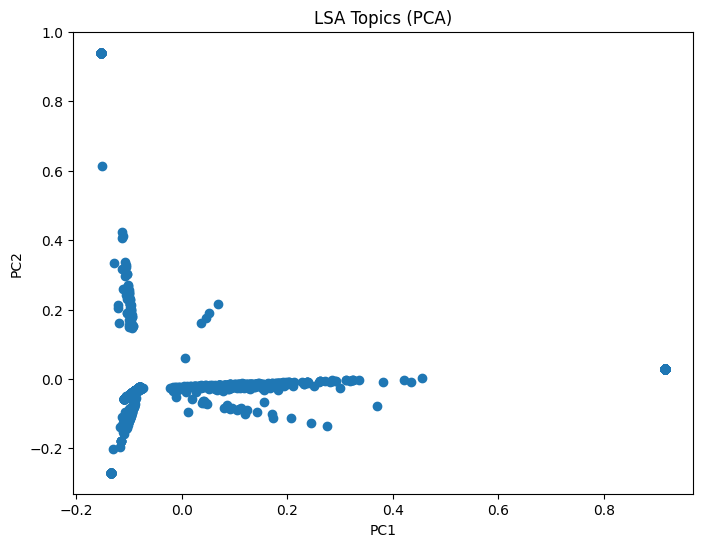

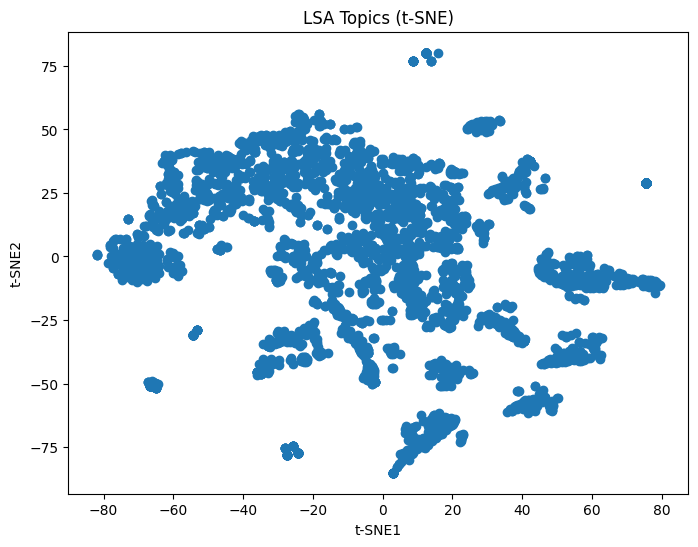

        Topic  Semantic_Coherence     Word_1     Word_2     Word_3     Word_4  \
0       henry            0.129915    higgins  pickering         oh     rising   
1  whimpering            0.084087       liza  pickering  doolittle     rising   
2      return            0.108904  pickering    colonel       come  doolittle   
3         say            0.124400  doolittle       miss   governor     pearce   
4        know            0.161258     pearce      right       girl         go   
5        like            0.174070       girl     flower         oh         go   
6        know            0.324017         go         oh       come       well   
7        turn            0.351625         go       back       door     flower   
8       think            0.083645       hill   eynsford       know      eliza   
9         see            0.214057       come      eliza       want       back   

      Word_5    Word_6    Word_7      Word_8  ...  Weight_1  Weight_2  \
0  professor     henry      come   

: 

In [ ]:

# Pygmalion by George Bernard Shaw
pdf_path = "./books/Pygmalion.pdf"  # Replace with your PDF file path
topics = process_pdf_for_topics(pdf_path, n_topics=10)
print(topics)


In [ ]:

# Pygmalion by George Bernard Shaw
pdf_path = "./books/Pygmalion.pdf"  # Replace with your PDF file path
topics = process_pdf_for_topics(pdf_path, n_topics=10)
print(topics)